## Difuzia v 3D

In [2]:
import numpy as np

k = 4
a = np.arange(k)
j = 3
i = 2

arr = np.arange(4*4*4)
print(arr.shape)
arr.resize((4,4,4))

arr.transpose((2,1,0))
print(arr[1][1:3])

(64,)
[[20 21 22 23]
 [24 25 26 27]]


In [6]:
arr = np.arange(3*3)
arr.resize((3,3))
print(arr)
arr.transpose((1,0))
print(arr)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


dx==0.009900990099009901
dt==5e-05
 a==0.255025


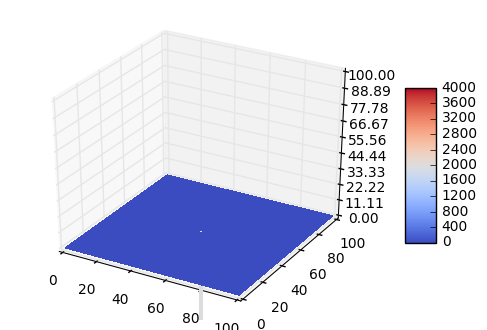

10000.0  0
0.0 0.0
10000.0
0.0 0.0
0.0
0.0
1
 1 1 (3, 101, 101)
 1 2 (2, 101, 101)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [84]:
import numpy as np
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

get_ipython().magic('matplotlib inline')

def vis(level, bPrint):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.arange(0, 101, 1)
    Y = np.arange(0, 101, 1)
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X, Y, u[50], rstride=1,
                                    cstride=1,
                                    cmap=cm.coolwarm,
                                    linewidth=0,
                                    antialiased=False)
    ax.set_zlim(0, 100)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()
    sum = 0
    for i in range(0, xmax):
        for j in range(0,xmax):
            for k in range(0,xmax):
                sum += u[i][j][k]
    print(str(sum)+"  "+str(t-1))
    print(u[50][50][48],u[50][50][49])
    print(u[50][50][50])
    print(u[50][50][51],u[50][50][52])
    print(u[50][49][50])
    print(u[49][50][50])
    
def impl(i,j,row):
    
    
    j=1
    i=1
    for k in range(0, xmax):
        u1[i][j][k] = a*uH[i][j-1][k]+(1-4*a)*uH[i][j][k]+a*uH[i][j+1][k]
        u1[i][j][k]+= a*uH[i-1][j][k]+a*uH[i+1][j][k] 
    u1[i][j][0] = u1[i][j][0]/b
    for k in range(1, xmax):
        u1[i][j][k] = (u1[i][j][k]+ a*u1[i][j][k-1])/(b+a*c[k-1])
    #u[xmax -1]=u[xmax-1] #xn=d'n
    for k in range(xmax-2,-1,-1):
        u1[i][j][k]=u1[i][j][k]-c[k]*u1[i][j][k+1]
    
    
#Init
xmax = 101
tmax = 2000
D = 0.5
l = 1
tSec = 0.1
uH = np.zeros((xmax,xmax,xmax))
u = np.zeros((xmax,xmax,xmax))
u1 = np.zeros((xmax,xmax,xmax))
dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))
#koeficient c v trojdiagonalnej matici
c = np.full(xmax,-a)
b=1+2*a
c[0]=c[0]/b
for i in range(1, xmax):
    c[i]=c[i]/(b+a*c[i-1])

uH[50][50][50] = 10000
u = uH
for t in range(0, tmax):
    #vis(50,bPrint=False)
    print("time=",t % 3)
    row = t % 3
    if row == 0:
        u = np.transpose(u,(0,1,2))
    elif row == 1:
        u = np.transpose(u,(1,2,0))
        print("ij",i,j,uH.shape)
    else:
        u = np.transpose(u,(2,0,1))
    for i in range(1,xmax-1):
        for j in range(1,xmax-1):
            impl(i,j, t % 3)

## Difuzia v 2D

In [7]:
import numpy as np
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

get_ipython().magic('matplotlib inline')

def vis():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.arange(0, 101, 1)
    Y = np.arange(0, 101, 1)
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(X, Y, u, rstride=1,
                                    cstride=1,
                                    cmap=cm.coolwarm,
                                    linewidth=0,
                                    antialiased=False)
    ax.set_zlim(0, u[50][50])
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()
    sum = 0
    for i in range(0, xmax):
        for j in range(0,xmax):
            sum += u[i][j]
    print(str(sum)+"  "+str(t))
    
def impl(i,row):
    if row:
        uH = np.copy(u)
        hlp = u[i][0]
        u[i] = a*uH[i]+(1-2*a)*uH[i]+a*uH[i]
        u[i][0] = hlp/b
        for x in range(1, xmax):
            u[i][x] = (u[i][x]+a*u[i][x-1])/(b+a*c[x-1])
        for x in range(xmax-2,-1,-1):
            u[i][x]=u[i][x]-c[x]*u[i][x+1]
    else:
        uH = np.copy(u)
        for j in range(1, xmax-1):
            u[j][i]= a*uH[j-1][i]+(1-2*a)*uH[j][i]+a*uH[j+1][i]
        u[0][i] = u[0][i]/b
        for y in range(1, xmax):
            u[y][i] = (u[y][i]+a*u[y-1][i])/(b+a*c[y-1])
        for y in range(xmax-2,-1,-1):
            u[y][i]=u[y][i]-c[y]*u[y+1][i]

#Init
xmax = 101
tmax = 2000
D = 0.5
l = 1
tSec = 0.1
uH = np.zeros((xmax,xmax))
u = np.zeros((xmax,xmax))
dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
b=1+2*a
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))
#koeficient c v trojdiagonalnej matici
c = np.full(xmax,-a)
print(b)
c[0]=c[0]/b
for i in range(1, xmax):
    c[i]=c[i]/(b+a*c[i-1])
print("cc")
print(c)
uH[50][50] = 10000
u = uH
for t in range(1, tmax):
    if t % 2 == 0:
        for i in range(0,xmax):
            impl(i,False)
    else:
        for i in range(0, xmax):
            impl(i,True)
    if t % 10 == 0:
        vis()
sum = 0
for i in range(0, xmax):
    for j in range(0,xmax):
        sum += u[i][j]
print(str(sum)+"  "+str(t))
print(u[50][50])

dx==0.009900990099009901
dt==5e-05
 a==0.255025
1.5100500000000001
cc
[-0.16888514 -0.17384353 -0.17399351 -0.17399805 -0.17399819 -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982
 -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.1739982  -0.17

## Explicitna 2D

dx==0.009900990099009901
dt==5e-05
 a==0.255025


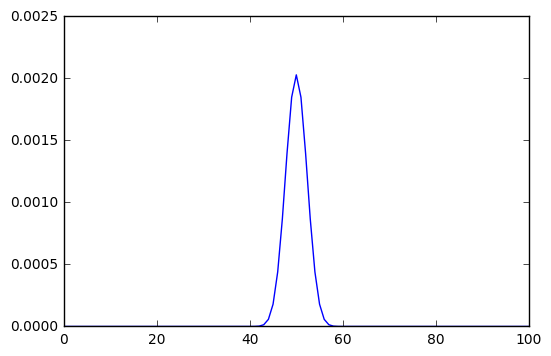

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.35411368e-08   2.60150180e-07   2.38449523e-06   1.38637633e-05
   5.73412038e-05   1.79332413e-04   4.40018708e-04   8.67344878e-04
   1.39490622e-03   1.84835855e-03   2.02899118e-03   1.84835855e-03
   1.39490622e-03   8.67344878e-04   4.40018708e-04   1.79332413e-04
   5.73412038e-05   1.38637633e-05

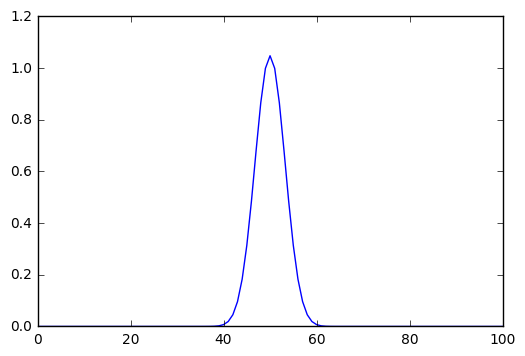

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.14340793e-11   4.39339449e-10
   8.24717565e-09   1.00777474e-07   9.01199554e-07   6.28613840e-06
   3.55992717e-05   1.68216209e-04   6.76455178e-04   2.34958610e-03
   7.13004301e-03   1.90744026e-02   4.53091882e-02   9.61181574e-02
   1.82948719e-01   3.13603958e-01   4.85570096e-01   6.80681020e-01
   8.65379065e-01   9.98987823e-01   1.04787895e+00   9.98987823e-01
   8.65379065e-01   6.80681020e-01   4.85570096e-01   3.13603958e-01
   1.82948719e-01   9.61181574e-02

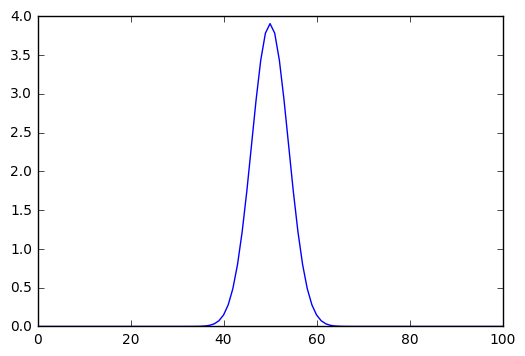

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   6.06338929e-17   3.49466631e-15   9.91705333e-14   1.84696048e-12
   2.53893439e-11   2.74698902e-10   2.43591383e-09   1.82035114e-08
   1.16987776e-07   6.56599730e-07   3.25737939e-06   1.44224639e-05
   5.74437461e-05   2.07167772e-04   6.80244748e-04   2.04312618e-03
   5.63559902e-03   1.43246477e-02   3.36516714e-02   7.32511875e-02
   1.48069473e-01   2.78475524e-01   4.88081996e-01   7.98352556e-01
   1.22014967e+00   1.74415353e+00   2.33383035e+00   2.92519427e+00
   3.43606224e+00   3.78393200e+00   3.90745407e+00   3.78393200e+00
   3.43606224e+00   2.92519427e+00   2.33383035e+00   1.74415353e+00
   1.22014967e+00   7.98352556e-01

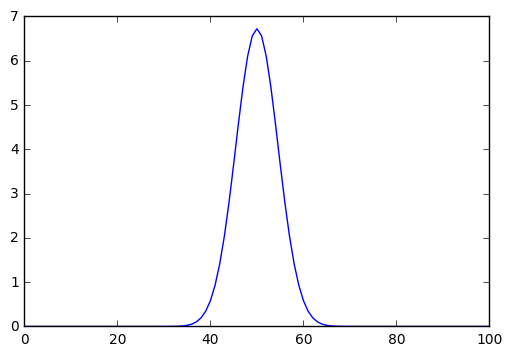

[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.40021475e-22   1.07602818e-20
   4.08714286e-19   1.02294162e-17   1.89756411e-16   2.78234354e-15
   3.35850488e-14   3.43208568e-13   3.03055007e-12   2.34851180e-11
   1.61689597e-10   9.98773487e-10   5.58035660e-09   2.83923363e-08
   1.32302197e-07   5.67392379e-07   2.24897355e-06   8.26924256e-06
   2.82960714e-05   9.03645007e-05   2.70005015e-04   7.56515328e-04
   1.99159098e-03   4.93505393e-03   1.15288244e-02   2.54272799e-02
   5.30142882e-02   1.04607532e-01   1.95549499e-01   3.46635810e-01
   5.83134586e-01   9.31661801e-01   1.41455546e+00   2.04219397e+00
   2.80478463e+00   3.66611897e+00   4.56212617e+00   5.40632683e+00
   6.10245265e+00   6.56204936e+00   6.72274792e+00   6.56204936e+00
   6.10245265e+00   5.40632683e+00   4.56212617e+00   3.66611897e+00
   2.80478463e+00   2.04219397e+00

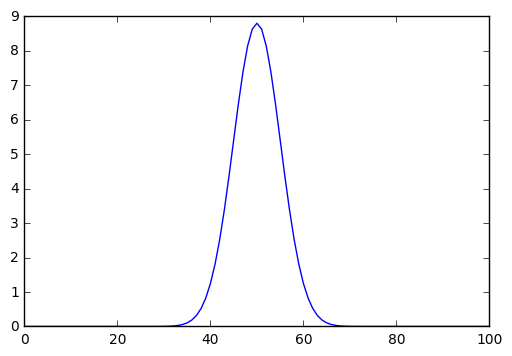

[  0.00000000e+00   2.28972786e-26   1.08967061e-24   3.42509376e-23
   7.99874661e-22   1.48021685e-20   2.26080687e-19   2.93104033e-18
   3.29234405e-17   3.25463387e-16   2.86652363e-15   2.27183604e-14
   1.63348931e-13   1.07286328e-12   6.47413724e-12   3.60738314e-11
   1.86402026e-10   8.96594412e-10   4.02783499e-09   1.69494816e-08
   6.69868915e-08   2.49225368e-07   8.74744484e-07   2.90191617e-06
   9.11492450e-06   2.71498087e-05   7.67972633e-05   2.06564303e-04
   5.28946543e-04   1.29088539e-03   3.00549173e-03   6.68177185e-03
   1.41964312e-02   2.88476825e-02   5.61037182e-02   1.04496113e-01
   1.86505267e-01   3.19151377e-01   5.23875491e-01   8.25232630e-01
   1.24799858e+00   1.81257419e+00   2.52905988e+00   3.39098131e+00
   4.37019025e+00   5.41470172e+00   6.45095328e+00   7.39111644e+00
   8.14480345e+00   8.63315320e+00   8.80231313e+00   8.63315320e+00
   8.14480345e+00   7.39111644e+00   6.45095328e+00   5.41470172e+00
   4.37019025e+00   3.39098131e+00

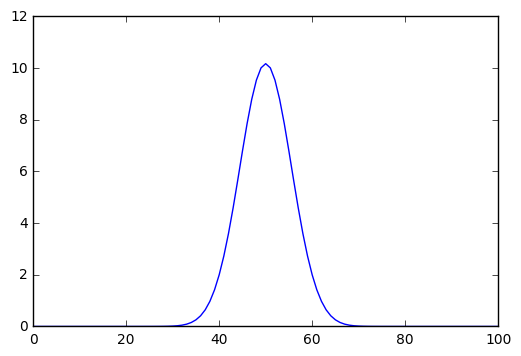

[  0.00000000e+00   2.69426827e-19   2.39175796e-18   1.92487302e-17
   1.42600827e-16   9.77459261e-16   6.22626598e-15   3.69972112e-14
   2.05772519e-13   1.07444437e-12   5.28106121e-12   2.44930731e-11
   1.07421755e-10   4.46397366e-10   1.76079000e-09   6.60325655e-09
   2.35787832e-08   8.02770996e-08   2.60924992e-07   8.10582390e-07
   2.40935732e-06   6.85895400e-06   1.87182583e-05   4.90109431e-05
   1.23220620e-04   2.97683407e-04   6.91516381e-04   1.54561670e-03
   3.32589228e-03   6.89380829e-03   1.37713238e-02   2.65254504e-02
   4.92845513e-02   8.83682605e-02   1.52961682e-01   2.55694158e-01
   4.12904814e-01   6.44314653e-01   9.71811853e-01   1.41712907e+00
   1.99837358e+00   2.72565886e+00   3.59643433e+00   4.59142950e+00
   5.67230384e+00   6.78201854e+00   7.84856406e+00   8.79202375e+00
   9.53416192e+00   1.00090044e+01   1.01724530e+01   1.00090044e+01
   9.53416192e+00   8.79202375e+00   7.84856406e+00   6.78201854e+00
   5.67230384e+00   4.59142950e+00

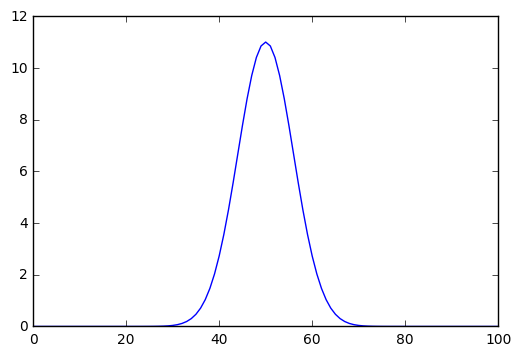

[  0.00000000e+00   1.06528990e-15   5.77617506e-15   2.88658717e-14
   1.37031642e-13   6.19500450e-13   2.67128987e-12   1.10019373e-11
   4.33359720e-11   1.63447830e-10   5.90939260e-10   2.05015599e-09
   6.83167760e-09   2.18852613e-08   6.74561487e-08   2.00204791e-07
   5.72566989e-07   1.57896565e-06   4.20136669e-06   1.07929395e-05
   2.67832843e-05   6.42379405e-05   1.48983405e-04   3.34275439e-04
   7.25906825e-04   1.52631859e-03   3.10859856e-03   6.13474119e-03
   1.17351151e-02   2.17658759e-02   3.91554397e-02   6.83370774e-02
   1.15739687e-01   1.90272274e-01   3.03692776e-01   4.70706983e-01
   7.08612518e-01   1.03630431e+00   1.47250967e+00   2.03323400e+00
   2.72856967e+00   3.55922628e+00   4.51333769e+00   5.56423016e+00
   6.66983933e+00   7.77430250e+00   8.81192613e+00   9.71328388e+00
   1.04127288e+01   1.08562212e+01   1.10081896e+01   1.08562212e+01
   1.04127288e+01   9.71328388e+00   8.81192613e+00   7.77430250e+00
   6.66983933e+00   5.56423016e+00

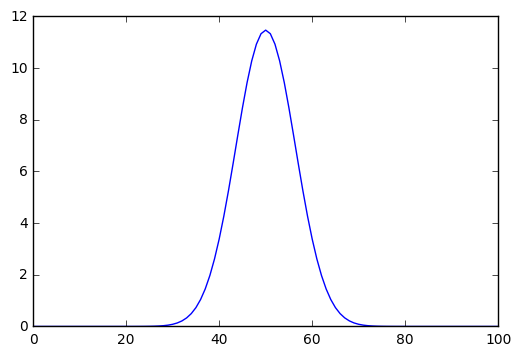

[  0.00000000e+00   2.46005152e-13   1.02355897e-12   3.88921609e-12
   1.41967045e-11   4.99617636e-11   1.69671249e-10   5.56429524e-10
   1.76332607e-09   5.40315763e-09   1.60181171e-08   4.59690783e-08
   1.27772897e-07   3.44148386e-07   8.98649593e-07   2.27596292e-06
   5.59309549e-06   1.33420894e-05   3.09060221e-05   6.95447605e-05
   1.52066632e-04   3.23213897e-04   6.67980367e-04   1.34269977e-03
   2.62574752e-03   4.99685521e-03   9.25582534e-03   1.66919524e-02
   2.93133980e-02   5.01395375e-02   8.35473271e-02   1.35644088e-01
   2.14614210e-01   3.30958832e-01   4.97521117e-01   7.29173570e-01
   1.04204816e+00   1.45222417e+00   1.97385880e+00   2.61684933e+00
   3.38424221e+00   4.26972980e+00   5.25566995e+00   6.31209360e+00
   7.39710563e+00   8.45892477e+00   9.43956378e+00   1.02798593e+01
   1.09252803e+01   1.13317377e+01   1.14705418e+01   1.13317377e+01
   1.09252803e+01   1.02798593e+01   9.43956378e+00   8.45892477e+00
   7.39710563e+00   6.31209360e+00

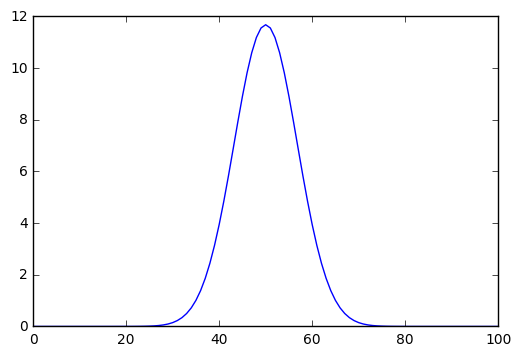

[  0.00000000e+00   1.24340601e-11   4.37746227e-11   1.38516602e-10
   4.22757105e-10   1.25226492e-09   3.60350164e-09   1.00780482e-08
   2.74047143e-08   7.24828497e-08   1.86535828e-07   4.67255701e-07
   1.13960277e-06   2.70703180e-06   6.26472784e-06   1.41286927e-05
   3.10605259e-05   6.65783912e-05   1.39181273e-04   2.83825656e-04
   5.64730628e-04   1.09658117e-03   2.07843505e-03   3.84601180e-03
   6.94930559e-03   1.22631797e-02   2.11381079e-02   3.55956781e-02
   5.85679258e-02   9.41702412e-02   1.47984195e-01   2.27309785e-01
   3.41328289e-01   5.01100655e-01   7.19317141e-01   1.00971762e+00
   1.38612395e+00   1.86106938e+00   2.44407478e+00   3.13970076e+00
   3.94558757e+00   4.85076274e+00   5.83453214e+00   6.86625541e+00
   7.90623262e+00   8.90779706e+00   9.82053402e+00   1.05943556e+01
   1.11839923e+01   1.15533493e+01   1.16791489e+01   1.15533493e+01
   1.11839923e+01   1.05943556e+01   9.82053402e+00   8.90779706e+00
   7.90623262e+00   6.86625541e+00

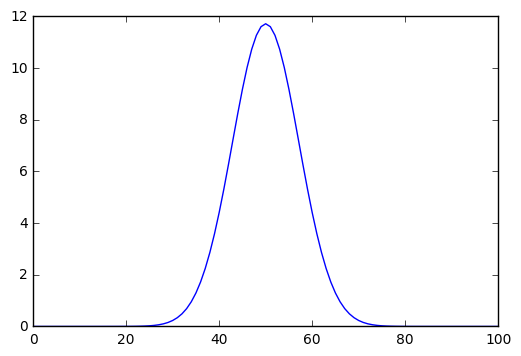

[  0.00000000e+00   2.45597540e-10   7.71159285e-10   2.13907109e-09
   5.72444255e-09   1.49258152e-08   3.79702414e-08   9.42807239e-08
   2.28557720e-07   5.41091697e-07   1.25127012e-06   2.82706139e-06
   6.24191512e-06   1.34706753e-05   2.84208012e-05   5.86329216e-05
   1.18299871e-04   2.33474971e-04   4.50798245e-04   8.51685478e-04
   1.57469934e-03   2.84971017e-03   5.04834222e-03   8.75587507e-03
   1.48698962e-02   2.47301225e-02   4.02813808e-02   6.42672229e-02
   1.00444644e-01   1.53800848e-01   2.30741518e-01   3.39207923e-01
   4.88669747e-01   6.89934766e-01   9.54718932e-01   1.29493438e+00
   1.72168033e+00   2.24396281e+00   2.86722061e+00   3.59178994e+00
   4.41148999e+00   5.31254431e+00   6.27305744e+00   7.26323570e+00
   8.24647127e+00   9.18130696e+00   1.00241757e+01   1.07326844e+01
   1.12691088e+01   1.16037026e+01   1.17174195e+01   1.16037026e+01
   1.12691088e+01   1.07326844e+01   1.00241757e+01   9.18130696e+00
   8.24647127e+00   7.26323570e+00

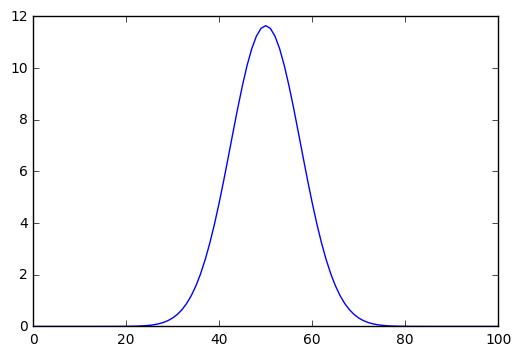

[  0.00000000e+00   2.58106475e-09   7.46243302e-09   1.87448521e-08
   4.53412555e-08   1.07088792e-07   2.47503072e-07   5.60030066e-07
   1.24088978e-06   2.69292479e-06   5.72475827e-06   1.19234403e-05
   2.43346059e-05   4.86731576e-05   9.54242624e-05   1.83396630e-04
   3.45576277e-04   6.38514863e-04   1.15697741e-03   2.05615393e-03
   3.58435694e-03   6.12967903e-03   1.02844025e-02   1.69307936e-02
   2.73509669e-02   4.33614247e-02   6.74693441e-02   1.03042497e-01
   1.54477901e-01   2.27346328e-01   3.28481562e-01   4.65976271e-01
   6.49042410e-01   8.87695477e-01   1.19223063e+00   1.57247621e+00
   2.03683652e+00   2.59116969e+00   3.23758382e+00   3.97327082e+00
   4.78952462e+00   5.67110256e+00   6.59607891e+00   7.53630549e+00
   8.45853585e+00   9.32619214e+00   1.01016681e+01   1.07489790e+01
   1.12365044e+01   1.15395360e+01   1.16423461e+01   1.15395360e+01
   1.12365044e+01   1.07489790e+01   1.01016681e+01   9.32619214e+00
   8.45853585e+00   7.53630549e+00

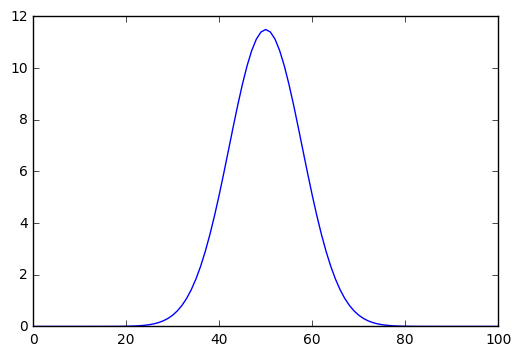

[  0.00000000e+00   1.73361430e-08   4.71211812e-08   1.09585663e-07
   2.44645876e-07   5.33824779e-07   1.14219639e-06   2.39805670e-06
   4.94143857e-06   9.99504967e-06   1.98476183e-05   3.86967964e-05
   7.40856378e-05   1.39294128e-04   2.57227248e-04   4.66584604e-04
   8.31410169e-04   1.45550051e-03   2.50357451e-03   4.23152885e-03
   7.02843625e-03   1.14730602e-02   1.84073851e-02   2.90287885e-02
   4.50007824e-02   6.85795422e-02   1.02749610e-01   1.51357277e-01
   2.19224527e-01   3.12220666e-01   4.37263844e-01   6.02221798e-01
   8.15681757e-01   1.08656484e+00   1.42357147e+00   1.83446163e+00
   2.32519623e+00   2.89899199e+00   3.55536818e+00   4.28928570e+00
   5.09049260e+00   5.94319068e+00   6.82612245e+00   7.71314608e+00
   8.57431837e+00   9.37744888e+00   1.00900271e+01   1.06813702e+01
   1.11247966e+01   1.13996143e+01   1.14927162e+01   1.13996143e+01
   1.11247966e+01   1.06813702e+01   1.00900271e+01   9.37744888e+00
   8.57431837e+00   7.71314608e+00

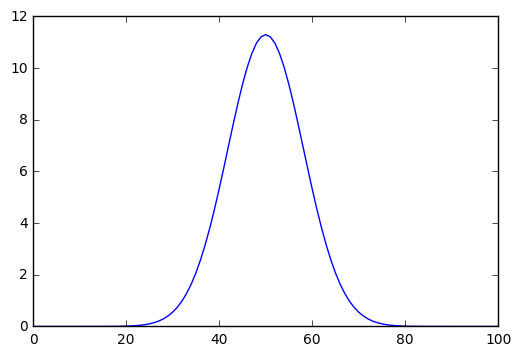

[  0.00000000e+00   8.36665532e-08   2.16858904e-07   4.74373747e-07
   9.92304798e-07   2.02918594e-06   4.07466859e-06   8.04242391e-06
   1.56073002e-05   2.97832742e-05   5.58938897e-05   1.03167491e-04
   1.87303358e-04   3.34509548e-04   5.87714673e-04   1.01590513e-03
   1.72782882e-03   2.89161422e-03   4.76213881e-03   7.71817561e-03
   1.23113564e-02   1.93286908e-02   2.98696304e-02   4.54373162e-02
   6.80415852e-02   1.00308472e-01   1.45587392e-01   2.08043157e-01
   2.92715839e-01   4.05527945e-01   5.53216172e-01   7.43165073e-01
   9.83123292e-01   1.28079020e+00   1.64327214e+00   2.07642274e+00
   2.58409991e+00   3.16739097e+00   3.82387480e+00   4.54700272e+00
   5.32568458e+00   6.14416193e+00   6.98223314e+00   7.81586794e+00
   8.61821150e+00   9.36093550e+00   1.00158506e+01   1.05566572e+01
   1.09606861e+01   1.12104683e+01   1.12949842e+01   1.12104683e+01
   1.09606861e+01   1.05566572e+01   1.00158506e+01   9.36093550e+00
   8.61821150e+00   7.81586794e+00

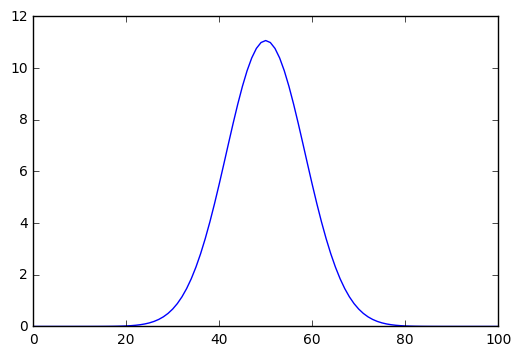

[  0.00000000e+00   3.13947302e-07   7.83863339e-07   1.63180710e-06
   3.23496525e-06   6.26664566e-06   1.19313708e-05   2.23584717e-05
   4.12530671e-05   7.49541420e-05   1.34121552e-04   2.36372436e-04
   4.10317406e-04   7.01610609e-04   1.18182365e-03   1.96117249e-03
   3.20634941e-03   5.16490441e-03   8.19773128e-03   1.28211717e-02
   1.97599690e-02   3.00116808e-02   4.49221051e-02   6.62696986e-02
   9.63548569e-02   1.38087311e-01   1.95061942e-01   2.71610294e-01
   3.72812431e-01   5.04451998e-01   6.72897192e-01   8.84892237e-01
   1.14724860e+00   1.46643278e+00   1.84805779e+00   2.29629837e+00
   2.81326347e+00   3.39837331e+00   4.04779914e+00   4.75403046e+00
   5.50563476e+00   6.28726706e+00   7.07997119e+00   7.86179114e+00
   8.60868193e+00   9.29567763e+00   9.89824343e+00   1.03937128e+01
   1.07626939e+01   1.09903249e+01   1.10672641e+01   1.09903249e+01
   1.07626939e+01   1.03937128e+01   9.89824343e+00   9.29567763e+00
   8.60868193e+00   7.86179114e+00

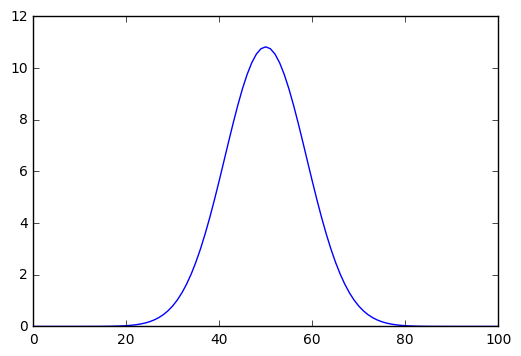

[  0.00000000e+00   9.68036922e-07   2.34561236e-06   4.68839115e-06
   8.88618170e-06   1.64434954e-05   2.99218196e-05   5.36430048e-05
   9.47978634e-05   1.65166549e-04   2.83740884e-04   4.80646110e-04
   8.02891245e-04   1.32263027e-03   2.14878222e-03   3.44301999e-03
   5.44126846e-03   8.48191269e-03   1.30418546e-02   1.97813091e-02
   2.95977270e-02   4.36884092e-02   6.36201788e-02   9.14028906e-02
   1.29561614e-01   1.81200132e-01   2.50046149e-01   3.40466584e-01
   4.57439902e-01   6.06472076e-01   7.93443839e-01   1.02437985e+00
   1.30513544e+00   1.64100372e+00   2.03625486e+00   2.49362927e+00
   3.01381708e+00   3.59496496e+00   4.23225848e+00   4.91763068e+00
   5.63964494e+00   6.38359225e+00   7.13182887e+00   7.86436100e+00
   8.55966086e+00   9.19567440e+00   9.75095901e+00   1.02058713e+01
   1.05437146e+01   1.07517527e+01   1.08220048e+01   1.07517527e+01
   1.05437146e+01   1.02058713e+01   9.75095901e+00   9.19567440e+00
   8.55966086e+00   7.86436100e+00

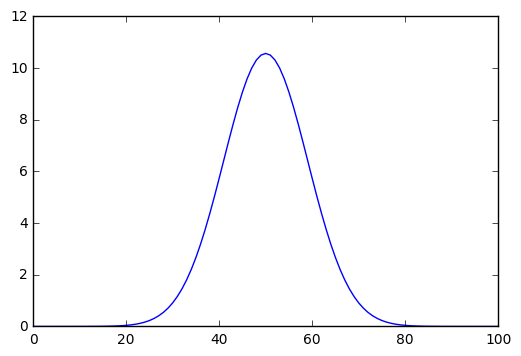

[  0.00000000e+00   2.55302284e-06   6.03698027e-06   1.16657188e-05
   2.12865060e-05   3.78769290e-05   6.62901565e-05   1.14387170e-04
   1.94746523e-04   3.27211277e-04   5.42620158e-04   8.88175012e-04
   1.43501603e-03   2.28870191e-03   3.60341057e-03   5.60076533e-03
   8.59422263e-03   1.30198907e-02   1.94744396e-02   2.87603601e-02
   4.19381910e-02   6.03844159e-02   8.58525324e-02   1.20533334e-01
   1.67108791e-01   2.28792218e-01   3.09345845e-01   4.13065757e-01
   5.44723694e-01   7.09455781e-01   9.12590088e-01   1.15940829e+00
   1.45484167e+00   1.80310786e+00   2.20730247e+00   2.66896721e+00
   3.18766370e+00   3.76058849e+00   4.38226800e+00   5.04437274e+00
   5.73568639e+00   6.44225721e+00   7.14774704e+00   7.83397763e+00
   8.48165650e+00   9.07124652e+00   9.58392728e+00   1.00025837e+01
   1.03127499e+01   1.05034372e+01   1.05677783e+01   1.05034372e+01
   1.03127499e+01   1.00025837e+01   9.58392728e+00   9.07124652e+00
   8.48165650e+00   7.83397763e+00

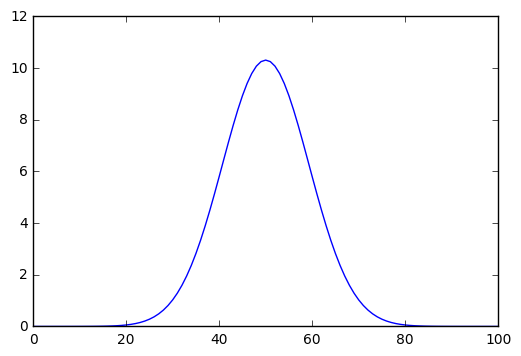

[  0.00000000e+00   5.93305860e-06   1.37498857e-05   2.58265357e-05
   4.56223942e-05   7.84816336e-05   1.32782948e-04   2.21615672e-04
   3.65215272e-04   5.94460737e-04   9.55819319e-04   1.51821675e-03
   2.38240674e-03   3.69350073e-03   5.65738100e-03   8.56173451e-03
   1.28023821e-02   1.89154056e-02   2.76152555e-02   3.98385260e-02
   5.67923797e-02   8.00056907e-02   1.11379861e-01   1.53235013e-01
   2.08345938e-01   2.79960977e-01   3.71796020e-01   4.87995359e-01
   6.33051313e-01   8.11675733e-01   1.02861868e+00   1.28843301e+00
   1.59518800e+00   1.95214077e+00   2.36137998e+00   2.82346231e+00
   3.33706759e+00   3.89870210e+00   4.50248139e+00   5.14002288e+00
   5.80047407e+00   6.47069523e+00   7.13560438e+00   7.77868055e+00
   8.38260687e+00   8.93002211e+00   9.40433673e+00   9.79056121e+00
   1.00760893e+01   1.02513795e+01   1.03104832e+01   1.02513795e+01
   1.00760893e+01   9.79056121e+00   9.40433673e+00   8.93002211e+00
   8.38260687e+00   7.77868055e+00

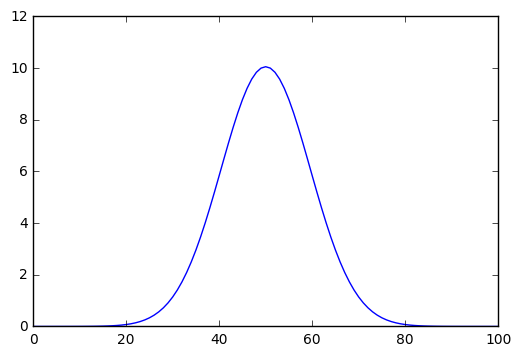

[  0.00000000e+00   1.24277498e-05   2.83213899e-05   5.19320344e-05
   8.92142561e-05   1.49023882e-04   2.44768973e-04   3.96728009e-04
   6.35302338e-04   1.00553374e-03   1.57328918e-03   2.43358722e-03
   3.72160522e-03   5.62695000e-03   8.41177938e-03   1.24333072e-02
   1.81710835e-02   2.62591913e-02   3.75231113e-02   5.30204675e-02
   7.40841615e-02   1.02365551e-01   1.39874363e-01   1.89011006e-01
   2.52585983e-01   3.33820306e-01   4.36320320e-01   5.64020405e-01
   7.21087648e-01   9.11784091e-01   1.14028446e+00   1.41045051e+00
   1.72556705e+00   2.08804926e+00   2.49913560e+00   2.95858486e+00
   3.46439985e+00   4.01260211e+00   4.59708269e+00   5.20955218e+00
   5.83960870e+00   6.47493629e+00   7.10163698e+00   7.70469006e+00
   8.26852100e+00   8.77765230e+00   9.21739966e+00   9.57457043e+00
   9.83811841e+00   9.99970985e+00   1.00541602e+01   9.99970985e+00
   9.83811841e+00   9.57457043e+00   9.21739966e+00   8.77765230e+00
   8.26852100e+00   7.70469006e+00

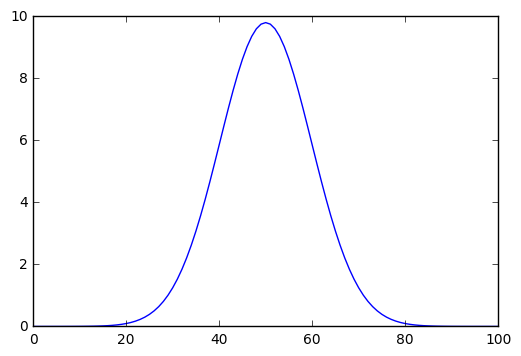

[  0.00000000e+00   2.38784770e-05   5.36506630e-05   9.63759599e-05
   1.61612580e-04   2.63098545e-04   4.20986621e-04   6.64876406e-04
   1.03793345e-03   1.60243825e-03   2.44716185e-03   3.69701228e-03
   5.52542640e-03   8.16998134e-03   1.19516530e-02   1.72980356e-02
   2.47706380e-02   3.50960706e-02   4.92005170e-02   6.82463399e-02
   9.36690144e-02   1.27211826e-01   1.70954978e-01   2.27334957e-01
   2.99149378e-01   3.89542019e-01   5.01962740e-01   6.40097266e-01
   8.07762832e-01   1.00876724e+00   1.24673119e+00   1.52487657e+00
   1.84578695e+00   2.21114996e+00   2.62149502e+00   3.07594308e+00
   3.57198735e+00   4.10532526e+00   4.66976145e+00   5.25719939e+00
   5.85773525e+00   6.45986166e+00   7.05078190e+00   7.61682665e+00
   8.14395710e+00   8.61833027e+00   9.02689565e+00   9.35798781e+00
   9.60187772e+00   9.75124655e+00   9.80154980e+00   9.75124655e+00
   9.60187772e+00   9.35798781e+00   9.02689565e+00   8.61833027e+00
   8.14395710e+00   7.61682665e+00

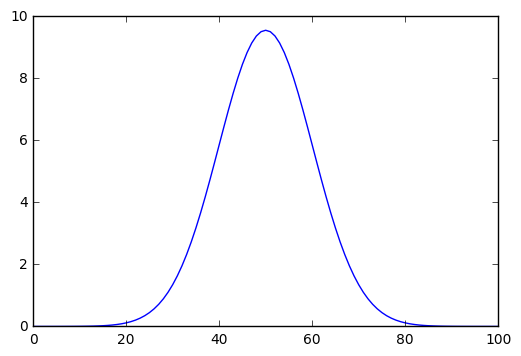

[  0.00000000e+00   4.26687107e-05   9.47202012e-05   1.67167155e-04
   2.74481115e-04   4.36830981e-04   6.82963620e-04   1.05399007e-03
   1.60837767e-03   2.42848680e-03   3.62902430e-03   5.36780622e-03
   7.85921896e-03   1.13907279e-02   1.63426923e-02   2.32115875e-02
   3.26365009e-02   4.54284398e-02   6.26015669e-02   8.54049668e-02
   1.15352956e-01   1.54251320e-01   2.04216225e-01   2.67682011e-01
   3.47393641e-01   4.46379446e-01   5.67899950e-01   7.15369182e-01
   8.92245933e-01   1.10189408e+00   1.34741316e+00   1.63144293e+00
   1.95594857e+00   2.32199604e+00   2.72952981e+00   3.17716764e+00
   3.66202851e+00   4.17961006e+00   4.72373144e+00   5.28655471e+00
   5.85869455e+00   6.42942073e+00   6.98695192e+00   7.51883267e+00
   8.01237854e+00   8.45516868e+00   8.83555950e+00   9.14319050e+00
   9.36945150e+00   9.50788219e+00   9.55447798e+00   9.50788219e+00
   9.36945150e+00   9.14319050e+00   8.83555950e+00   8.45516868e+00
   8.01237854e+00   7.51883267e+00

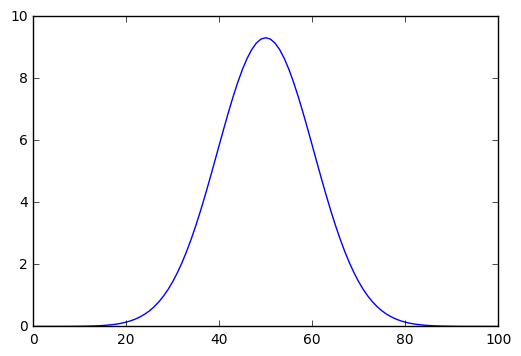

[  0.00000000e+00   7.16936024e-05   1.57515480e-04   2.73760779e-04
   4.41283742e-04   6.88349636e-04   1.05419768e-03   1.59358882e-03
   2.38263695e-03   3.52624367e-03   5.16746892e-03   7.49916344e-03
   1.07781551e-02   1.53422075e-02   2.16298458e-02   3.02029576e-02
   4.17718231e-02   5.72218953e-02   7.76412505e-02   1.04347164e-01
   1.38909761e-01   1.83170188e-01   2.39250271e-01   3.09550287e-01
   3.96731243e-01   5.03678144e-01   6.33441052e-01   7.89151500e-01
   9.73912927e-01   1.19066537e+00   1.44202651e+00   1.73011346e+00
   2.05635189e+00   2.42128153e+00   2.82436909e+00   3.26384123e+00
   3.73655111e+00   4.23789197e+00   4.76177006e+00   5.30064702e+00
   5.84565833e+00   6.38681023e+00   6.91325239e+00   7.41361818e+00
   7.87641913e+00   8.29047539e+00   8.64536012e+00   8.93183346e+00
   9.14224114e+00   9.27085352e+00   9.31412447e+00   9.27085352e+00
   9.14224114e+00   8.93183346e+00   8.64536012e+00   8.29047539e+00
   7.87641913e+00   7.41361818e+00

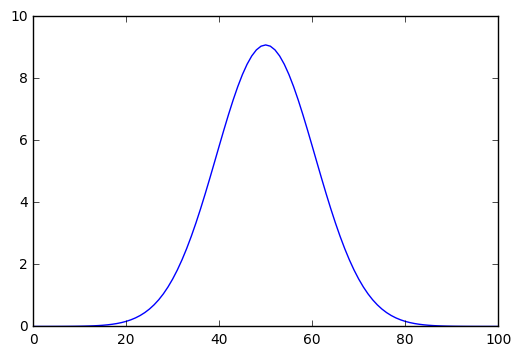

[  0.00000000e+00   1.14282854e-04   2.48854023e-04   4.26761740e-04
   6.76818550e-04   1.03710067e-03   1.55920358e-03   2.31352817e-03
   3.39588313e-03   4.93569389e-03   7.10609958e-03   1.01361891e-02
   1.43255677e-02   2.00613454e-02   2.78374926e-02   3.82763057e-02
   5.21514655e-02   7.04118532e-02   9.42049199e-02   1.24898001e-01
   1.64095556e-01   2.13649911e-01   2.75662779e-01   3.52474608e-01
   4.46638777e-01   5.60877885e-01   6.98019809e-01   8.60912045e-01
   1.05231393e+00   1.27476775e+00   1.53045154e+00   1.82101798e+00
   2.14742612e+00   2.50977398e+00   2.90714199e+00   3.33745813e+00
   3.79739605e+00   4.28231702e+00   4.78626554e+00   5.30202602e+00
   5.82124505e+00   6.33462014e+00   6.83215146e+00   7.30344875e+00
   7.73808143e+00   8.12595603e+00   8.45770229e+00   8.72504757e+00
   8.92115864e+00   9.04093144e+00   9.08121142e+00   9.04093144e+00
   8.92115864e+00   8.72504757e+00   8.45770229e+00   8.12595603e+00
   7.73808143e+00   7.30344875e+00

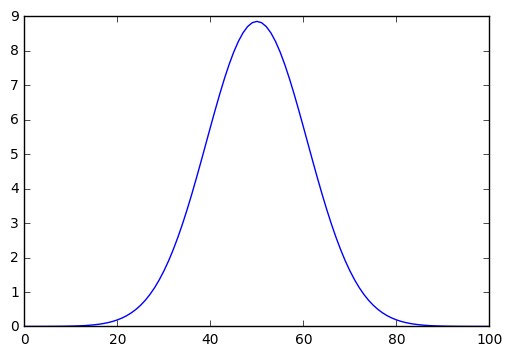

[  0.00000000e+00   1.74087156e-04   3.76146325e-04   6.37538180e-04
   9.96656084e-04   1.50308364e-03   2.22252809e-03   3.24279515e-03
   4.68106899e-03   6.69274926e-03   9.48206977e-03   1.33146722e-02
   1.85322281e-02   2.55690846e-02   3.49707493e-02   4.74138221e-02
   6.37267314e-02   8.49103336e-02   1.12157114e-01   1.46867382e-01
   1.90660532e-01   2.45379150e-01   3.13083552e-01   3.96034253e-01
   4.96659975e-01   6.17509078e-01   7.61182868e-01   9.30250023e-01
   1.12714243e+00   1.35403405e+00   1.61270580e+00   1.90440116e+00
   2.22967856e+00   2.58826811e+00   2.97894139e+00   3.39940346e+00
   3.84621660e+00   4.31476459e+00   4.79926513e+00   5.29283591e+00
   5.78761728e+00   6.27495132e+00   6.74561344e+00   7.19008921e+00
   7.59888571e+00   7.96286355e+00   8.27357374e+00   8.52358225e+00
   8.70676478e+00   8.81855573e+00   8.85613695e+00   8.81855573e+00
   8.70676478e+00   8.52358225e+00   8.27357374e+00   7.96286355e+00
   7.59888571e+00   7.19008921e+00

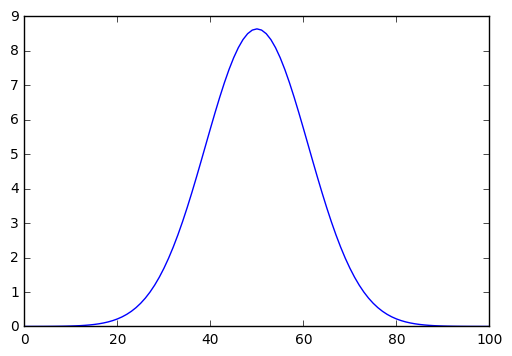

[  0.00000000e+00   2.54941691e-04   5.47116317e-04   9.17787892e-04
   1.41654035e-03   2.10608139e-03   3.06781648e-03   4.40844168e-03
   6.26779008e-03   8.82814034e-03   1.23251521e-02   1.70605263e-02
   2.34163928e-02   3.18712996e-02   4.30175113e-02   5.75791234e-02
   7.64302609e-02   1.00612367e-01   1.31349304e-01   1.70058723e-01
   2.18357900e-01   2.78062048e-01   3.51173020e-01   4.39856330e-01
   5.46404608e-01   6.73185962e-01   8.22576304e-01   9.96875459e-01
   1.19820787e+00   1.42840987e+00   1.68890668e+00   1.98058368e+00
   2.30365763e+00   2.65755464e+00   3.04080246e+00   3.45094493e+00
   3.88448647e+00   4.33687380e+00   4.80252061e+00   5.27487944e+00
   5.74656243e+00   6.20950991e+00   6.65520310e+00   7.07491389e+00
   7.45998230e+00   7.80210949e+00   8.09365293e+00   8.32790894e+00
   8.49936831e+00   8.60393128e+00   8.63907028e+00   8.60393128e+00
   8.49936831e+00   8.32790894e+00   8.09365293e+00   7.80210949e+00
   7.45998230e+00   7.07491389e+00

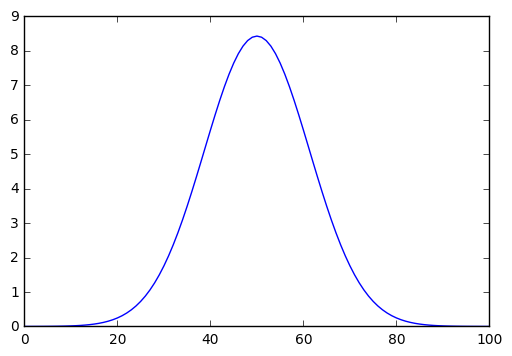

[  0.00000000e+00   3.60720659e-04   7.69509049e-04   1.27909830e-03
   1.95180431e-03   2.86494353e-03   4.11699167e-03   5.83470870e-03
   8.18143113e-03   1.13666940e-02   1.56572886e-02   2.13897833e-02
   2.89844303e-02   3.89602470e-02   5.19508971e-02   6.87208044e-02
   9.01807175e-02   1.17401711e-01   1.51626381e-01   1.94275771e-01
   2.46950399e-01   3.11423623e-01   3.89625591e-01   4.83616080e-01
   5.95544808e-01   7.27598172e-01   8.81931949e-01   1.06059025e+00
   1.26541187e+00   1.49792621e+00   1.75924202e+00   2.04993318e+00
   2.36992686e+00   2.71840005e+00   3.09369103e+00   3.49323242e+00
   3.91351253e+00   4.35007042e+00   4.79752955e+00   5.24967271e+00
   5.69955922e+00   6.13968302e+00   6.56216758e+00   6.95899162e+00
   7.32223676e+00   7.64434710e+00   7.91838864e+00   8.13829653e+00
   8.29909764e+00   8.39709724e+00   8.43001990e+00   8.39709724e+00
   8.29909764e+00   8.13829653e+00   7.91838864e+00   7.64434710e+00
   7.32223676e+00   6.95899162e+00

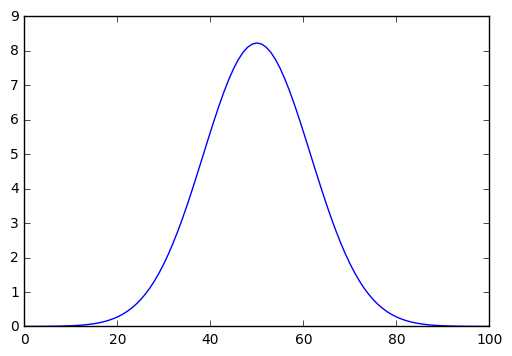

[  0.00000000e+00   4.95195201e-04   1.05080953e-03   1.73253366e-03
   2.61684014e-03   3.79696543e-03   5.38958299e-03   7.54236511e-03
   1.04425976e-02   1.43269631e-02   1.94925446e-02   2.63090117e-02
   3.52318460e-02   4.68163262e-02   6.17318364e-02   8.07758866e-02
   1.04887039e-01   1.35155741e-01   1.72831884e-01   2.19327730e-01
   2.76214757e-01   3.45212898e-01   4.28170710e-01   5.27035154e-01
   6.43809928e-01   7.80501728e-01   9.39054367e-01   1.12127134e+00
   1.32872825e+00   1.56267735e+00   1.82394741e+00   2.11284280e+00
   2.42904677e+00   2.77153405e+00   3.13849864e+00   3.52730235e+00
   3.93444954e+00   4.35559262e+00   4.78557184e+00   5.21849143e+00
   5.64783223e+00   6.06659935e+00   6.46750078e+00   6.84315141e+00
   7.18629484e+00   7.49003374e+00   7.74805898e+00   7.95486667e+00
   8.10595296e+00   8.19797681e+00   8.22888269e+00   8.19797681e+00
   8.10595296e+00   7.95486667e+00   7.74805898e+00   7.49003374e+00
   7.18629484e+00   6.84315141e+00

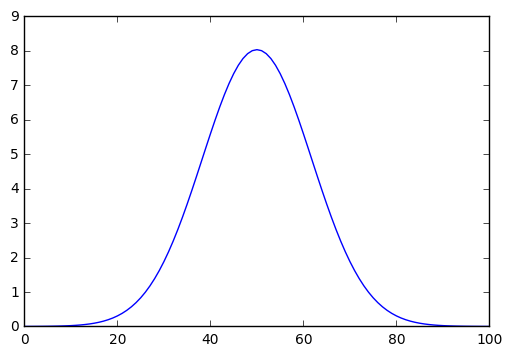

[  0.00000000e+00   6.61904446e-04   1.39799103e-03   2.28827403e-03
   3.42465152e-03   4.91738791e-03   6.90222142e-03   9.54826260e-03
   1.30668104e-02   1.77211567e-02   2.38373800e-02   3.18160368e-02
   4.21445510e-02   5.54099710e-02   7.23116189e-02   9.36729948e-02
   1.20452136e-01   1.53749469e-01   1.94812044e-01   2.45032932e-01
   3.05944505e-01   3.79204307e-01   4.66572321e-01   5.69878621e-01
   6.90980701e-01   8.31710155e-01   9.93808948e-01   1.17885611e+00
   1.38818639e+00   1.62280321e+00   1.88328884e+00   2.16971566e+00
   2.48156273e+00   2.81764240e+00   3.17604188e+00   3.55408452e+00
   3.94831540e+00   4.35451465e+00   4.76774145e+00   5.18240989e+00
   5.59239651e+00   5.99117784e+00   6.37199401e+00   6.72803350e+00
   7.05263210e+00   7.33947816e+00   7.58281544e+00   7.77763459e+00
   7.91984417e+00   8.00641339e+00   8.03547929e+00   8.00641339e+00
   7.91984417e+00   7.77763459e+00   7.58281544e+00   7.33947816e+00
   7.05263210e+00   6.72803350e+00

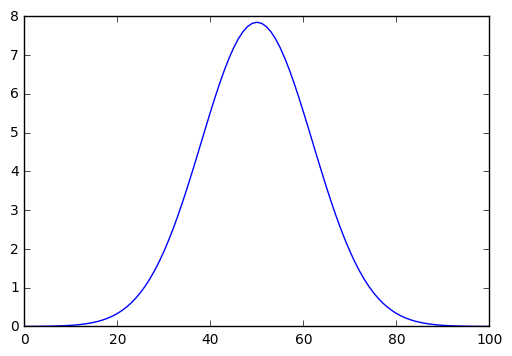

[  0.00000000e+00   8.64046294e-04   1.81730490e-03   2.95532130e-03
   4.38650274e-03   6.23902773e-03   8.66830161e-03   1.18650915e-02
   1.60644291e-02   2.15553113e-02   2.86911525e-02   3.79008543e-02
   4.97002471e-02   6.47035402e-02   8.36342793e-02   1.07335173e-01
   1.36776010e-01   1.73058752e-01   2.17418795e-01   2.71221303e-01
   3.35951503e-01   4.13197873e-01   5.04627276e-01   6.11951279e-01
   7.36883240e-01   8.81086097e-01   1.04611131e+00   1.23332998e+00
   1.44385769e+00   1.67847548e+00   1.93754960e+00   2.22095369e+00
   2.52799711e+00   2.85736358e+00   3.20706443e+00   3.57441044e+00
   3.95600595e+00   4.34776818e+00   4.74497379e+00   5.14233346e+00
   5.53409413e+00   5.91416672e+00   6.27627621e+00   6.61412909e+00
   6.92159223e+00   7.19287626e+00   7.42271586e+00   7.60653917e+00
   7.74061868e+00   7.82219676e+00   7.84957982e+00   7.82219676e+00
   7.74061868e+00   7.60653917e+00   7.42271586e+00   7.19287626e+00
   6.92159223e+00   6.61412909e+00

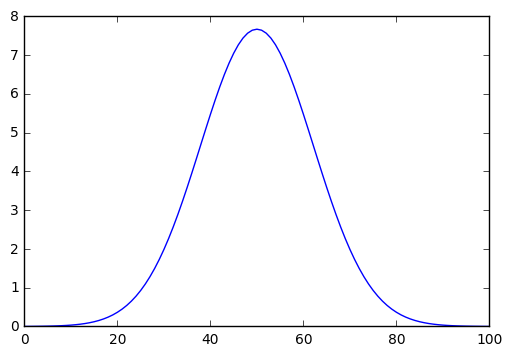

[  0.00000000e+00   1.10439162e-03   2.31411821e-03   3.74127898e-03
   5.51166935e-03   7.77203749e-03   1.06977995e-02   1.45013131e-02
   1.94407625e-02   2.58296452e-02   3.40467779e-02   4.45466475e-02
   5.78698338e-02   7.46531146e-02   9.56387482e-02   1.21682302e-01
   1.53758286e-01   1.92962749e-01   2.40511908e-01   2.97735874e-01
   3.66066500e-01   4.47018501e-01   5.42163096e-01   6.53093664e-01
   7.81383190e-01   9.28533672e-01   1.09591808e+00   1.28471598e+00
   1.49584452e+00   1.72988679e+00   1.98702054e+00   2.26694998e+00
   2.56884452e+00   2.89128779e+00   3.23224069e+00   3.58902191e+00
   3.95830882e+00   4.33616119e+00   4.71806913e+00   5.09902580e+00
   5.47362401e+00   5.83617496e+00   6.18084577e+00   6.50181152e+00
   6.79341649e+00   7.05033841e+00   7.26774921e+00   7.44146541e+00
   7.56808175e+00   7.64508208e+00   7.67092236e+00   7.64508208e+00
   7.56808175e+00   7.44146541e+00   7.26774921e+00   7.05033841e+00
   6.79341649e+00   6.50181152e+00

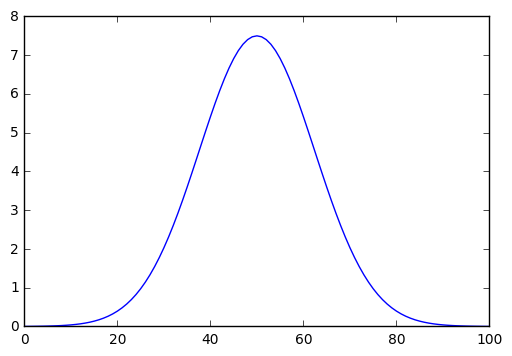

[  0.00000000e+00   1.38522308e-03   2.89280077e-03   4.65220608e-03
   6.80728670e-03   9.52378536e-03   1.29972269e-02   1.74612388e-02
   2.31963236e-02   3.05390410e-02   3.98914830e-02   5.17308408e-02
   6.66187692e-02   8.52101465e-02   1.08260731e-01   1.36633108e-01
   1.71300222e-01   2.13345739e-01   2.63960397e-01   3.24433536e-01
   3.96138997e-01   4.80514704e-01   5.79035369e-01   6.93178012e-01
   8.24380241e-01   9.73991632e-01   1.14321891e+00   1.33306612e+00
   1.54427139e+00   1.77724236e+00   2.03199285e+00   2.30808345e+00
   2.60456925e+00   2.91995779e+00   3.25218038e+00   3.59857972e+00
   3.95591615e+00   4.32039450e+00   4.68771259e+00   5.05313146e+00
   5.41156651e+00   5.75769774e+00   6.08609589e+00   6.39136073e+00
   6.66826668e+00   6.91191035e+00   7.11785428e+00   7.28226093e+00
   7.40201140e+00   7.47480373e+00   7.49922639e+00   7.47480373e+00
   7.40201140e+00   7.28226093e+00   7.11785428e+00   6.91191035e+00
   6.66826668e+00   6.39136073e+00

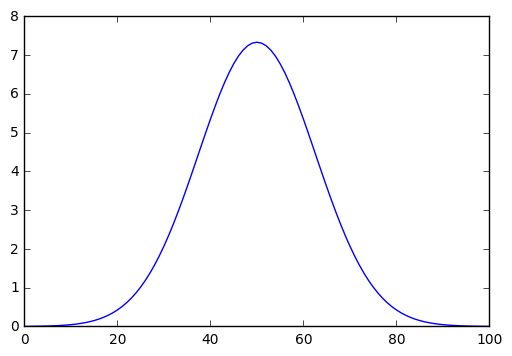

[  0.00000000e+00   1.70829770e-03   3.55665920e-03   5.69254026e-03
   8.27828755e-03   1.14988397e-02   1.55697012e-02   2.07452254e-02
   2.73271923e-02   3.56736103e-02   4.62075998e-02   5.94261353e-02
   7.59083392e-02   9.63229261e-02   1.21434311e-01   1.52106803e-01
   1.89306245e-01   2.34098398e-01   2.87643348e-01   3.51185227e-01
   4.26036603e-01   5.13556978e-01   6.15125019e-01   7.32104366e-01
   8.65803106e-01   1.01742737e+00   1.18802982e+00   1.37845427e+00
   1.58927799e+00   1.82075360e+00   2.07275298e+00   2.34471564e+00
   2.63560434e+00   2.94387069e+00   3.26743343e+00   3.60367180e+00
   3.94943601e+00   4.30107627e+00   4.65449109e+00   5.00519482e+00
   5.34840348e+00   5.67913695e+00   5.99233486e+00   6.28298257e+00
   6.54624294e+00   6.77758920e+00   6.97293384e+00   7.12874840e+00
   7.24216929e+00   7.31108521e+00   7.33420245e+00   7.31108521e+00
   7.24216929e+00   7.12874840e+00   6.97293384e+00   6.77758920e+00
   6.54624294e+00   6.28298257e+00

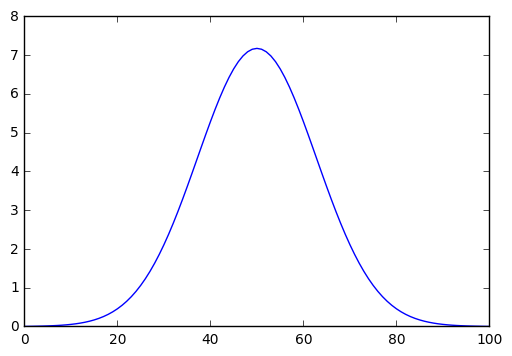

[  0.00000000e+00   2.07483128e-03   4.30791361e-03   6.86508219e-03
   9.92741652e-03   1.36990410e-02   1.84151063e-02   2.43499573e-02
   3.18254475e-02   4.12193011e-02   5.29733620e-02   6.76014926e-02
   8.56968082e-02   1.07937857e-01   1.35093272e-01   1.68024367e-01
   2.07685077e-01   2.55118626e-01   3.11450300e-01   3.77875717e-01
   4.55644077e-01   5.46035979e-01   6.50335560e-01   7.69796910e-01
   9.05605010e-01   1.05883169e+00   1.23038745e+00   1.42097040e+00
   1.63101367e+00   1.86063336e+00   2.10957898e+00   2.37718864e+00
   2.66235161e+00   2.96348044e+00   3.27849508e+00   3.60482097e+00
   3.93940269e+00   4.27873446e+00   4.61890773e+00   4.95567588e+00
   5.28453482e+00   5.60081789e+00   5.89980230e+00   6.17682409e+00
   6.42739768e+00   6.64733577e+00   6.83286527e+00   6.98073469e+00
   7.08830874e+00   7.15364639e+00   7.17555902e+00   7.15364639e+00
   7.08830874e+00   6.98073469e+00   6.83286527e+00   6.64733577e+00
   6.42739768e+00   6.17682409e+00

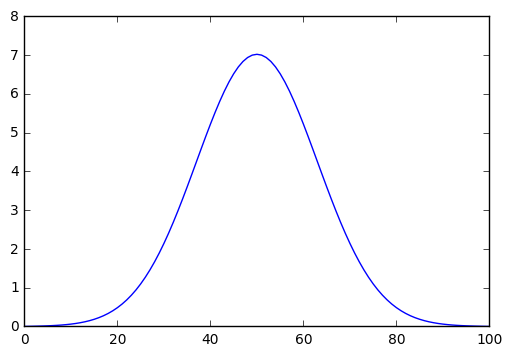

[  0.00000000e+00   2.48550148e-03   5.14771063e-03   8.17103163e-03
   1.17553076e-02   1.61236436e-02   2.15303218e-02   2.82687878e-02
   3.66796421e-02   4.71585189e-02   6.01636750e-02   7.62230432e-02
   9.59404381e-02   1.20000536e-01   1.49172183e-01   1.84309540e-01
   2.26350526e-01   2.76312022e-01   3.35281285e-01   4.04403084e-01
   4.84862151e-01   5.77860639e-01   6.84590465e-01   8.06200614e-01
   9.43759699e-01   1.09821437e+00   1.27034443e+00   1.46071585e+00
   1.66963306e+00   1.89709233e+00   2.14273807e+00   2.40582416e+00
   2.68518246e+00   2.97920057e+00   3.28581077e+00   3.60249194e+00
   3.92628571e+00   4.25382768e+00   4.58139406e+00   4.90496337e+00
   5.22029215e+00   5.52300292e+00   5.80868225e+00   6.07298569e+00
   6.31174651e+00   6.52108414e+00   6.69750873e+00   6.83801767e+00
   6.94018046e+00   7.00220855e+00   7.02300741e+00   7.00220855e+00
   6.94018046e+00   6.83801767e+00   6.69750873e+00   6.52108414e+00
   6.31174651e+00   6.07298569e+00

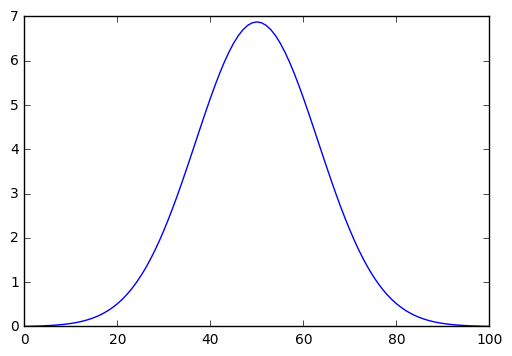

[  0.00000000e+00   2.94046649e-03   6.07616619e-03   9.61006488e-03
   1.37606108e-02   1.87695085e-02   2.49095015e-02   3.24921182e-02
   4.18752942e-02   5.34707363e-02   6.77508390e-02   8.52549062e-02
   1.06594372e-01   1.32456657e-01   1.63607246e-01   2.00889538e-01
   2.45221991e-01   2.97592076e-01   3.59046604e-01   4.30678008e-01
   5.13606263e-01   6.08956278e-01   7.17830679e-01   8.41278190e-01
   9.80257938e-01   1.13560034e+00   1.30796541e+00   1.49779965e+00
   1.70529287e+00   1.93033646e+00   2.17248508e+00   2.43092326e+00
   2.70443919e+00   2.99140720e+00   3.28978083e+00   3.59709776e+00
   3.91049781e+00   4.22675449e+00   4.54232039e+00   4.85338585e+00
   5.15595002e+00   5.44590251e+00   5.71911369e+00   5.97153076e+00
   6.19927676e+00   6.39874892e+00   6.56671320e+00   6.70039122e+00
   6.79753668e+00   6.85649802e+00   6.87626512e+00   6.85649802e+00
   6.79753668e+00   6.70039122e+00   6.56671320e+00   6.39874892e+00
   6.19927676e+00   5.97153076e+00

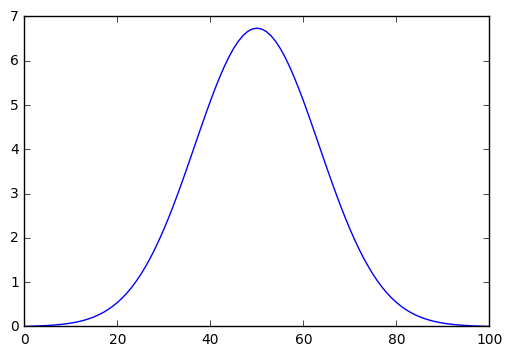

[  0.00000000e+00   3.43939575e-03   7.09243123e-03   1.11804435e-02
   1.59401549e-02   2.16313326e-02   2.85443801e-02   3.70077933e-02
   4.73953777e-02   6.01330760e-02   7.57052141e-02   9.46599148e-02
   1.17613386e-01   1.45252737e-01   1.78336947e-01   2.17695567e-01
   2.64224743e-01   3.18880148e-01   3.82666440e-01   4.56622931e-01
   5.41805237e-01   6.39262800e-01   7.50012330e-01   8.75007378e-01
   1.01510447e+00   1.17102646e+00   1.34332386e+00   1.53233547e+00
   1.73814923e+00   1.96056514e+00   2.19906157e+00   2.45276663e+00
   2.72043650e+00   3.00044197e+00   3.29076488e+00   3.58900554e+00
   3.89240197e+00   4.19786149e+00   4.50200463e+00   4.80122089e+00
   5.09173531e+00   5.36968433e+00   5.63119908e+00   5.87249341e+00
   6.08995425e+00   6.28023099e+00   6.44032114e+00   6.56764892e+00
   6.66013412e+00   6.71624859e+00   6.73505817e+00   6.71624859e+00
   6.66013412e+00   6.56764892e+00   6.44032114e+00   6.28023099e+00
   6.08995425e+00   5.87249341e+00

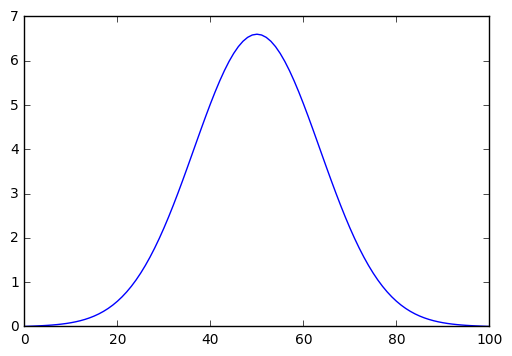

[  0.00000000e+00   3.98150960e-03   8.19477406e-03   1.28791450e-02
   1.82891341e-02   2.47018995e-02   3.24245959e-02   4.18015003e-02
   5.32207957e-02   6.71208541e-02   8.39958189e-02   1.04400246e-01
   1.28952517e-01   1.58336705e-01   1.93302546e-01   2.34663140e-01
   2.83290030e-01   3.40105291e-01   4.06070332e-01   4.82171165e-01
   5.69399977e-01   6.68732979e-01   7.81104638e-01   9.07378551e-01
   1.04831543e+00   1.20453883e+00   1.37649949e+00   1.56443925e+00
   1.76835588e+00   1.98796995e+00   2.22269539e+00   2.47161513e+00
   2.73346322e+00   3.00661491e+00   3.28908590e+00   3.57854165e+00
   3.87231755e+00   4.16745019e+00   4.46071976e+00   4.74870285e+00
   5.02783490e+00   5.29448071e+00   5.54501127e+00   5.77588466e+00
   5.98372858e+00   6.16542180e+00   6.31817195e+00   6.43958669e+00
   6.52773600e+00   6.58120316e+00   6.59912259e+00   6.58120316e+00
   6.52773600e+00   6.43958669e+00   6.31817195e+00   6.16542180e+00
   5.98372858e+00   5.77588466e+00

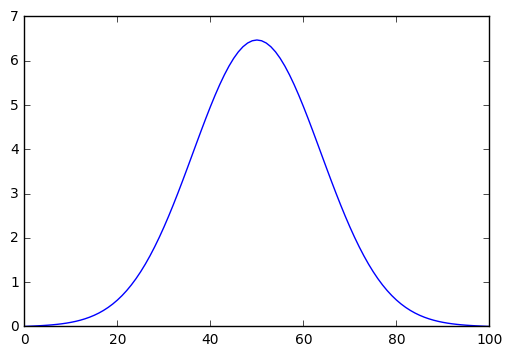

[  0.00000000e+00   4.56562490e-03   9.38067364e-03   1.47020077e-02
   2.08013085e-02   2.79723403e-02   3.65380151e-02   4.68571562e-02
   5.93308293e-02   7.44080780e-02   9.25908615e-02   1.14437960e-01
   1.40567578e-01   1.71658346e-01   2.08448408e-01   2.51732262e-01
   3.02355046e-01   3.61203958e-01   4.29196590e-01   5.07265966e-01
   5.96342211e-01   6.97330872e-01   8.11088043e-01   9.38392604e-01
   1.07991605e+00   1.23619055e+00   1.40757606e+00   1.59422744e+00
   1.79606274e+00   2.01273383e+00   2.24360067e+00   2.48771063e+00
   2.74378405e+00   3.01020720e+00   3.28503390e+00   3.56599630e+00
   3.85052565e+00   4.13578305e+00   4.41870019e+00   4.69602940e+00
   4.96440218e+00   5.22039477e+00   5.46059914e+00   5.68169739e+00
   5.88053733e+00   6.05420682e+00   6.20010456e+00   6.31600471e+00
   6.40011340e+00   6.45111477e+00   6.46820531e+00   6.45111477e+00
   6.40011340e+00   6.31600471e+00   6.20010456e+00   6.05420682e+00
   5.88053733e+00   5.68169739e+00

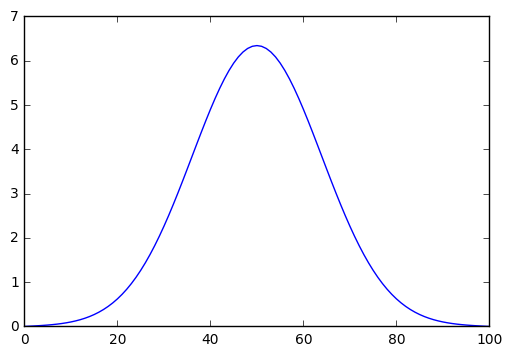

[  0.00000000e+00   5.19020413e-03   1.06469189e-02   1.66438818e-02
   2.34692099e-02   3.14323952e-02   4.08710490e-02   5.21572778e-02
   6.57035513e-02   8.19678942e-02   1.01458202e-01   1.24735453e-01
   1.52415570e-01   1.85169640e-01   2.23722229e-01   2.68847489e-01
   3.21362788e-01   3.82119628e-01   4.51991653e-01   5.31859618e-01
   6.22593291e-01   7.25030359e-01   8.39952521e-01   9.68059126e-01
   1.10993882e+00   1.26603983e+00   1.43663973e+00   1.62181548e+00
   1.82141491e+00   2.03503069e+00   2.26197799e+00   2.50127698e+00
   2.75164133e+00   3.01147372e+00   3.27886929e+00   3.55162764e+00
   3.82727383e+00   4.10308855e+00   4.37614715e+00   4.64336700e+00
   4.90156239e+00   5.14750550e+00   5.37799217e+00   5.58991032e+00
   5.78030934e+00   5.94646808e+00   6.08595933e+00   6.19670877e+00
   6.27704614e+00   6.32574718e+00   6.34206461e+00   6.32574718e+00
   6.27704614e+00   6.19670877e+00   6.08595933e+00   5.94646808e+00
   5.78030934e+00   5.58991032e+00

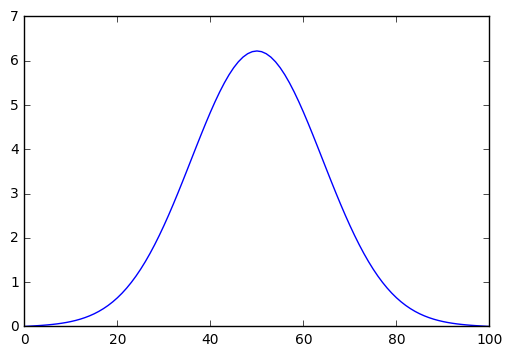

[  0.00000000e+00   5.85340588e-03   1.19897100e-02   1.86987826e-02
   2.62843463e-02   3.50706686e-02   4.54089563e-02   5.76833262e-02
   7.23162044e-02   8.97729841e-02   1.10565747e-01   1.35255832e-01
   1.64455006e-01   1.98825004e-01   2.39075160e-01   2.85957899e-01
   3.40261851e-01   4.02802385e-01   4.74409441e-01   5.55912549e-01
   6.48123083e-01   7.51813828e-01   8.67696107e-01   9.96394812e-01
   1.13842183e+00   1.29414847e+00   1.46377766e+00   1.64731676e+00
   1.84455194e+00   2.05502516e+00   2.27801480e+00   2.51252102e+00
   2.75725679e+00   3.01064550e+00   3.27082598e+00   3.53566536e+00
   3.80278017e+00   4.06956569e+00   4.33323335e+00   4.59085555e+00
   4.83941706e+00   5.07587190e+00   5.29720417e+00   5.50049120e+00
   5.68296733e+00   5.84208616e+00   5.97557949e+00   6.08151108e+00
   6.15832327e+00   6.20487507e+00   6.22047033e+00   6.20487507e+00
   6.15832327e+00   6.08151108e+00   5.97557949e+00   5.84208616e+00
   5.68296733e+00   5.50049120e+00

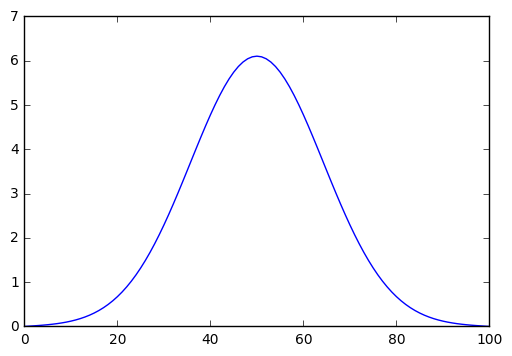

[ 0.          0.00655314  0.01340476  0.02086004  0.0292374   0.03887487
  0.05013613  0.06341602  0.07914554  0.09779591  0.11988179  0.14596322
  0.17664616  0.21258145  0.25446185  0.303017    0.35900616  0.42320847
  0.49641071  0.57939248  0.67290893  0.77767098  0.89432359  1.0234221
  1.16540744  1.32058056  1.48907692  1.67084183  1.86560747  2.07287262
  2.29188591  2.52163366  2.76083312  3.00793186  3.26111406  3.51831394
  3.77723687  4.03538777  4.29010692  4.53861231  4.77804787  5.00553648
  5.21823635  5.41339941  5.58842994  5.74094172  5.86881209  5.97023092
  6.04374328  6.08828408  6.10320378  6.08828408  6.04374328  5.97023092
  5.86881209  5.74094172  5.58842994  5.41339941  5.21823635  5.00553648
  4.77804787  4.53861231  4.29010692  4.03538777  3.77723687  3.51831394
  3.26111406  3.00793186  2.76083312  2.52163366  2.29188591  2.07287262
  1.86560747  1.67084183  1.48907692  1.32058056  1.16540744  1.0234221
  0.89432359  0.77767098  0.67290893  0.57939248  0.4

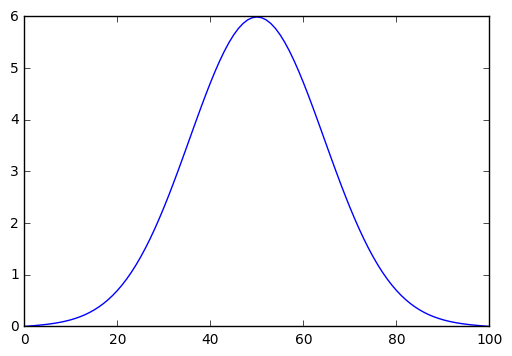

[ 0.          0.00728709  0.01488738  0.02312044  0.03231841  0.04283205
  0.05503634  0.06933563  0.08616811  0.10600942  0.12937529  0.15682298
  0.18895123  0.22639868  0.26984043  0.31998258  0.37755469  0.44329983
  0.51796241  0.60227366  0.69693471  0.80259778  0.91984535  1.04916799
  1.19094114  1.3454015   1.51262366  1.69249775  1.88470889  2.08871933
  2.30375408  2.52879094  2.76255559  3.00352253  3.24992231  3.49975548
  3.75081337  4.00070572  4.24689474  4.4867352   4.71751971  4.93652811
  5.14107986  5.32858802  5.49661331  5.64291665  5.76550874  5.86269491
  5.93311414  5.97577068  5.99005751  5.97577068  5.93311414  5.86269491
  5.76550874  5.64291665  5.49661331  5.32858802  5.14107986  4.93652811
  4.71751971  4.4867352   4.24689474  4.00070572  3.75081337  3.49975548
  3.24992231  3.00352253  2.76255559  2.52879094  2.30375408  2.08871933
  1.88470889  1.69249775  1.51262366  1.3454015   1.19094114  1.04916799
  0.91984535  0.80259778  0.69693471  0.60227366  0

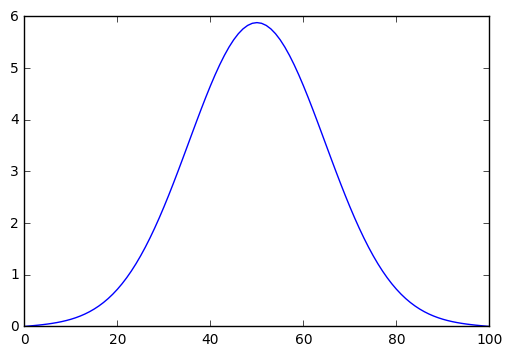

[ 0.          0.00805282  0.01643261  0.02547236  0.03551695  0.04692878
  0.06009299  0.07542222  0.09336054  0.11438667  0.13901609  0.16780193
  0.20133448  0.24023912  0.28517244  0.33681653  0.39587111  0.46304362
  0.53903713  0.62453607  0.72019001  0.82659549  0.94427641  1.07366306
  1.21507059  1.36867712  1.53450245  1.71238775  1.90197728  2.10270267
  2.31377067  2.53415509  2.76259349  2.99758942  3.2374204   3.48015216
  3.72365911  3.96565098  4.20370539  4.43530566  4.65788336  4.86886441
  5.06571777  5.24600545  5.40743239  5.54789487  5.66552605  5.75873716
  5.82625319  5.86714184  5.88083501  5.86714184  5.82625319  5.75873716
  5.66552605  5.54789487  5.40743239  5.24600545  5.06571777  4.86886441
  4.65788336  4.43530566  4.20370539  3.96565098  3.72365911  3.48015216
  3.2374204   2.99758942  2.76259349  2.53415509  2.31377067  2.10270267
  1.90197728  1.71238775  1.53450245  1.36867712  1.21507059  1.07366306
  0.94427641  0.82659549  0.72019001  0.62453607  0

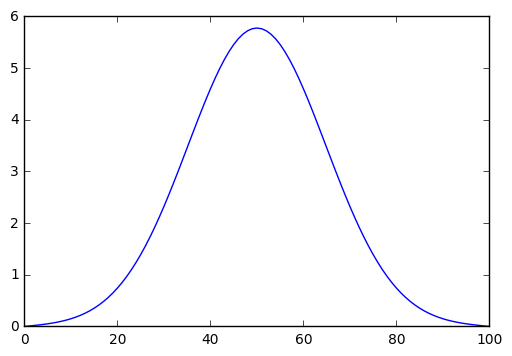

[ 0.          0.00884773  0.01803522  0.02790789  0.03882229  0.05115137
  0.06528933  0.08165586  0.10069973  0.12290149  0.14877511  0.17886845
  0.21376231  0.25406792  0.30042277  0.35348462  0.4139235   0.48241182
  0.55961245  0.64616482  0.7426693   0.84966987  0.96763551  1.09694061
  1.23784484  1.39047306  1.55479579  1.73061092  1.91752738  2.11495144
  2.32207626  2.5378755   2.76110148  2.99028838  3.22376088  3.45964854
  3.69590585  3.93033794  4.16063159  4.384391    4.59917772  4.80255375
  4.99212684  5.16559685  5.32080189  5.45576299  5.56872595  5.65819928
  5.7229869   5.76221472  5.77535027  5.76221472  5.7229869   5.65819928
  5.56872595  5.45576299  5.32080189  5.16559685  4.99212684  4.80255375
  4.59917772  4.384391    4.16063159  3.93033794  3.69590585  3.45964854
  3.22376088  2.99028838  2.76110148  2.5378755   2.32207626  2.11495144
  1.91752738  1.73061092  1.55479579  1.39047306  1.23784484  1.09694061
  0.96763551  0.84966987  0.7426693   0.64616482  0

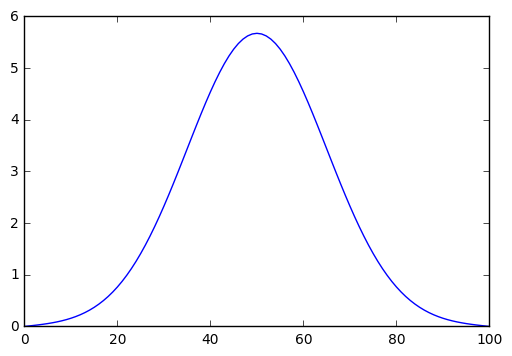

[ 0.          0.00966918  0.0196899   0.03041895  0.04222352  0.05548604
  0.07060861  0.08801686  0.10816307  0.13152848  0.15862448  0.18999261
  0.22620328  0.26785291  0.31555947  0.36995628  0.43168399  0.50138075
  0.57967048  0.66714947  0.76437131  0.8718304   0.98994443  1.11903594
  1.25931371  1.41085419  1.57358372  1.74726203  1.93146772  2.12558627
  2.32880133  2.54008974  2.75822085  2.98176067  3.20908091  3.43837344
  3.66766982  3.89486612  4.11775237  4.3340465   4.54143171  4.73759691
  4.92027884  5.08730513  5.23663705  5.36641073  5.47497579  5.56093026
  5.62315061  5.66081622  5.67342737  5.66081622  5.62315061  5.56093026
  5.47497579  5.36641073  5.23663705  5.08730513  4.92027884  4.73759691
  4.54143171  4.3340465   4.11775237  3.89486612  3.66766982  3.43837344
  3.20908091  2.98176067  2.75822085  2.54008974  2.32880133  2.12558627
  1.93146772  1.74726203  1.57358372  1.41085419  1.25931371  1.11903594
  0.98994443  0.8718304   0.76437131  0.66714947  0

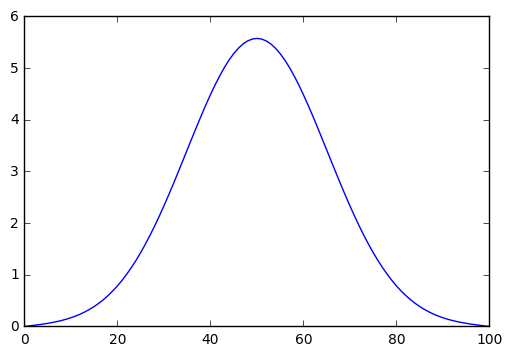

[ 0.          0.01051448  0.02139122  0.03299738  0.04570971  0.05991903
  0.07603426  0.09448586  0.11572857  0.14024323  0.16853765  0.20114618
  0.23862813  0.28156456  0.33055367  0.3862044   0.44912849  0.51993068
  0.59919735  0.6874835   0.78529836  0.89308969  1.01122729  1.13998576
  1.27952722  1.42988423  1.59094359  1.76243151  1.94390069  2.13471995
  2.33406692  2.5409244   2.75408069  2.9721344   3.19350392  3.41644174
  3.63905353  3.85932199  4.07513487  4.28431707  4.48466582  4.67398845
  4.85014172  5.01107188  5.1548542   5.27973124  5.38414844  5.46678632
  5.52658818  5.56278261  5.57489997  5.56278261  5.52658818  5.46678632
  5.38414844  5.27973124  5.1548542   5.01107188  4.85014172  4.67398845
  4.48466582  4.28431707  4.07513487  3.85932199  3.63905353  3.41644174
  3.19350392  2.9721344   2.75408069  2.5409244   2.33406692  2.13471995
  1.94390069  1.76243151  1.59094359  1.42988423  1.27952722  1.13998576
  1.01122729  0.89308969  0.78529836  0.6874835   0

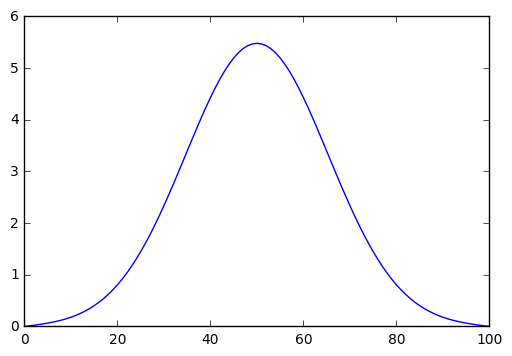

[ 0.          0.01138091  0.02313377  0.03563503  0.04926997  0.06443673
  0.08155001  0.10104405  0.123375    0.14902236  0.17848945  0.21230272
  0.25100974  0.29517586  0.34537936  0.40220505  0.4662363   0.53804546
  0.61818275  0.70716381  0.80545585  0.91346287  1.03151005  1.15982768
  1.29853519  1.4476254   1.60694986  1.77620541  1.95492283  2.14245786
  2.33798522  2.54049599  2.74879893  2.96152575  3.17714095  3.39395587
  3.61014738  3.82378064  4.03283592  4.23523882  4.42889347  4.61171785
  4.78168055  4.936838    5.07537124  5.19562131  5.29612223  5.37563068
  5.43315163  5.46795899  5.47961089  5.46795899  5.43315163  5.37563068
  5.29612223  5.19562131  5.07537124  4.936838    4.78168055  4.61171785
  4.42889347  4.23523882  4.03283592  3.82378064  3.61014738  3.39395587
  3.17714095  2.96152575  2.74879893  2.54049599  2.33798522  2.14245786
  1.95492283  1.77620541  1.60694986  1.4476254   1.29853519  1.15982768
  1.03151005  0.91346287  0.80545585  0.70716381  0

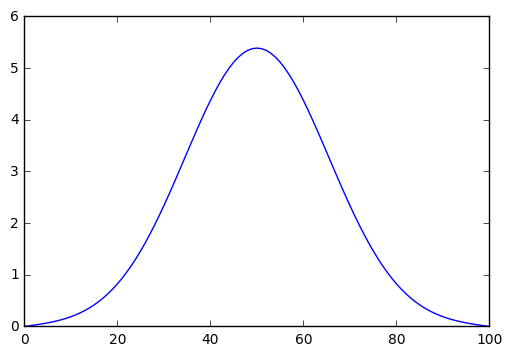

[ 0.          0.01226578  0.02491216  0.03832385  0.05289359  0.06902585
  0.08714004  0.10767321  0.13108197  0.1578436   0.18845618  0.22343755
  0.2633231   0.30866222  0.36001329  0.41793729  0.4829899   0.55571211
  0.6366195   0.72619021  0.82485178  0.93296715  1.05082     1.17859978
  1.31638687  1.46413824  1.62167399  1.78866542  1.96462494  2.14889839
  2.34066019  2.53891173  2.74248333  2.95004014  3.16009194  3.3710072
  3.58103103  3.78830718  3.99090343  4.18684028  4.37412215  4.55077052
  4.71485825  4.8645443   4.99810792  5.11398144  5.21078086  5.28733334
  5.34270077  5.37619893  5.38741156  5.37619893  5.34270077  5.28733334
  5.21078086  5.11398144  4.99810792  4.8645443   4.71485825  4.55077052
  4.37412215  4.18684028  3.99090343  3.78830718  3.58103103  3.3710072
  3.16009194  2.95004014  2.74248333  2.53891173  2.34066019  2.14889839
  1.96462494  1.78866542  1.62167399  1.46413824  1.31638687  1.17859978
  1.05082     0.93296715  0.82485178  0.72619021  0.6

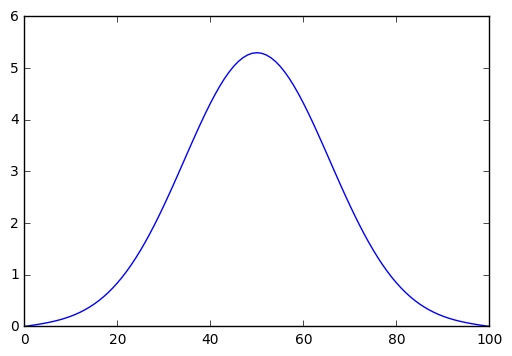

[ 0.          0.01316644  0.02672111  0.04105593  0.0565701   0.07367341
  0.09278902  0.11435583  0.13883004  0.16668591  0.19841557  0.23452773
  0.27554525  0.32200138  0.37443475  0.43338292  0.49937461  0.57292058
  0.65450323  0.74456508  0.84349629  0.95162136  1.06918541  1.19634027
  1.33313072  1.47948135  1.6351844   1.79988902  1.97309243  2.15413334
  2.34218817  2.53627025  2.7352324   2.93777319  3.14244689  3.3476772
  3.5517747   3.75295793  3.94937756  4.13914352  4.32035441  4.49112858
  4.64963627  4.79413192  4.9229861   5.0347159   5.12801334  5.20177077
  5.25510281  5.28736394  5.29816157  5.28736394  5.25510281  5.20177077
  5.12801334  5.0347159   4.9229861   4.79413192  4.64963627  4.49112858
  4.32035441  4.13914352  3.94937756  3.75295793  3.5517747   3.3476772
  3.14244689  2.93777319  2.7352324   2.53627025  2.34218817  2.15413334
  1.97309243  1.79988902  1.6351844   1.47948135  1.33313072  1.19634027
  1.06918541  0.95162136  0.84349629  0.74456508  0.6

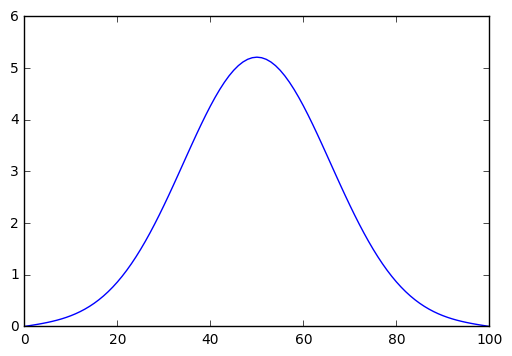

[ 0.          0.0140803   0.02855543  0.04382356  0.06028935  0.0783669
  0.09848222  0.12107519  0.14660075  0.17552944  0.20834684  0.24555208
  0.28765521  0.33517332  0.38862545  0.44852627  0.51537834  0.58966333
  0.67183195  0.76229298  0.86140134  0.96944561  1.08663516  1.21308721
  1.3488141   1.49371133  1.64754645  1.80994955  1.98040547  2.15824829
  2.34265837  2.53266232  2.72713615  2.92481173  3.12428683  3.32403854
  3.5224402   3.71778154  3.90829173  4.09216506  4.26758862  4.43277154
  4.58597504  4.72554266  4.84992995  4.95773278  5.04771372  5.11882565
  5.17023199  5.20132309  5.21172825  5.20132309  5.17023199  5.11882565
  5.04771372  4.95773278  4.84992995  4.72554266  4.58597504  4.43277154
  4.26758862  4.09216506  3.90829173  3.71778154  3.5224402   3.32403854
  3.12428683  2.92481173  2.72713615  2.53266232  2.34265837  2.15824829
  1.98040547  1.80994955  1.64754645  1.49371133  1.3488141   1.21308721
  1.08663516  0.96944561  0.86140134  0.76229298  0.

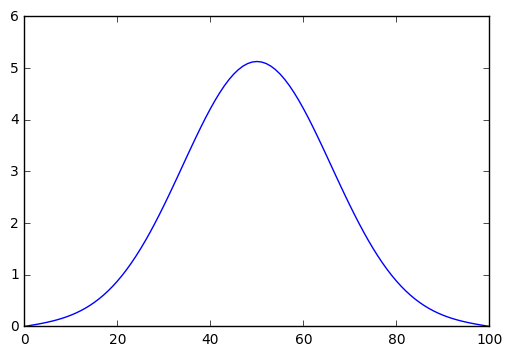

[ 0.          0.01500483  0.03041013  0.04661929  0.06404151  0.08309429
  0.10420557  0.12781536  0.15437666  0.18435559  0.21823067  0.25649109
  0.29963389  0.34816005  0.40256933  0.463354    0.53099136  0.60593513
  0.68860584  0.7793803   0.87858032  0.98646096  1.10319847  1.22887827
  1.36348322  1.50688266  1.65882244  1.81891634  1.98663934  2.16132303
  2.3421534   2.52817148  2.71827689  2.91123456  3.10568472  3.30015602
  3.49308191  3.68281989  3.86767353  4.04591669  4.21581971  4.37567685
  4.52383446  4.65871925  4.77886598  4.88294385  4.96978104  5.03838658
  5.08796921  5.11795253  5.12798615  5.11795253  5.08796921  5.03838658
  4.96978104  4.88294385  4.77886598  4.65871925  4.52383446  4.37567685
  4.21581971  4.04591669  3.86767353  3.68281989  3.49308191  3.30015602
  3.10568472  2.91123456  2.71827689  2.52817148  2.3421534   2.16132303
  1.98663934  1.81891634  1.65882244  1.50688266  1.36348322  1.22887827
  1.10319847  0.98646096  0.87858032  0.7793803   0

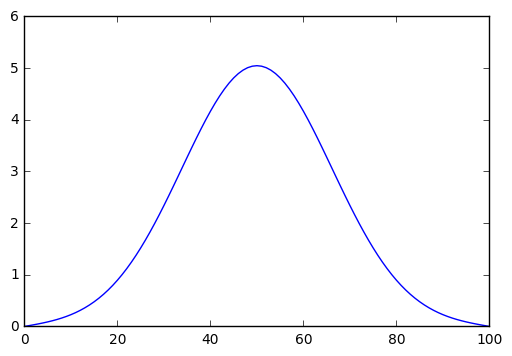

[ 0.          0.01593762  0.03228037  0.04943597  0.0678172   0.08784408
  0.10994566  0.13456132  0.16214138  0.19314699  0.22804917  0.26732687
  0.31146402  0.36094558  0.41625237  0.4778549   0.54620605  0.62173279
  0.70482691  0.795835    0.89504783  1.00268918  1.11890467  1.24375054
  1.37718291  1.5190477   1.6690717   1.82685488  1.99186463  2.16343191
  2.34074978  2.52287459  2.70872987  2.89711325  3.08670629  3.27608742
  3.46374761  3.64810894  3.82754545  4.00040616  4.16503976  4.31982041
  4.46317419  4.59360555  4.70972317  4.8102646   4.89411904  4.96034777
  5.00820164  5.03713512  5.04681669  5.03713512  5.00820164  4.96034777
  4.89411904  4.8102646   4.70972317  4.59360555  4.46317419  4.31982041
  4.16503976  4.00040616  3.82754545  3.64810894  3.46374761  3.27608742
  3.08670629  2.89711325  2.70872987  2.52287459  2.34074978  2.16343191
  1.99186463  1.82685488  1.6690717   1.5190477   1.37718291  1.24375054
  1.11890467  1.00268918  0.89504783  0.795835    0

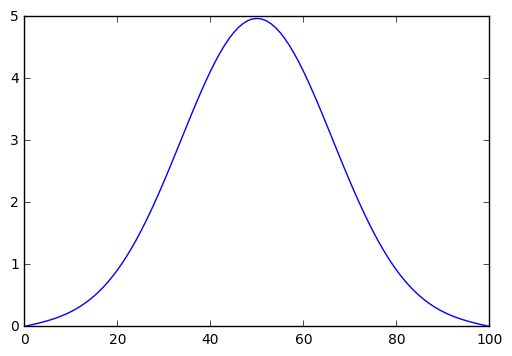

[ 0.          0.01687632  0.03416152  0.05226674  0.07160745  0.09260536
  0.11568983  0.14129888  0.16987956  0.20188752  0.23778587  0.27804312
  0.32313005  0.37351576  0.42966252  0.49201971  0.56101671  0.63705489
  0.72049874  0.81166638  0.91081939  1.01815249  1.13378299  1.2577404
  1.3899566   1.53025664  1.67835061  1.83382698  1.99614751  2.16464417
  2.33851835  2.5168424   2.69856393  2.88251277  3.06741075  3.25188421
  3.43447925  3.61367942  3.78792558  3.95563777  4.11523847  4.26517692
  4.40395394  4.53014672  4.64243299  4.73961406  4.82063602  4.8846088
  4.93082241  4.95876004  4.96810769  4.95876004  4.93082241  4.8846088
  4.82063602  4.73961406  4.64243299  4.53014672  4.40395394  4.26517692
  4.11523847  3.95563777  3.78792558  3.61367942  3.43447925  3.25188421
  3.06741075  2.88251277  2.69856393  2.5168424   2.33851835  2.16464417
  1.99614751  1.83382698  1.67835061  1.53025664  1.3899566   1.2577404
  1.13378299  1.01815249  0.91081939  0.81166638  0.720

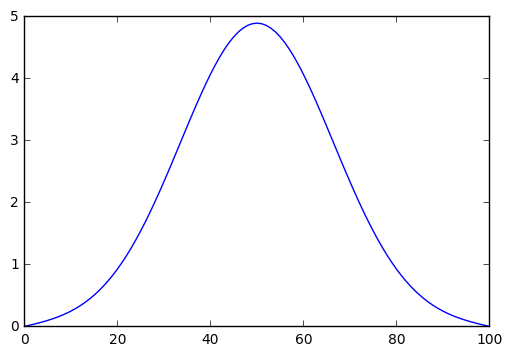

[ 0.          0.01781871  0.03604918  0.05510508  0.07540376  0.0973678
  0.12142614  0.14801479  0.17757691  0.21056224  0.24742566  0.28862504
  0.33461805  0.38585814  0.44278946  0.50584093  0.57541933  0.65190159
  0.73562633  0.82688478  0.92591125  1.0328734   1.14786241  1.27088337
  1.40184625  1.54055749  1.68671273  1.83989092  1.99954997  2.16502433
  2.3355247   2.51014003  2.68784203  2.86749218  3.04785139  3.22759224
  3.40531357  3.57955745  3.74882818  3.9116129   4.06640365  4.21172027
  4.34613371  4.4682893   4.57692937  4.67091476  4.74924464  4.8110743
  4.85573024  4.88272237  4.89175303  4.88272237  4.85573024  4.8110743
  4.74924464  4.67091476  4.57692937  4.4682893   4.34613371  4.21172027
  4.06640365  3.9116129   3.74882818  3.57955745  3.40531357  3.22759224
  3.04785139  2.86749218  2.68784203  2.51014003  2.3355247   2.16502433
  1.99954997  1.83989092  1.68671273  1.54055749  1.40184625  1.27088337
  1.14786241  1.0328734   0.92591125  0.82688478  0.73

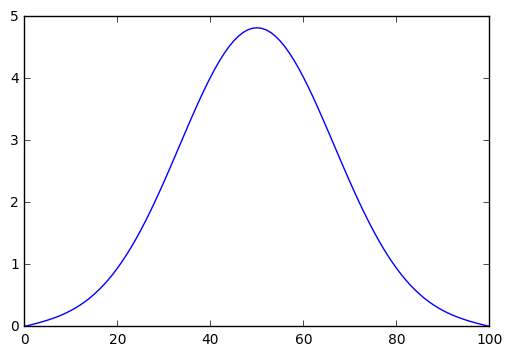

[ 0.          0.01876268  0.03793917  0.05794483  0.07919811  0.10212169
  0.1271434   0.15469665  0.18522019  0.21915742  0.25695474  0.29905928
  0.34591565  0.39796189  0.45562453  0.51931268  0.58941145  0.66627447
  0.75021583  0.84150146  0.94034018  1.0468745   1.16117153  1.28321407
  1.41289229  1.54999615  1.69420885  1.84510163  2.00213011  2.16463247
  2.3318296   2.50282745  2.67662176  2.85210508  3.02807625  3.20325234
  3.37628269  3.54576515  3.71026417  3.8683304   4.0185215   4.15942374
  4.28967394  4.40798133  4.5131487   4.60409256  4.67986171  4.73965372
  4.78282913  4.80892281  4.81765228  4.80892281  4.78282913  4.73965372
  4.67986171  4.60409256  4.5131487   4.40798133  4.28967394  4.15942374
  4.0185215   3.8683304   3.71026417  3.54576515  3.37628269  3.20325234
  3.02807625  2.85210508  2.67662176  2.50282745  2.3318296   2.16463247
  2.00213011  1.84510163  1.69420885  1.54999615  1.41289229  1.28321407
  1.16117153  1.0468745   0.94034018  0.84150146  0

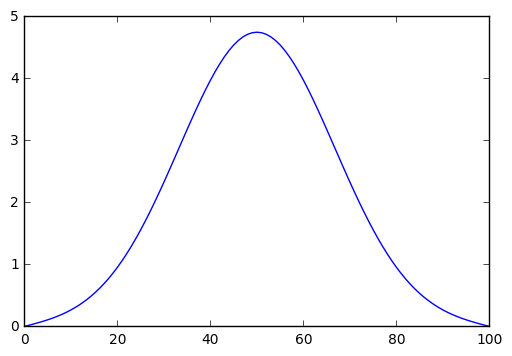

[ 0.          0.01970625  0.03982754  0.06078018  0.08298294  0.10685791
  0.13283119  0.16133296  0.19279716  0.22766047  0.26636059  0.30933384
  0.35701189  0.40981768  0.46816055  0.53243054  0.60299197  0.6801763
  0.76427439  0.85552842  0.95412334  1.06017837  1.17373846  1.29476608
  1.42313361  1.55861643  1.70088711  1.84951083  2.0039423   2.16352453
  2.32748929  2.49495986  2.66495584  2.83640019  3.00812856  3.17890081
  3.34741463  3.51232104  3.6722416   3.82578705  3.97157699  4.10826029
  4.23453568  4.34917235  4.45102978  4.5390766   4.61240797  4.67026102
  4.71202808  4.73726729  4.74571034  4.73726729  4.71202808  4.67026102
  4.61240797  4.5390766   4.45102978  4.34917235  4.23453568  4.10826029
  3.97157699  3.82578705  3.6722416   3.51232104  3.34741463  3.17890081
  3.00812856  2.83640019  2.66495584  2.49495986  2.32748929  2.16352453
  2.0039423   1.84951083  1.70088711  1.55861643  1.42313361  1.29476608
  1.17373846  1.06017837  0.95412334  0.85552842  0.

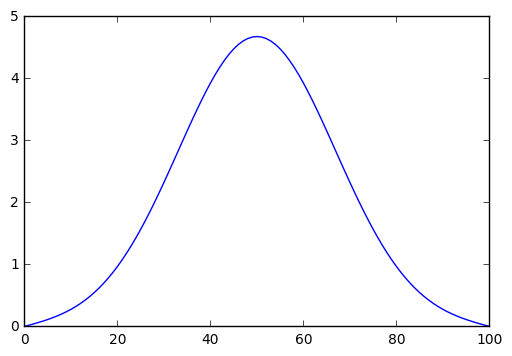

[ 0.          0.02064753  0.04171059  0.06360569  0.0867512   0.111568
  0.13847981  0.16791311  0.20029658  0.23605989  0.27563188  0.31943804
  0.36789721  0.42141754  0.48039172  0.5451914   0.616161    0.69361089
  0.77781001  0.86897818  0.96727813  1.07280745  1.18559074  1.30557197
  1.43260756  1.56646009  1.70679312  1.85316722  2.00503748  2.16175259
  2.32255587  2.4865881   2.6528925   2.82042178  2.98804722  3.15456991
  3.31873379  3.47924054  3.63476599  3.78397781  3.9255541   4.05820271
  4.18068067  4.29181348  4.39051379  4.47579909  4.54680794  4.60281449
  4.64324077  4.66766667  4.67583713  4.66766667  4.64324077  4.60281449
  4.54680794  4.47579909  4.39051379  4.29181348  4.18068067  4.05820271
  3.9255541   3.78397781  3.63476599  3.47924054  3.31873379  3.15456991
  2.98804722  2.82042178  2.6528925   2.4865881   2.32255587  2.16175259
  2.00503748  1.85316722  1.70679312  1.56646009  1.43260756  1.30557197
  1.18559074  1.07280745  0.96727813  0.86897818  0.7

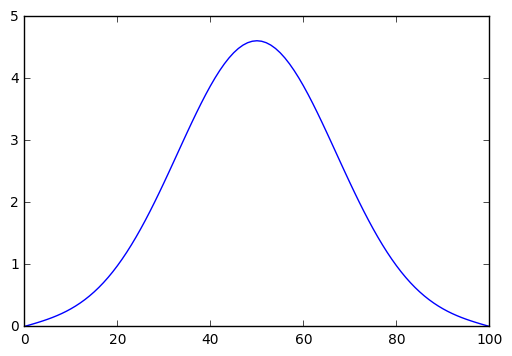

[ 0.          0.02158477  0.04358485  0.06641626  0.09049632  0.11624406
  0.14408028  0.17442731  0.20770818  0.24434528  0.28475846  0.32936239
  0.37856327  0.43275479  0.49231349  0.55759334  0.62891973  0.706583
  0.79083139  0.88186374  0.97982205  1.08478392  1.19675525  1.31566324
  1.44134999  1.57356691  1.71197003  1.85611666  2.00546329  2.15936518
  2.3170776   2.47775898  2.64047589  2.80421004  2.96786726  3.13028825
  3.29026127  3.4465363   3.59784073  3.74289616  3.88043602  4.00922382
  4.12807145  4.23585739  4.33154422  4.41419525  4.48298973  4.53723647
  4.5763853   4.60003645  4.60794728  4.60003645  4.5763853   4.53723647
  4.48298973  4.41419525  4.33154422  4.23585739  4.12807145  4.00922382
  3.88043602  3.74289616  3.59784073  3.4465363   3.29026127  3.13028825
  2.96786726  2.80421004  2.64047589  2.47775898  2.3170776   2.15936518
  2.00546329  1.85611666  1.71197003  1.57356691  1.44134999  1.31566324
  1.19675525  1.08478392  0.97982205  0.88186374  0.7

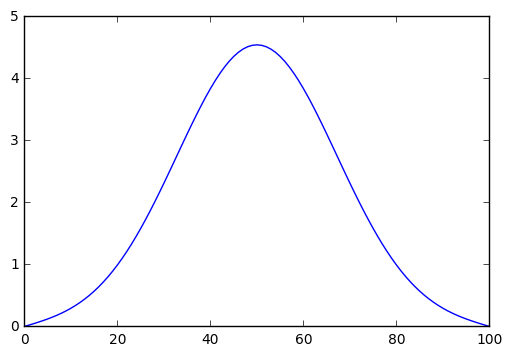

[ 0.          0.02251634  0.04544712  0.06920719  0.09421222  0.12087881
  0.14962437  0.18086661  0.21502258  0.25250722  0.29373125  0.33909858
  0.38900293  0.44382393  0.50392247  0.56963551  0.64127031  0.71909817
  0.8033478   0.89419841  0.99177265  1.09612967  1.20725821  1.32507027
  1.44939522  1.57997473  1.71645868  1.85840227  2.00526436  2.15640746
  2.31109919  2.46851564  2.62774641  2.78780151  2.94762017  3.10608122
  3.26201532  3.41421854  3.5614673   3.70253432  3.83620539  3.96129655
  4.07667142  4.18125832  4.27406679  4.35420315  4.42088484  4.47345312
  4.51138393  4.53429652  4.54195986  4.53429652  4.51138393  4.47345312
  4.42088484  4.35420315  4.27406679  4.18125832  4.07667142  3.96129655
  3.83620539  3.70253432  3.5614673   3.41421854  3.26201532  3.10608122
  2.94762017  2.78780151  2.62774641  2.46851564  2.31109919  2.15640746
  2.00526436  1.85840227  1.71645868  1.57997473  1.44939522  1.32507027
  1.20725821  1.09612967  0.99177265  0.89419841  0

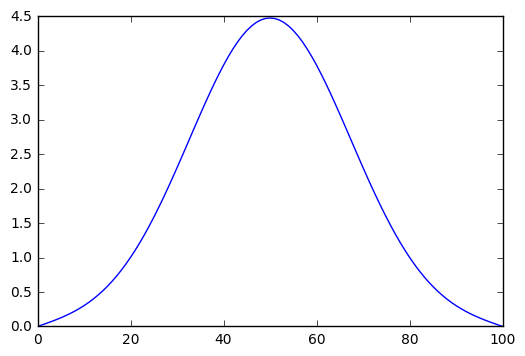

[ 0.          0.02344073  0.04729439  0.07197409  0.09789326  0.12546555
  0.1551045   0.18722284  0.22223134  0.26053727  0.30254221  0.34863934
  0.39921016  0.45462054  0.51521629  0.58131803  0.65321572  0.73116261
  0.81536901  0.90599571  1.00314741  1.10686617  1.21712508  1.33382238
  1.4567761   1.58571955  1.72029768  1.86006461  2.00448244  2.15292149
  2.30466204  2.45889781  2.61474105  2.77122936  2.92733424  3.08197123
  3.23401159  3.38229535  3.52564556  3.66288347  3.79284441  3.91439406
  4.02644486  4.12797207  4.21802939  4.29576359  4.36042796  4.41139426
  4.44816284  4.47037084  4.4777981   4.47037084  4.44816284  4.41139426
  4.36042796  4.29576359  4.21802939  4.12797207  4.02644486  3.91439406
  3.79284441  3.66288347  3.52564556  3.38229535  3.23401159  3.08197123
  2.92733424  2.77122936  2.61474105  2.45889781  2.30466204  2.15292149
  2.00448244  1.86006461  1.72029768  1.58571955  1.4567761   1.33382238
  1.21712508  1.10686617  1.00314741  0.90599571  0

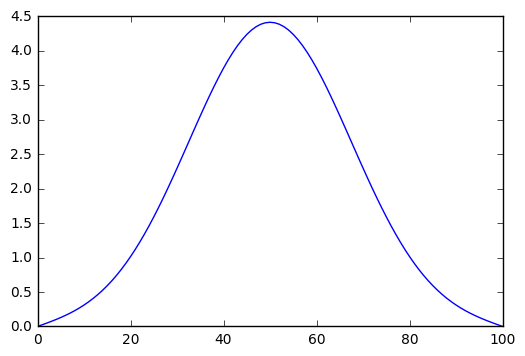

[ 0.          0.02435654  0.04912392  0.07471295  0.10153429  0.12999816
  0.1605138   0.1934886   0.22932684  0.26842793  0.31118427  0.35797844
  0.40917991  0.46514121  0.52619354  0.59264188  0.66475967  0.7427831
  0.82690513  0.91726932  1.01396368  1.11701451  1.22638059  1.34194775
  1.46352404  1.59083559  1.72352352  1.86114185  2.00315661  2.14894644
  2.2978045   2.44894208  2.60149367  2.75452371  2.90703492  3.05797812
  3.20626346  3.35077295  3.490374    3.62393393  3.75033501  3.86848987
  3.977357    4.07595595  4.16338201  4.23881999  4.30155689  4.3509931
  4.38665192  4.40818724  4.41538914  4.40818724  4.38665192  4.3509931
  4.30155689  4.23881999  4.16338201  4.07595595  3.977357    3.86848987
  3.75033501  3.62393393  3.490374    3.35077295  3.20626346  3.05797812
  2.90703492  2.75452371  2.60149367  2.44894208  2.2978045   2.14894644
  2.00315661  1.86114185  1.72352352  1.59083559  1.46352404  1.34194775
  1.22638059  1.11701451  1.01396368  0.91726932  0.82

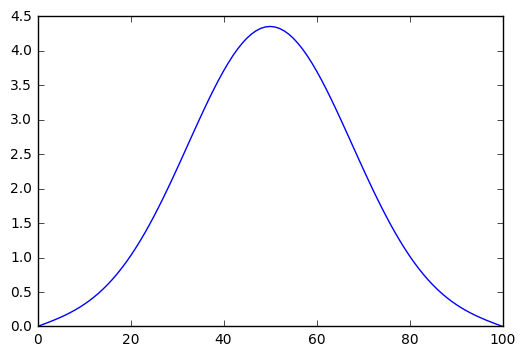

[ 0.          0.02526248  0.05093317  0.07742008  0.10513058  0.13447104
  0.16584601  0.19965724  0.23630225  0.27617255  0.31965129  0.36711057
  0.41890809  0.47538341  0.53685365  0.60360878  0.67590654  0.75396692
  0.83796658  0.92803299  1.02423861  1.12659527  1.23504868  1.34947353
  1.46966904  1.59535534  1.7261707   1.86166985  2.00132343  2.14451879
  2.29056215  2.4386822   2.58803526  2.7377119   2.88674499  3.03411931
  3.17878225  3.31965588  3.45564989  3.58567533  3.70865897  3.82355786
  3.92937403  4.0251688   4.11007667  4.18331827  4.2442123   4.29218609
  4.32678451  4.34767719  4.3546638   4.34767719  4.32678451  4.29218609
  4.2442123   4.18331827  4.11007667  4.0251688   3.92937403  3.82355786
  3.70865897  3.58567533  3.45564989  3.31965588  3.17878225  3.03411931
  2.88674499  2.7377119   2.58803526  2.4386822   2.29056215  2.14451879
  2.00132343  1.86166985  1.7261707   1.59535534  1.46966904  1.34947353
  1.23504868  1.12659527  1.02423861  0.92803299  0

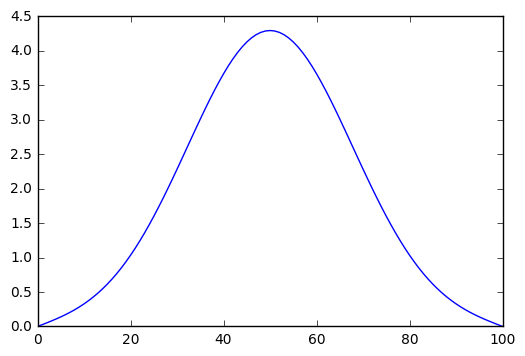

[ 0.          0.02615737  0.05271985  0.08009211  0.10867786  0.13887914
  0.17109551  0.20572278  0.24315155  0.28376528  0.32793796  0.3760313
  0.42839149  0.48534548  0.54719684  0.61422117  0.68666124  0.76472175
  0.84856402  0.93830045  1.03398913  1.13562854  1.24315252  1.35642576
  1.47523977  1.59930968  1.72827181  1.86168236  1.99901712  2.13967252
  2.2829679   2.42814923  2.5743942   2.72081875  2.86648493  3.01041013
  3.15157747  3.28894727  3.42146947  3.54809671  3.66779797  3.77957237
  3.88246309  3.97557091  4.05806731  4.12920669  4.18833761  4.23491274
  4.26849724  4.28877557  4.29555638  4.28877557  4.26849724  4.23491274
  4.18833761  4.12920669  4.05806731  3.97557091  3.88246309  3.77957237
  3.66779797  3.54809671  3.42146947  3.28894727  3.15157747  3.01041013
  2.86648493  2.72081875  2.5743942   2.42814923  2.2829679   2.13967252
  1.99901712  1.86168236  1.72827181  1.59930968  1.47523977  1.35642576
  1.24315252  1.13562854  1.03398913  0.93830045  0.

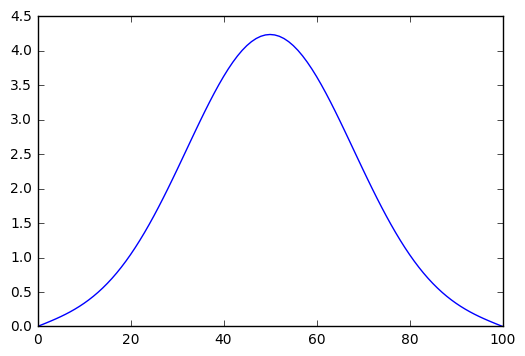

[ 0.          0.02704015  0.05448185  0.08272601  0.11217223  0.1432179
  0.17625724  0.2116799   0.2498694   0.29120109  0.3360398   0.38473701
  0.43762767  0.49502651  0.55722402  0.62448206  0.69702917  0.77505559
  0.85870821  0.94808539  1.04323188  1.14413389  1.2507145   1.36282944
  1.48026356  1.60272788  1.72985762  1.86121108  1.99626972  2.13443928
  2.2750523   2.41737181  2.56059644  2.70386677  2.84627303  2.98686399
  3.124657    3.25864893  3.3878281   3.51118669  3.62773373  3.73650823
  3.83659229  3.92712401  4.00730975  4.0764358   4.13387885  4.17911545
  4.21172985  4.23142046  4.23800442  4.23142046  4.21172985  4.17911545
  4.13387885  4.0764358   4.00730975  3.92712401  3.83659229  3.73650823
  3.62773373  3.51118669  3.3878281   3.25864893  3.124657    2.98686399
  2.84627303  2.70386677  2.56059644  2.41737181  2.2750523   2.13443928
  1.99626972  1.86121108  1.72985762  1.60272788  1.48026356  1.36282944
  1.2507145   1.14413389  1.04323188  0.94808539  0.

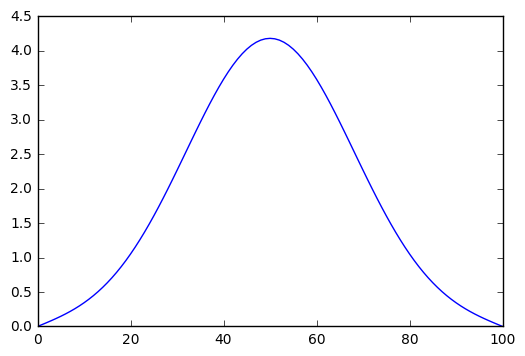

[ 0.          0.02790985  0.05621727  0.08531902  0.1156102   0.14748324
  0.18132672  0.21752393  0.25645116  0.29847563  0.34395304  0.39322483
  0.44661494  0.50442626  0.56693671  0.63439501  0.70701616  0.78497672
  0.86841006  0.95740141  1.05198319  1.15213036  1.25775622  1.36870857
  1.48476648  1.60563776  1.73095721  1.86028585  1.99311119  2.12884854
  2.26684363  2.40637634  2.54666574  2.68687637  2.82612566  2.96349259
  3.09802728  3.2287616   3.35472041  3.47493354  3.58844806  3.69434079
  3.79173071  3.8797912   3.95776162  4.0249583   4.08078452  4.12473932
  4.15642497  4.17555299  4.18194853  4.17555299  4.15642497  4.12473932
  4.08078452  4.0249583   3.95776162  3.8797912   3.79173071  3.69434079
  3.58844806  3.47493354  3.35472041  3.2287616   3.09802728  2.96349259
  2.82612566  2.68687637  2.54666574  2.40637634  2.26684363  2.12884854
  1.99311119  1.86028585  1.73095721  1.60563776  1.48476648  1.36870857
  1.25775622  1.15213036  1.05198319  0.95740141  0

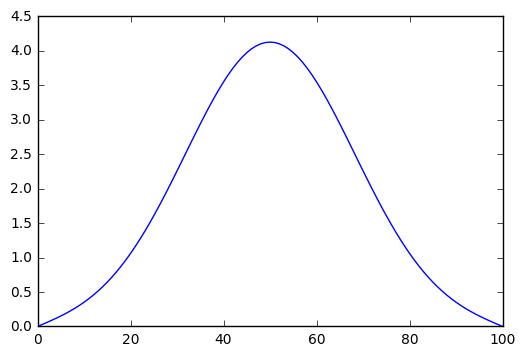

[ 0.          0.02876561  0.05792442  0.08786868  0.11898867  0.15167153
  0.18629998  0.22325077  0.26289284  0.30558523  0.35167463  0.40149257
  0.45535227  0.51354514  0.57633702  0.64396405  0.71662836  0.79449363
  0.87768049  0.96626197  1.06025905  1.15963641  1.26429851  1.37408612
  1.4887734   1.60806568  1.73159803  1.85893469  1.98956958  2.12292777
  2.25836813  2.39518713  2.53262385  2.66986603  2.80605742  2.94030605
  3.07169348  3.199285    3.32214037  3.43932526  3.54992289  3.65304594
  3.74784839  3.83353695  3.90938222  3.97472894  4.02900545  4.07173204
  4.10252796  4.12111713  4.1273322   4.12111713  4.10252796  4.07173204
  4.02900545  3.97472894  3.90938222  3.83353695  3.74784839  3.65304594
  3.54992289  3.43932526  3.32214037  3.199285    3.07169348  2.94030605
  2.80605742  2.66986603  2.53262385  2.39518713  2.25836813  2.12292777
  1.98956958  1.85893469  1.73159803  1.60806568  1.4887734   1.37408612
  1.26429851  1.15963641  1.06025905  0.96626197  0

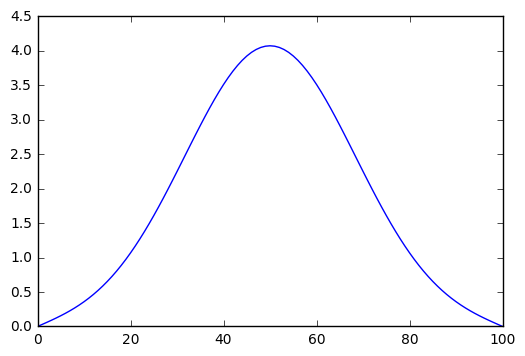

[ 0.          0.02960663  0.05960176  0.0903728   0.12230487  0.15577958
  0.19117357  0.22885687  0.26919101  0.31252687  0.35920216  0.4095387
  0.46383925  0.52238413  0.58542753  0.6531936   0.72587225  0.80361496
  0.88653044  0.97468035  1.06807511  1.16666997  1.27036146  1.37898412
  1.492308    1.61003666  1.73180599  1.85718396  1.98567117  2.11670256
  2.2496501   2.3838266   2.51849063  2.65285249  2.78608134  2.91731312
  3.0456596   3.17021802  3.29008146  3.40434969  3.51214034  3.61260017
  3.70491628  3.78832703  3.86213254  3.92570441  3.9784947   4.02004374
  4.04998682  4.06805954  4.07410167  4.06805954  4.04998682  4.02004374
  3.9784947   3.92570441  3.86213254  3.78832703  3.70491628  3.61260017
  3.51214034  3.40434969  3.29008146  3.17021802  3.0456596   2.91731312
  2.78608134  2.65285249  2.51849063  2.3838266   2.2496501   2.11670256
  1.98567117  1.85718396  1.73180599  1.61003666  1.492308    1.37898412
  1.27036146  1.16666997  1.06807511  0.97468035  0.

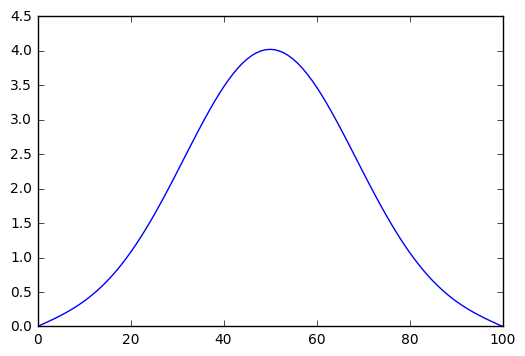

[ 0.          0.03043224  0.06124796  0.09282943  0.12555637  0.15980459
  0.19594448  0.23433921  0.27534285  0.31929809  0.36653381  0.41736226
  0.47207602  0.53094469  0.59421128  0.66208845  0.73475452  0.81234947
  0.89497083  0.98266965  1.07544662  1.17324842  1.27596438  1.38342365
  1.49539286  1.61157441  1.73160559  1.85505844  1.98144052  2.11019675
  2.24071208  2.37231539  2.50428426  2.6358509   2.76620896  2.89452131
  3.01992864  3.1415588   3.25853666  3.36999454  3.47508279  3.57298052
  3.6629063   3.74412847  3.81597512  3.87784328  3.92920742  3.96962683
  3.99875195  4.01632942  4.02220571  4.01632942  3.99875195  3.96962683
  3.92920742  3.87784328  3.81597512  3.74412847  3.6629063   3.57298052
  3.47508279  3.36999454  3.25853666  3.1415588   3.01992864  2.89452131
  2.76620896  2.6358509   2.50428426  2.37231539  2.24071208  2.11019675
  1.98144052  1.85505844  1.73160559  1.61157441  1.49539286  1.38342365
  1.27596438  1.17324842  1.07544662  0.98266965  0

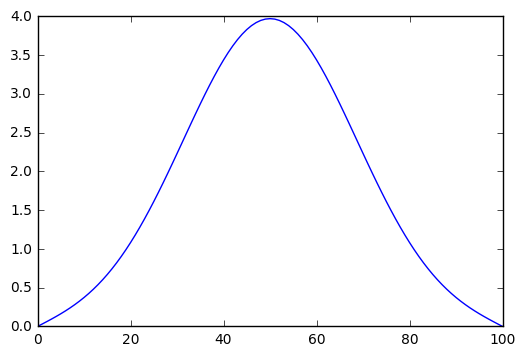

[ 0.          0.03124182  0.06286184  0.09523689  0.12874106  0.16374417
  0.20061016  0.23969526  0.28134602  0.32589699  0.37366829  0.42496282
  0.48006324  0.53922878  0.6026917   0.67065369  0.74328209  0.82070601
  0.90301249  0.99024275  1.08238849  1.17938855  1.28112588  1.3874249
  1.49804947  1.61270144  1.73101993  1.85258142  1.97690066  2.10343255
  2.23157496  2.36067252  2.49002137  2.61887494  2.74645055  2.87193698
  2.99450269  3.11330482  3.22749865  3.33624748  3.43873284  3.53416461
  3.62179123  3.70090951  3.77087401  3.83110587  3.88110076  3.92043591
  3.94877608  3.96587834  3.97159553  3.96587834  3.94877608  3.92043591
  3.88110076  3.83110587  3.77087401  3.70090951  3.62179123  3.53416461
  3.43873284  3.33624748  3.22749865  3.11330482  2.99450269  2.87193698
  2.74645055  2.61887494  2.49002137  2.36067252  2.23157496  2.10343255
  1.97690066  1.85258142  1.73101993  1.61270144  1.49804947  1.3874249
  1.28112588  1.17938855  1.08238849  0.99024275  0.9

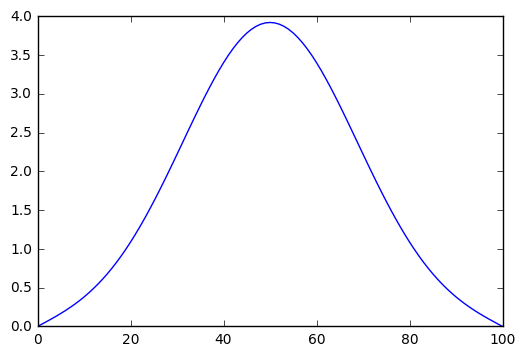

[ 0.          0.03203485  0.06444235  0.0975937   0.13185712  0.16759624
  0.20516845  0.24492293  0.28719868  0.33232216  0.38060484  0.43234045
  0.48780203  0.54723875  0.61087256  0.67889469  0.75146202  0.82869344
  0.91066619  0.99741229  1.0889152   1.18510664  1.28586384  1.39100716
  1.50029831  1.61343907  1.73007084  1.84977482  1.97207312  2.09643068
  2.22225812  2.34891552  2.47571713  2.60193694  2.72681516  2.84956548
  2.96938304  3.08545302  3.19695976  3.30309615  3.4030734   3.49613067
  3.58154479  3.65863956  3.72679471  3.78545419  3.83413375  3.87242761
  3.9000141   3.91666016  3.9222246   3.91666016  3.9000141   3.87242761
  3.83413375  3.78545419  3.72679471  3.65863956  3.58154479  3.49613067
  3.4030734   3.30309615  3.19695976  3.08545302  2.96938304  2.84956548
  2.72681516  2.60193694  2.47571713  2.34891552  2.22225812  2.09643068
  1.97207312  1.84977482  1.73007084  1.61343907  1.50029831  1.39100716
  1.28586384  1.18510664  1.0889152   0.99741229  0

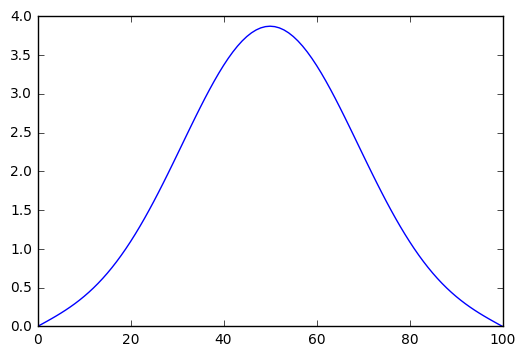

[ 0.          0.03281087  0.06598864  0.09989863  0.13490301  0.17135911
  0.20961759  0.25002056  0.29289944  0.33857266  0.38734315  0.43949568
  0.49529391  0.55497731  0.61875793  0.686817    0.7593015   0.83632067
  0.91794254  1.00419066  1.09504085  1.1904184   1.29019545  1.39418892
  1.50215887  1.61380753  1.72877892  1.84665924  1.96697809  2.08921043
  2.2127795   2.33706054  2.4613854   2.58504804  2.70731075  2.82741124
  2.94457025  3.05799984  3.16691211  3.27052823  3.36808767  3.45885749
  3.54214151  3.61728917  3.68370408  3.74085183  3.78826721  3.82556055
  3.85242299  3.86863083  3.87404856  3.86863083  3.85242299  3.82556055
  3.78826721  3.74085183  3.68370408  3.61728917  3.54214151  3.45885749
  3.36808767  3.27052823  3.16691211  3.05799984  2.94457025  2.82741124
  2.70731075  2.58504804  2.4613854   2.33706054  2.2127795   2.08921043
  1.96697809  1.84665924  1.72877892  1.61380753  1.50215887  1.39418892
  1.29019545  1.1904184   1.09504085  1.00419066  0

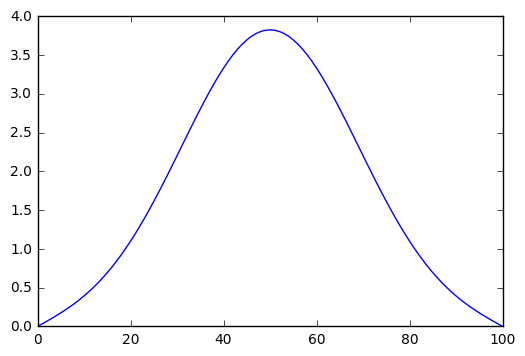

[ 0.          0.0335695   0.06749994  0.10215061  0.13787746  0.17503135
  0.21395617  0.25498688  0.29844732  0.34464796  0.39388333  0.44642943
  0.50254078  0.56244752  0.62635215  0.6944264   0.76680782  0.84359656
  0.92485207  1.01058998  1.10077915  1.19533901  1.29413723  1.39698783
  1.50364973  1.613826    1.72716363  1.84325405  1.96163445  2.08178979
  2.20315577  2.32512244  2.44703884  2.56821825  2.68794433  2.80547789
  2.92006426  3.03094129  3.13734763  3.23853145  3.33375919  3.42232447
  3.50355679  3.57682998  3.64157031  3.69726392  3.74346367  3.77979514
  3.80596165  3.82174833  3.82702508  3.82174833  3.80596165  3.77979514
  3.74346367  3.69726392  3.64157031  3.57682998  3.50355679  3.42232447
  3.33375919  3.23853145  3.13734763  3.03094129  2.92006426  2.80547789
  2.68794433  2.56821825  2.44703884  2.32512244  2.20315577  2.08178979
  1.96163445  1.84325405  1.72716363  1.613826    1.50364973  1.39698783
  1.29413723  1.19533901  1.10077915  1.01058998  0

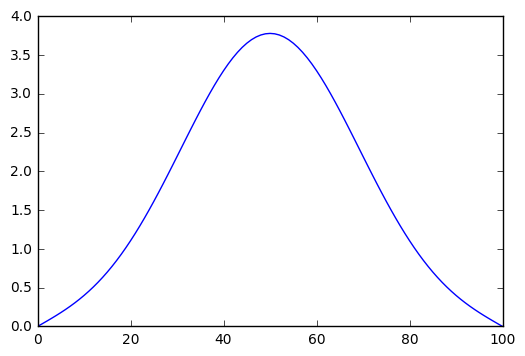

[ 0.          0.03431041  0.06897564  0.10434878  0.14077943  0.17861186
  0.21818312  0.25982097  0.30384172  0.35054793  0.40022589  0.45314298
  0.50954489  0.5696527   0.6336598   0.70172878  0.77398831  0.85052996
  0.93140513  1.01662212  1.1061434   1.19988314  1.29770506  1.39942078
  1.50478855  1.61351266  1.72524335  1.83957748  1.95605989  2.07418553
  2.19340234  2.31311491  2.43268897  2.55145657  2.66872199  2.78376829
  2.89586446  3.00427304  3.10825813  3.20709366  3.30007183  3.38651158
  3.46576684  3.53723466  3.60036283  3.65465703  3.69968726  3.73509357
  3.76059082  3.77597255  3.78111374  3.77597255  3.76059082  3.73509357
  3.69968726  3.65465703  3.60036283  3.53723466  3.46576684  3.38651158
  3.30007183  3.20709366  3.10825813  3.00427304  2.89586446  2.78376829
  2.66872199  2.55145657  2.43268897  2.31311491  2.19340234  2.07418553
  1.95605989  1.83957748  1.72524335  1.61351266  1.50478855  1.39942078
  1.29770506  1.19988314  1.1061434   1.01662212  0

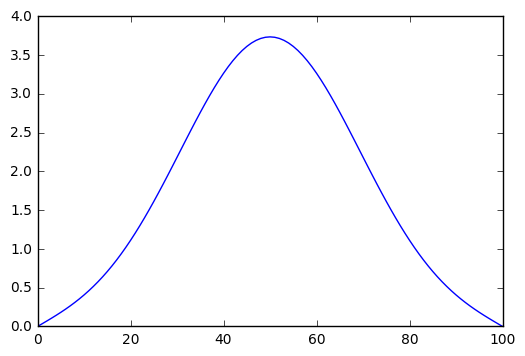

[ 0.          0.03503334  0.07041524  0.10649244  0.14360809  0.18209978
  0.22229765  0.26452225  0.3090824   0.35627282  0.40637167  0.45963796
  0.51630878  0.57659645  0.64068561  0.70873018  0.78085036  0.85712964
  0.9376119   1.02229866  1.11114653  1.20406493  1.30091417  1.40150391
  1.50559216  1.61288475  1.72303544  1.83564667  1.950271    2.06641328
  2.18353352  2.30105054  2.41834631  2.53477107  2.64964902  2.76228467
  2.87196974  2.97799046  3.07963528  3.1762028   3.2670098   3.35139934
  3.42874865  3.49847688  3.56005229  3.61299911  3.65690364  3.69141966
  3.716273    3.73126515  3.73627594  3.73126515  3.716273    3.69141966
  3.65690364  3.61299911  3.56005229  3.49847688  3.42874865  3.35139934
  3.2670098   3.1762028   3.07963528  2.97799046  2.87196974  2.76228467
  2.64964902  2.53477107  2.41834631  2.30105054  2.18353352  2.06641328
  1.950271    1.83564667  1.72303544  1.61288475  1.50559216  1.40150391
  1.30091417  1.20406493  1.11114653  1.02229866  0

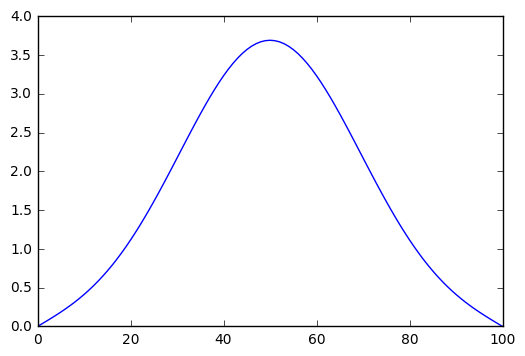

[ 0.          0.03573809  0.07181834  0.10858108  0.14636285  0.18549453
  0.22629928  0.26909046  0.31416943  0.36182316  0.41232185  0.46591629
  0.52283524  0.58328258  0.64743453  0.71543673  0.78740135  0.86340429
  0.94348239  1.02763089  1.11580105  1.20789804  1.30377919  1.40325267
  1.50607658  1.61195862  1.72055629  1.83147774  1.9442833   2.05848762
  2.17356259  2.28894092  2.40402043  2.51816896  2.63072996  2.74102864
  2.84837853  2.95208864  3.05147073  3.14584698  3.23455765  3.31696885
  3.39248001  3.46053129  3.52061048  3.57225943  3.61507992  3.64873881
  3.67297232  3.6875895   3.6924748   3.6875895   3.67297232  3.64873881
  3.61507992  3.57225943  3.52061048  3.46053129  3.39248001  3.31696885
  3.23455765  3.14584698  3.05147073  2.95208864  2.84837853  2.74102864
  2.63072996  2.51816896  2.40402043  2.28894092  2.17356259  2.05848762
  1.9442833   1.83147774  1.72055629  1.61195862  1.50607658  1.40325267
  1.30377919  1.20789804  1.11580105  1.02763089  0

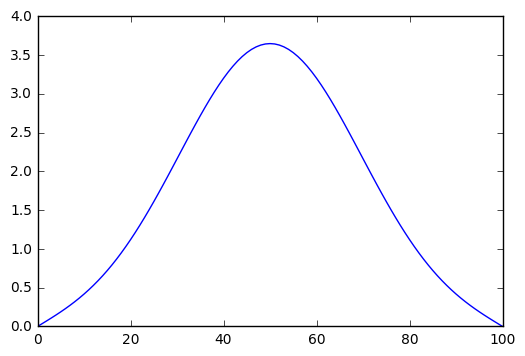

[ 0.          0.0364245   0.07318468  0.1106143   0.14904329  0.18879572
  0.23018777  0.27352561  0.31910318  0.36719982  0.41807788  0.47198017
  0.52912732  0.58971509  0.65391161  0.72185462  0.79364868  0.86936252
  0.94902644  1.03262985  1.12011912  1.21139562  1.30631417  1.4046818
  1.50625705  1.61074977  1.71782139  1.82708588  1.93811133  2.05042212
  2.16350182  2.27679672  2.38972003  2.50165667  2.61196871  2.72000127
  2.82508892  2.92656247  3.02375606  3.11601443  3.20270031  3.28320175
  3.35693941  3.42337347  3.48201027  3.53240848  3.5741846   3.60701789
  3.63065447  3.64491059  3.64967504  3.64491059  3.63065447  3.60701789
  3.5741846   3.53240848  3.48201027  3.42337347  3.35693941  3.28320175
  3.20270031  3.11601443  3.02375606  2.92656247  2.82508892  2.72000127
  2.61196871  2.50165667  2.38972003  2.27679672  2.16350182  2.05042212
  1.93811133  1.82708588  1.71782139  1.61074977  1.50625705  1.4046818
  1.30631417  1.21139562  1.12011912  1.03262985  0.9

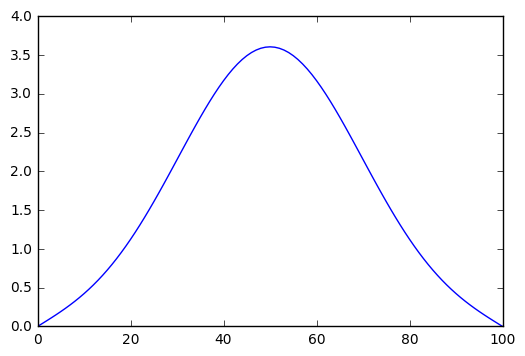

[ 0.          0.03709246  0.07451403  0.11259187  0.15164918  0.1920032
  0.23396313  0.27782797  0.32388429  0.37240391  0.42364149  0.47783202
  0.53518827  0.59589815  0.66012202  0.72799008  0.7995997   0.87501284
  0.95425367  1.03730625  1.12411248  1.21457037  1.30853258  1.40580539
  1.50614811  1.60927292  1.71484538  1.82248537  1.93176873  2.04222947
  2.15336262  2.26462774  2.37545302  2.48523994  2.59336855  2.69920318
  2.80209863  2.90140667  2.99648288  3.0866936   3.17142303  3.25008024
  3.32210608  3.38697986  3.4442256   3.49341796  3.53418746  3.56622518
  3.58928664  3.60319491  3.60784295  3.60319491  3.58928664  3.56622518
  3.53418746  3.49341796  3.4442256   3.38697986  3.32210608  3.25008024
  3.17142303  3.0866936   2.99648288  2.90140667  2.80209863  2.69920318
  2.59336855  2.48523994  2.37545302  2.26462774  2.15336262  2.04222947
  1.93176873  1.82248537  1.71484538  1.60927292  1.50614811  1.40580539
  1.30853258  1.21457037  1.12411248  1.03730625  0.

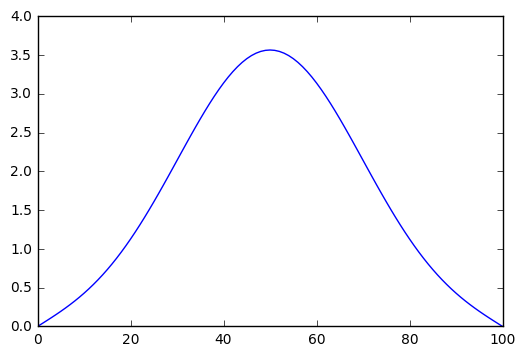

[ 0.          0.03774192  0.07580631  0.11451367  0.15418044  0.19511701
  0.23762559  0.28199803  0.32851364  0.3774368   0.42901462  0.48347448
  0.54102152  0.60183605  0.66607101  0.7338494   0.80526172  0.88036363
  0.95917353  1.04167054  1.12779253  1.21743451  1.31044736  1.40663694
  1.50576356  1.607542    1.71164208  1.81768964  1.92526827  2.03392146
  2.14315553  2.25244298  2.36122657  2.46892383  2.5749322   2.67863454
  2.77940509  2.87661579  2.96964277  3.05787308  3.14071145  3.21758702
  3.28795995  3.35132777  3.40723139  3.4552607   3.49505956  3.5263303
  3.54883738  3.56241041  3.56694626  3.56241041  3.54883738  3.5263303
  3.49505956  3.4552607   3.40723139  3.35132777  3.28795995  3.21758702
  3.14071145  3.05787308  2.96964277  2.87661579  2.77940509  2.67863454
  2.5749322   2.46892383  2.36122657  2.25244298  2.14315553  2.03392146
  1.92526827  1.81768964  1.71164208  1.607542    1.50576356  1.40663694
  1.31044736  1.21743451  1.12779253  1.04167054  0.9

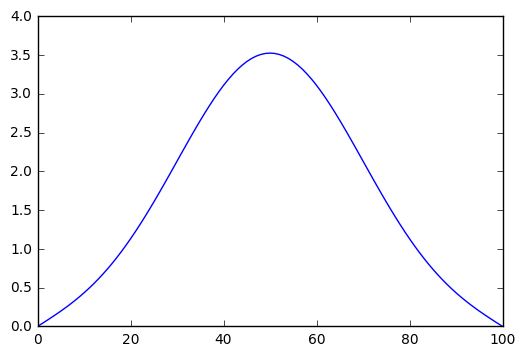

[ 0.          0.03837285  0.07706149  0.1163797   0.15663715  0.19813736
  0.24117556  0.28603653  0.33299234  0.38230006  0.43419943  0.48891039
  0.54663066  0.60753324  0.67176393  0.73943884  0.81064203  0.88542314
  0.96379525  1.0457329   1.13117029  1.21999982  1.31207093  1.40718932
  1.50511657  1.60557026  1.70822456  1.81271136  1.91862191  2.02550912
  2.13289033  2.24025072  2.34704718  2.45271282  2.55666189  2.65829512
  2.75700549  2.85218429  2.94322739  3.02954168  3.11055154  3.18570531
  3.25448161  3.31639535  3.37100354  3.41791059  3.45677312  3.48730413
  3.50927662  3.52252638  3.52695405  3.52252638  3.50927662  3.48730413
  3.45677312  3.41791059  3.37100354  3.31639535  3.25448161  3.18570531
  3.11055154  3.02954168  2.94322739  2.85218429  2.75700549  2.65829512
  2.55666189  2.45271282  2.34704718  2.24025072  2.13289033  2.02550912
  1.91862191  1.81271136  1.70822456  1.60557026  1.50511657  1.40718932
  1.31207093  1.21999982  1.13117029  1.0457329   0

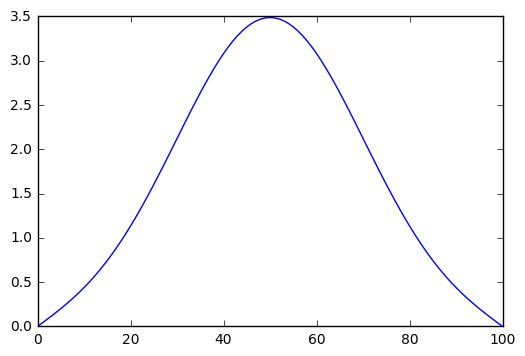

[ 0.          0.03898526  0.07827961  0.11819007  0.15901952  0.20106463
  0.24461367  0.28994437  0.33732169  0.38699549  0.43919827  0.49414273
  0.5520194   0.61299422  0.67720613  0.74476469  0.81574781  0.89019949
  0.96812785  1.0495032   1.13425644  1.22227767  1.31341519  1.40747484
  1.50421968  1.60337025  1.70460519  1.80756242  1.91184088  2.01700271
  2.1225761   2.22805854  2.33292073  2.43661085  2.53855941  2.63818438
  2.73489679  2.82810653  2.91722843  3.00168839  3.08092963  3.15441885
  3.22165228  3.28216149  3.33551883  3.38134258  3.41930147  3.44911874
  3.47057549  3.48351343  3.48783676  3.48351343  3.47057549  3.44911874
  3.41930147  3.38134258  3.33551883  3.28216149  3.22165228  3.15441885
  3.08092963  3.00168839  2.91722843  2.82810653  2.73489679  2.63818438
  2.53855941  2.43661085  2.33292073  2.22805854  2.1225761   2.01700271
  1.91184088  1.80756242  1.70460519  1.60337025  1.50421968  1.40747484
  1.31341519  1.22227767  1.13425644  1.0495032   0

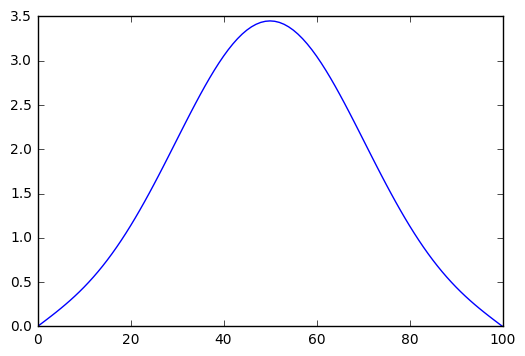

[ 0.          0.03957922  0.07946079  0.11994498  0.1613279   0.20389934
  0.24794067  0.29372265  0.34150317  0.39152504  0.44401365  0.49917464
  0.55719159  0.6182236   0.68240304  0.74983321  0.82058618  0.89470068
  0.97218016  1.05299106  1.13706129  1.22427898  1.31449158  1.40750527
  1.50308483  1.60095388  1.70079562  1.80225406  1.90493569  2.00841181
  2.1122212   2.21587341  2.31885252  2.42062135  2.52062612  2.61830145
  2.71307575  2.80437681  2.89163765  2.97430243  3.05183239  3.12371184
  3.18945385  3.24860587  3.30075494  3.34553256  3.38261905  3.41174736
  3.43270637  3.44534338  3.44956602  3.44534338  3.43270637  3.41174736
  3.38261905  3.34553256  3.30075494  3.24860587  3.18945385  3.12371184
  3.05183239  2.97430243  2.89163765  2.80437681  2.71307575  2.61830145
  2.52062612  2.42062135  2.31885252  2.21587341  2.1122212   2.00841181
  1.90493569  1.80225406  1.70079562  1.60095388  1.50308483  1.40750527
  1.31449158  1.22427898  1.13706129  1.05299106  0

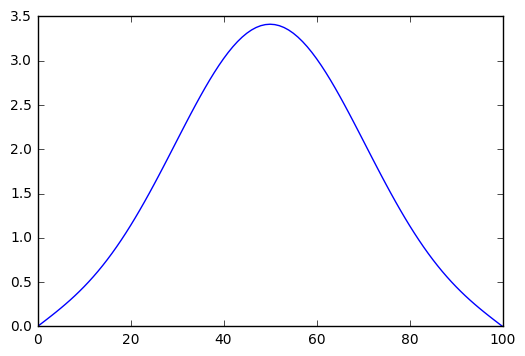

[ 0.          0.04015479  0.08060519  0.12164474  0.16356273  0.20664215
  0.25115749  0.2973726   0.34553843  0.39589081  0.44864821  0.50400939
  0.56215114  0.62322603  0.68736007  0.75465061  0.82516418  0.89893452
  0.97596077  1.0562058   1.13959483  1.2260143   1.31531105  1.40729187
  1.50172339  1.59833247  1.69680692  1.79679682  1.89791622  1.99974536
  2.10183342  2.20370171  2.30484734  2.4047473   2.50286302  2.59864519
  2.69153897  2.78098938  2.8664469   2.94737321  3.02324686  3.09356897
  3.15786876  3.21570887  3.26669037  3.31045738  3.34670128  3.37516431
  3.39564274  3.40798923  3.41211467  3.40798923  3.39564274  3.37516431
  3.34670128  3.31045738  3.26669037  3.21570887  3.15786876  3.09356897
  3.02324686  2.94737321  2.8664469   2.78098938  2.69153897  2.59864519
  2.50286302  2.4047473   2.30484734  2.20370171  2.10183342  1.99974536
  1.89791622  1.79679682  1.69680692  1.59833247  1.50172339  1.40729187
  1.31531105  1.2260143   1.13959483  1.0562058   0

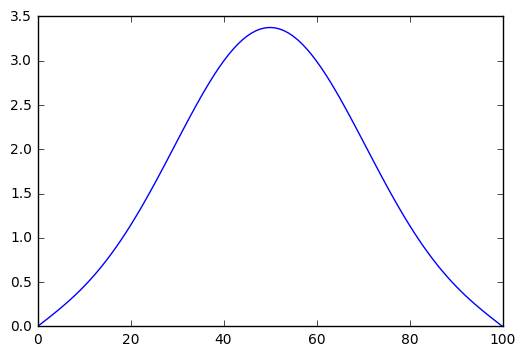

[ 0.          0.04071209  0.08171306  0.12328971  0.16572457  0.20929384
  0.25426519  0.30089562  0.34942925  0.40009506  0.45310473  0.50865033
  0.56690209  0.62800621  0.69208266  0.75922307  0.82948874  0.90290872
  0.9794781   1.05915649  1.1418667   1.22749376  1.31588412  1.40684538
  1.50014619  1.59551674  1.69264952  1.79120067  1.89079169  1.99101166
  2.09141994  2.19154929  2.29090948  2.38899127  2.48527078  2.57921424
  2.67028293  2.75793846  2.84164811  2.92089037  2.99516038  3.06397538
  3.12688006  3.18345158  3.23330441  3.27609477  3.31152456  3.33934492
  3.35935916  3.37142507  3.37545664  3.37142507  3.35935916  3.33934492
  3.31152456  3.27609477  3.23330441  3.18345158  3.12688006  3.06397538
  2.99516038  2.92089037  2.84164811  2.75793846  2.67028293  2.57921424
  2.48527078  2.38899127  2.29090948  2.19154929  2.09141994  1.99101166
  1.89079169  1.79120067  1.69264952  1.59551674  1.50014619  1.40684538
  1.31588412  1.22749376  1.1418667   1.05915649  0

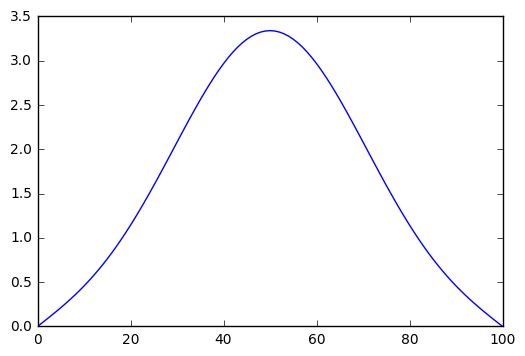

[ 0.          0.04125125  0.08278468  0.12488035  0.16781407  0.21185529
  0.25726493  0.30429323  0.35317754  0.40414016  0.4573861   0.51310091
  0.57144848  0.63256887  0.69657622  0.76355673  0.8335667   0.90663079
  0.98274032  1.06185192  1.14388625  1.22872713  1.3162209   1.40617609
  1.49836356  1.59251689  1.6883333   1.78547498  1.88357079  1.98221849
  2.08098741  2.17942148  2.27704279  2.37335543  2.46784977  2.56000699
  2.64930397  2.73521826  2.81723332  2.89484376  2.96756065  3.03491669
  3.09647136  3.15181574  3.20057714  3.24242329  3.27706621  3.30426552
  3.32383124  3.33562606  3.33956693  3.33562606  3.32383124  3.30426552
  3.27706621  3.24242329  3.20057714  3.15181574  3.09647136  3.03491669
  2.96756065  2.89484376  2.81723332  2.73521826  2.64930397  2.56000699
  2.46784977  2.37335543  2.27704279  2.17942148  2.08098741  1.98221849
  1.88357079  1.78547498  1.6883333   1.59251689  1.49836356  1.40617609
  1.3162209   1.22872713  1.14388625  1.06185192  0

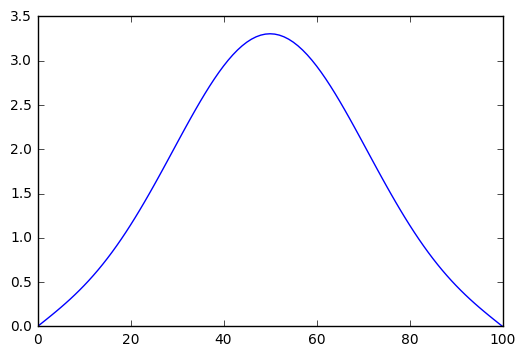

[ 0.          0.04177244  0.08382037  0.12641717  0.16983196  0.2143275
  0.26015801  0.30756705  0.35678534  0.40802857  0.46149529  0.51736468
  0.57579445  0.63691877  0.70084617  0.76765764  0.8374048   0.91010811
  0.98575543  1.06430063  1.14566248  1.22972383  1.31633106  1.40529385
  1.49638533  1.58934259  1.68386762  1.77962858  1.87626164  1.97337308
  2.07054199  2.16732318  2.26325072  2.35784163  2.45060006  2.54102167
  2.62859835  2.71282301  2.79319467  2.86922345  2.94043568  3.00637891
  3.0666268   3.12078375  3.16848934  3.20942235  3.24330445  3.26990335
  3.28903553  3.30056833  3.30442155  3.30056833  3.28903553  3.26990335
  3.24330445  3.20942235  3.16848934  3.12078375  3.0666268   3.00637891
  2.94043568  2.86922345  2.79319467  2.71282301  2.62859835  2.54102167
  2.45060006  2.35784163  2.26325072  2.16732318  2.07054199  1.97337308
  1.87626164  1.77962858  1.68386762  1.58934259  1.49638533  1.40529385
  1.31633106  1.22972383  1.14566248  1.06430063  0.

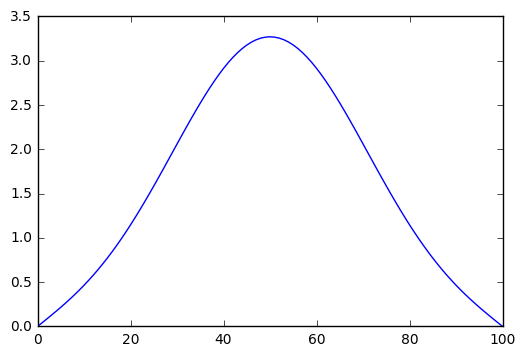

[ 0.          0.04227582  0.08482049  0.12790074  0.17177905  0.21671153
  0.26294579  0.31071881  0.36025475  0.41176287  0.46543535  0.5214452
  0.57994415  0.64106064  0.70489786  0.77153181  0.84100963  0.91334789
  0.9885312   1.0665109   1.14720411  1.23049291  1.3162239   1.40420804
  1.49422087  1.58600305  1.6792613   1.77366979  1.86887186  1.96448219
  2.06008936  2.15525885  2.24953633  2.34245139  2.43352151  2.52225633
  2.60816223  2.69074694  2.76952442  2.84401971  2.91377381  2.9783485
  3.03733104  3.09033859  3.13702249  3.1770721   3.2102183   3.23623656
  3.25494952  3.26622899  3.26999746  3.26622899  3.25494952  3.23623656
  3.2102183   3.1770721   3.13702249  3.09033859  3.03733104  2.9783485
  2.91377381  2.84401971  2.76952442  2.69074694  2.60816223  2.52225633
  2.43352151  2.34245139  2.24953633  2.15525885  2.06008936  1.96448219
  1.86887186  1.77366979  1.6792613   1.58600305  1.49422087  1.40420804
  1.3162239   1.23049291  1.14720411  1.0665109   0.98

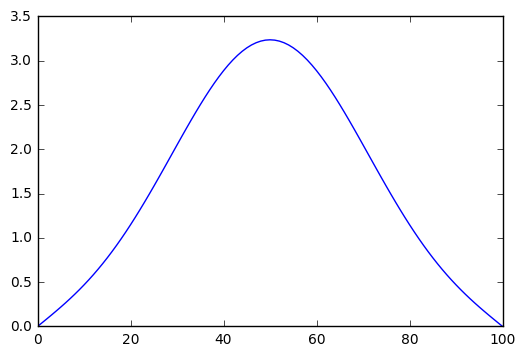

[ 0.          0.04276161  0.08578547  0.1293317   0.17365621  0.21900853
  0.26562975  0.31375032  0.36358799  0.4153457   0.46920941  0.52534611
  0.58390175  0.64499925  0.70873663  0.77518516  0.84438771  0.9163572
  0.99107519  1.06849077  1.14851957  1.23104309  1.31590833  1.40292767
  1.49187913  1.58250698  1.67452273  1.76760647  1.86140862  1.95555208
  2.04963478  2.14323254  2.23590234  2.32718594  2.41661372  2.50370888
  2.58799173  2.66898431  2.74621495  2.81922305  2.88756369  2.95081232
  3.00856924  3.06046385  3.10615876  3.14535343  3.1777876   3.20324415
  3.2215516   3.23258603  3.23627254  3.23258603  3.2215516   3.20324415
  3.1777876   3.14535343  3.10615876  3.06046385  3.00856924  2.95081232
  2.88756369  2.81922305  2.74621495  2.66898431  2.58799173  2.50370888
  2.41661372  2.32718594  2.23590234  2.14323254  2.04963478  1.95555208
  1.86140862  1.76760647  1.67452273  1.58250698  1.49187913  1.40292767
  1.31590833  1.23104309  1.14851957  1.06849077  0.

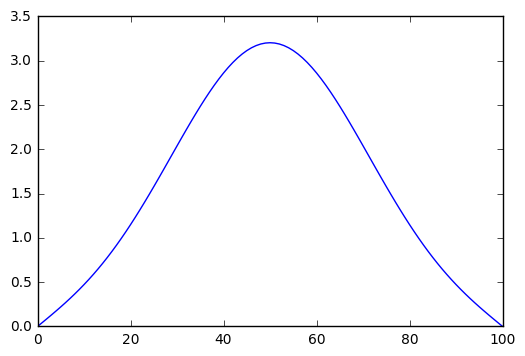

[ 0.          0.04323001  0.08671572  0.13071071  0.17546437  0.22121973
  0.2682114   0.31666347  0.36678734  0.41877976  0.47282063  0.52907109
  0.58767145  0.64873932  0.71236776  0.77862351  0.84754542  0.91914292
  0.99339479  1.07024803  1.14961699  1.23138278  1.31539293  1.40146134
  1.48936861  1.57886269  1.66965983  1.761446    1.85387861  1.94658864
  2.03918312  2.13124795  2.22235114  2.31204624  2.39987614  2.48537709
  2.56808292  2.64752941  2.72325877  2.79482418  2.86179428  2.92375763
  2.98032705  3.03114369  3.07588093  3.11424795  3.14599294  3.1709059
  3.18882097  3.19961832  3.20322552  3.19961832  3.18882097  3.1709059
  3.14599294  3.11424795  3.07588093  3.03114369  2.98032705  2.92375763
  2.86179428  2.79482418  2.72325877  2.64752941  2.56808292  2.48537709
  2.39987614  2.31204624  2.22235114  2.13124795  2.03918312  1.94658864
  1.85387861  1.761446    1.66965983  1.57886269  1.48936861  1.40146134
  1.31539293  1.23138278  1.14961699  1.07024803  0.9

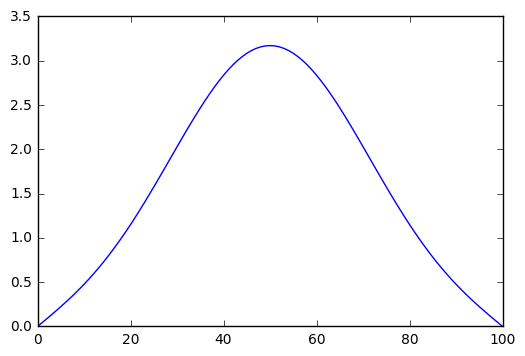

[ 0.          0.04368125  0.08761172  0.1320385   0.17720452  0.2233464
  0.27069237  0.31946021  0.36985514  0.42206781  0.47627222  0.5326238
  0.59125743  0.65228556  0.71579649  0.78185264  0.850489    0.92171179
  0.99549716  1.07179022  1.15050424  1.23152007  1.3146859   1.39981728
  1.48669746  1.57507806  1.6646801   1.75519537  1.84628814  1.93759732
  2.02873884  2.11930845  2.20888484  2.29703302  2.38330799  2.46725863
  2.54843181  2.62637658  2.7006485   2.77081402  2.83645483  2.89717207
  2.95259059  3.00236278  3.04617241  3.08373793  3.11481566  3.13920238
  3.15673764  3.16730553  3.17083597  3.16730553  3.15673764  3.13920238
  3.11481566  3.08373793  3.04617241  3.00236278  2.95259059  2.89717207
  2.83645483  2.77081402  2.7006485   2.62637658  2.54843181  2.46725863
  2.38330799  2.29703302  2.20888484  2.11930845  2.02873884  1.93759732
  1.84628814  1.75519537  1.6646801   1.57507806  1.48669746  1.39981728
  1.3146859   1.23152007  1.15050424  1.07179022  0.9

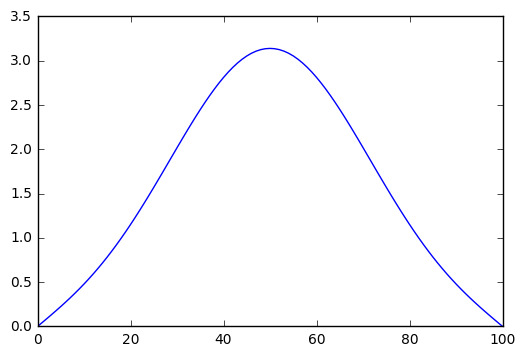

[ 0.          0.04411558  0.08847395  0.13331581  0.17887769  0.22538987
  0.2730743   0.32214256  0.37279378  0.42521265  0.47956743  0.53600797
  0.59466388  0.65564265  0.71902799  0.78487818  0.8532246   0.92407038
  0.99738927  1.07312467  1.1511889   1.23146273  1.31379513  1.39800337
  1.48387342  1.57116059  1.65959065  1.74886114  1.83864311  1.92858322
  2.01830609  2.10741709  2.19550528  2.28214679  2.36690836  2.44935109
  2.52903442  2.60552022  2.67837691  2.74718373  2.81153488  2.87104365
  2.9253464   2.97410635  3.01701719  3.0538063   3.08423776  3.10811489
  3.12528239  3.13562811  3.13908424  3.13562811  3.12528239  3.10811489
  3.08423776  3.0538063   3.01701719  2.97410635  2.9253464   2.87104365
  2.81153488  2.74718373  2.67837691  2.60552022  2.52903442  2.44935109
  2.36690836  2.28214679  2.19550528  2.10741709  2.01830609  1.92858322
  1.83864311  1.74886114  1.65959065  1.57116059  1.48387342  1.39800337
  1.31379513  1.23146273  1.1511889   1.07312467  0

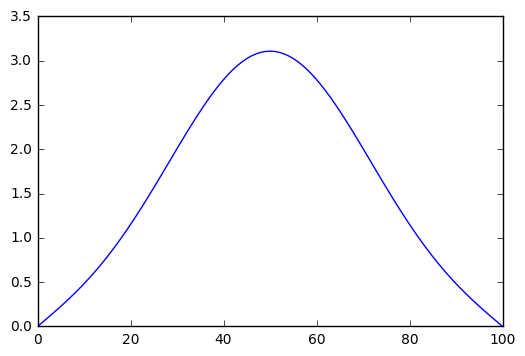

[ 0.          0.04453325  0.08930294  0.13454343  0.18048495  0.22735151
  0.27535889  0.32471256  0.37560569  0.42821713  0.48270952  0.5392273
  0.59789496  0.65881522  0.72206736  0.78770572  0.85575822  0.92622511
  0.99907791  1.07425847  1.15167833  1.23121827  1.31272819  1.39602715
  1.48090387  1.56711741  1.65439821  1.74244952  1.83094905  1.91955106
  2.00788869  2.09557662  2.18221404  2.26738786  2.35067619  2.43165195
  2.50988674  2.58495478  2.6564369   2.72392465  2.78702429  2.84536074
  2.89858148  2.9463601   2.98839982  3.02443659  3.05424193  3.07762541
  3.09443671  3.10456726  3.10795142  3.10456726  3.09443671  3.07762541
  3.05424193  3.02443659  2.98839982  2.9463601   2.89858148  2.84536074
  2.78702429  2.72392465  2.6564369   2.58495478  2.50988674  2.43165195
  2.35067619  2.26738786  2.18221404  2.09557662  2.00788869  1.91955106
  1.83094905  1.74244952  1.65439821  1.56711741  1.48090387  1.39602715
  1.31272819  1.23121827  1.15167833  1.07425847  0.

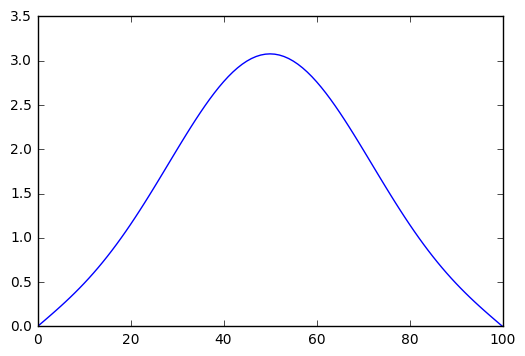

[ 0.          0.04493453  0.09009922  0.13572217  0.1820274   0.22923275
  0.27754789  0.32717232  0.37829333  0.43108411  0.48570176  0.5422855
  0.60095484  0.66180786  0.72491964  0.79034071  0.85809573  0.92818224
  1.00056967  1.07519849  1.1519796   1.23079392  1.31149235  1.39389584
  1.47779588  1.56295528  1.64910915  1.73596636  1.82321117  1.91050528
  1.99749014  2.08378953  2.16901248  2.25275637  2.33461029  2.41415864
  2.49098476  2.56467477  2.6348215   2.70102834  2.76291314  2.82011207
  2.87228323  2.91911021  2.96030538  2.99561291  3.02481147  3.04771663
  3.06418281  3.07410489  3.07741933  3.07410489  3.06418281  3.04771663
  3.02481147  2.99561291  2.96030538  2.91911021  2.87228323  2.82011207
  2.76291314  2.70102834  2.6348215   2.56467477  2.49098476  2.41415864
  2.33461029  2.25275637  2.16901248  2.08378953  1.99749014  1.91050528
  1.82321117  1.73596636  1.64910915  1.56295528  1.47779588  1.39389584
  1.31149235  1.23079392  1.1519796   1.07519849  1.

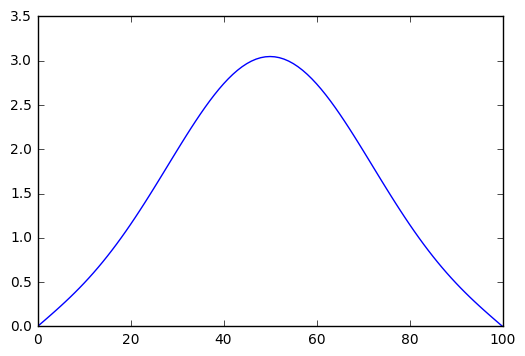

[ 0.          0.04531968  0.09086333  0.13685287  0.18350617  0.23103501
  0.27964307  0.32952395  0.38085921  0.43381645  0.48854743  0.54518626
  0.60384761  0.66462513  0.7275898   0.79278854  0.86024289  0.92994787
  1.00187096  1.0759514   1.15209955  1.23019663  1.31009459  1.39161633
  1.47455618  1.55868066  1.64372952  1.72941718  1.81543434  1.90144999
  1.98711368  2.07205808  2.15590176  2.23825226  2.31870937  2.39686854
  2.47232446  2.54467478  2.61352387  2.67848654  2.73919183  2.79528669
  2.84643946  2.89234334  2.93271949  2.96731996  2.9959303   3.01837182
  3.03450352  3.04422357  3.04747045  3.04422357  3.03450352  3.01837182
  2.9959303   2.96731996  2.93271949  2.89234334  2.84643946  2.79528669
  2.73919183  2.67848654  2.61352387  2.54467478  2.47232446  2.39686854
  2.31870937  2.23825226  2.15590176  2.07205808  1.98711368  1.90144999
  1.81543434  1.72941718  1.64372952  1.55868066  1.47455618  1.39161633
  1.31009459  1.23019663  1.15209955  1.0759514   1

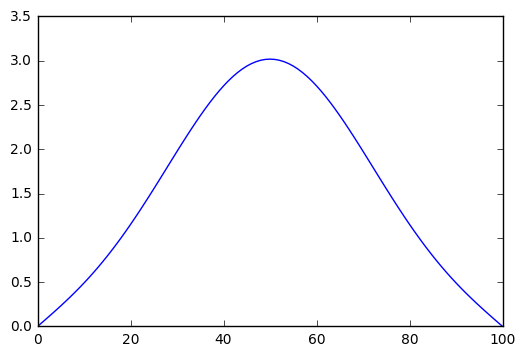

[ 0.          0.04568899  0.09159583  0.13793637  0.18492242  0.23275978
  0.28164623  0.3317696   0.38330583  0.43641706  0.49124982  0.54793325
  0.60657737  0.6672715   0.73008271  0.79505446  0.86220533  0.93152794
  1.002988    1.07652364  1.15204481  1.2294331   1.30854162  1.38919526
  1.4711912   1.55429967  1.63826505  1.7228072   1.80762314  1.89238901
  1.97676229  2.06038427  2.14288282  2.22387537  2.30297202  2.37977895
  2.45390184  2.52494947  2.59253732  2.65629122  2.71585101  2.77087397
  2.82103836  2.86604657  2.90562823  2.93954296  2.9675829   2.9895749
  3.00538233  3.01490654  3.01808793  3.01490654  3.00538233  2.9895749
  2.9675829   2.93954296  2.90562823  2.86604657  2.82103836  2.77087397
  2.71585101  2.65629122  2.59253732  2.52494947  2.45390184  2.37977895
  2.30297202  2.22387537  2.14288282  2.06038427  1.97676229  1.89238901
  1.80762314  1.7228072   1.63826505  1.55429967  1.4711912   1.38919526
  1.30854162  1.2294331   1.15204481  1.07652364  1.0

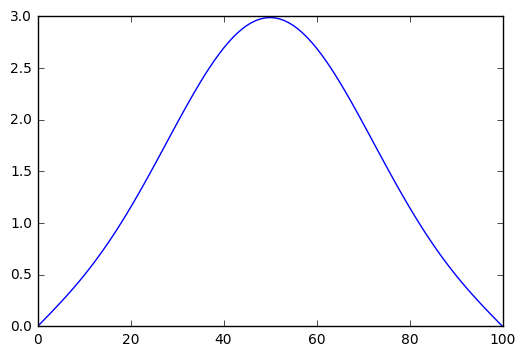

[ 0.          0.04604274  0.09229731  0.13897355  0.18627733  0.23440854
  0.28355919  0.33391144  0.3856357   0.43888881  0.49381219  0.55053014
  0.60914817  0.66975141  0.73240318  0.79714363  0.86398853  0.93292824
  1.00392685  1.07692146  1.15182176  1.22850978  1.30683986  1.38663894
  1.46770706  1.54981816  1.63272116  1.71614132  1.79978186  1.88332592
  1.96643869  2.0487699   2.12995646  2.20962537  2.28739676  2.36288718
  2.43571294  2.50549356  2.57185527  2.63443454  2.69288156  2.74686364
  2.7960685   2.84020743  2.87901817  2.91226764  2.93975432  2.96131036
  2.97680333  2.98613764  2.98925552  2.98613764  2.97680333  2.96131036
  2.93975432  2.91226764  2.87901817  2.84020743  2.7960685   2.74686364
  2.69288156  2.63443454  2.57185527  2.50549356  2.43571294  2.36288718
  2.28739676  2.20962537  2.12995646  2.0487699   1.96643869  1.88332592
  1.79978186  1.71614132  1.63272116  1.54981816  1.46770706  1.38663894
  1.30683986  1.22850978  1.15182176  1.07692146  1

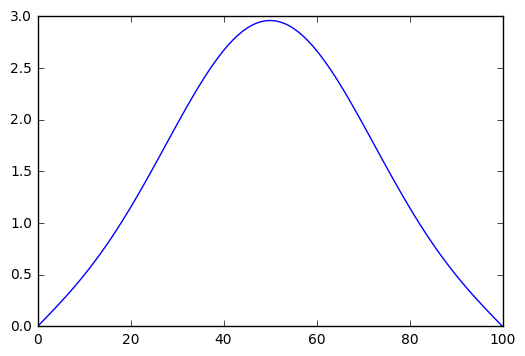

[ 0.          0.04638122  0.09296835  0.1399653   0.18757208  0.2359828
  0.28538379  0.33595164  0.38785136  0.4412346   0.49623779  0.55298055
  0.61156399  0.67206923  0.73455595  0.79906113  0.86559787  0.93415443
  1.00469336  1.07715091  1.15143657  1.22743289  1.30499552  1.38395346
  1.46410964  1.54524168  1.62710301  1.70942418  1.79191453  1.87426402
  1.9561454   2.03721659  2.1171233   2.19550182  2.27198201  2.34619048
  2.4177538   2.48630187  2.55147131  2.61290884  2.67027465  2.72324568
  2.7715188   2.81481383  2.85287635  2.88548026  2.91243013  2.93356323
  2.94875117  2.95790128  2.96095756  2.95790128  2.94875117  2.93356323
  2.91243013  2.88548026  2.85287635  2.81481383  2.7715188   2.72324568
  2.67027465  2.61290884  2.55147131  2.48630187  2.4177538   2.34619048
  2.27198201  2.19550182  2.1171233   2.03721659  1.9561454   1.87426402
  1.79191453  1.70942418  1.62710301  1.54524168  1.46410964  1.38395346
  1.30499552  1.22743289  1.15143657  1.07715091  1.

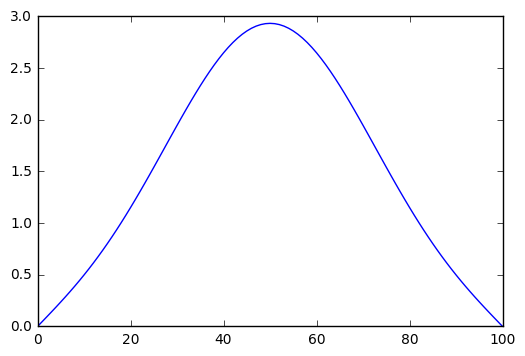

[ 0.          0.04670473  0.09360953  0.14091249  0.18880787  0.23748409
  0.28712187  0.33789237  0.38995534  0.44345729  0.49852987  0.55528808
  0.6138288   0.67422925  0.73654563  0.80081189  0.86703859  0.935212
  1.00529326  1.07721786  1.15089519  1.22620841  1.30301451  1.38114461
  1.46040451  1.5405755   1.62141547  1.70266018  1.78402494  1.86520642
  1.94588472  2.02572577  2.10438381  2.18150417  2.25672615  2.32968608
  2.40002048  2.46736929  2.53137914  2.59170665  2.64802166  2.70001039
  2.74737853  2.7898541   2.82719021  2.8591675   2.88559641  2.9063191
  2.92121107  2.93018246  2.93317898  2.93018246  2.92121107  2.9063191
  2.88559641  2.8591675   2.82719021  2.7898541   2.74737853  2.70001039
  2.64802166  2.59170665  2.53137914  2.46736929  2.40002048  2.32968608
  2.25672615  2.18150417  2.10438381  2.02572577  1.94588472  1.86520642
  1.78402494  1.70266018  1.62141547  1.5405755   1.46040451  1.38114461
  1.30301451  1.22620841  1.15089519  1.07721786  1.005

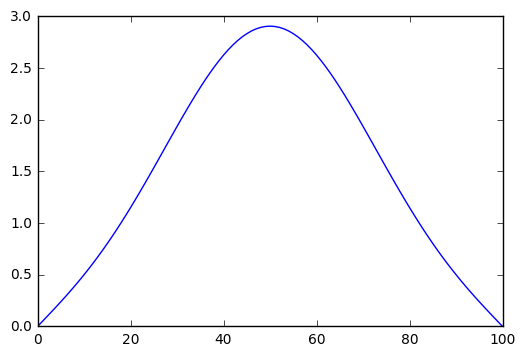

[ 0.          0.04701357  0.09422145  0.14181605  0.18998592  0.23891392
  0.28877528  0.33973583  0.39195014  0.44555977  0.50069162  0.55745628
  0.61594649  0.67623571  0.73837679  0.80240077  0.86831581  0.93610629
  1.00573208  1.07712798  1.15020338  1.22484212  1.30090257  1.37821798
  1.45659704  1.53582468  1.61566317  1.69585344  1.77611664  1.85615597
  1.93565875  2.01429868  2.09173832  2.16763177  2.24162748  2.31337121
  2.3825091   2.44869079  2.51157261  2.57082071  2.62611423  2.67714837
  2.72363729  2.76531692  2.80194763  2.83331654  2.85923972  2.87956405
  2.89416877  2.90296671  2.90590523  2.90296671  2.89416877  2.87956405
  2.85923972  2.83331654  2.80194763  2.76531692  2.72363729  2.67714837
  2.62611423  2.57082071  2.51157261  2.44869079  2.3825091   2.31337121
  2.24162748  2.16763177  2.09173832  2.01429868  1.93565875  1.85615597
  1.77611664  1.69585344  1.61566317  1.53582468  1.45659704  1.37821798
  1.30090257  1.22484212  1.15020338  1.07712798  1

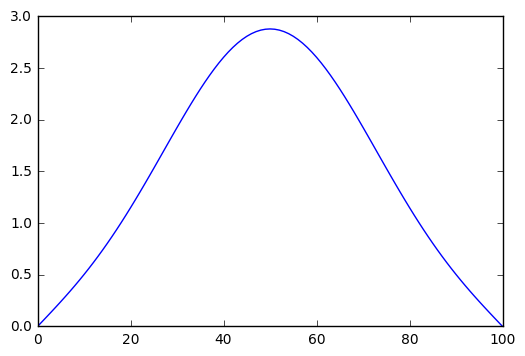

[ 0.          0.04730803  0.09480473  0.14267686  0.19110744  0.24027382
  0.29034588  0.34148419  0.39383828  0.44754487  0.50272624  0.55948868
  0.61792091  0.67809277  0.74005389  0.80383251  0.86943451  0.93684251
  1.00601519  1.07688677  1.1493667   1.22333956  1.29866516  1.37517889
  1.45269232  1.530994    1.60985052  1.68900787  1.76819294  1.84711534
  1.92546941  2.00293643  2.07918706  2.15388389  2.22668427  2.2972431
  2.36521581  2.43026144  2.49204568  2.5502439   2.60454423  2.65465048
  2.700285    2.74119136  2.7771369   2.80791497  2.83334708  2.85328464
  2.86761049  2.87624006  2.87912228  2.87624006  2.86761049  2.85328464
  2.83334708  2.80791497  2.7771369   2.74119136  2.700285    2.65465048
  2.60454423  2.5502439   2.49204568  2.43026144  2.36521581  2.2972431
  2.22668427  2.15388389  2.07918706  2.00293643  1.92546941  1.84711534
  1.76819294  1.68900787  1.60985052  1.530994    1.45269232  1.37517889
  1.29866516  1.22333956  1.1493667   1.07688677  1.0

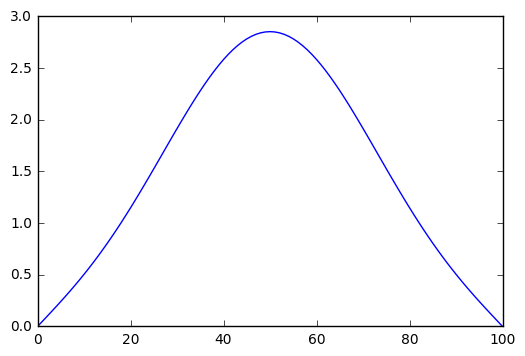

[ 0.          0.04758842  0.09535995  0.14349585  0.19217365  0.24156533
  0.29183551  0.34313963  0.39562226  0.44941541  0.50463688  0.56138873
  0.61975585  0.67980453  0.7415813   0.80511174  0.87039956  0.93742572
  1.00614781  1.07649955  1.14839053  1.2217061   1.29630757  1.37203247
  1.44869525  1.52608802  1.60398168  1.68212716  1.76025698  1.83808703
  1.91531847  1.99164     2.06673011  2.14025972  2.21189474  2.28129894
  2.34813678  2.41207638  2.47279246  2.5299693   2.58330372  2.63250784
  2.6773119   2.71746683  2.75274667  2.7829508   2.80790596  2.82746791
  2.84152296  2.84998904  2.85281659  2.84998904  2.84152296  2.82746791
  2.80790596  2.7829508   2.75274667  2.71746683  2.6773119   2.63250784
  2.58330372  2.5299693   2.47279246  2.41207638  2.34813678  2.28129894
  2.21189474  2.14025972  2.06673011  1.99164     1.91531847  1.83808703
  1.76025698  1.68212716  1.60398168  1.52608802  1.44869525  1.37203247
  1.29630757  1.2217061   1.14839053  1.07649955  1

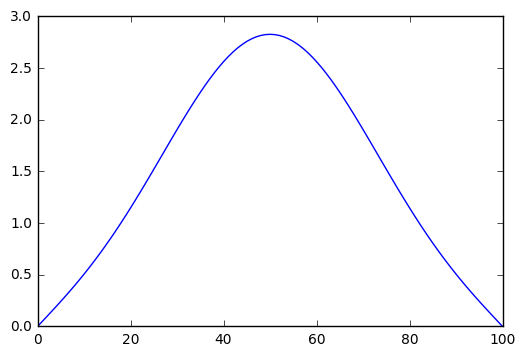

[ 0.          0.04785503  0.09588772  0.14427391  0.19318576  0.24278998
  0.29324601  0.34470429  0.39730456  0.4511742   0.50642664  0.56315988
  0.62145502  0.68137499  0.7429633   0.80624301  0.87121572  0.93786086
  1.00613501  1.07597147  1.14728004  1.2199469   1.29383485  1.36878362
  1.44461048  1.52111111  1.59806061  1.67521479  1.75231169  1.82907332
  1.90520753  1.9804102   2.05436749  2.12675835  2.19725706  2.26553596
  2.33126825  2.39413084  2.45380718  2.50999019  2.56238502  2.61071185
  2.65470853  2.69413306  2.72876598  2.75841246  2.78290425  2.80210134
  2.81589336  2.82420065  2.82697511  2.82420065  2.81589336  2.80210134
  2.78290425  2.75841246  2.72876598  2.69413306  2.65470853  2.61071185
  2.56238502  2.50999019  2.45380718  2.39413084  2.33126825  2.26553596
  2.19725706  2.12675835  2.05436749  1.9804102   1.90520753  1.82907332
  1.75231169  1.67521479  1.59806061  1.52111111  1.44461048  1.36878362
  1.29383485  1.2199469   1.14728004  1.07597147  1

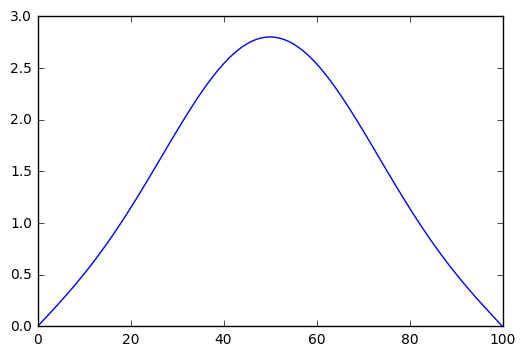

[ 0.          0.04810817  0.09638865  0.14501196  0.194145    0.24394928
  0.29457922  0.34618033  0.39888763  0.452824    0.50809861  0.5648055
  0.62302211  0.6828081   0.74420411  0.80723073  0.87188761  0.93815271
  1.00598169  1.07530752  1.14604024  1.21806693  1.29125189  1.36543703
  1.44044248  1.51606741  1.59209106  1.66827405  1.74435983  1.82007635
  1.89513803  1.96924774  2.0420991   2.11337885  2.18276939  2.24995139
  2.3146065   2.37642014  2.43508422  2.49029996  2.54178063  2.58925414
  2.6324657   2.67118013  2.70518422  2.73428873  2.75833026  2.77717284
  2.7907093   2.79886233  2.80158521  2.79886233  2.7907093   2.77717284
  2.75833026  2.73428873  2.70518422  2.67118013  2.6324657   2.58925414
  2.54178063  2.49029996  2.43508422  2.37642014  2.3146065   2.24995139
  2.18276939  2.11337885  2.0420991   1.96924774  1.89513803  1.82007635
  1.74435983  1.66827405  1.59209106  1.51606741  1.44044248  1.36543703
  1.29125189  1.21806693  1.14604024  1.07530752  1.

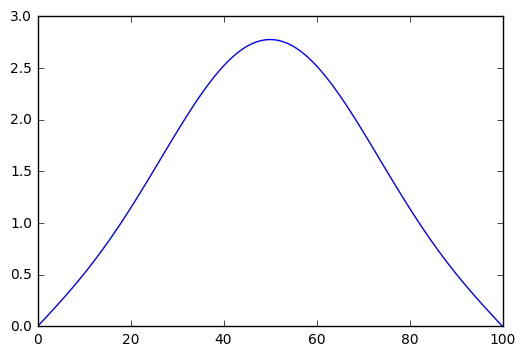

[ 0.          0.04834814  0.09686335  0.1457109   0.19505256  0.24504476
  0.29583695  0.34756987  0.40037391  0.45436755  0.50965582  0.5663289
  0.62446071  0.68410772  0.74530781  0.80807922  0.87241973  0.93830593
  1.00569264  1.07451254  1.14467598  1.21607097  1.28856336  1.36199722
  1.43619552  1.51096087  1.58607661  1.66130806  1.73640396  1.81109812
  1.8851113   1.95815323  2.02992475  2.1001202   2.16842986  2.23454245
  2.29814785  2.35893968  2.41661805  2.47089222  2.52148327  2.5681266
  2.61057451  2.64859842  2.68199113  2.71056879  2.73417267  2.75267072
  2.76595885  2.77396197  2.77663473  2.77396197  2.76595885  2.75267072
  2.73417267  2.71056879  2.68199113  2.64859842  2.61057451  2.5681266
  2.52148327  2.47089222  2.41661805  2.35893968  2.29814785  2.23454245
  2.16842986  2.1001202   2.02992475  1.95815323  1.8851113   1.81109812
  1.73640396  1.66130806  1.58607661  1.51096087  1.43619552  1.36199722
  1.28856336  1.21607097  1.14467598  1.07451254  1.00

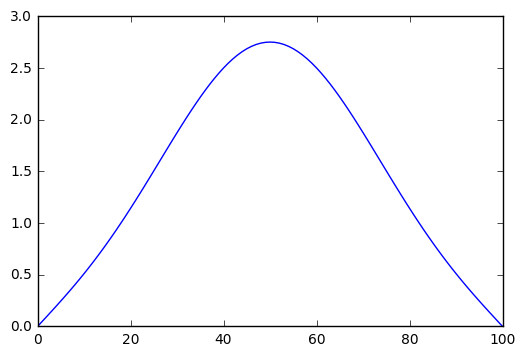

[ 0.          0.04857524  0.0973124   0.14637164  0.19590965  0.24607792
  0.29702103  0.34887503  0.40176581  0.45580755  0.51110127  0.56773336
  0.62577436  0.68527765  0.74627843  0.80879271  0.87281649  0.93832505
  1.00527246  1.07359119  1.14319194  1.21396366  1.28577377  1.35846852
  1.43187367  1.50579526  1.58002064  1.65431976  1.72844651  1.80214045
  1.87512854  1.94712715  2.01784418  2.08698135  2.15423657  2.21930642
  2.28188868  2.34168496  2.3984033   2.45176072  2.50148585  2.54732135
  2.58902633  2.6263786   2.65917677  2.68724216  2.71042057  2.72858369
  2.74163043  2.74948785  2.7521119   2.74948785  2.74163043  2.72858369
  2.71042057  2.68724216  2.65917677  2.6263786   2.58902633  2.54732135
  2.50148585  2.45176072  2.3984033   2.34168496  2.28188868  2.21930642
  2.15423657  2.08698135  2.01784418  1.94712715  1.87512854  1.80214045
  1.72844651  1.65431976  1.58002064  1.50579526  1.43187367  1.35846852
  1.28577377  1.21396366  1.14319194  1.07359119  1

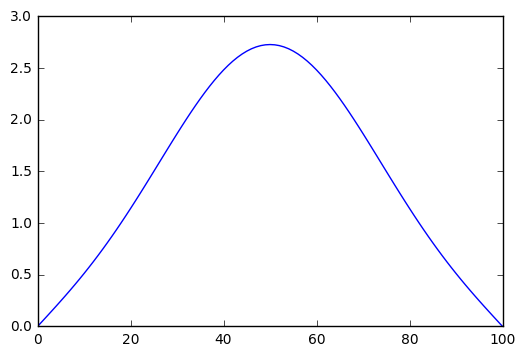

[ 0.          0.04878977  0.09773641  0.14699507  0.19671747  0.24705024
  0.29813323  0.35009789  0.4030657   0.45714668  0.51243789  0.56902211
  0.62696653  0.68632158  0.74711989  0.80937532  0.87308216  0.93821448
  1.00472566  1.072548    1.14159262  1.21174944  1.28288745  1.35485508
  1.42748085  1.50057417  1.57392637  1.64731191  1.72048976  1.79320506
  1.86519082  1.9361699   2.00585707  2.07396121  2.14018764  2.20424055
  2.26582541  2.32465156  2.38043469  2.43289936  2.48178149  2.52683072
  2.56781279  2.60451165  2.6367315   2.6642987   2.68706337  2.70490085
  2.7177129   2.72542866  2.72800536  2.72542866  2.7177129   2.70490085
  2.68706337  2.6642987   2.6367315   2.60451165  2.56781279  2.52683072
  2.48178149  2.43289936  2.38043469  2.32465156  2.26582541  2.20424055
  2.14018764  2.07396121  2.00585707  1.9361699   1.86519082  1.79320506
  1.72048976  1.64731191  1.57392637  1.50057417  1.42748085  1.35485508
  1.28288745  1.21174944  1.14159262  1.072548    1

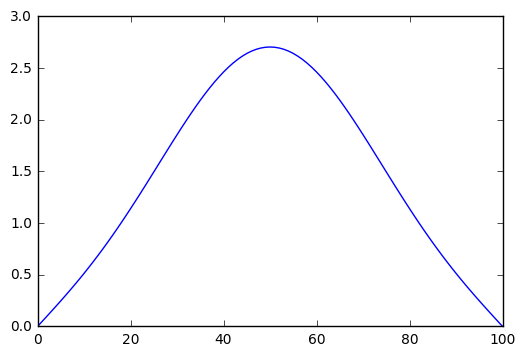

[ 0.          0.04899202  0.09813597  0.14758207  0.1974772   0.24796322
  0.29917533  0.35124051  0.40427594  0.45838755  0.51366859  0.57019829
  0.62804062  0.68724316  0.74783604  0.80983106  0.87322089  0.93797849
  1.00405658  1.07138737  1.1398824   1.20943261  1.27990857  1.35116087
  1.42302078  1.49530104  1.56779686  1.64028714  1.71253583  1.78429351
  1.85529911  1.9252818   1.99396302  2.06105863  2.12628115  2.18934214
  2.24995453  2.30783515  2.36270709  2.41430221  2.46236347  2.50664729
  2.54692578  2.58298881  2.61464603  2.6417286   2.66409085  2.68161162
  2.69419545  2.70177347  2.70430412  2.70177347  2.69419545  2.68161162
  2.66409085  2.6417286   2.61464603  2.58298881  2.54692578  2.50664729
  2.46236347  2.41430221  2.36270709  2.30783515  2.24995453  2.18934214
  2.12628115  2.06105863  1.99396302  1.9252818   1.85529911  1.78429351
  1.71253583  1.64028714  1.56779686  1.49530104  1.42302078  1.35116087
  1.27990857  1.20943261  1.1398824   1.07138737  1

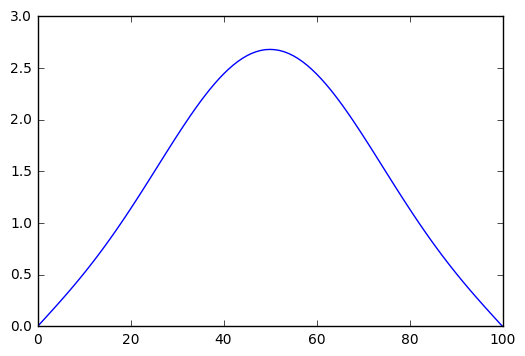

[ 0.          0.0491823   0.09851167  0.14813353  0.19819002  0.24881831
  0.30014909  0.35230493  0.40539884  0.45953276  0.51479622  0.57126501
  0.62899998  0.68804594  0.74843062  0.81016384  0.87323676  0.93762125
  1.00326945  1.07011352  1.13806548  1.2070173   1.27684113  1.34738972
  1.41849705  1.48997913  1.56163501  1.63324794  1.70458672  1.77540726
  1.84545427  1.91446307  1.98216158  2.04827245  2.11251519  2.1746085
  2.23427258  2.29123147  2.34521548  2.39596348  2.44322528  2.48676383
  2.52635739  2.5618016   2.59291131  2.61952237  2.64149313  2.65870582
  2.67106766  2.67851171  2.68099756  2.67851171  2.67106766  2.65870582
  2.64149313  2.61952237  2.59291131  2.5618016   2.52635739  2.48676383
  2.44322528  2.39596348  2.34521548  2.29123147  2.23427258  2.1746085
  2.11251519  2.04827245  1.98216158  1.91446307  1.84545427  1.77540726
  1.70458672  1.63324794  1.56163501  1.48997913  1.41849705  1.34738972
  1.27684113  1.2070173   1.13806548  1.07011352  1.0

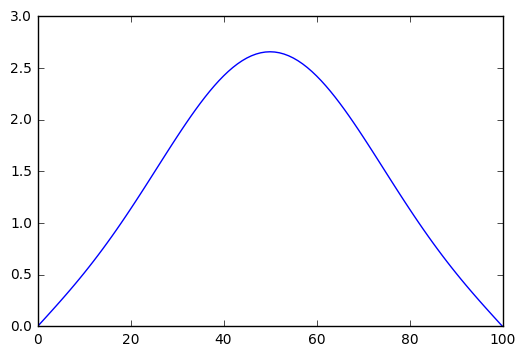

[ 0.          0.04936088  0.09886408  0.14865033  0.19885708  0.24961696
  0.30105622  0.35329316  0.40643668  0.46058485  0.51582358  0.57222531
  0.62984788  0.68873339  0.74890729  0.8103775   0.87313371  0.93714678
  1.00236835  1.06873056  1.13614595  1.20450751  1.27368899  1.34354529
  1.41391307  1.48461157  1.55544359  1.62619664  1.6966443   1.76654768
  1.83565709  1.90371386  1.97045225  2.03560146  2.09888783  2.16003698
  2.21877614  2.27483637  2.32795493  2.37787753  2.42436057  2.46717331
  2.5061      2.5409418   2.57151862  2.5976708   2.61926062  2.63617357
  2.64831943  2.65563315  2.65807543  2.65563315  2.64831943  2.63617357
  2.61926062  2.5976708   2.57151862  2.5409418   2.5061      2.46717331
  2.42436057  2.37787753  2.32795493  2.27483637  2.21877614  2.16003698
  2.09888783  2.03560146  1.97045225  1.90371386  1.83565709  1.76654768
  1.6966443   1.62619664  1.55544359  1.48461157  1.41391307  1.34354529
  1.27368899  1.20450751  1.13614595  1.06873056  1

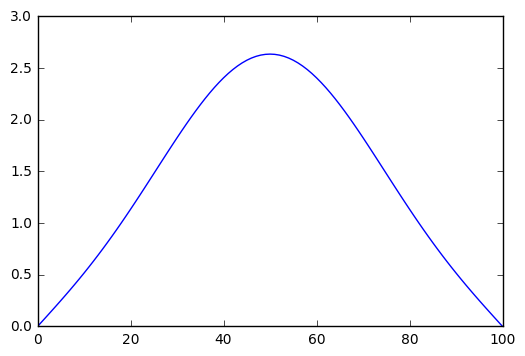

[ 0.          0.04952805  0.09919379  0.14913331  0.19947953  0.2503606
  0.30189845  0.35420718  0.40739171  0.46154634  0.51675343  0.57308219
  0.63058751  0.68930891  0.74926962  0.81047575  0.87291557  0.93655902
  1.00135727  1.06724248  1.13412773  1.20190709  1.27045587  1.33963111
  1.40927212  1.47920132  1.54922521  1.61913547  1.68871033  1.75771599
  1.82590825  1.89303427  1.95883447  2.02304446  2.08539716  2.14562496
  2.20346187  2.25864578  2.31092068  2.36003887  2.40576316  2.44786893
  2.48614618  2.52040143  2.55045947  2.576165    2.59738407  2.61400531
  2.62594101  2.6331279   2.63552779  2.6331279   2.62594101  2.61400531
  2.59738407  2.576165    2.55045947  2.52040143  2.48614618  2.44786893
  2.40576316  2.36003887  2.31092068  2.25864578  2.20346187  2.14562496
  2.08539716  2.02304446  1.95883447  1.89303427  1.82590825  1.75771599
  1.68871033  1.61913547  1.54922521  1.47920132  1.40927212  1.33963111
  1.27045587  1.20190709  1.13412773  1.06724248  1.

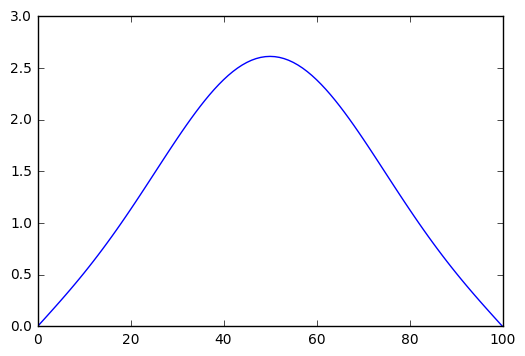

[ 0.          0.04968411  0.09950137  0.14958334  0.2000585   0.25105064
  0.30267745  0.35504894  0.40826615  0.46241967  0.51758846  0.57383856
  0.63122201  0.68977584  0.74952112  0.81046221  0.87258608  0.93586178
  1.00024005  1.06565312  1.13201464  1.19921974  1.26714534  1.33565056
  1.40457734  1.47375124  1.54298237  1.61206652  1.68078646  1.74891335
  1.81620835  1.88242433  1.94730765  2.01060019  2.07204128  2.13136983
  2.18832647  2.24265569  2.29410802  2.34244214  2.38742705  2.42884406
  2.46648873  2.50017275  2.52972566  2.55499634  2.5758545   2.5921918
  2.60392295  2.6109864   2.61334503  2.6109864   2.60392295  2.5921918
  2.5758545   2.55499634  2.52972566  2.50017275  2.46648873  2.42884406
  2.38742705  2.34244214  2.29410802  2.24265569  2.18832647  2.13136983
  2.07204128  2.01060019  1.94730765  1.88242433  1.81620835  1.74891335
  1.68078646  1.61206652  1.54298237  1.47375124  1.40457734  1.33565056
  1.26714534  1.19921974  1.13201464  1.06565312  1.0

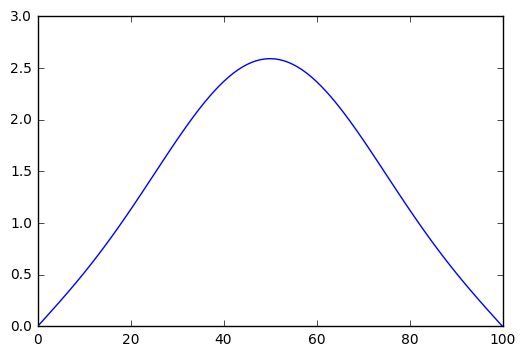

[ 0.          0.04982934  0.09978737  0.15000126  0.20059511  0.25168847
  0.30339487  0.35582036  0.40906216  0.46320728  0.51833133  0.57449729
  0.63175445  0.69013741  0.74966517  0.81034043  0.87214889  0.93505876
  0.99902042  1.06396621  1.12981034  1.19644905  1.26376082  1.33160687
  1.39983174  1.46826404  1.53671745  1.60499177  1.67287422  1.74014082
  1.80655794  1.87188398  1.93587117  1.99826741  2.05881827  2.11726903
  2.17336671  2.22686221  2.27751238  2.32508212  2.3693464   2.41009225
  2.44712064  2.48024827  2.50930922  2.53415647  2.55466322  2.57072409
  2.5822561   2.5891994   2.59151786  2.5891994   2.5822561   2.57072409
  2.55466322  2.53415647  2.50930922  2.48024827  2.44712064  2.41009225
  2.3693464   2.32508212  2.27751238  2.22686221  2.17336671  2.11726903
  2.05881827  1.99826741  1.93587117  1.87188398  1.80655794  1.74014082
  1.67287422  1.60499177  1.53671745  1.46826404  1.39983174  1.33160687
  1.26376082  1.19644905  1.12981034  1.06396621  0

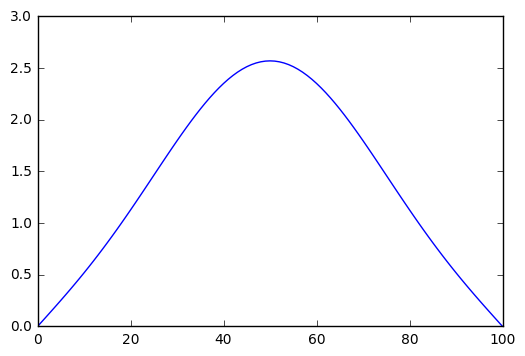

[ 0.          0.049964    0.10005235  0.15038788  0.20109046  0.25227546
  0.30405236  0.35652333  0.40978187  0.46391152  0.51898462  0.57506119
  0.63218783  0.6903968   0.74970511  0.81011385  0.87160752  0.93415355
  0.99770201  1.06218534  1.12751839  1.19359846  1.26030563  1.32750318
  1.39503819  1.46274231  1.53043269  1.59791309  1.66497506  1.73139937
  1.79695746  1.86141316  1.92452435  1.98604484  2.04572625  2.10332002
  2.15857941  2.21126151  2.26112931  2.30795373  2.35151552  2.39160726
  2.42803514  2.46062071  2.48920246  2.51363729  2.53380182  2.54959352
  2.56093163  2.56775793  2.57003729  2.56775793  2.56093163  2.54959352
  2.53380182  2.51363729  2.48920246  2.46062071  2.42803514  2.39160726
  2.35151552  2.30795373  2.26112931  2.21126151  2.15857941  2.10332002
  2.04572625  1.98604484  1.92452435  1.86141316  1.79695746  1.73139937
  1.66497506  1.59791309  1.53043269  1.46274231  1.39503819  1.32750318
  1.26030563  1.19359846  1.12751839  1.06218534  0

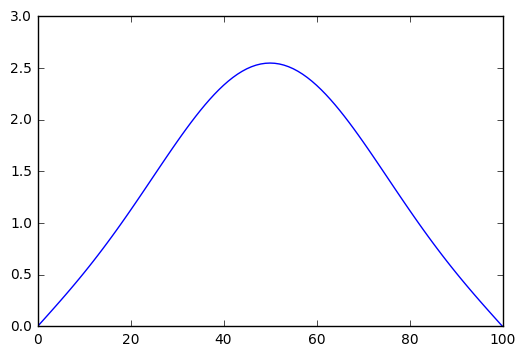

[ 0.          0.05008838  0.10029685  0.15074404  0.20154563  0.25281294
  0.30465151  0.3571597   0.41042739  0.46453473  0.5195509   0.57553301
  0.63252508  0.6905571   0.74964417  0.80978582  0.87096541  0.93314965
  0.99628832  1.06031402  1.12514222  1.19067132  1.25678296  1.32334247
  1.39019945  1.45718852  1.52413026  1.59083226  1.65709034  1.72268989
  1.78740733  1.85101173  1.91326651  1.9739312   2.03276332  2.08952031
  2.14396143  2.19584984  2.24495445  2.29105199  2.33392886  2.37338299
  2.40922563  2.441283    2.46939788  2.49343096  2.51326216  2.52879168
  2.53994096  2.54665333  2.5488946   2.54665333  2.53994096  2.52879168
  2.51326216  2.49343096  2.46939788  2.441283    2.40922563  2.37338299
  2.33392886  2.29105199  2.24495445  2.19584984  2.14396143  2.08952031
  2.03276332  1.9739312   1.91326651  1.85101173  1.78740733  1.72268989
  1.65709034  1.59083226  1.52413026  1.45718852  1.39019945  1.32334247
  1.25678296  1.19067132  1.12514222  1.06031402  0

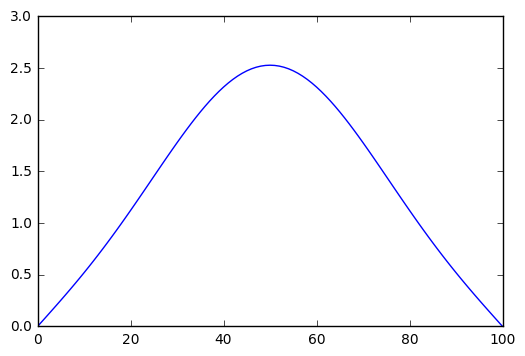

[ 0.          0.05020274  0.10052141  0.15107052  0.20196169  0.25330226
  0.3051939   0.35773129  0.41100077  0.46507919  0.52003264  0.57591543
  0.63276907  0.69062134  0.7494855   0.8093596   0.8702259   0.93205046
  0.99478276  1.05835563  1.12268515  1.18767083  1.25319588  1.31912763
  1.38531816  1.45160503  1.51781218  1.58375095  1.64922132  1.71401321
  1.77790787  1.84067951  1.90209692  1.96192522  2.01992763  2.07586742
  2.12950973  2.18062353  2.22898354  2.2743721   2.31658105  2.35541354
  2.3906857   2.4222283   2.44988822  2.47352987  2.49303632  2.50831046
  2.51927579  2.52587718  2.52808136  2.52587718  2.51927579  2.50831046
  2.49303632  2.47352987  2.44988822  2.4222283   2.3906857   2.35541354
  2.31658105  2.2743721   2.22898354  2.18062353  2.12950973  2.07586742
  2.01992763  1.96192522  1.90209692  1.84067951  1.77790787  1.71401321
  1.64922132  1.58375095  1.51781218  1.45160503  1.38531816  1.31912763
  1.25319588  1.18767083  1.12268515  1.05835563  0

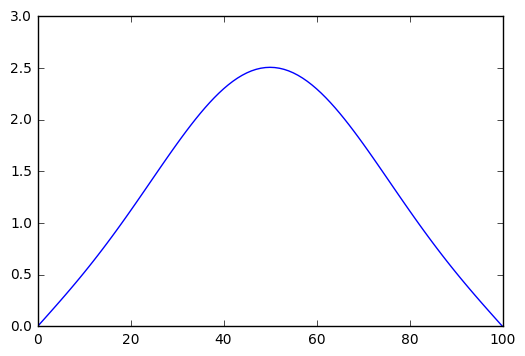

[ 0.          0.05030735  0.10072657  0.15136813  0.20233969  0.2537447
  0.30568108  0.35823988  0.41150403  0.46554713  0.52043229  0.57621109
  0.63292259  0.69059246  0.74923218  0.80883837  0.86939226  0.93085925
  0.99318863  1.05631343  1.12015038  1.1846001   1.24954733  1.31486141
  1.38039687  1.44599412  1.51148039  1.57667074  1.64136919  1.70537007
  1.76845937  1.83041629  1.89101485  1.95002559  2.00721732  2.06235894
  2.11522129  2.16557901  2.21321242  2.25790932  2.29946684  2.33769315
  2.37240913  2.40344994  2.43066646  2.45392664  2.47311667  2.48814196
  2.49892809  2.50542136  2.5075894   2.50542136  2.49892809  2.48814196
  2.47311667  2.45392664  2.43066646  2.40344994  2.37240913  2.33769315
  2.29946684  2.25790932  2.21321242  2.16557901  2.11522129  2.06235894
  2.00721732  1.95002559  1.89101485  1.83041629  1.76845937  1.70537007
  1.64136919  1.57667074  1.51148039  1.44599412  1.38039687  1.31486141
  1.24954733  1.1846001   1.12015038  1.05631343  0.

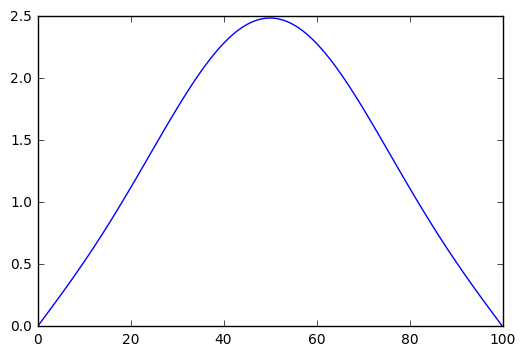

[ 0.          0.05040246  0.10091283  0.15163764  0.20268065  0.25414155
  0.30611457  0.35868724  0.41193915  0.46594074  0.52075223  0.57642255
  0.63298838  0.69047335  0.74888721  0.80822522  0.86846762  0.92957923
  0.99150913  1.05419059  1.11754102  1.18146211  1.24584016  1.31054648
  1.37543798  1.44035793  1.50513675  1.56959313  1.63353506  1.69676116
  1.75906205  1.8202218   1.88001952  1.93823103  1.99463055  2.04899247
  2.10109316  2.15071277  2.19763704  2.24165908  2.28258113  2.32021625
  2.35438989  2.38494148  2.41172576  2.43461414  2.45349577  2.46827857
  2.47889006  2.48527799  2.48741081  2.48527799  2.47889006  2.46827857
  2.45349577  2.43461414  2.41172576  2.38494148  2.35438989  2.32021625
  2.28258113  2.24165908  2.19763704  2.15071277  2.10109316  2.04899247
  1.99463055  1.93823103  1.88001952  1.8202218   1.75906205  1.69676116
  1.63353506  1.56959313  1.50513675  1.44035793  1.37543798  1.31054648
  1.24584016  1.18146211  1.11754102  1.05419059  0

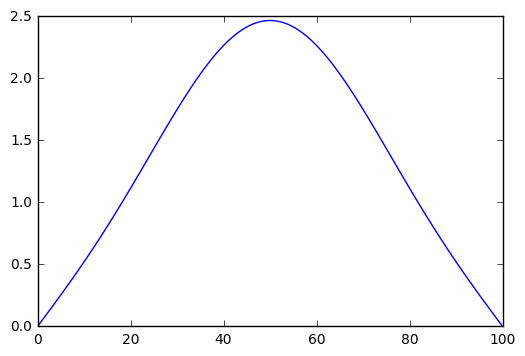

[ 0.          0.05048834  0.10108072  0.15187981  0.2029856   0.25449406
  0.30649586  0.35907508  0.41230806  0.46626217  0.52099481  0.57655232
  0.63296912  0.69026681  0.74845351  0.80752317  0.86745508  0.9282135
  0.98974736  1.05199019  1.11486005  1.17825976  1.24207711  1.30618538
  1.37044385  1.43469852  1.49878302  1.56251953  1.62571996  1.68818712
  1.74971612  1.81009577  1.86911017  1.92654025  1.9821655   2.03576566
  2.08712245  2.13602137  2.18225344  2.2256169   2.26591896  2.30297738
  2.3366221   2.36669664  2.3930595   2.41558542  2.43416643  2.44871288
  2.45915417  2.46543942  2.46753793  2.46543942  2.45915417  2.44871288
  2.43416643  2.41558542  2.3930595   2.36669664  2.3366221   2.30297738
  2.26591896  2.2256169   2.18225344  2.13602137  2.08712245  2.03576566
  1.9821655   1.92654025  1.86911017  1.81009577  1.74971612  1.68818712
  1.62571996  1.56251953  1.49878302  1.43469852  1.37044385  1.30618538
  1.24207711  1.17825976  1.11486005  1.05199019  0.

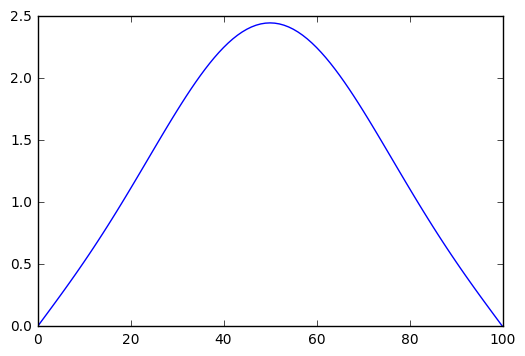

[ 0.          0.05056524  0.10123072  0.15209538  0.20325551  0.25480346
  0.30682641  0.35940509  0.41261265  0.46651352  0.5211623   0.57660286
  0.63286739  0.68997558  0.74793393  0.80673514  0.8663576   0.92676506
  0.98790633  1.04971518  1.11211038  1.17499582  1.23826083  1.30178058
  1.36541668  1.42901787  1.49242085  1.55545129  1.61792486  1.6796485
  1.74042169  1.80003788  1.85828599  1.91495195  1.96982037  2.02267618
  2.07330632  2.12150147  2.16705775  2.20977842  2.24947548  2.28597128
  2.31910006  2.34870933  2.37466125  2.39683375  2.41512168  2.42943771
  2.43971309  2.44589826  2.44796331  2.44589826  2.43971309  2.42943771
  2.41512168  2.39683375  2.37466125  2.34870933  2.31910006  2.28597128
  2.24947548  2.20977842  2.16705775  2.12150147  2.07330632  2.02267618
  1.96982037  1.91495195  1.85828599  1.80003788  1.74042169  1.6796485
  1.61792486  1.55545129  1.49242085  1.42901787  1.36541668  1.30178058
  1.23826083  1.17499582  1.11211038  1.04971518  0.9

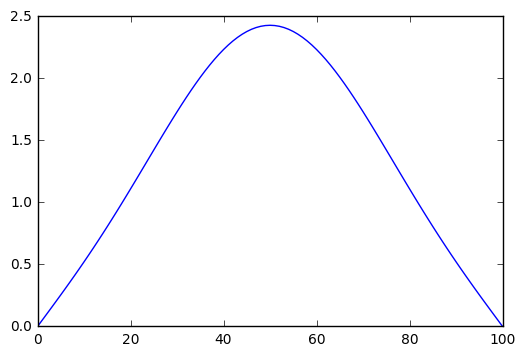

[ 0.          0.0506334   0.10136334  0.15228511  0.20349137  0.25507096
  0.30710765  0.35967891  0.4128548   0.46669682  0.52125694  0.57657657
  0.63268575  0.68960232  0.74733123  0.80586397  0.8651781   0.92523685
  0.98598894  1.04736844  1.10929479  1.17167299  1.23439385  1.29733443
  1.36035863  1.42331786  1.48605186  1.54838967  1.61015068  1.67114583
  1.73117887  1.79004778  1.84754617  1.90346485  1.95759339  2.00972176
  2.05964198  2.10714977  2.15204621  2.19413939  2.23324598  2.26919279
  2.30181821  2.33097365  2.35652476  2.37835261  2.39635476  2.41044612
  2.42055973  2.42664733  2.42867977  2.42664733  2.42055973  2.41044612
  2.39635476  2.37835261  2.35652476  2.33097365  2.30181821  2.26919279
  2.23324598  2.19413939  2.15204621  2.10714977  2.05964198  2.00972176
  1.95759339  1.90346485  1.84754617  1.79004778  1.73117887  1.67114583
  1.61015068  1.54838967  1.48605186  1.42331786  1.36035863  1.29733443
  1.23439385  1.17167299  1.10929479  1.04736844  0

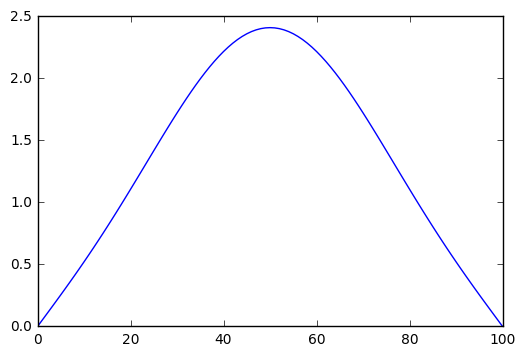

[ 0.          0.05069306  0.10147906  0.1524497   0.20369412  0.25529774
  0.30734099  0.35989817  0.41303631  0.4668141   0.5212809   0.57647578
  0.63242668  0.68914963  0.74664811  0.80491245  0.86391938  0.9236317
  0.98399803  1.04495275  1.10641601  1.16829387  1.23047862  1.2928492
  1.35527176  1.4176003   1.47967755  1.54133586  1.60239825  1.66267956
  1.72198773  1.78012511  1.83688991  1.89207766  1.94548278  1.99690015
  2.04612671  2.09296307  2.13721513  2.17869567  2.21722589  2.25263692
  2.28477119  2.31348386  2.33864397  2.36013566  2.37785909  2.39173136
  2.40168722  2.40767967  2.40968031  2.40767967  2.40168722  2.39173136
  2.37785909  2.36013566  2.33864397  2.31348386  2.28477119  2.25263692
  2.21722589  2.17869567  2.13721513  2.09296307  2.04612671  1.99690015
  1.94548278  1.89207766  1.83688991  1.78012511  1.72198773  1.66267956
  1.60239825  1.54133586  1.47967755  1.4176003   1.35527176  1.2928492
  1.23047862  1.16829387  1.10641601  1.04495275  0.98

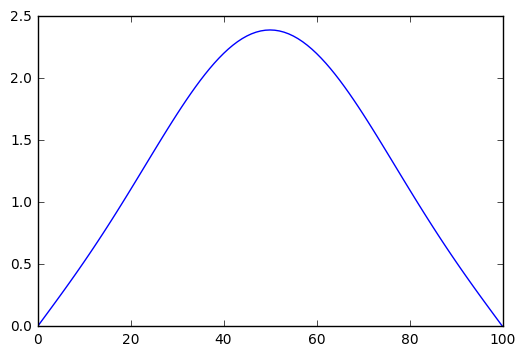

[ 0.          0.05074446  0.10157835  0.15258986  0.20386471  0.25548496
  0.3075278   0.36006444  0.41315895  0.46686731  0.52123632  0.57630278
  0.63209259  0.68862005  0.74588721  0.80388327  0.86258419  0.92195235
  0.98193633  1.04247081  1.10347664  1.16486095  1.22651751  1.28832708
  1.35015801  1.4118669   1.47329937  1.53429101  1.59466837  1.65425013
  1.71284829  1.77026947  1.82631637  1.88078911  1.93348683  1.98420916
  2.03275784  2.07893823  2.12256091  2.16344322  2.20141075  2.2362988
  2.26795374  2.29623436  2.32101302  2.34217676  2.35962831  2.37328688
  2.38308889  2.38898853  2.39095816  2.38898853  2.38308889  2.37328688
  2.35962831  2.34217676  2.32101302  2.29623436  2.26795374  2.2362988
  2.20141075  2.16344322  2.12256091  2.07893823  2.03275784  1.98420916
  1.93348683  1.88078911  1.82631637  1.77026947  1.71284829  1.65425013
  1.59466837  1.53429101  1.47329937  1.4118669   1.35015801  1.28832708
  1.22651751  1.16486095  1.10347664  1.04247081  0.9

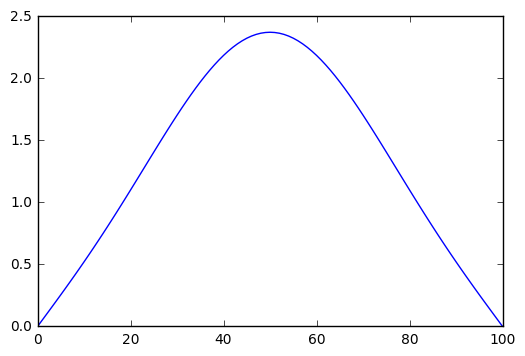

[ 0.          0.05078784  0.10166168  0.15270629  0.20400405  0.25563376
  0.30766943  0.36017926  0.41322448  0.46685836  0.52112528  0.57605979
  0.63168584  0.68801605  0.74505107  0.80277904  0.86117519  0.9202015
  0.9798065   1.03992523  1.10047921  1.16137666  1.22251278  1.28377016
  1.3450193   1.40611932  1.46691869  1.52725617  1.58696178  1.64585791
  1.70376053  1.76048046  1.81582472  1.86959793  1.9216038   1.97164662
  2.01953275  2.06507218  2.10808005  2.14837811  2.1857962   2.2201737
  2.25136078  2.27921975  2.30362617  2.32446994  2.34165624  2.35510633
  2.36475826  2.37056738  2.37250676  2.37056738  2.36475826  2.35510633
  2.34165624  2.32446994  2.30362617  2.27921975  2.25136078  2.2201737
  2.1857962   2.14837811  2.10808005  2.06507218  2.01953275  1.97164662
  1.9216038   1.86959793  1.81582472  1.76048046  1.70376053  1.64585791
  1.58696178  1.52725617  1.46691869  1.40611932  1.3450193   1.28377016
  1.22251278  1.16137666  1.10047921  1.03992523  0.97

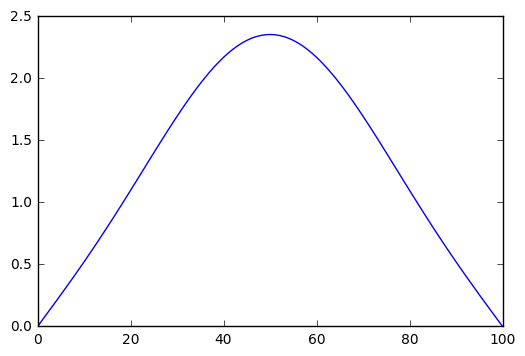

[ 0.          0.05082342  0.10172949  0.15279966  0.20411304  0.25574523
  0.3077672   0.36024416  0.41323458  0.46678914  0.5209498   0.57574899
  0.63120873  0.68734003  0.74414218  0.80160232  0.85969495  0.91838171
  0.97761111  1.03731852  1.09742617  1.15784334  1.21846664  1.27918046
  1.33985743  1.40035912  1.46053682  1.52023236  1.57927915  1.63750323
  1.69472444  1.75075765  1.80541412  1.85850285  1.90983201  1.95921039
  2.00644887  2.05136193  2.09376912  2.13349649  2.17037802  2.20425702
  2.23498735  2.26243475  2.28647788  2.3070094   2.32393687  2.33718355
  2.34668906  2.35240987  2.35431973  2.35240987  2.34668906  2.33718355
  2.32393687  2.3070094   2.28647788  2.26243475  2.23498735  2.20425702
  2.17037802  2.13349649  2.09376912  2.05136193  2.00644887  1.95921039
  1.90983201  1.85850285  1.80541412  1.75075765  1.69472444  1.63750323
  1.57927915  1.52023236  1.46053682  1.40035912  1.33985743  1.27918046
  1.21846664  1.15784334  1.09742617  1.03731852  0

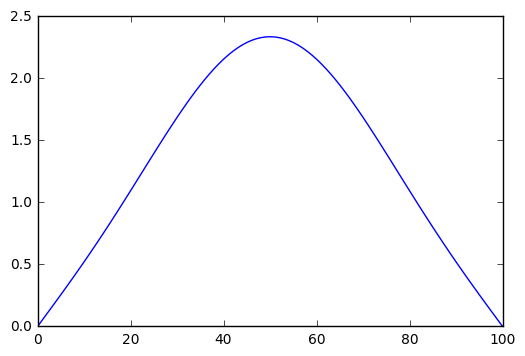

[ 0.          0.05085143  0.10178223  0.15287064  0.20419255  0.25582048
  0.30782238  0.36026061  0.41319092  0.46666146  0.52071188  0.5753725
  0.63066351  0.68659433  0.74316297  0.80035558  0.858146    0.91649552
  0.97535266  1.03465313  1.09431988  1.15426322  1.2143812   1.27455992
  1.33467413  1.39458782  1.454155    1.51322054  1.57162114  1.6291864
  1.68573993  1.74110059  1.79508374  1.84750264  1.8981698   1.94689839
  1.99350369  2.03780455  2.07962478  2.11879463  2.15515209  2.18854427
  2.21882865  2.24587425  2.26956276  2.28978952  2.3064644   2.31951258
  2.32887519  2.33450983  2.3363909   2.33450983  2.32887519  2.31951258
  2.3064644   2.28978952  2.26956276  2.24587425  2.21882865  2.18854427
  2.15515209  2.11879463  2.07962478  2.03780455  1.99350369  1.94689839
  1.8981698   1.84750264  1.79508374  1.74110059  1.68573993  1.6291864
  1.57162114  1.51322054  1.454155    1.39458782  1.33467413  1.27455992
  1.2143812   1.15426322  1.09431988  1.03465313  0.97

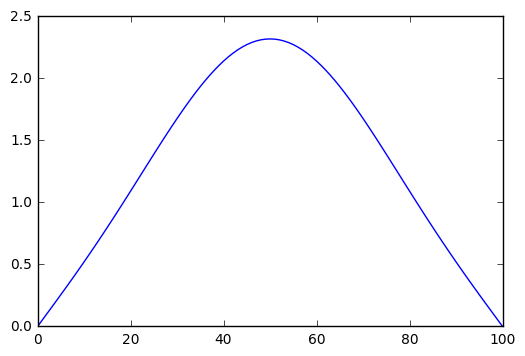

[ 0.          0.05087208  0.10182035  0.15291987  0.20424345  0.25586056
  0.30783624  0.36023006  0.41309512  0.46647711  0.52041344  0.57493238
  0.63005235  0.68578123  0.74211579  0.79904123  0.85653076  0.91454535
  0.97303356  1.03193144  1.09116262  1.15063851  1.21025849  1.26991042
  1.32947109  1.38880686  1.44777442  1.5062216   1.56398834  1.62090768
  1.67680694  1.73150882  1.78483273  1.83659605  1.88661551  1.93470856
  1.98069475  2.02439716  2.06564378  2.10426889  2.14011439  2.1730311
  2.20287998  2.22953327  2.25287558  2.27280483  2.28923315  2.30208759
  2.31131076  2.31686129  2.31871425  2.31686129  2.31131076  2.30208759
  2.28923315  2.27280483  2.25287558  2.22953327  2.20287998  2.1730311
  2.14011439  2.10426889  2.06564378  2.02439716  1.98069475  1.93470856
  1.88661551  1.83659605  1.78483273  1.73150882  1.67680694  1.62090768
  1.56398834  1.5062216   1.44777442  1.38880686  1.32947109  1.26991042
  1.21025849  1.15063851  1.09116262  1.03193144  0.9

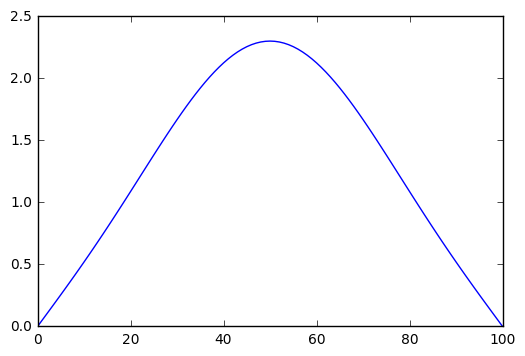

[ 0.          0.05088559  0.10184426  0.15294799  0.20426658  0.25586652
  0.30781001  0.36015391  0.41294875  0.46623784  0.52005638  0.57443066
  0.62937738  0.68490295  0.74100293  0.79766161  0.8548516   0.91253359
  0.97065615  1.02915572  1.08795662  1.14697128  1.20610048  1.26523375
  1.32424989  1.38301761  1.44139621  1.4992364   1.55638129  1.61266731
  1.66792534  1.72198188  1.77466024  1.82578185  1.87516754  1.9226389
  1.96801964  2.01113696  2.05182291  2.0899157   2.12526101  2.15771327
  2.1871368   2.21340698  2.23641124  2.25605003  2.27223765  2.28490297
  2.29399     2.29945845  2.30128398  2.29945845  2.29399     2.28490297
  2.27223765  2.25605003  2.23641124  2.21340698  2.1871368   2.15771327
  2.12526101  2.0899157   2.05182291  2.01113696  1.96801964  1.9226389
  1.87516754  1.82578185  1.77466024  1.72198188  1.66792534  1.61266731
  1.55638129  1.4992364   1.44139621  1.38301761  1.32424989  1.26523375
  1.20610048  1.14697128  1.08795662  1.02915572  0.9

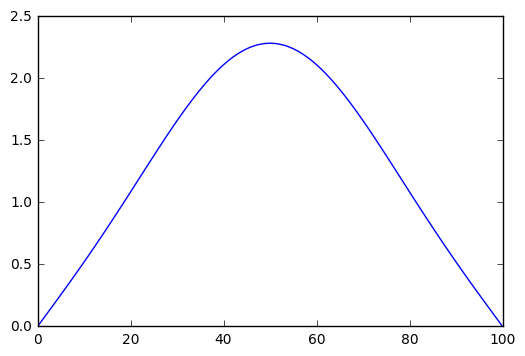

[ 0.          0.05089216  0.10185438  0.15295563  0.20426274  0.25583936
  0.3077449   0.36003355  0.41275338  0.46594534  0.51964252  0.5738693
  0.62864068  0.68396165  0.73982662  0.796219    0.85311083  0.91046252
  0.96822271  1.02632819  1.084704    1.14326358  1.20190906  1.26053163
  1.31901209  1.37722141  1.43502144  1.49226576  1.54880052  1.60446547
  1.659095    1.71251928  1.76456545  1.81505883  1.86382428  1.91068742
  1.955476    1.99802123  2.03815909  2.0757316   2.11058815  2.14258664
  2.17159468  2.19749067  2.2201648   2.23951997  2.25547257  2.26795323
  2.27690737  2.28229567  2.28409442  2.28229567  2.27690737  2.26795323
  2.25547257  2.23951997  2.2201648   2.19749067  2.17159468  2.14258664
  2.11058815  2.0757316   2.03815909  1.99802123  1.955476    1.91068742
  1.86382428  1.81505883  1.76456545  1.71251928  1.659095    1.60446547
  1.54880052  1.49226576  1.43502144  1.37722141  1.31901209  1.26053163
  1.20190906  1.14326358  1.084704    1.02632819  0.

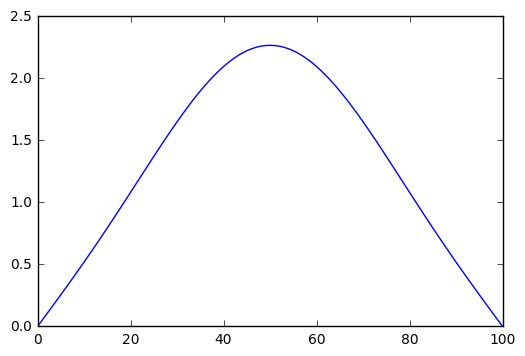

[ 0.          0.05089201  0.10185112  0.15294339  0.20423276  0.25578008
  0.30764206  0.35987033  0.41251049  0.46560127  0.51917367  0.57325021
  0.62784426  0.68295943  0.73858902  0.7947156   0.85131067  0.90833438
  0.96573544  1.02345101  1.08140684  1.13951737  1.19768605  1.25580574
  1.31375916  1.3714195   1.42865114  1.48531042  1.54124649  1.59630234
  1.65031578  1.70312054  1.75454749  1.80442579  1.85258417  1.89885218
  1.94306152  1.98504728  2.02464927  2.06171322  2.0960921   2.12764719
  2.15624931  2.18177977  2.20413146  2.22320962  2.23893271  2.25123306
  2.26005744  2.26536749  2.26714009  2.26536749  2.26005744  2.25123306
  2.23893271  2.22320962  2.20413146  2.18177977  2.15624931  2.12764719
  2.0960921   2.06171322  2.02464927  1.98504728  1.94306152  1.89885218
  1.85258417  1.80442579  1.75454749  1.70312054  1.65031578  1.59630234
  1.54124649  1.48531042  1.42865114  1.3714195   1.31375916  1.25580574
  1.19768605  1.13951737  1.08140684  1.02345101  0

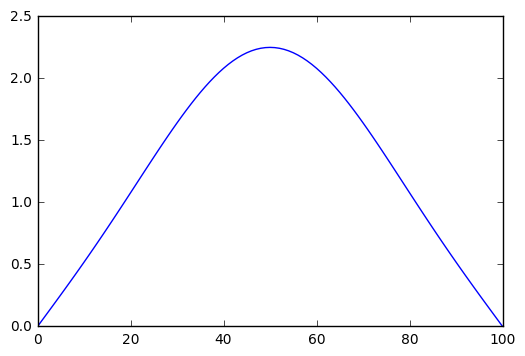

[ 0.          0.05088533  0.10183488  0.15291186  0.20417741  0.25568965
  0.30750266  0.35966555  0.41222158  0.46520726  0.51865157  0.57257525
  0.62699009  0.68189835  0.73729225  0.79315358  0.84945329  0.90615133
  0.96319647  1.02052626  1.07806713  1.13573453  1.19343323  1.25105768
  1.30849251  1.3656131   1.42228629  1.47837111  1.53371966  1.58817808
  1.64158749  1.69378515  1.74460554  1.79388153  1.84144565  1.88713128
  1.93077394  1.9722125   2.01129049  2.04785726  2.08176924  2.11289102
  2.14109649  2.16626984  2.18830653  2.20711412  2.22261305  2.23473731
  2.24343496  2.2486686   2.25041566  2.2486686   2.24343496  2.23473731
  2.22261305  2.20711412  2.18830653  2.16626984  2.14109649  2.11289102
  2.08176924  2.04785726  2.01129049  1.9722125   1.93077394  1.88713128
  1.84144565  1.79388153  1.74460554  1.69378515  1.64158749  1.58817808
  1.53371966  1.47837111  1.42228629  1.3656131   1.30849251  1.25105768
  1.19343323  1.13573453  1.07806713  1.02052626  0

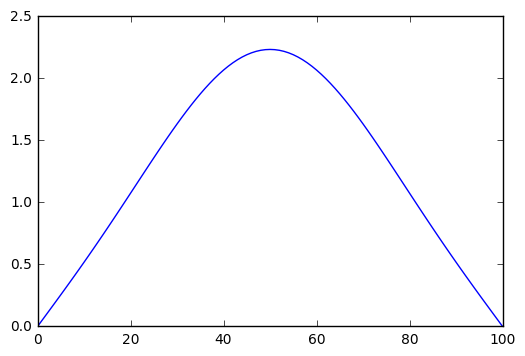

[ 0.          0.05087231  0.10180605  0.15286162  0.20409746  0.25556901
  0.30732781  0.35942051  0.41188807  0.46476486  0.51807793  0.57184625
  0.62608007  0.68078038  0.73593836  0.79153501  0.8475408   0.90391547
  0.96060786  1.01755594  1.0746868   1.1319169   1.18915228  1.24628899
  1.30321351  1.35980337  1.41592781  1.4714485   1.52622043  1.58009279
  1.63290997  1.68451262  1.73473875  1.78342488  1.83040722  1.87552286
  1.91861104  1.95951433  1.99807987  2.03416051  2.06761605  2.0983143
  2.12613215  2.15095655  2.17268548  2.19122874  2.2065087   2.21846095
  2.22703482  2.23219383  2.23391595  2.23219383  2.22703482  2.21846095
  2.2065087   2.19122874  2.17268548  2.15095655  2.12613215  2.0983143
  2.06761605  2.03416051  1.99807987  1.95951433  1.91861104  1.87552286
  1.83040722  1.78342488  1.73473875  1.68451262  1.63290997  1.58009279
  1.52622043  1.4714485   1.41592781  1.35980337  1.30321351  1.24628899
  1.18915228  1.1319169   1.0746868   1.01755594  0.9

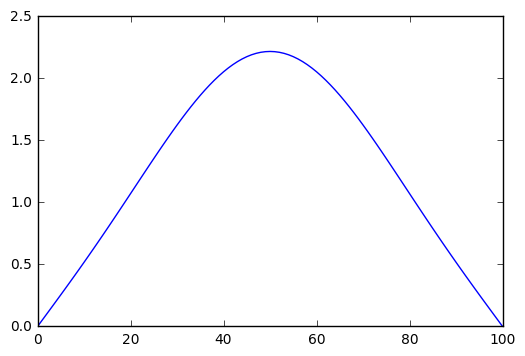

[ 0.          0.05085315  0.101765    0.15279324  0.20399366  0.2554191
  0.3071186   0.35913645  0.41151136  0.46427564  0.51745442  0.57106497
  0.62511608  0.67960748  0.73452934  0.78986193  0.84557524  0.90162882
  0.95797163  1.014542    1.07126773  1.12806624  1.18484485  1.24150115
  1.29792346  1.35399142  1.40957659  1.46454325  1.51874918  1.57204657
  1.624283    1.67530242  1.7249463   1.77305468  1.81946736  1.86402507
  1.90657066  1.94695028  1.98501458  2.02061983  2.05362911  2.08391334
  2.11135231  2.13583569  2.1572639   2.17554889  2.19061492  2.20239912
  2.21085208  2.21593818  2.21763594  2.21593818  2.21085208  2.20239912
  2.19061492  2.17554889  2.1572639   2.13583569  2.11135231  2.08391334
  2.05362911  2.02061983  1.98501458  1.94695028  1.90657066  1.86402507
  1.81946736  1.77305468  1.7249463   1.67530242  1.624283    1.57204657
  1.51874918  1.46454325  1.40957659  1.35399142  1.29792346  1.24150115
  1.18484485  1.12806624  1.07126773  1.014542    0.

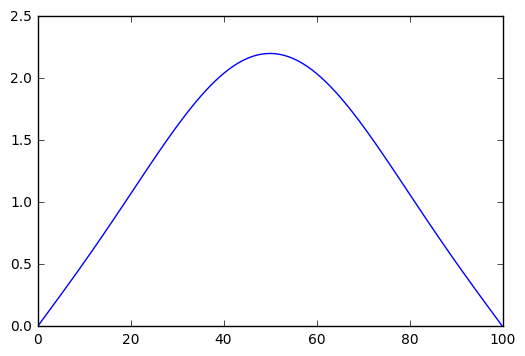

[ 0.          0.05082804  0.10171211  0.15270728  0.20386673  0.2552408
  0.30687609  0.35881459  0.41109282  0.46374108  0.51678264  0.57023314
  0.62409993  0.67838152  0.73306713  0.7881363   0.84355859  0.89929337
  0.95528971  1.01148634  1.06781173  1.12418426  1.18051251  1.23669559
  1.29262363  1.34817829  1.40323347  1.45765595  1.51130625  1.5640395
  1.61570637  1.66615405  1.71522736  1.76276979  1.80862463  1.85263613
  1.89465068  1.93451791  1.97209187  2.00723218  2.03980507  2.06968451
  2.09675312  2.12090318  2.14203748  2.16007009  2.17492707  2.18654709
  2.19488191  2.19989677  2.20157073  2.19989677  2.19488191  2.18654709
  2.17492707  2.16007009  2.14203748  2.12090318  2.09675312  2.06968451
  2.03980507  2.00723218  1.97209187  1.93451791  1.89465068  1.85263613
  1.80862463  1.76276979  1.71522736  1.66615405  1.61570637  1.5640395
  1.51130625  1.45765595  1.40323347  1.34817829  1.29262363  1.23669559
  1.18051251  1.12418426  1.06781173  1.01148634  0.95

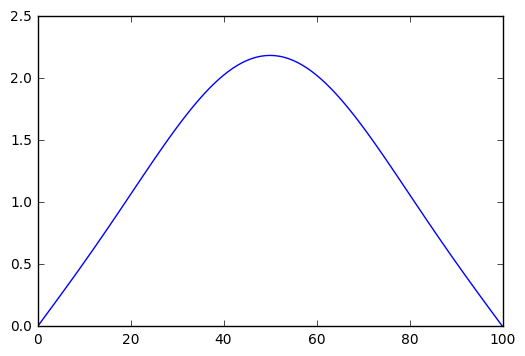

[ 0.          0.05079715  0.10164773  0.15260427  0.20371739  0.25503501
  0.30660134  0.35845613  0.41063379  0.46316264  0.51606418  0.56935244
  0.62303338  0.67710434  0.7315536   0.78636004  0.84149278  0.89691104
  0.95256399  1.00839078  1.06432054  1.12027261  1.17615679  1.2318737
  1.28731521  1.34236502  1.39689925  1.45078717  1.50389197  1.55607164
  1.60717985  1.65706699  1.70558111  1.75256907  1.79787756  1.84135428
  1.88284902  1.92221482  1.95930906  1.99399456  2.02614068  2.0556243
  2.08233081  2.10615503  2.12700205  2.14478799  2.15944068  2.17090025
  2.17911962  2.18406489  2.18571559  2.18406489  2.17911962  2.17090025
  2.15944068  2.14478799  2.12700205  2.10615503  2.08233081  2.0556243
  2.02614068  1.99399456  1.95930906  1.92221482  1.88284902  1.84135428
  1.79787756  1.75256907  1.70558111  1.65706699  1.60717985  1.55607164
  1.50389197  1.45078717  1.39689925  1.34236502  1.28731521  1.2318737
  1.17615679  1.12027261  1.06432054  1.00839078  0.952

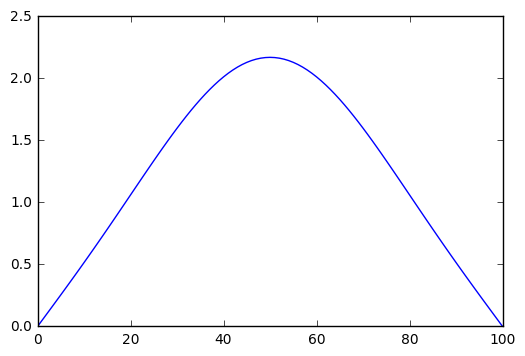

[ 0.          0.05076066  0.10157224  0.15248473  0.20354634  0.25480257
  0.30629535  0.35806223  0.41013556  0.46254175  0.51530057  0.5684245
  0.62191814  0.67577771  0.7299906   0.78453501  0.83937967  0.89448367
  0.9497963   1.00525709  1.06079585  1.11633287  1.17177915  1.22703678
  1.28199937  1.33655257  1.3905747   1.44393745  1.49650663  1.54814301
  1.59870322  1.64804071  1.69600673  1.7424514   1.78722474  1.83017778
  1.87116365  1.91003869  1.94666351  1.98090408  2.01263276  2.04172928
  2.06808172  2.09158736  2.11215354  2.12969836  2.14415137  2.15545413
  2.16356068  2.16843792  2.17006589  2.16843792  2.16356068  2.15545413
  2.14415137  2.12969836  2.11215354  2.09158736  2.06808172  2.04172928
  2.01263276  1.98090408  1.94666351  1.91003869  1.87116365  1.83017778
  1.78722474  1.7424514   1.69600673  1.64804071  1.59870322  1.54814301
  1.49650663  1.44393745  1.3905747   1.33655257  1.28199937  1.22703678
  1.17177915  1.11633287  1.06079585  1.00525709  0.

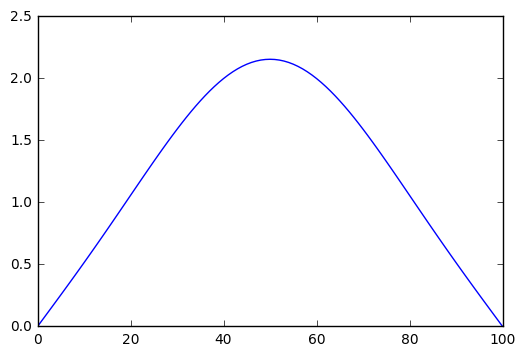

[ 0.          0.05071875  0.10148596  0.15234919  0.20335426  0.25454433
  0.30595911  0.35763401  0.40959939  0.4618798   0.51449332  0.56745092
  0.6207559   0.67440338  0.7283799   0.78266301  0.83722109  0.89201307
  0.94698839  1.00208697  1.05723931  1.11236659  1.16738102  1.22218613
  1.27667722  1.33074186  1.38426054  1.4371073   1.4891505   1.54025364
  1.59027621  1.63907469  1.68650341  1.73241569  1.77666477  1.81910494
  1.85959259  1.89798725  1.93415268  1.96795791  1.99927821  2.02799611
  2.05400228  2.07719641  2.09748801  2.1147971   2.12905491  2.14020438
  2.14820065  2.15301141  2.15461716  2.15301141  2.14820065  2.14020438
  2.12905491  2.1147971   2.09748801  2.07719641  2.05400228  2.02799611
  1.99927821  1.96795791  1.93415268  1.89798725  1.85959259  1.81910494
  1.77666477  1.73241569  1.68650341  1.63907469  1.59027621  1.54025364
  1.4891505   1.4371073   1.38426054  1.33074186  1.27667722  1.22218613
  1.16738102  1.11236659  1.05723931  1.00208697  0

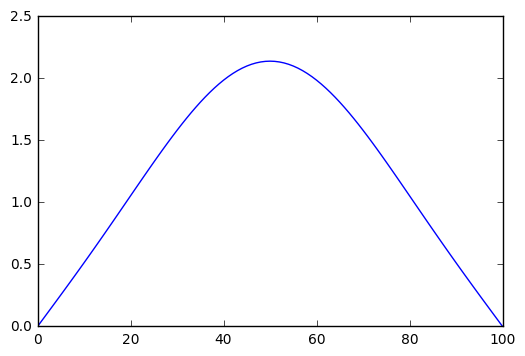

[ 0.          0.05067158  0.10138923  0.15219815  0.2031418   0.25426111
  0.30559359  0.35717259  0.40902652  0.46117813  0.51364386  0.56643323
  0.61954827  0.67298303  0.72672323  0.78074581  0.83501879  0.88950098
  0.94414198  0.9988821   1.05365249  1.10837525  1.16296376  1.21732297
  1.27134982  1.3249338   1.37795747  1.4302972   1.48182383  1.53240352
  1.58189858  1.6301684   1.67707035  1.72246085  1.76619628  1.80813412
  1.84813389  1.88605826  1.92177406  1.95515327  1.98607403  2.01442155
  2.04008904  2.06297852  2.0830016   2.10008021  2.11414717  2.12514678
  2.13303524  2.137781    2.13936504  2.137781    2.13303524  2.12514678
  2.11414717  2.10008021  2.0830016   2.06297852  2.04008904  2.01442155
  1.98607403  1.95515327  1.92177406  1.88605826  1.84813389  1.80813412
  1.76619628  1.72246085  1.67707035  1.6301684   1.58189858  1.53240352
  1.48182383  1.4302972   1.37795747  1.3249338   1.27134982  1.21732297
  1.16296376  1.10837525  1.05365249  0.9988821   0

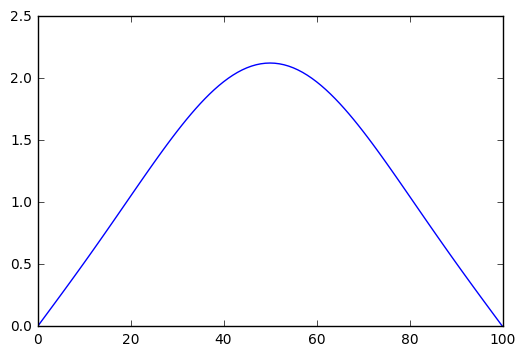

[ 0.          0.05061933  0.10128239  0.15203208  0.20290961  0.25395369
  0.30519972  0.35667903  0.40841815  0.46043806  0.51275363  0.56537295
  0.61829683  0.67151831  0.72502227  0.77878511  0.83277448  0.88694912
  0.94125874  0.99564408  1.05003692  1.10436029  1.1585287   1.21244848
  1.26601821  1.31912922  1.37166615  1.42350759  1.47452684  1.52459264
  1.57357006  1.62132132  1.66770676  1.71258581  1.75581793  1.79726367
  1.83678564  1.87424956  1.90952521  1.94248748  1.97301727  2.00100242
  2.0263386   2.0489301   2.06869058  2.08554379  2.09942413  2.11027721
  2.11806026  2.12274248  2.12430529  2.12274248  2.11806026  2.11027721
  2.09942413  2.08554379  2.06869058  2.0489301   2.0263386   2.00100242
  1.97301727  1.94248748  1.90952521  1.87424956  1.83678564  1.79726367
  1.75581793  1.71258581  1.66770676  1.62132132  1.57357006  1.52459264
  1.47452684  1.42350759  1.37166615  1.31912922  1.26601821  1.21244848
  1.1585287   1.10436029  1.05003692  0.99564408  0

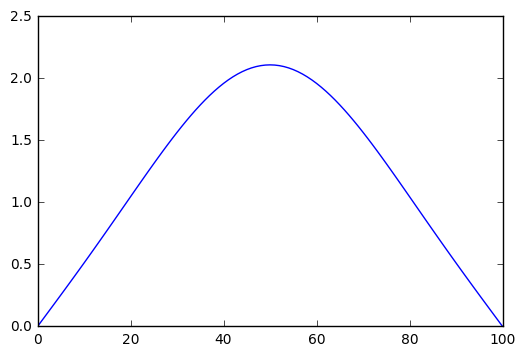

[ 0.          0.05056214  0.10116576  0.15185148  0.20265833  0.25362286
  0.30477843  0.3561544   0.40777545  0.45966088  0.51182401  0.56427155
  0.61700313  0.67001079  0.72327866  0.77678256  0.83048982  0.8843591
  0.93834028  0.99237446  1.0463941   1.10032309  1.15407709  1.2075638
  1.26068337  1.31332896  1.36538719  1.4167389   1.46725973  1.51682098
  1.56529037  1.61253292  1.65841185  1.70278951  1.74552838  1.78649201
  1.82554599  1.86255901  1.89740375  1.92995791  1.96010507  1.98773565
  2.01274768  2.03504768  2.0545513   2.07118406  2.08488189  2.09559168
  2.10327165  2.10789173  2.10943378  2.10789173  2.10327165  2.09559168
  2.08488189  2.07118406  2.0545513   2.03504768  2.01274768  1.98773565
  1.96010507  1.92995791  1.89740375  1.86255901  1.82554599  1.78649201
  1.74552838  1.70278951  1.65841185  1.61253292  1.56529037  1.51682098
  1.46725973  1.4167389   1.36538719  1.31332896  1.26068337  1.2075638
  1.15407709  1.10032309  1.0463941   0.99237446  0.93

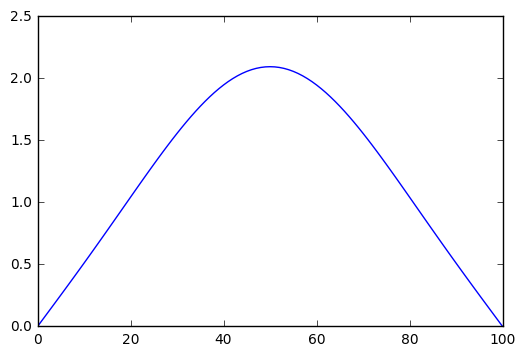

[ 0.          0.05050019  0.10103964  0.15165681  0.20238856  0.25326938
  0.3043306   0.3555997   0.40709956  0.45884784  0.51085634  0.56313045
  0.61566865  0.66846204  0.72149397  0.77473976  0.82816643  0.88173254
  0.93538814  0.98907475  1.04272544  1.096265    1.14961018  1.20267002
  1.25534626  1.30753378  1.35912121  1.40999152  1.4600227   1.50908849
  1.55705924  1.60380268  1.64918483  1.69307093  1.73532635  1.77581757
  1.81441311  1.85098454  1.88540736  1.91756199  1.94733464  1.97461821
  1.99931308  2.02132787  2.04058021  2.05699733  2.07051666  2.0810863
  2.08866546  2.09322477  2.09474652  2.09322477  2.08866546  2.0810863
  2.07051666  2.05699733  2.04058021  2.02132787  1.99931308  1.97461821
  1.94733464  1.91756199  1.88540736  1.85098454  1.81441311  1.77581757
  1.73532635  1.69307093  1.64918483  1.60380268  1.55705924  1.50908849
  1.4600227   1.40999152  1.35912121  1.30753378  1.25534626  1.20267002
  1.14961018  1.096265    1.04272544  0.98907475  0.9

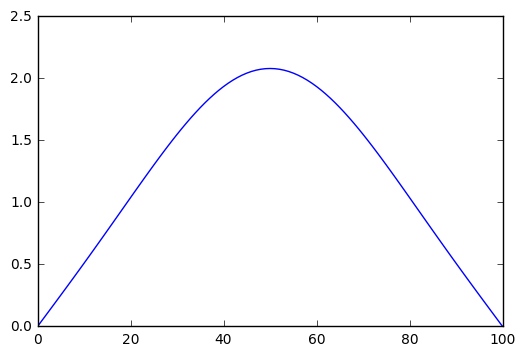

[ 0.          0.05043361  0.10090434  0.15144851  0.2021009   0.25289397
  0.30385711  0.35501593  0.40639159  0.45800014  0.50985192  0.56195104
  0.61429486  0.66687356  0.71966977  0.77265829  0.82580586  0.87907098
  0.93240385  0.98574641  1.03903234  1.09218731  1.14512915  1.19776821
  1.25000777  1.30174444  1.35286877  1.40326584  1.4528159   1.50139512
  1.54887639  1.59513007  1.64002495  1.68342903  1.72521055  1.76523883
  1.80338523  1.83952412  1.87353375  1.90529721  1.93470326  1.96164719
  1.98603166  2.00776739  2.02677388  2.04298003  2.05632473  2.06675728
  2.07423784  2.07873771  2.0802396   2.07873771  2.07423784  2.06675728
  2.05632473  2.04298003  2.02677388  2.00776739  1.98603166  1.96164719
  1.93470326  1.90529721  1.87353375  1.83952412  1.80338523  1.76523883
  1.72521055  1.68342903  1.64002495  1.59513007  1.54887639  1.50139512
  1.4528159   1.40326584  1.35286877  1.30174444  1.25000777  1.19776821
  1.14512915  1.09218731  1.03903234  0.98574641  0

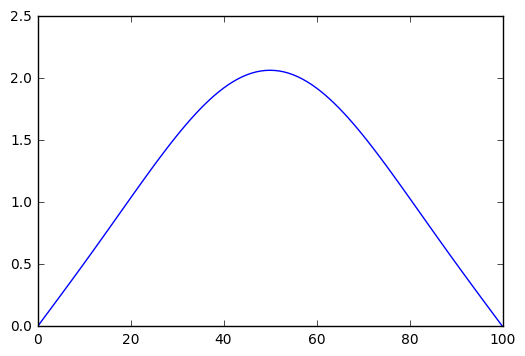

[ 0.          0.05036257  0.10076016  0.15122703  0.20179595  0.25249737
  0.30335881  0.35440407  0.40565262  0.45711897  0.50881204  0.56073468
  0.61288317  0.66524681  0.71780753  0.77053965  0.82340963  0.87637591
  0.92938888  0.98239084  1.03531614  1.08809126  1.14063513  1.19285939
  1.24466878  1.29596165  1.34663041  1.3965622   1.44563948  1.49374081
  1.54074151  1.58651457  1.63093142  1.67386282  1.71517974  1.75475429
  1.7924606   1.82817577  1.86178073  1.89316114  1.92220826  1.94881973
  1.9729004   1.99436302  2.01312893  2.02912867  2.04230252  2.05260095
  2.05998504  2.06442677  2.06590922  2.06442677  2.05998504  2.05260095
  2.04230252  2.02912867  2.01312893  1.99436302  1.9729004   1.94881973
  1.92220826  1.89316114  1.86178073  1.82817577  1.7924606   1.75475429
  1.71517974  1.67386282  1.63093142  1.58651457  1.54074151  1.49374081
  1.44563948  1.3965622   1.34663041  1.29596165  1.24466878  1.19285939
  1.14063513  1.08809126  1.03531614  0.98239084  0

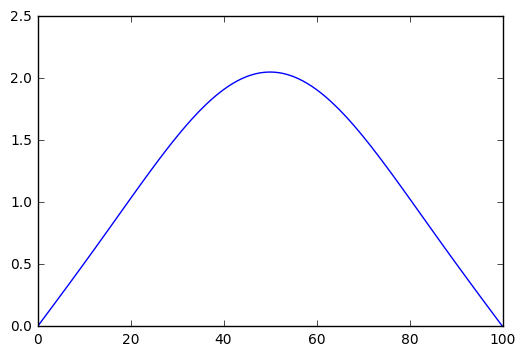

[ 0.          0.05028719  0.10060738  0.15099281  0.20147425  0.25208027
  0.30283651  0.35376505  0.40488371  0.45620548  0.50773792  0.55948267
  0.61143495  0.66358322  0.71590873  0.76838533  0.82097921  0.87364879
  0.92634463  0.97900943  1.03157813  1.08397808  1.13612924  1.18794452
  1.23933015  1.29018609  1.34040664  1.38988093  1.43849359  1.48612546
  1.53265433  1.57795567  1.62190352  1.6643713   1.70523268  1.74436248
  1.78163752  1.81693755  1.85014612  1.8811514   1.90984706  1.93613304
  1.95991632  1.98111163  1.9996421   2.01543985  2.02844651  2.03861371
  2.04590342  2.05028826  2.05175172  2.05028826  2.04590342  2.03861371
  2.02844651  2.01543985  1.9996421   1.98111163  1.95991632  1.93613304
  1.90984706  1.8811514   1.85014612  1.81693755  1.78163752  1.74436248
  1.70523268  1.6643713   1.62190352  1.57795567  1.53265433  1.48612546
  1.43849359  1.38988093  1.34040664  1.29018609  1.23933015  1.18794452
  1.13612924  1.08397808  1.03157813  0.97900943  0

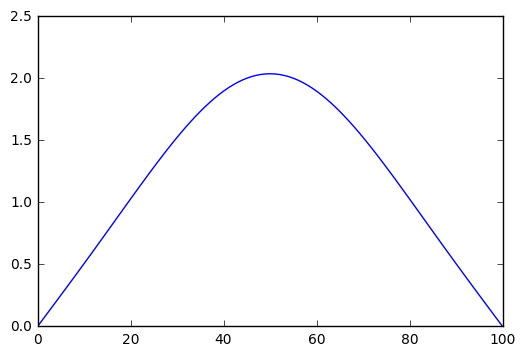

[ 0.          0.05020764  0.10044629  0.15074626  0.20113637  0.25164334
  0.30229103  0.35309979  0.40408588  0.45526079  0.50663078  0.55819629
  0.60995155  0.66188416  0.71397476  0.76619673  0.81851603  0.87089104
  0.92327249  0.97560348  1.02781957  1.07984892  1.13161254  1.18302457
  1.23399266  1.28441843  1.33419796  1.38322234  1.43137833  1.47854901
  1.52461453  1.56945283  1.61294048  1.65495349  1.69536817  1.73406195
  1.77091431  1.80580757  1.8386278   1.86926566  1.89761713  1.92358441
  1.94707655  1.96801019  1.98631021  2.00191026  2.01475331  2.0247921
  2.03198945  2.03631863  2.03776348  2.03631863  2.03198945  2.0247921
  2.01475331  2.00191026  1.98631021  1.96801019  1.94707655  1.92358441
  1.89761713  1.86926566  1.8386278   1.80580757  1.77091431  1.73406195
  1.69536817  1.65495349  1.61294048  1.56945283  1.52461453  1.47854901
  1.43137833  1.38322234  1.33419796  1.28441843  1.23399266  1.18302457
  1.13161254  1.07984892  1.02781957  0.97560348  0.9

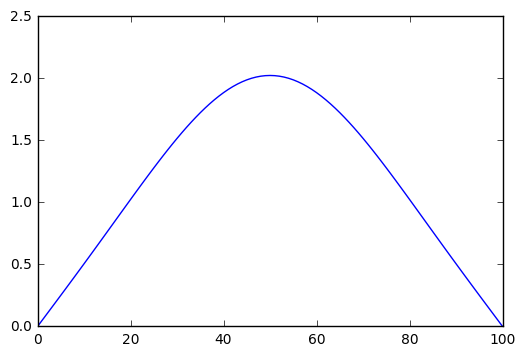

[ 0.          0.05012404  0.10027717  0.15048778  0.20078285  0.25118727
  0.30172314  0.3524092   0.40326012  0.454286    0.50549178  0.55687678
  0.60843426  0.660151    0.71200701  0.76397526  0.81602148  0.86810402
  0.92017378  0.97217428  1.02404167  1.07570492  1.12708605  1.17810043
  1.22865711  1.27865929  1.32800483  1.37658672  1.42429381  1.47101136
  1.51662182  1.56100555  1.60404158  1.64560845  1.68558502  1.72385132
  1.76028934  1.79478397  1.82722373  1.85750165  1.88551603  1.9111712
  1.93437826  1.95505573  1.97313015  1.98853669  2.00121961  2.01113271
  2.01823968  2.02251437  2.02394103  2.02251437  2.01823968  2.01113271
  2.00121961  1.98853669  1.97313015  1.95505573  1.93437826  1.9111712
  1.88551603  1.85750165  1.82722373  1.79478397  1.76028934  1.72385132
  1.68558502  1.64560845  1.60404158  1.56100555  1.51662182  1.47101136
  1.42429381  1.37658672  1.32800483  1.27865929  1.22865711  1.17810043
  1.12708605  1.07570492  1.02404167  0.97217428  0.9

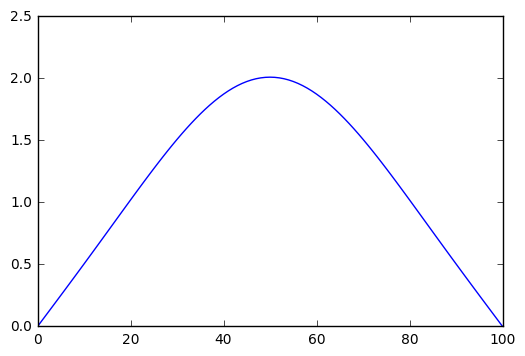

[ 0.          0.05003653  0.10010028  0.15021779  0.20041421  0.25071268
  0.30113362  0.35169413  0.40240741  0.45328216  0.50432207  0.55552536
  0.60688434  0.65838502  0.71000681  0.76172227  0.8134969   0.86528905
  0.91704981  0.96872308  1.0202456   1.07154716  1.12255077  1.17317298
  1.22332423  1.27290928  1.32182768  1.36997435  1.41724012  1.4635124
  1.5086759   1.55261331  1.59520608  1.63633522  1.67588208  1.71372918
  1.74976103  1.78386495  1.81593187  1.84585716  1.87354133  1.89889083
  1.92181873  1.94224535  1.9600989   1.975316    1.98784216  1.99763224
  2.00465074  2.00887211  2.01028096  2.00887211  2.00465074  1.99763224
  1.98784216  1.975316    1.9600989   1.94224535  1.92181873  1.89889083
  1.87354133  1.84585716  1.81593187  1.78386495  1.74976103  1.71372918
  1.67588208  1.63633522  1.59520608  1.55261331  1.5086759   1.4635124
  1.41724012  1.36997435  1.32182768  1.27290928  1.22332423  1.17317298
  1.12255077  1.07154716  1.0202456   0.96872308  0.9

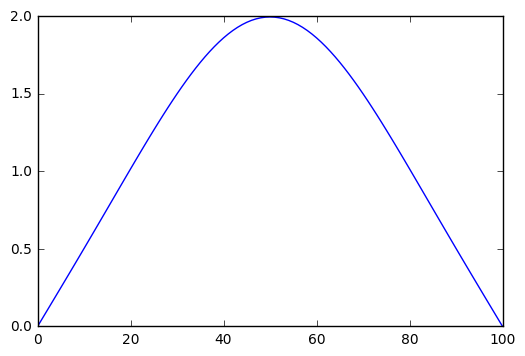

[ 0.          0.04994524  0.09991588  0.14993666  0.20003097  0.25022022
  0.3005232   0.35095544  0.40152869  0.4522503   0.50312276  0.55414321
  0.60530303  0.6565875   0.70797545  0.75943905  0.81094359  0.86244742
  0.91390182  0.96525107  1.01643251  1.06737671  1.11800765  1.16824306
  1.21799474  1.26716895  1.31566695  1.36338547  1.41021732  1.45605202
  1.50077645  1.5442756   1.58643328  1.62713288  1.6662582   1.70369419
  1.7393278   1.77304874  1.80475027  1.83433003  1.8616907   1.88674079
  1.90939527  1.92957625  1.94721353  1.96224514  1.97461784  1.98428748
  1.99121937  1.99538855  1.99677996  1.99538855  1.99121937  1.98428748
  1.97461784  1.96224514  1.94721353  1.92957625  1.90939527  1.88674079
  1.8616907   1.83433003  1.80475027  1.77304874  1.7393278   1.70369419
  1.6662582   1.62713288  1.58643328  1.5442756   1.50077645  1.45605202
  1.41021732  1.36338547  1.31566695  1.26716895  1.21799474  1.16824306
  1.11800765  1.06737671  1.01643251  0.96525107  0

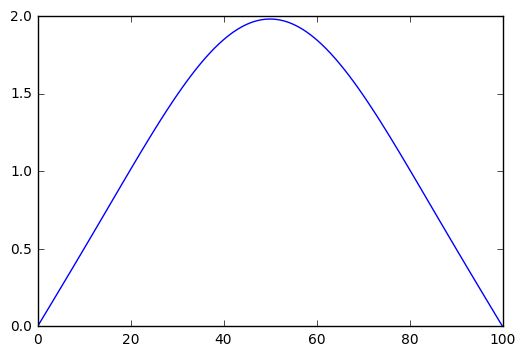

[ 0.          0.0498503   0.09972423  0.14964477  0.19963361  0.2497105
  0.2998926   0.35019396  0.40062489  0.45119144  0.50189492  0.55273145
  0.60369152  0.65475967  0.70591419  0.75712687  0.80836283  0.85958038
  0.91073103  0.96175942  1.01260349  1.06319457  1.11345762  1.1633115
  1.21266933  1.26143887  1.30952303  1.35682033  1.4032255   1.4486301
  1.49292317  1.53599192  1.57772246  1.61800052  1.65671226  1.69374504
  1.72898813  1.76233361  1.79367701  1.82291816  1.84996186  1.87471863
  1.89710529  1.91704569  1.93447117  1.94932115  1.96154358  1.9710953
  1.9779424   1.98206048  1.98343481  1.98206048  1.9779424   1.9710953
  1.96154358  1.94932115  1.93447117  1.91704569  1.89710529  1.87471863
  1.84996186  1.82291816  1.79367701  1.76233361  1.72898813  1.69374504
  1.65671226  1.61800052  1.57772246  1.53599192  1.49292317  1.4486301
  1.4032255   1.35682033  1.30952303  1.26143887  1.21266933  1.1633115
  1.11345762  1.06319457  1.01260349  0.96175942  0.910731

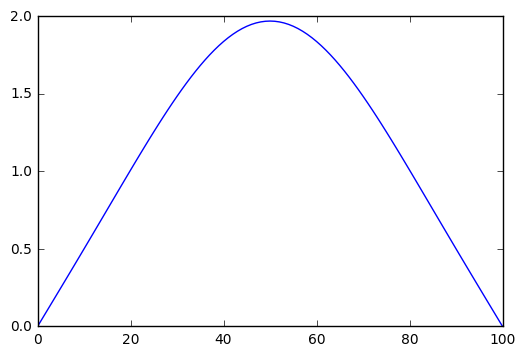

[ 0.          0.04975182  0.09952556  0.1493425   0.19922264  0.2491841
  0.29924253  0.34941048  0.39969688  0.45010654  0.50063961  0.55129121
  0.60205097  0.65290273  0.70382426  0.75478698  0.80575583  0.85668915
  0.9075386   0.95824926  1.0087596   1.05900174  1.10890156  1.15837906
  1.20734866  1.25571957  1.3033963   1.35027914  1.3962647   1.44124652
  1.48511575  1.52776177  1.56907292  1.60893723  1.64724318  1.68388041
  1.71874053  1.75171787  1.7827102   1.81161948  1.83835258  1.86282195
  1.88494625  1.90465098  1.92186902  1.93654112  1.9486164   1.95805264
  1.96481672  1.96888476  1.97024238  1.96888476  1.96481672  1.95805264
  1.9486164   1.93654112  1.92186902  1.90465098  1.88494625  1.86282195
  1.83835258  1.81161948  1.7827102   1.75171787  1.71874053  1.68388041
  1.64724318  1.60893723  1.56907292  1.52776177  1.48511575  1.44124652
  1.3962647   1.35027914  1.3033963   1.25571957  1.20734866  1.15837906
  1.10890156  1.05900174  1.0087596   0.95824926  0.

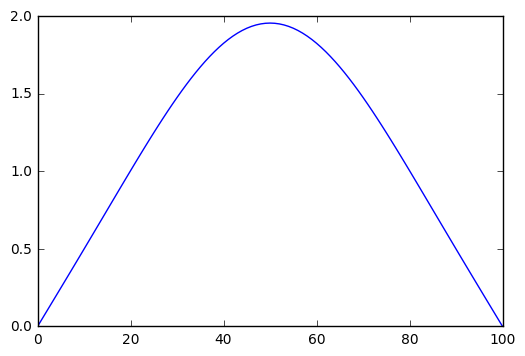

[ 0.          0.04964994  0.09932013  0.14903019  0.19879851  0.24864163
  0.29857368  0.34860579  0.39874556  0.44899656  0.49935785  0.54982356
  0.6003825   0.65101785  0.70170684  0.75242056  0.80312379  0.85377488
  0.90432569  0.95472167  1.00490188  1.05479916  1.10434034  1.15344652
  1.20203336  1.25001154  1.29728712  1.34376211  1.38933495  1.43390115
  1.47735388  1.51958465  1.56048399  1.59994215  1.63784986  1.67409904
  1.70858353  1.74119987  1.77184801  1.80043199  1.82686068  1.85104843
  1.87291567  1.89238953  1.90940437  1.92390225  1.93583339  1.94515655
  1.95183932  1.95585836  1.95719961  1.95585836  1.95183932  1.94515655
  1.93583339  1.92390225  1.90940437  1.89238953  1.87291567  1.85104843
  1.82686068  1.80043199  1.77184801  1.74119987  1.70858353  1.67409904
  1.63784986  1.59994215  1.56048399  1.51958465  1.47735388  1.43390115
  1.38933495  1.34376211  1.29728712  1.25001154  1.20203336  1.15344652
  1.10434034  1.05479916  1.00490188  0.95472167  0

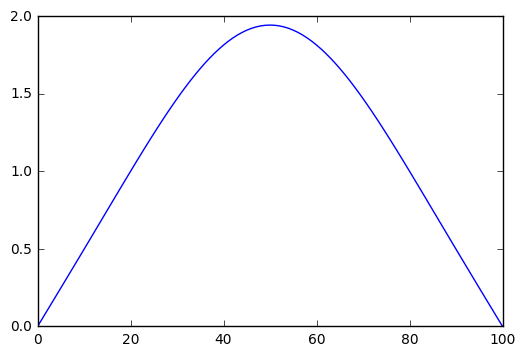

[ 0.          0.04954478  0.09910817  0.1487082   0.19836168  0.24808363
  0.2978867   0.34778064  0.39777175  0.44786242  0.49805062  0.54832955
  0.59868722  0.64910615  0.69956308  0.75002878  0.80046787  0.85083872
  0.9010934   0.95117772  1.00103131  1.05058775  1.09977478  1.14851458
  1.19672405  1.24431527  1.29119584  1.33726943  1.3824363   1.42659385
  1.46963724  1.51146007  1.55195497  1.5910144   1.62853126  1.66439968
  1.6985157   1.73077801  1.76108865  1.78935373  1.81548405  1.8393958
  1.86101115  1.88025881  1.89707456  1.91140177  1.92319174  1.93240413
  1.93900726  1.94297831  1.94430353  1.94297831  1.93900726  1.93240413
  1.92319174  1.91140177  1.89707456  1.88025881  1.86101115  1.8393958
  1.81548405  1.78935373  1.76108865  1.73077801  1.6985157   1.66439968
  1.62853126  1.5910144   1.55195497  1.51146007  1.46963724  1.42659385
  1.3824363   1.33726943  1.29119584  1.24431527  1.19672405  1.14851458
  1.09977478  1.05058775  1.00103131  0.95117772  0.9

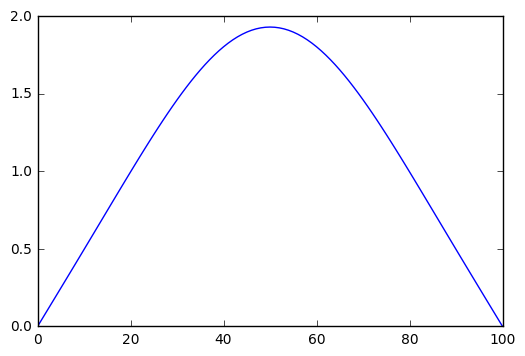

[ 0.          0.04943643  0.0988899   0.14837687  0.19791261  0.24751066
  0.29718225  0.34693578  0.3967763   0.44670502  0.4967189   0.54681021
  0.59696619  0.64716873  0.6973941   0.74761277  0.79778919  0.84788177
  0.89784278  0.94761842  0.99714886  1.04636841  1.09520569  1.14358395
  1.19142132  1.23863121  1.28512277  1.33080128  1.37556876  1.41932447
  1.46196553  1.50338753  1.54348521  1.58215313  1.61928635  1.65478112
  1.68853565  1.7204507   1.75043039  1.77838278  1.8042206   1.82786184
  1.84923032  1.86825632  1.88487703  1.89903702  1.91068868  1.91979257
  1.92631769  1.93024173  1.93155124  1.93024173  1.92631769  1.91979257
  1.91068868  1.89903702  1.88487703  1.86825632  1.84923032  1.82786184
  1.8042206   1.77838278  1.75043039  1.7204507   1.68853565  1.65478112
  1.61928635  1.58215313  1.54348521  1.50338753  1.46196553  1.41932447
  1.37556876  1.33080128  1.28512277  1.23863121  1.19142132  1.14358395
  1.09520569  1.04636841  0.99714886  0.94761842  0

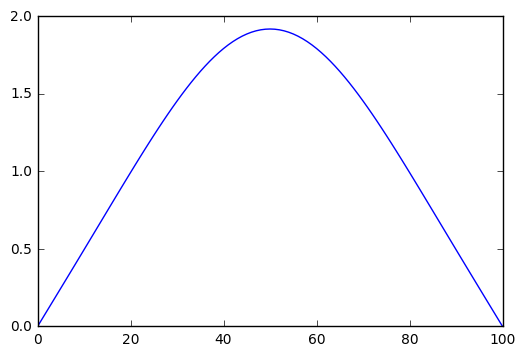

[ 0.          0.04932502  0.09866555  0.14803653  0.19745173  0.24692326
  0.29646096  0.34607193  0.39575999  0.44552523  0.49536361  0.54526652
  0.59522044  0.64520666  0.695201    0.74517361  0.79508883  0.8449051
  0.89457489  0.94404477  0.99325546  1.04214198  1.09063384  1.1386553
  1.18612571  1.23295981  1.27906822  1.32435782  1.36873235  1.41209288
  1.45433842  1.49536655  1.53507404  1.5733575   1.61011409  1.64524217
  1.67864199  1.7102164   1.73987149  1.76751728  1.79306834  1.81644439
  1.83757091  1.85637968  1.87280924  1.88680538  1.89832154  1.90731912
  1.91376781  1.9176458   1.91893993  1.9176458   1.91376781  1.90731912
  1.89832154  1.88680538  1.87280924  1.85637968  1.83757091  1.81644439
  1.79306834  1.76751728  1.73987149  1.7102164   1.67864199  1.64524217
  1.61011409  1.5733575   1.53507404  1.49536655  1.45433842  1.41209288
  1.36873235  1.32435782  1.27906822  1.23295981  1.18612571  1.1386553
  1.09063384  1.04214198  0.99325546  0.94404477  0.89

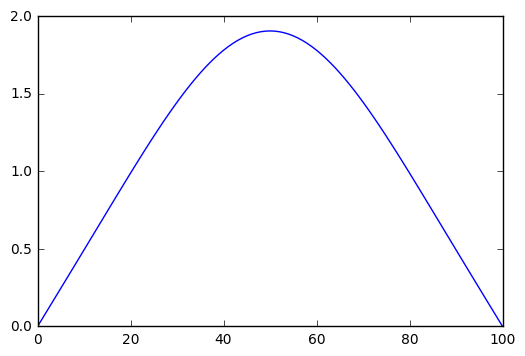

[ 0.          0.04921066  0.09843534  0.14768749  0.19697946  0.24632195
  0.29572345  0.34518979  0.3947236   0.44432391  0.49398568  0.54369945
  0.59345098  0.64322097  0.69298481  0.74271236  0.79236785  0.84190974
  0.89129072  0.94045773  0.98935201  1.0379093   1.08605996  1.13372929
  1.18083778  1.2273015   1.27303248  1.31793921  1.36192707  1.40489891
  1.44675561  1.48739666  1.52672081  1.5646267   1.60101351  1.63578165
  1.66883341  1.70007361  1.72941031  1.75675541  1.78202527  1.80514133
  1.82603067  1.84462651  1.86086874  1.87470432  1.88608769  1.89498111
  1.90135492  1.90518779  1.90646684  1.90518779  1.90135492  1.89498111
  1.88608769  1.87470432  1.86086874  1.84462651  1.82603067  1.80514133
  1.78202527  1.75675541  1.72941031  1.70007361  1.66883341  1.63578165
  1.60101351  1.5646267   1.52672081  1.48739666  1.44675561  1.40489891
  1.36192707  1.31793921  1.27303248  1.2273015   1.18083778  1.13372929
  1.08605996  1.0379093   0.98935201  0.94045773  0

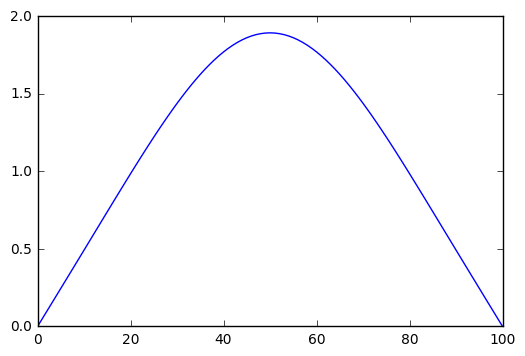

[ 0.          0.04909345  0.09819947  0.14733008  0.19649622  0.24570723
  0.2949703   0.34429003  0.3936679   0.44310188  0.49258599  0.54210994
  0.59165879  0.64121268  0.69074657  0.74023007  0.78962728  0.83889671
  0.88799125  0.93685822  0.98543939  1.03367117  1.08148479  1.12880654
  1.17555804  1.22165666  1.26701584  1.31154558  1.35515292  1.39774242
  1.43921678  1.47947738  1.51842489  1.55595991  1.59198363  1.62639843
  1.65910857  1.69002085  1.71904521  1.74609538  1.77108948  1.79395062
  1.81460742  1.83299454  1.84905315  1.86273136  1.8739846   1.88277593
  1.88907637  1.89286502  1.8941293   1.89286502  1.88907637  1.88277593
  1.8739846   1.86273136  1.84905315  1.83299454  1.81460742  1.79395062
  1.77108948  1.74609538  1.71904521  1.69002085  1.65910857  1.62639843
  1.59198363  1.55595991  1.51842489  1.47947738  1.43921678  1.39774242
  1.35515292  1.31154558  1.26701584  1.22165666  1.17555804  1.12880654
  1.08148479  1.03367117  0.98543939  0.93685822  0

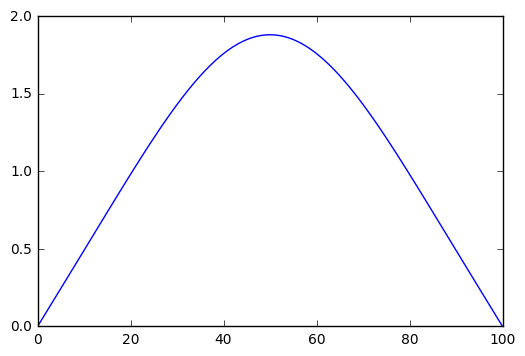

[ 0.          0.04897349  0.09795814  0.14696459  0.1960024   0.2450796
  0.29420211  0.34337332  0.39259362  0.44185995  0.4911654   0.54049889
  0.58984481  0.63918275  0.68848727  0.73772772  0.7868681   0.83586696
  0.88467742  0.93324714  0.98151842  1.02942836  1.07690901  1.12388764
  1.17028699  1.21602569  1.26101855  1.30517707  1.34840988  1.39062325
  1.43172163  1.47160823  1.51018563  1.54735634  1.58302347  1.61709137
  1.64946621  1.68005669  1.70877459  1.73553545  1.7602591   1.78287025
  1.80329904  1.82148153  1.83736014  1.85088409  1.86200977  1.87070106
  1.87692957  1.88067489  1.88192471  1.88067489  1.87692957  1.87070106
  1.86200977  1.85088409  1.83736014  1.82148153  1.80329904  1.78287025
  1.7602591   1.73553545  1.70877459  1.68005669  1.64946621  1.61709137
  1.58302347  1.54735634  1.51018563  1.47160823  1.43172163  1.39062325
  1.34840988  1.30517707  1.26101855  1.21602569  1.17028699  1.12388764
  1.07690901  1.02942836  0.98151842  0.93324714  0.

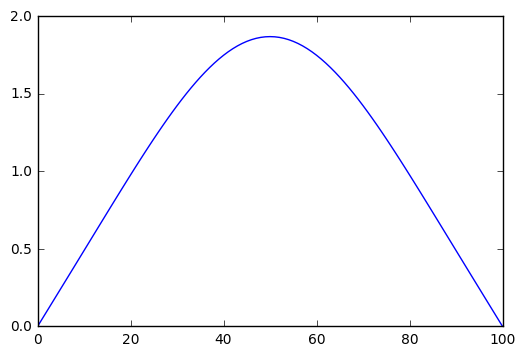

[ 0.          0.04885088  0.09771156  0.14659132  0.1954984   0.24443953
  0.29341943  0.34244031  0.39150148  0.44059889  0.48972475  0.5388672
  0.58800997  0.63713214  0.68620788  0.73520629  0.78409128  0.83282146
  0.88135014  0.92962536  0.97758993  1.02518162  1.0723333   1.11897318
  1.16502512  1.21040895  1.25504086  1.29883379  1.34169794  1.38354122
  1.42426983  1.46378877  1.50200243  1.53881521  1.57413212  1.60785938
  1.63990507  1.67017971  1.69859691  1.72507393  1.74953228  1.77189825
  1.79210346  1.81008529  1.82578742  1.83916014  1.85016079  1.85875401
  1.86491204  1.86861488  1.86985051  1.86861488  1.86491204  1.85875401
  1.85016079  1.83916014  1.82578742  1.81008529  1.79210346  1.77189825
  1.74953228  1.72507393  1.69859691  1.67017971  1.63990507  1.60785938
  1.57413212  1.53881521  1.50200243  1.46378877  1.42426983  1.38354122
  1.34169794  1.29883379  1.25504086  1.21040895  1.16502512  1.11897318
  1.0723333   1.02518162  0.97758993  0.92962536  0.

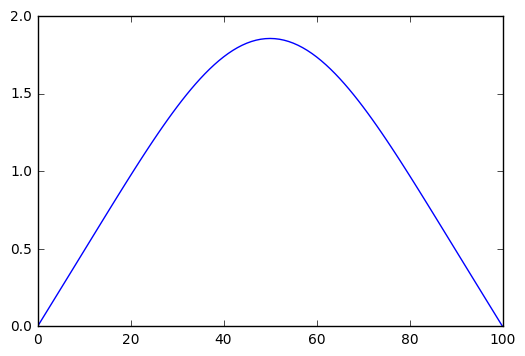

[ 0.          0.04872573  0.09745993  0.14621056  0.19498459  0.2437875
  0.29262281  0.34149162  0.39039217  0.43931946  0.48826485  0.53721571
  0.58615516  0.63506177  0.68390933  0.73266672  0.78129775  0.82976111
  0.8780103   0.92599372  0.97365471  1.02093168  1.06775829  1.11406371
  1.15977287  1.2048068   1.249083    1.29251585  1.33501707  1.37649619
  1.41686109  1.45601851  1.49387466  1.53033575  1.56530864  1.59870139
  1.63042391  1.66038854  1.68851064  1.71470916  1.73890725  1.76103273
  1.78101864  1.79880371  1.81433279  1.82755724  1.8384353   1.84693238
  1.8530213   1.85668252  1.85790423  1.85668252  1.8530213   1.84693238
  1.8384353   1.82755724  1.81433279  1.79880371  1.78101864  1.76103273
  1.73890725  1.71470916  1.68851064  1.66038854  1.63042391  1.59870139
  1.56530864  1.53033575  1.49387466  1.45601851  1.41686109  1.37649619
  1.33501707  1.29251585  1.249083    1.2048068   1.15977287  1.11406371
  1.06775829  1.02093168  0.97365471  0.92599372  0.

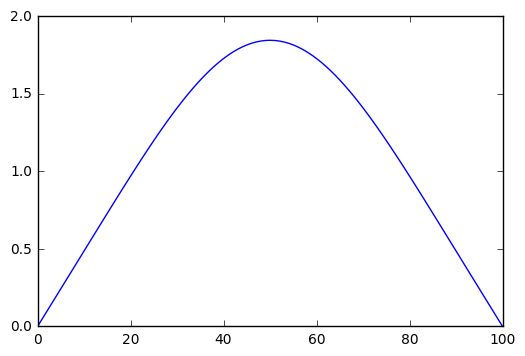

[ 0.          0.04859812  0.09720342  0.14582259  0.19446135  0.24312396
  0.2918128   0.34052786  0.38926637  0.43802241  0.48678649  0.53554527
  0.58428126  0.63297253  0.68159253  0.73010992  0.77848842  0.82668679
  0.87465875  0.92235305  0.96971352  1.01667922  1.06318461  1.10915977
  1.15453068  1.19921956  1.24314519  1.28622334  1.32836724  1.36948798
  1.40949509  1.44829702  1.48580173  1.52191721  1.55655213  1.58961634
  1.62102155  1.65068184  1.67851429  1.70443952  1.72838225  1.7502718
  1.77004261  1.7876347   1.80299408  1.81607314  1.82683101  1.83523382
  1.84125499  1.84487538  1.84608347  1.84487538  1.84125499  1.83523382
  1.82683101  1.81607314  1.80299408  1.7876347   1.77004261  1.7502718
  1.72838225  1.70443952  1.67851429  1.65068184  1.62102155  1.58961634
  1.55655213  1.52191721  1.48580173  1.44829702  1.40949509  1.36948798
  1.32836724  1.28622334  1.24314519  1.19921956  1.15453068  1.10915977
  1.06318461  1.01667922  0.96971352  0.92235305  0.8

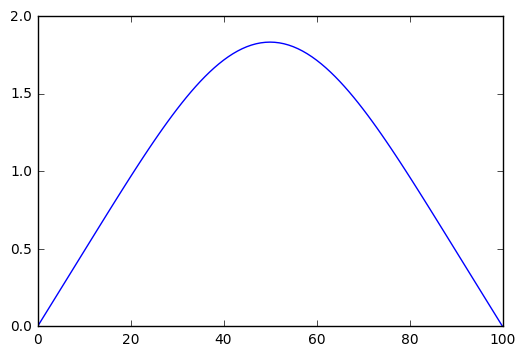

[ 0.          0.04846815  0.09694223  0.14542768  0.19392903  0.24244936
  0.2909899   0.33954962  0.38812474  0.43670844  0.48529044  0.53385669
  0.5823891   0.63086529  0.67925837  0.72753677  0.77566417  0.82359938
  0.87129633  0.91870412  0.96576709  1.01242493  1.05861286  1.10426188
  1.14929899  1.19364756  1.23722764  1.27995636  1.3217484   1.36251641
  1.40217152  1.44062384  1.47778304  1.51355886  1.5478617   1.58060321
  1.6116968   1.64105828  1.66860642  1.69426343  1.71795558  1.73961366
  1.75917346  1.77657626  1.79176919  1.80470566  1.81534565  1.82365603
  1.82961077  1.83319114  1.83438586  1.83319114  1.82961077  1.82365603
  1.81534565  1.80470566  1.79176919  1.77657626  1.75917346  1.73961366
  1.71795558  1.69426343  1.66860642  1.64105828  1.6116968   1.58060321
  1.5478617   1.51355886  1.47778304  1.44062384  1.40217152  1.36251641
  1.3217484   1.27995636  1.23722764  1.19364756  1.14929899  1.10426188
  1.05861286  1.01242493  0.96576709  0.91870412  0

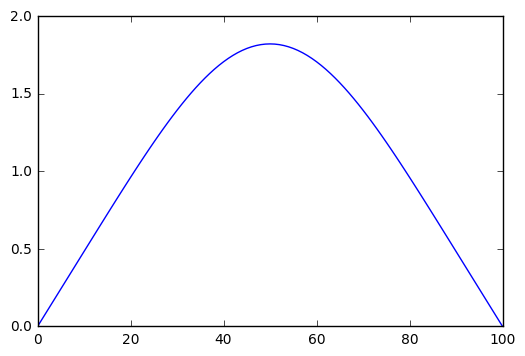

[ 0.          0.0483359   0.09667652  0.14502611  0.19338798  0.24176411
  0.29015463  0.33855747  0.38696792  0.43537827  0.48377745  0.53215075
  0.58047952  0.6287409   0.6769077   0.72494815  0.77282585  0.8204997
  0.86792383  0.91504771  0.96181615  1.00816946  1.05404363  1.09937053
  1.1440782   1.18809111  1.23133054  1.27371499  1.31516053  1.35558133
  1.39489007  1.43299852  1.469818    1.50525995  1.5392365   1.57166097
  1.60244851  1.63151659  1.6587856   1.68417934  1.70762558  1.72905652
  1.7484093   1.76562639  1.78065606  1.79345267  1.80397706  1.81219679
  1.81808638  1.8216275   1.82280911  1.8216275   1.81808638  1.81219679
  1.80397706  1.79345267  1.78065606  1.76562639  1.7484093   1.72905652
  1.70762558  1.68417934  1.6587856   1.63151659  1.60244851  1.57166097
  1.5392365   1.50525995  1.469818    1.43299852  1.39489007  1.35558133
  1.31516053  1.27371499  1.23133054  1.18809111  1.1440782   1.09937053
  1.05404363  1.00816946  0.96181615  0.91504771  0.

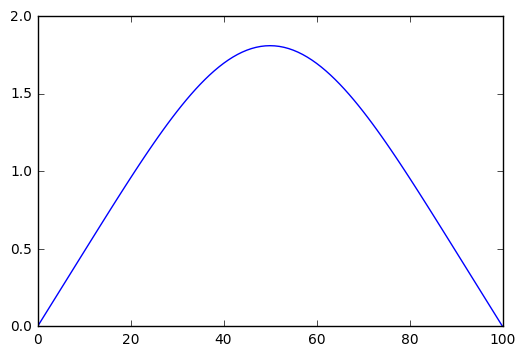

[ 0.          0.04820147  0.09640648  0.14461811  0.19283854  0.24106864
  0.28930748  0.33755199  0.38579653  0.43403255  0.48224824  0.53042823
  0.57855329  0.62660018  0.67454135  0.72234487  0.76997429  0.81738856
  0.86454205  0.91138455  0.95786137  1.00391343  1.04947746  1.09448621
  1.13886869  1.18255049  1.22545409  1.26749929  1.30860357  1.34868254
  1.38765045  1.42542064  1.46190605  1.49701979  1.53067565  1.56278864
  1.59327556  1.62205551  1.64905046  1.67418575  1.69739062  1.71859866
  1.73774829  1.75478319  1.76965269  1.78231211  1.79272311  1.80085392
  1.80667961  1.81018224  1.81135099  1.81018224  1.80667961  1.80085392
  1.79272311  1.78231211  1.76965269  1.75478319  1.73774829  1.71859866
  1.69739062  1.67418575  1.64905046  1.62205551  1.59327556  1.56278864
  1.53067565  1.49701979  1.46190605  1.42542064  1.38765045  1.34868254
  1.30860357  1.26749929  1.22545409  1.18255049  1.13886869  1.09448621
  1.04947746  1.00391343  0.95786137  0.91138455  0

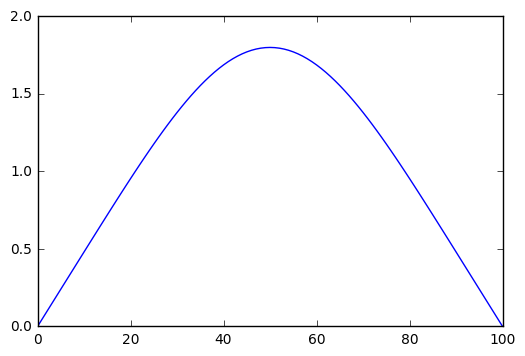

[ 0.          0.04806494  0.09613228  0.14420395  0.19228105  0.24036335
  0.28844891  0.3365337   0.38461118  0.43267197  0.48070353  0.52868985
  0.57661121  0.62444391  0.67216013  0.71972775  0.76711028  0.81426674
  0.86115172  0.90771536  0.95390342  0.99965745  1.0449149   1.08960937
  1.13367084  1.17702598  1.21959846  1.26130933  1.30207746  1.34181988
  1.38045235  1.41788974  1.45404661  1.48883767  1.52217834  1.55398526
  1.58417685  1.6126738   1.63939963  1.66428118  1.68724911  1.70823837
  1.72718865  1.74404477  1.75875711  1.77128194  1.7815817   1.78962529
  1.79538831  1.79885318  1.80000931  1.79885318  1.79538831  1.78962529
  1.7815817   1.77128194  1.75875711  1.74404477  1.72718865  1.70823837
  1.68724911  1.66428118  1.63939963  1.6126738   1.58417685  1.55398526
  1.52217834  1.48883767  1.45404661  1.41788974  1.38045235  1.34181988
  1.30207746  1.26130933  1.21959846  1.17702598  1.13367084  1.08960937
  1.0449149   0.99965745  0.95390342  0.90771536  0

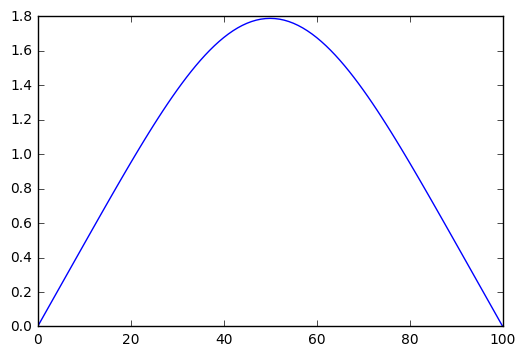

[ 0.          0.04792639  0.09585407  0.14378387  0.19171582  0.23964864
  0.28757941  0.33550314  0.38341244  0.43129714  0.47914398  0.52693636
  0.57465402  0.62227288  0.66976483  0.71709758  0.7642346   0.811135
  0.85775359  0.90404082  0.94994295  0.99540211  1.04035647  1.08474046
  1.12848501  1.17151785  1.2137638   1.25514517  1.29558214  1.33499318
  1.37329547  1.41040542  1.44623913  1.4807129   1.51374373  1.54524987
  1.57515129  1.60337026  1.62983179  1.65446419  1.67719951  1.69797402
  1.71672862  1.7334093   1.74796743  1.7603602   1.77055081  1.77850884
  1.78421036  1.78763819  1.78878196  1.78763819  1.78421036  1.77850884
  1.77055081  1.7603602   1.74796743  1.7334093   1.71672862  1.69797402
  1.67719951  1.65446419  1.62983179  1.60337026  1.57515129  1.54524987
  1.51374373  1.4807129   1.44623913  1.41040542  1.37329547  1.33499318
  1.29558214  1.25514517  1.2137638   1.17151785  1.12848501  1.08474046
  1.04035647  0.99540211  0.94994295  0.90404082  0.8

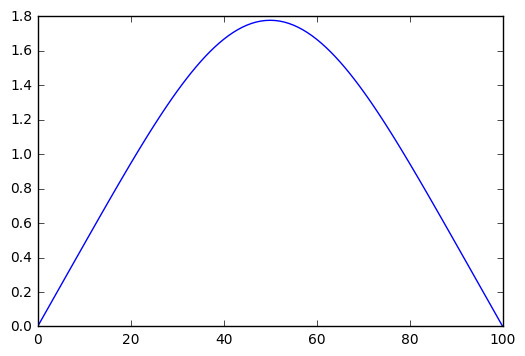

[ 0.          0.04778591  0.09557201  0.14335811  0.19114316  0.23892489
  0.28669941  0.33446083  0.38220091  0.4299087   0.47757028  0.52516844
  0.57268245  0.62008783  0.66735619  0.71445511  0.76134801  0.80799409
  0.85434835  0.90036162  0.94598059  0.99114798  1.03580266  1.0798799
  1.12331154  1.16602634  1.20795027  1.24900685  1.28911756  1.32820224
  1.3661795   1.40296723  1.43848306  1.4726448   1.50537104  1.53658154
  1.56619785  1.59414372  1.62034565  1.64473338  1.6672403   1.68780398
  1.70636652  1.72287499  1.73728179  1.74954495  1.75962848  1.76750254
  1.77314374  1.77653523  1.77766685  1.77653523  1.77314374  1.76750254
  1.75962848  1.74954495  1.73728179  1.72287499  1.70636652  1.68780398
  1.6672403   1.64473338  1.62034565  1.59414372  1.56619785  1.53658154
  1.50537104  1.4726448   1.43848306  1.40296723  1.3661795   1.32820224
  1.28911756  1.24900685  1.20795027  1.16602634  1.12331154  1.0798799
  1.03580266  0.99114798  0.94598059  0.90036162  0.8

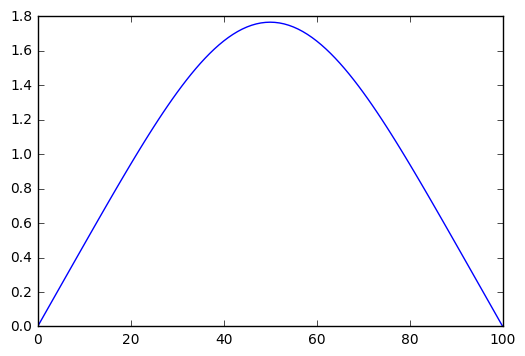

[ 0.          0.04764356  0.09528627  0.1429269   0.19056338  0.23819248
  0.28580936  0.33340726  0.38097712  0.42850725  0.47598306  0.52338678
  0.5706972   0.61788948  0.66493497  0.71180109  0.75845123  0.8048447
  0.8509367   0.89667839  0.94201693  0.9868956   1.03125397  1.0750281
  1.11815075  1.1605517   1.20215802  1.24289442  1.28268365  1.32144689
  1.35910415  1.39557478  1.43077785  1.46463272  1.49705945  1.52797936
  1.55731547  1.58499302  1.61093994  1.63508736  1.65737     1.67772668
  1.69610066  1.7124401   1.72669835  1.73883433  1.74881275  1.75660443
  1.76218643  1.76554226  1.76666197  1.76554226  1.76218643  1.75660443
  1.74881275  1.73883433  1.72669835  1.7124401   1.69610066  1.67772668
  1.65737     1.63508736  1.61093994  1.58499302  1.55731547  1.52797936
  1.49705945  1.46463272  1.43077785  1.39557478  1.35910415  1.32144689
  1.28268365  1.24289442  1.20215802  1.1605517   1.11815075  1.0750281
  1.03125397  0.9868956   0.94201693  0.89667839  0.85

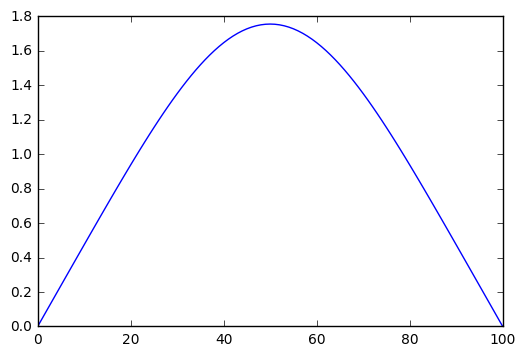

[ 0.          0.04749942  0.09499699  0.14249045  0.18997678  0.23745177
  0.28490969  0.33234292  0.37974162  0.42709337  0.47438296  0.52159205
  0.56869898  0.61567855  0.66250187  0.70913623  0.75554498  0.80168753
  0.8475193   0.89299177  0.93805255  0.9826455   1.02671085  1.07018545
  1.11300297  1.15509416  1.19638717  1.2368079   1.27628033  1.31472695
  1.35206913  1.38822763  1.42312298  1.45667599  1.48880822  1.51944244
  1.54850316  1.57591704  1.60161343  1.6255248   1.64758717  1.66774058
  1.68592943  1.70210292  1.71621536  1.72822649  1.73810177  1.74581258
  1.75133648  1.75465732  1.75576535  1.75465732  1.75133648  1.74581258
  1.73810177  1.72822649  1.71621536  1.70210292  1.68592943  1.66774058
  1.64758717  1.6255248   1.60161343  1.57591704  1.54850316  1.51944244
  1.48880822  1.45667599  1.42312298  1.38822763  1.35206913  1.31472695
  1.27628033  1.2368079   1.19638717  1.15509416  1.11300297  1.07018545
  1.02671085  0.9826455   0.93805255  0.89299177  0

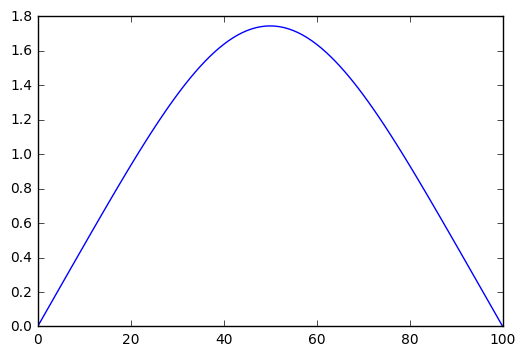

[ 0.          0.04735358  0.09470432  0.142049    0.18938363  0.2367031
  0.2840008   0.33126828  0.37849493  0.42566764  0.47277058  0.51978488
  0.56668844  0.61345572  0.6600576   0.70646122  0.75262994  0.79852325
  0.84409679  0.88930237  0.93408803  0.97839819  1.02217375  1.06535234
  1.10786849  1.14965392  1.19063786  1.23074733  1.26990753  1.30804223
  1.34507414  1.38092539  1.41551792  1.44877398  1.48061657  1.51096991
  1.53975991  1.56691468  1.5923649   1.61604438  1.6378904   1.65784418
  1.67585124  1.69186179  1.70583108  1.71771966  1.72749368  1.73512513
  1.74059201  1.74387849  1.74497505  1.74387849  1.74059201  1.73512513
  1.72749368  1.71771966  1.70583108  1.69186179  1.67585124  1.65784418
  1.6378904   1.61604438  1.5923649   1.56691468  1.53975991  1.51096991
  1.48061657  1.44877398  1.41551792  1.38092539  1.34507414  1.30804223
  1.26990753  1.23074733  1.19063786  1.14965392  1.10786849  1.06535234
  1.02217375  0.97839819  0.93408803  0.88930237  0.

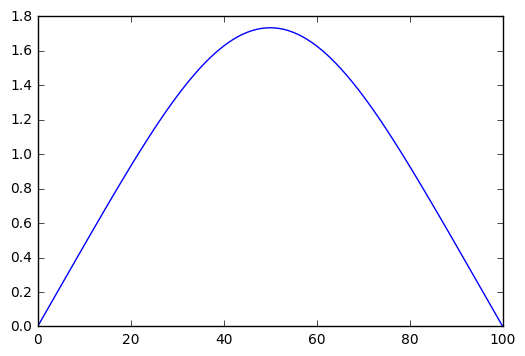

[ 0.          0.0472061   0.0944084   0.14160275  0.18878423  0.23594684
  0.28308311  0.3301838   0.37723756  0.42423061  0.47114651  0.5179659
  0.56466623  0.61122165  0.65760281  0.70377674  0.74970678  0.79535251
  0.8406698   0.88561077  0.9301239   0.97415416  1.01764312  1.06052913
  1.1027476   1.14423121  1.18491021  1.22471273  1.26356518  1.30139256
  1.3381189   1.37366766  1.40796216  1.44092606  1.47248376  1.50256089
  1.53108477  1.55798485  1.58319318  1.60664483  1.62827831  1.64803601
  1.66586454  1.6817151   1.69554383  1.70731209  1.7169867   1.72454024
  1.72995114  1.73320391  1.7342892   1.73320391  1.72995114  1.72454024
  1.7169867   1.70731209  1.69554383  1.6817151   1.66586454  1.64803601
  1.62827831  1.60664483  1.58319318  1.55798485  1.53108477  1.50256089
  1.47248376  1.44092606  1.40796216  1.37366766  1.3381189   1.30139256
  1.26356518  1.22471273  1.18491021  1.14423121  1.1027476   1.06052913
  1.01764312  0.97415416  0.9301239   0.88561077  0.

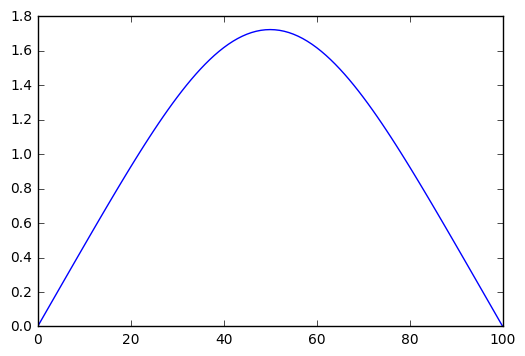

[ 0.          0.04705704  0.09410937  0.1411519   0.18817883  0.23518329
  0.282157    0.32908993  0.37597001  0.42278282  0.46951134  0.51613571
  0.56263298  0.608977    0.65513818  0.70108344  0.74677613  0.79217594
  0.83723892  0.88191753  0.92616069  0.9699139   1.01311935  1.05571617
  1.09764059  1.13882621  1.17920431  1.21870412  1.25725318  1.29477775
  1.3312031   1.36645403  1.40045519  1.43313162  1.46440907  1.49421457
  1.52247679  1.54912652  1.5740971   1.59732488  1.61874955  1.63831464
  1.65596781  1.67166125  1.68535195  1.69700206  1.70657908  1.71405612
  1.71941207  1.72263174  1.72370598  1.72263174  1.71941207  1.71405612
  1.70657908  1.69700206  1.68535195  1.67166125  1.65596781  1.63831464
  1.61874955  1.59732488  1.5740971   1.54912652  1.52247679  1.49421457
  1.46440907  1.43313162  1.40045519  1.36645403  1.3312031   1.29477775
  1.25725318  1.21870412  1.17920431  1.13882621  1.09764059  1.05571617
  1.01311935  0.9699139   0.92616069  0.88191753  0

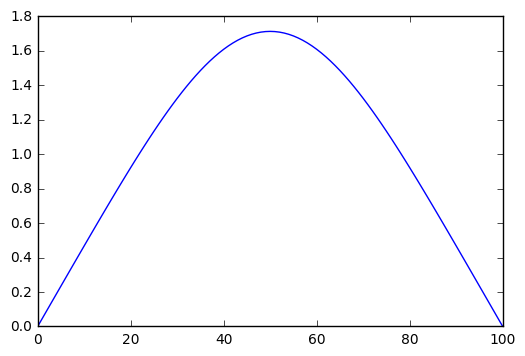

[ 0.          0.04690649  0.09380736  0.14069666  0.18756771  0.2344128
  0.28122285  0.32798709  0.37469275  0.42132479  0.46786562  0.5142949
  0.56058931  0.60672238  0.65266432  0.69838196  0.74383863  0.78899413
  0.83380474  0.87822322  0.92219891  0.96567785  1.00860286  1.05091379
  1.0925477   1.13343911  1.17352027  1.2127215   1.25097147  1.28819761
  1.32432647  1.35928411  1.39299652  1.42539003  1.45639178  1.48593011
  1.51393503  1.54033864  1.56507554  1.58808331  1.60930281  1.62867867
  1.64615959  1.66169869  1.67525384  1.68678793  1.69626912  1.70367105
  1.70897304  1.71216021  1.7132236   1.71216021  1.70897304  1.70367105
  1.69626912  1.68678793  1.67525384  1.66169869  1.64615959  1.62867867
  1.60930281  1.58808331  1.56507554  1.54033864  1.51393503  1.48593011
  1.45639178  1.42539003  1.39299652  1.35928411  1.32432647  1.28819761
  1.25097147  1.2127215   1.17352027  1.13343911  1.0925477   1.05091379
  1.00860286  0.96567785  0.92219891  0.87822322  0.8

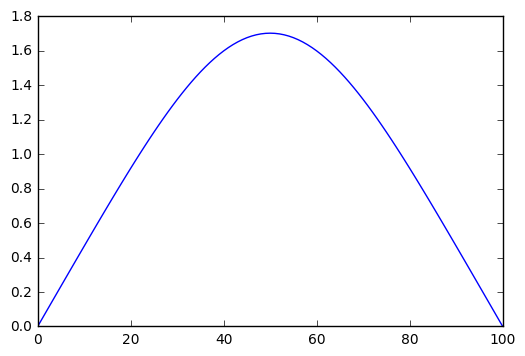

[ 0.          0.0467545   0.09350251  0.14023722  0.18695111  0.23363567
  0.28028104  0.32687572  0.37340626  0.41985702  0.46620989  0.51244405
  0.55853581  0.6044584   0.65018186  0.69567291  0.74089488  0.78580769
  0.83036782  0.87452836  0.91823906  0.96144646  1.00409403  1.04612232
  1.08746921  1.12807009  1.16785819  1.20676488  1.24471994  1.28165197
  1.31748872  1.35215752  1.38558564  1.41770071  1.44843118  1.47770671
  1.50545859  1.5316202   1.5561274   1.57891892  1.5999368   1.61912674
  1.63643843  1.65182593  1.66524793  1.67666807  1.68605514  1.69338331
  1.69863231  1.70178757  1.7028403   1.70178757  1.69863231  1.69338331
  1.68605514  1.67666807  1.66524793  1.65182593  1.63643843  1.61912674
  1.5999368   1.57891892  1.5561274   1.5316202   1.50545859  1.47770671
  1.44843118  1.41770071  1.38558564  1.35215752  1.31748872  1.28165197
  1.24471994  1.20676488  1.16785819  1.12807009  1.08746921  1.04612232
  1.00409403  0.96144646  0.91823906  0.87452836  0

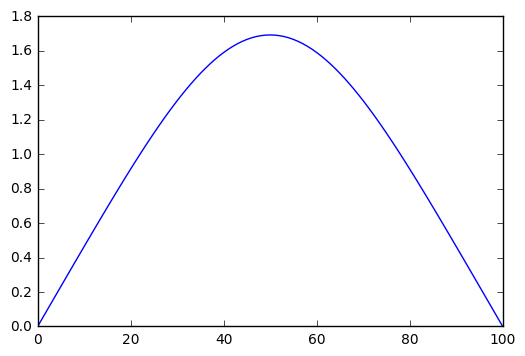

[ 0.          0.04660113  0.09319494  0.13977377  0.1863293   0.23285221
  0.27933192  0.3257562   0.37211098  0.41838002  0.46454468  0.51058371
  0.55647304  0.60218565  0.64769139  0.69295688  0.73794547  0.78261719
  0.82692872  0.87083346  0.91428159  0.95722016  0.99959323  1.04134208
  1.08240534  1.1227193   1.16221815  1.20083426  1.23849851  1.27514063
  1.31068957  1.34507388  1.37822207  1.41006307  1.4405266   1.46954358
  1.49704658  1.52297023  1.54725158  1.56983054  1.59065027  1.6096575
  1.62680292  1.64204147  1.65533268  1.66664089  1.67593552  1.68319124
  1.68838821  1.69151213  1.6925544   1.69151213  1.68838821  1.68319124
  1.67593552  1.66664089  1.65533268  1.64204147  1.62680292  1.6096575
  1.59065027  1.56983054  1.54725158  1.52297023  1.49704658  1.46954358
  1.4405266   1.41006307  1.37822207  1.34507388  1.31068957  1.27514063
  1.23849851  1.20083426  1.16221815  1.1227193   1.08240534  1.04134208
  0.99959323  0.95722016  0.91428159  0.87083346  0.8

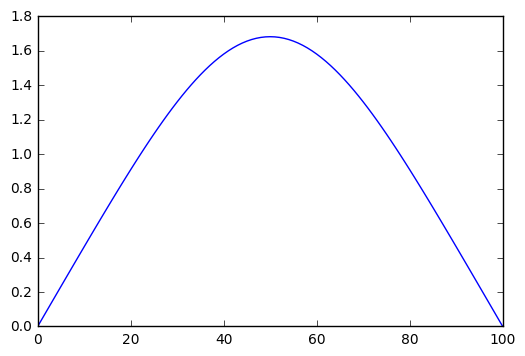

[ 0.          0.04644646  0.09288478  0.1393065   0.1857025   0.23206272
  0.27837584  0.32462896  0.37080737  0.41689426  0.4628705   0.50871441
  0.55440158  0.59990472  0.64519349  0.69023446  0.73499097  0.77942317
  0.82348795  0.86713903  0.91032698  0.95299936  0.99510083  1.03657334
  1.07735633  1.11738692  1.15660023  1.19492964  1.23230708  1.26866342
  1.30392874  1.3380328   1.37090535  1.40247654  1.43267734  1.46143994
  1.48869813  1.51438775  1.53844703  1.56081703  1.58144198  1.60026965
  1.61725168  1.63234389  1.6455066   1.65670486  1.66590867  1.67309324
  1.6782391   1.68133224  1.68236423  1.68133224  1.6782391   1.67309324
  1.66590867  1.65670486  1.6455066   1.63234389  1.61725168  1.60026965
  1.58144198  1.56081703  1.53844703  1.51438775  1.48869813  1.46143994
  1.43267734  1.40247654  1.37090535  1.3380328   1.30392874  1.26866342
  1.23230708  1.19492964  1.15660023  1.11738692  1.07735633  1.03657334
  0.99510083  0.95299936  0.91032698  0.86713903  0

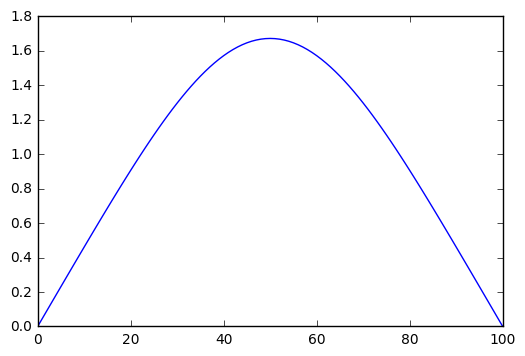

[ 0.          0.04629054  0.09257214  0.13883557  0.18507096  0.23126749
  0.27741314  0.32349436  0.36949583  0.4154002   0.46118784  0.50683668
  0.55232196  0.59761614  0.64268872  0.68750619  0.73203193  0.77622617
  0.82004604  0.86344554  0.90637566  0.94878445  0.99061716  1.03181642
  1.0723224   1.11207309  1.15100451  1.18905101  1.22614557  1.26222014
  1.29720596  1.33103393  1.363635    1.39494055  1.42488276  1.45339504
  1.48041238  1.50587181  1.52971272  1.55187727  1.57231075  1.59096192
  1.60778337  1.62273178  1.63576823  1.64685845  1.65597305  1.66308772
  1.66818337  1.67124628  1.67226816  1.67124628  1.66818337  1.66308772
  1.65597305  1.64685845  1.63576823  1.62273178  1.60778337  1.59096192
  1.57231075  1.55187727  1.52971272  1.50587181  1.48041238  1.45339504
  1.42488276  1.39494055  1.363635    1.33103393  1.29720596  1.26222014
  1.22614557  1.18905101  1.15100451  1.11207309  1.0723224   1.03181642
  0.99061716  0.94878445  0.90637566  0.86344554  0

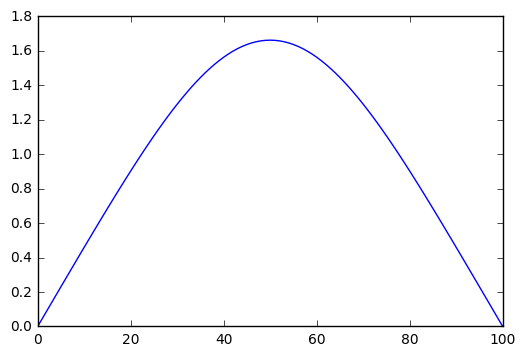

[ 0.          0.04613342  0.09225715  0.13836118  0.1844349   0.23046679
  0.27644414  0.32235278  0.3681768   0.4138983   0.4594972   0.50495103
  0.55023471  0.59532046  0.64017763  0.68477264  0.72906888  0.77302672
  0.81660347  0.85975347  0.90242807  0.94457583  0.98614257  1.02707157
  1.06730376  1.10677795  1.14543104  1.18319835  1.22001388  1.25581062
  1.29052094  1.32407688  1.35641057  1.38745454  1.4171422   1.44540813
  1.47218851  1.4974215   1.52104764  1.54301016  1.56325538  1.58173307
  1.59839668  1.61320376  1.62611613  1.6371002   1.64612715  1.65317314
  1.65821946  1.66125266  1.66226463  1.66125266  1.65821946  1.65317314
  1.64612715  1.6371002   1.62611613  1.61320376  1.59839668  1.58173307
  1.56325538  1.54301016  1.52104764  1.4974215   1.47218851  1.44540813
  1.4171422   1.38745454  1.35641057  1.32407688  1.29052094  1.25581062
  1.22001388  1.18319835  1.14543104  1.10677795  1.06730376  1.02707157
  0.98614257  0.94457583  0.90242807  0.85975347  0

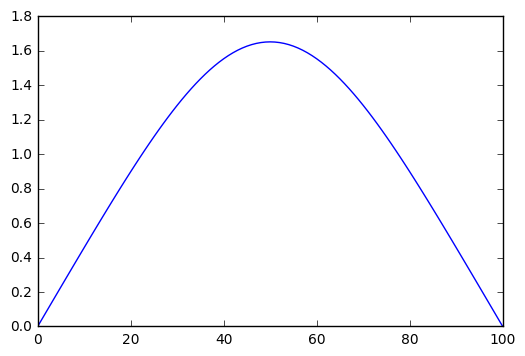

[ 0.          0.04597517  0.09193991  0.13788347  0.18379454  0.2296609
  0.27546918  0.3212046   0.36685067  0.41238899  0.45779904  0.50305794
  0.54814034  0.5930182   0.63766074  0.68203431  0.72610234  0.7698253
  0.81316073  0.85606325  0.89848462  0.94037385  0.98167736  1.02233906
  1.06230061  1.10150163  1.1398799   1.17737166  1.2139119   1.24943468
  1.28387342  1.31716131  1.34923159  1.38001798  1.40945503  1.43747848
  1.46402568  1.48903591  1.51245079  1.53421463  1.55427475  1.57258186
  1.58909033  1.60375849  1.61654891  1.62742866  1.63636948  1.64334798
  1.64834584  1.65134985  1.65235207  1.65134985  1.64834584  1.64334798
  1.63636948  1.62742866  1.61654891  1.60375849  1.58909033  1.57258186
  1.55427475  1.53421463  1.51245079  1.48903591  1.46402568  1.43747848
  1.40945503  1.38001798  1.34923159  1.31716131  1.28387342  1.24943468
  1.2139119   1.17737166  1.1398799   1.10150163  1.06230061  1.02233906
  0.98167736  0.94037385  0.89848462  0.85606325  0.8

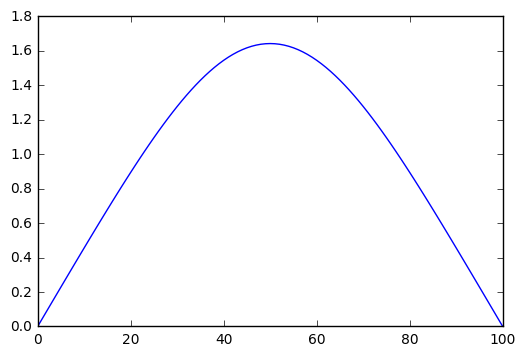

[ 0.          0.04581585  0.09162054  0.13740263  0.1831501   0.22885008
  0.27448856  0.32005015  0.36551783  0.4108727   0.45609381  0.50115791
  0.54603934  0.59070987  0.63513857  0.67929173  0.72313281  0.76662242
  0.80971828  0.85237533  0.8945457   0.93617889  0.97722184  1.01761914
  1.05731315  1.09624426  1.13435112  1.17157089  1.20783953  1.24309211
  1.27726313  1.31028684  1.34209762  1.37263032  1.40182061  1.42960539
  1.4559231   1.48071414  1.50392121  1.52548963  1.54536772  1.56350712
  1.57986305  1.59439465  1.60706522  1.61784244  1.6266986   1.63361079
  1.63856102  1.64153635  1.64252899  1.64153635  1.63856102  1.63361079
  1.6266986   1.61784244  1.60706522  1.59439465  1.57986305  1.56350712
  1.54536772  1.52548963  1.50392121  1.48071414  1.4559231   1.42960539
  1.40182061  1.37263032  1.34209762  1.31028684  1.27726313  1.24309211
  1.20783953  1.17157089  1.13435112  1.09624426  1.05731315  1.01761914
  0.97722184  0.93617889  0.8945457   0.85237533  0

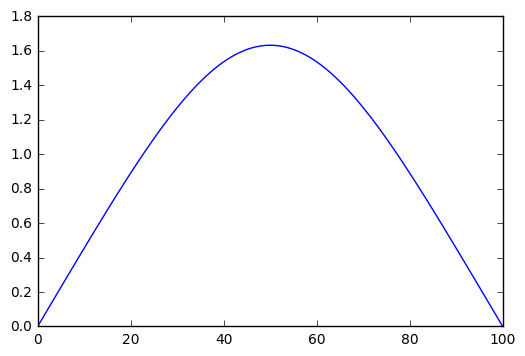

[ 0.          0.04565549  0.09129914  0.1369188   0.18250179  0.22803459
  0.27350258  0.31888979  0.36417867  0.40934985  0.45438195  0.49925138
  0.5439322   0.58839596  0.6326116   0.67654538  0.72016078  0.76341853
  0.80627658  0.84869012  0.8906117   0.93199127  0.97277632  1.01291206
  1.05234155  1.09100597  1.12884478  1.16579604  1.20179668  1.23678276
  1.2706898   1.30345313  1.33500823  1.36529103  1.39423834  1.42178814
  1.44787998  1.47245534  1.49545795  1.51683414  1.53653321  1.55450767
  1.57071363  1.58511098  1.59766371  1.60834015  1.61711311  1.62396012
  1.62886354  1.63181068  1.63279391  1.63181068  1.62886354  1.62396012
  1.61711311  1.60834015  1.59766371  1.58511098  1.57071363  1.55450767
  1.53653321  1.51683414  1.49545795  1.47245534  1.44787998  1.42178814
  1.39423834  1.36529103  1.33500823  1.30345313  1.2706898   1.23678276
  1.20179668  1.16579604  1.12884478  1.09100597  1.05234155  1.01291206
  0.97277632  0.93199127  0.8906117   0.84869012  0

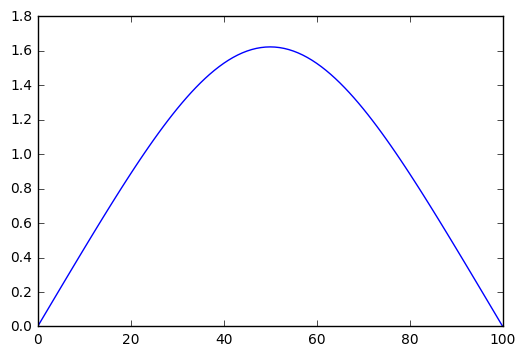

[ 0.          0.04549417  0.09097582  0.13643214  0.18184982  0.22721468
  0.27251153  0.31772385  0.36283355  0.40782083  0.45266389  0.49733881
  0.54181938  0.58607694  0.63008033  0.67379575  0.71718672  0.7602141
  0.80283604  0.84500804  0.886683    0.92781133  0.96834108  1.00821805
  1.047386    1.08578685  1.12336089  1.16004708  1.19578324  1.23050642
  1.26415316  1.29665984  1.32796298  1.35799961  1.38670761  1.41402606
  1.43989556  1.46425865  1.48706007  1.50824716  1.52777013  1.54558239
  1.56164086  1.5759062   1.5883431   1.59892046  1.60761163  1.61439457
  1.61925197  1.62217142  1.6231454   1.62217142  1.61925197  1.61439457
  1.60761163  1.59892046  1.5883431   1.5759062   1.56164086  1.54558239
  1.52777013  1.50824716  1.48706007  1.46425865  1.43989556  1.41402606
  1.38670761  1.35799961  1.32796298  1.29665984  1.26415316  1.23050642
  1.19578324  1.16004708  1.12336089  1.08578685  1.047386    1.00821805
  0.96834108  0.92781133  0.886683    0.84500804  0.

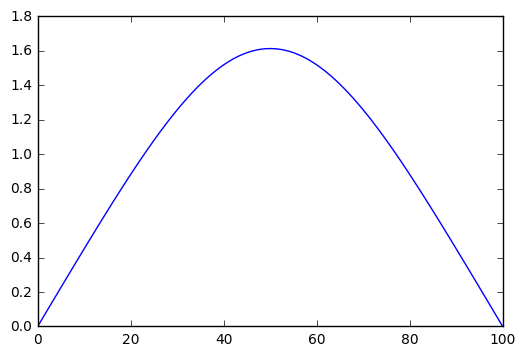

[ 0.          0.04533192  0.09065067  0.13594281  0.18119437  0.2263906
  0.27151571  0.31655264  0.36148284  0.40628603  0.45094005  0.49542064
  0.53970133  0.58375329  0.62754522  0.67104329  0.71421108  0.75700957
  0.7993971   0.84132947  0.88275995  0.9236394   0.96391639  1.00353733
  1.04244665  1.08058701  1.11789951  1.15432396  1.18979909  1.22426292
  1.25765296  1.28990661  1.32096145  1.35075554  1.37922784  1.40631846
  1.43196908  1.45612324  1.47872669  1.49972771  1.51907744  1.53673016
  1.55264358  1.56677912  1.5791021   1.58958205  1.59819281  1.60491277
  1.60972495  1.61261715  1.61358204  1.61261715  1.60972495  1.60491277
  1.59819281  1.58958205  1.5791021   1.56677912  1.55264358  1.53673016
  1.51907744  1.49972771  1.47872669  1.45612324  1.43196908  1.40631846
  1.37922784  1.35075554  1.32096145  1.28990661  1.25765296  1.22426292
  1.18979909  1.15432396  1.11789951  1.08058701  1.04244665  1.00353733
  0.96391639  0.9236394   0.88275995  0.84132947  0.

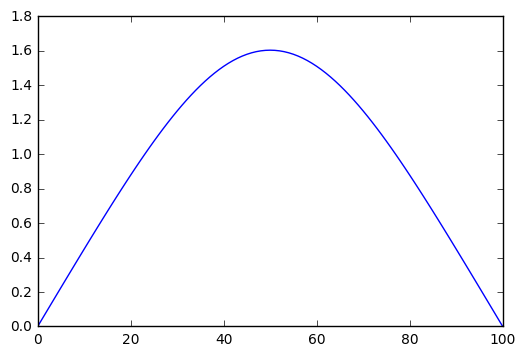

[ 0.          0.0451688   0.0903238   0.13545094  0.18053564  0.22556257
  0.27051538  0.31537649  0.36012688  0.40474584  0.44921083  0.49349729
  0.5375785   0.58142544  0.62500671  0.66828846  0.71123431  0.75380536
  0.79596016  0.83765479  0.87884289  0.91947577  0.95950251  0.99887011
  1.03752366  1.07540655  1.11246067  1.14862666  1.18384415  1.21805207
  1.25118893  1.28319312  1.31400321  1.34355832  1.37179843  1.3986647
  1.42409981  1.4480483   1.4704569   1.49127483  1.51045412  1.52794989
  1.54372065  1.55772851  1.56993949  1.58032365  1.58885535  1.59551338
  1.60028109  1.60314652  1.60410247  1.60314652  1.60028109  1.59551338
  1.58885535  1.58032365  1.56993949  1.55772851  1.54372065  1.52794989
  1.51045412  1.49127483  1.4704569   1.4480483   1.42409981  1.3986647
  1.37179843  1.34355832  1.31400321  1.28319312  1.25118893  1.21805207
  1.18384415  1.14862666  1.11246067  1.07540655  1.03752366  0.99887011
  0.95950251  0.91947577  0.87884289  0.83765479  0.7

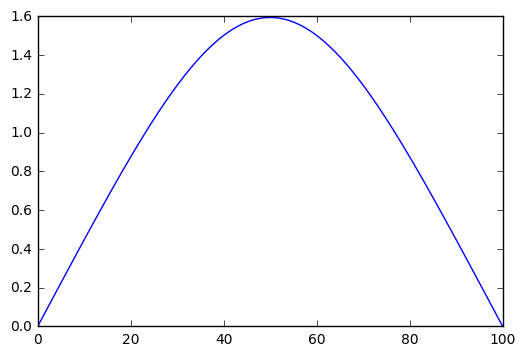

[ 0.          0.04500486  0.08999531  0.13495668  0.17987382  0.22473082
  0.26951081  0.31419571  0.35876601  0.40320062  0.44747662  0.49156917
  0.5354513   0.57909383  0.62246526  0.6655317   0.70825684  0.75060188
  0.79252561  0.83398437  0.87493217  0.91532075  0.9550997   0.9942166
  1.03261719  1.07024557  1.10704439  1.14295513  1.17791828  1.2118737
  1.24476082  1.27651901  1.30708786  1.33640747  1.36441883  1.39106412
  1.41628701  1.44003302  1.46224984  1.48288758  1.50189916  1.51924053
  1.53487094  1.54875323  1.56085404  1.571144    1.57959795  1.58619509
  1.59091908  1.59375819  1.59470535  1.59375819  1.59091908  1.58619509
  1.57959795  1.571144    1.56085404  1.54875323  1.53487094  1.51924053
  1.50189916  1.48288758  1.46224984  1.44003302  1.41628701  1.39106412
  1.36441883  1.33640747  1.30708786  1.27651901  1.24476082  1.2118737
  1.17791828  1.14295513  1.10704439  1.07024557  1.03261719  0.9942166
  0.9550997   0.91532075  0.87493217  0.83398437  0.792

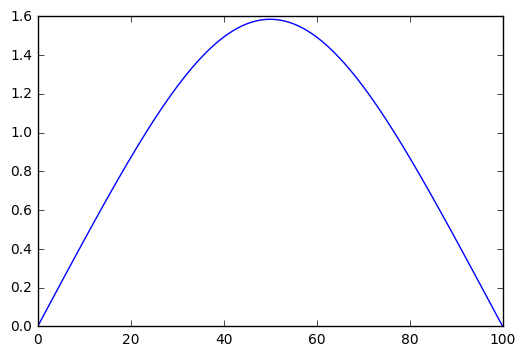

[ 0.          0.04484014  0.08966527  0.13446017  0.17920909  0.22389559
  0.26850227  0.31301057  0.35740056  0.40165072  0.44573781  0.48963668
  0.53332015  0.57675888  0.61992127  0.66277343  0.70527907  0.74739954
  0.78909383  0.83031857  0.87102811  0.91117462  0.9507082   0.98957699
  1.02772737  1.06510414  1.10165071  1.13730934  1.1720214   1.20572762
  1.23836838  1.26988398  1.30021499  1.3293025   1.35708848  1.38351609
  1.40852999  1.43207664  1.45410465  1.47456505  1.49341159  1.51060102
  1.52609336  1.53985213  1.55184457  1.56204189  1.57041938  1.57695663
  1.58163763  1.58445085  1.58538937  1.58445085  1.58163763  1.57695663
  1.57041938  1.56204189  1.55184457  1.53985213  1.52609336  1.51060102
  1.49341159  1.47456505  1.45410465  1.43207664  1.40852999  1.38351609
  1.35708848  1.3293025   1.30021499  1.26988398  1.23836838  1.20572762
  1.1720214   1.13730934  1.10165071  1.06510414  1.02772737  0.98957699
  0.9507082   0.91117462  0.87102811  0.83031857  0

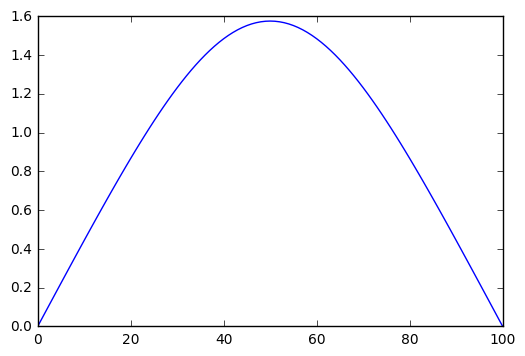

[ 0.          0.04467468  0.0893338   0.13396153  0.17854162  0.22305707
  0.26749001  0.31182138  0.35603084  0.40009649  0.44399475  0.48770021
  0.53118545  0.574421    0.61737517  0.66001404  0.7023014   0.74419873
  0.7856652   0.82665772  0.86713101  0.90703766  0.94632824  0.98495147
  1.02285434  1.05998235  1.09627963  1.13168924  1.16615338  1.19961365
  1.23201134  1.26328769  1.2933842   1.32224293  1.34980682  1.37601999
  1.40082804  1.42417837  1.4460205   1.46630633  1.48499044  1.50203036
  1.51738685  1.53102408  1.54290993  1.55301611  1.5613184   1.56779675
  1.57243546  1.57522323  1.57615324  1.57522323  1.57243546  1.56779675
  1.5613184   1.55301611  1.54290993  1.53102408  1.51738685  1.50203036
  1.48499044  1.46630633  1.4460205   1.42417837  1.40082804  1.37601999
  1.34980682  1.32224293  1.2933842   1.26328769  1.23201134  1.19961365
  1.16615338  1.13168924  1.09627963  1.05998235  1.02285434  0.98495147
  0.94632824  0.90703766  0.86713101  0.82665772  0

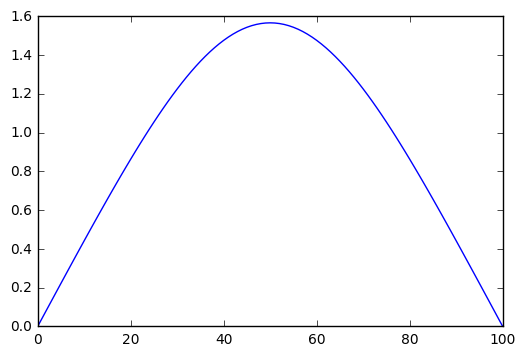

[ 0.          0.04450854  0.08900096  0.13346091  0.17787158  0.22221549
  0.26647427  0.31062842  0.35465716  0.39853826  0.44224781  0.48576012
  0.5290476   0.57208059  0.61482735  0.65725395  0.69932424  0.74099981
  0.78224006  0.82300216  0.86324118  0.90291012  0.94196004  0.98034021
  1.01799823  1.05488026  1.09093117  1.12609478  1.16031411  1.19353162
  1.22568947  1.25672982  1.28659509  1.3152283   1.34257332  1.3685752
  1.39318049  1.41633748  1.43799659  1.45811055  1.47663478  1.49352756
  1.50875035  1.52226801  1.53404897  1.5440655   1.55229381  1.55871423
  1.56331135  1.56607408  1.56699573  1.56607408  1.56331135  1.55871423
  1.55229381  1.5440655   1.53404897  1.52226801  1.50875035  1.49352756
  1.47663478  1.45811055  1.43799659  1.41633748  1.39318049  1.3685752
  1.34257332  1.3152283   1.28659509  1.25672982  1.22568947  1.19353162
  1.16031411  1.12609478  1.09093117  1.05488026  1.01799823  0.98034021
  0.94196004  0.90291012  0.86324118  0.82300216  0.7

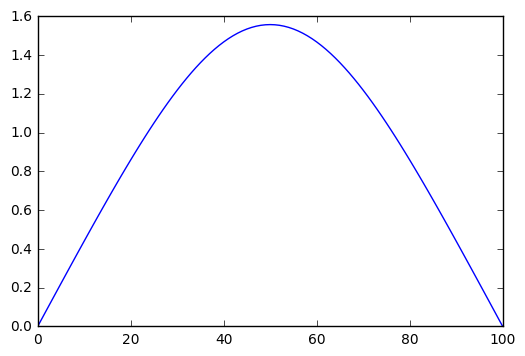

[ 0.          0.04434175  0.08866685  0.13295842  0.17719915  0.22137105
  0.26545529  0.30943194  0.35327984  0.39697637  0.44049734  0.4838168
  0.52690695  0.56973803  0.61227821  0.65449354  0.69634794  0.73780315
  0.77881876  0.81935221  0.85935891  0.89879227  0.93760383  0.97574339
  1.01315917  1.04979796  1.08560535  1.12052592  1.15450348  1.18748134
  1.21940251  1.25021005  1.27984729  1.30825816  1.33538745  1.36118114
  1.38558666  1.40855323  1.4300321   1.44997686  1.46834368  1.48509163
  1.50018285  1.51358283  1.52526061  1.53518893  1.54334445  1.54970788
  1.55426408  1.55700218  1.5579156   1.55700218  1.55426408  1.54970788
  1.54334445  1.53518893  1.52526061  1.51358283  1.50018285  1.48509163
  1.46834368  1.44997686  1.4300321   1.40855323  1.38558666  1.36118114
  1.33538745  1.30825816  1.27984729  1.25021005  1.21940251  1.18748134
  1.15450348  1.12052592  1.08560535  1.04979796  1.01315917  0.97574339
  0.93760383  0.89879227  0.85935891  0.81935221  0.

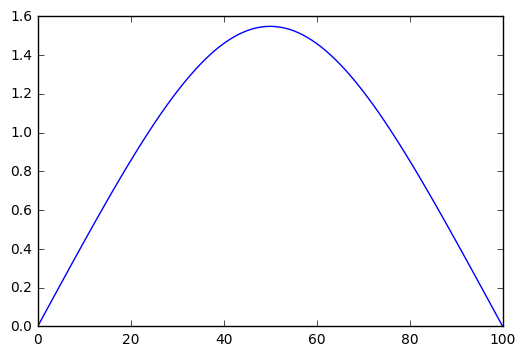

[ 0.          0.04417435  0.08833154  0.13245419  0.17652447  0.22052394
  0.2644333   0.30823222  0.35189914  0.39541112  0.43874366  0.48187058
  0.52476389  0.56739369  0.6097281   0.65173317  0.69337288  0.7346091
  0.77540162  0.81570817  0.85548447  0.89468434  0.9332598   0.97116117
  1.00833725  1.04473549  1.08030216  1.1149826   1.14872138  1.18146263
  1.21315022  1.24372808  1.27314041  1.30133205  1.32824869  1.3538372
  1.37804592  1.4008249   1.42212626  1.44190439  1.46011626  1.47672163
  1.49168335  1.50496752  1.51654374  1.52638526  1.53446918  1.54077653
  1.54529248  1.54800634  1.54891168  1.54800634  1.54529248  1.54077653
  1.53446918  1.52638526  1.51654374  1.50496752  1.49168335  1.47672163
  1.46011626  1.44190439  1.42212626  1.4008249   1.37804592  1.3538372
  1.32824869  1.30133205  1.27314041  1.24372808  1.21315022  1.18146263
  1.14872138  1.1149826   1.08030216  1.04473549  1.00833725  0.97116117
  0.9332598   0.89468434  0.85548447  0.81570817  0.77

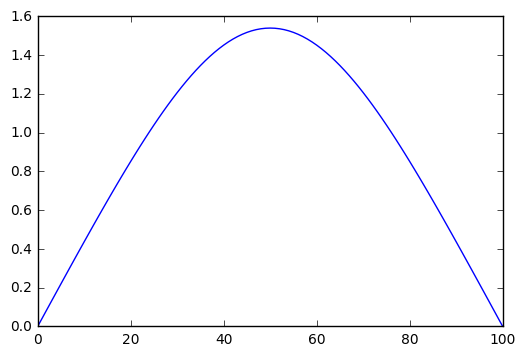

[ 0.          0.04400639  0.08799513  0.13194833  0.17584771  0.21967435
  0.26340853  0.30702952  0.35051537  0.39384283  0.43698711  0.47992181
  0.52261876  0.56504794  0.6071774   0.64897321  0.69039941  0.731418
  0.77198898  0.81207034  0.85161813  0.89058658  0.92892816  0.9665937
  1.0035326   1.03969292  1.07502162  1.10946476  1.14296769  1.17547532
  1.20693237  1.23728359  1.26647407  1.29444953  1.32115653  1.34654282
  1.3705576   1.39315179  1.41427831  1.43389235  1.45195162  1.46841663
  1.48325087  1.49642105  1.50789732  1.51765343  1.52566687  1.53191905
  1.53639539  1.53908541  1.53998278  1.53908541  1.53639539  1.53191905
  1.52566687  1.51765343  1.50789732  1.49642105  1.48325087  1.46841663
  1.45195162  1.43389235  1.41427831  1.39315179  1.3705576   1.34654282
  1.32115653  1.29444953  1.26647407  1.23728359  1.20693237  1.17547532
  1.14296769  1.10946476  1.07502162  1.03969292  1.0035326   0.9665937
  0.92892816  0.89058658  0.85161813  0.81207034  0.771

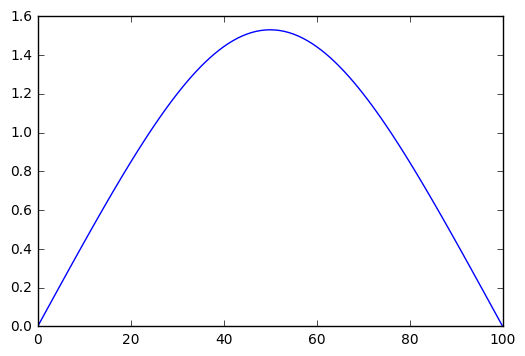

[ 0.          0.04383791  0.08765768  0.13144096  0.17516901  0.21882248
  0.2623812   0.30582407  0.34912879  0.39227178  0.43522801  0.47797083
  0.5204719   0.56270112  0.60462646  0.646214    0.68742786  0.72823018
  0.76858114  0.808439    0.84776016  0.88649921  0.92460908  0.96204114
  0.99874531  1.0346703   1.06976373  1.10397236  1.1372423   1.16951924
  1.2007487   1.23087628  1.25984791  1.28761017  1.31411047  1.33929744
  1.3631211   1.3855332   1.40648748  1.4259399   1.44384892  1.46017572
  1.47488445  1.48794242  1.49932031  1.50899235  1.51693644  1.52313432
  1.52757168  1.53023824  1.53112778  1.53023824  1.52757168  1.52313432
  1.51693644  1.50899235  1.49932031  1.48794242  1.47488445  1.46017572
  1.44384892  1.4259399   1.40648748  1.3855332   1.3631211   1.33929744
  1.31411047  1.28761017  1.25984791  1.23087628  1.2007487   1.16951924
  1.1372423   1.10397236  1.06976373  1.0346703   0.99874531  0.96204114
  0.92460908  0.88649921  0.84776016  0.808439    0

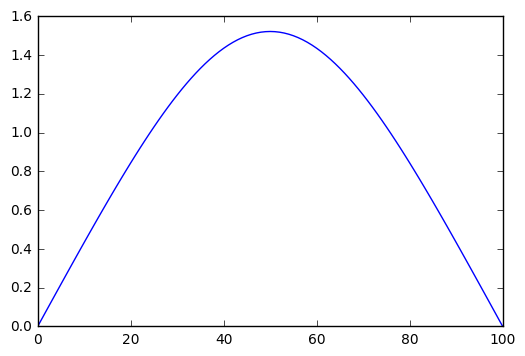

[ 0.          0.04366894  0.08731927  0.1309322   0.17448853  0.21796849
  0.26135152  0.30461612  0.34773967  0.39069828  0.43346665  0.47601794
  0.51832366  0.56035357  0.60207561  0.64345589  0.68445857  0.72504595
  0.7651784   0.80481444  0.84391079  0.88242245  0.92030277  0.95750361
  0.99397548  1.02966768  1.06452847  1.09850533  1.13154508  1.1635942
  1.19459898  1.22450585  1.25326157  1.28081353  1.30711003  1.33210049
  1.35573578  1.37796847  1.39875306  1.41804628  1.43580731  1.45199801
  1.46658316  1.47953066  1.49081171  1.50040099  1.50827681  1.51442126
  1.51882026  1.52146372  1.52234555  1.52146372  1.51882026  1.51442126
  1.50827681  1.50040099  1.49081171  1.47953066  1.46658316  1.45199801
  1.43580731  1.41804628  1.39875306  1.37796847  1.35573578  1.33210049
  1.30711003  1.28081353  1.25326157  1.22450585  1.19459898  1.1635942
  1.13154508  1.09850533  1.06452847  1.02966768  0.99397548  0.95750361
  0.92030277  0.88242245  0.84391079  0.80481444  0.7

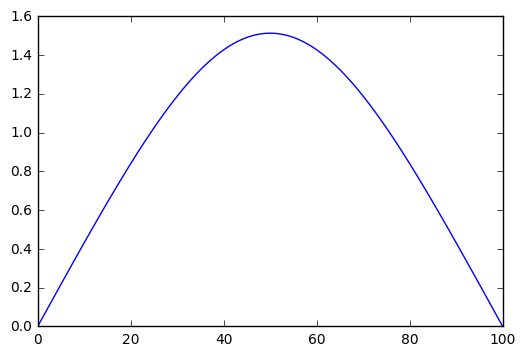

[ 0.          0.04349951  0.08697997  0.13042215  0.17380641  0.21711257
  0.26031969  0.3034059   0.34634826  0.38912259  0.43170335  0.47406348
  0.51617434  0.55800561  0.5995252   0.64069919  0.68149186  0.72186561
  0.76178104  0.80119692  0.84007028  0.8783565   0.91600938  0.95298126
  0.9892232   1.02468509  1.05931585  1.09306361  1.12587593  1.15770003
  1.18848298  1.218172    1.24671467  1.27405921  1.30015471  1.32495143
  1.34840105  1.37045692  1.39107431  1.4102107   1.42782596  1.44388262
  1.45834608  1.47118481  1.48237051  1.49187833  1.49968695  1.50577879
  1.51014004  1.51276077  1.51363501  1.51276077  1.51014004  1.50577879
  1.49968695  1.49187833  1.48237051  1.47118481  1.45834608  1.44388262
  1.42782596  1.4102107   1.39107431  1.37045692  1.34840105  1.32495143
  1.30015471  1.27405921  1.24671467  1.218172    1.18848298  1.15770003
  1.12587593  1.09306361  1.05931585  1.02468509  0.9892232   0.95298126
  0.91600938  0.8783565   0.84007028  0.80119692  0

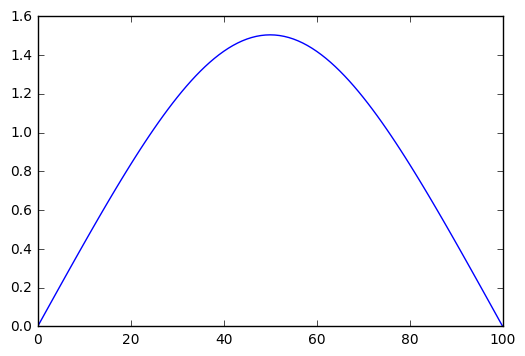

[ 0.          0.04332967  0.08663986  0.12991091  0.17312278  0.21625489
  0.25928591  0.30219364  0.34495482  0.38754499  0.42993838  0.47210773
  0.51402427  0.55565758  0.59697552  0.63794422  0.67852802  0.71868947
  0.75838935  0.7975867   0.83623885  0.87430157  0.91172908  0.94847422
  0.98448856  1.01972259  1.05412584  1.08764714  1.12023472  1.15183655
  1.18240046  1.21187445  1.24020688  1.26734678  1.29324405  1.31784974
  1.34111632  1.36299791  1.38345054  1.40243241  1.41990407  1.43582871
  1.45017233  1.46290394  1.47399576  1.48342336  1.49116584  1.49720589
  1.50152997  1.50412833  1.5049951   1.50412833  1.50152997  1.49720589
  1.49116584  1.48342336  1.47399576  1.46290394  1.45017233  1.43582871
  1.41990407  1.40243241  1.38345054  1.36299791  1.34111632  1.31784974
  1.29324405  1.26734678  1.24020688  1.21187445  1.18240046  1.15183655
  1.12023472  1.08764714  1.05412584  1.01972259  0.98448856  0.94847422
  0.91172908  0.87430157  0.83623885  0.7975867   0

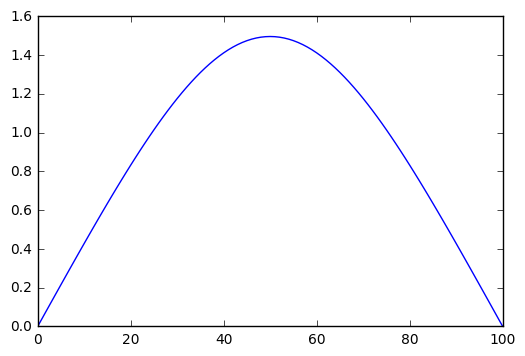

[ 0.          0.04315945  0.08629901  0.1293986   0.17243779  0.2153956
  0.25825037  0.30097955  0.34355959  0.38596575  0.42817202  0.47015099
  0.51187375  0.55330977  0.59442691  0.6351913   0.67556737  0.71551782
  0.7550036   0.79398402  0.83241673  0.87025785  0.90746204  0.94398259
  0.97977163  1.0147802   1.04895845  1.08225585  1.11462134  1.1460036
  1.1763512   1.2056129   1.23373785  1.26067584  1.28637757  1.31079488
  1.333881    1.3555908   1.37588106  1.39471066  1.41204085  1.42783544
  1.44206101  1.45468713  1.4656865   1.47503513  1.48271247  1.48870154
  1.49298902  1.49556535  1.49642477  1.49556535  1.49298902  1.48870154
  1.48271247  1.47503513  1.4656865   1.45468713  1.44206101  1.42783544
  1.41204085  1.39471066  1.37588106  1.3555908   1.333881    1.31079488
  1.28637757  1.26067584  1.23373785  1.2056129   1.1763512   1.1460036
  1.11462134  1.08225585  1.04895845  1.0147802   0.97977163  0.94398259
  0.90746204  0.87025785  0.83241673  0.79398402  0.75

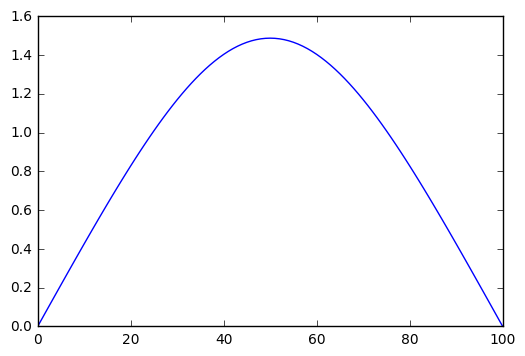

[ 0.          0.04298888  0.08595747  0.1288853   0.17175155  0.21453488
  0.25721327  0.29976386  0.3421628   0.3843851   0.42640455  0.46819355
  0.50972306  0.55096248  0.59187964  0.63244071  0.67261019  0.71235091
  0.75162404  0.79038912  0.82860413  0.86622553  0.9032084   0.93950651
  0.97507249  1.00985795  1.04381365  1.07688968  1.10903568  1.140201
  1.17033497  1.19938707  1.22730723  1.25404599  1.27955483  1.30378634
  1.32669452  1.34823497  1.36836519  1.38704474  1.40423553  1.41990199
  1.43401129  1.4465335   1.45744182  1.46671267  1.47432587  1.48026473
  1.48451619  1.48707083  1.48792301  1.48707083  1.48451619  1.48026473
  1.47432587  1.46671267  1.45744182  1.4465335   1.43401129  1.41990199
  1.40423553  1.38704474  1.36836519  1.34823497  1.32669452  1.30378634
  1.27955483  1.25404599  1.22730723  1.19938707  1.17033497  1.140201
  1.10903568  1.07688968  1.04381365  1.00985795  0.97507249  0.93950651
  0.9032084   0.86622553  0.82860413  0.79038912  0.751

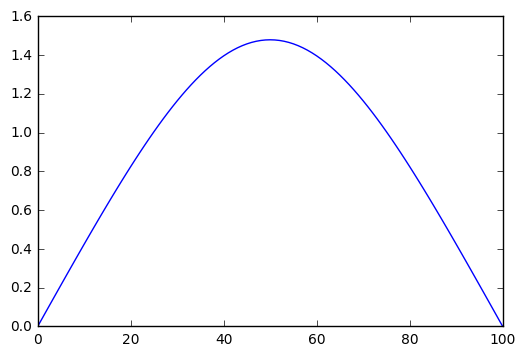

[ 0.          0.042818    0.08561532  0.12837112  0.1710642   0.21367287
  0.25617478  0.29854676  0.34076468  0.38280332  0.42463624  0.46623568
  0.50757249  0.54861601  0.58933402  0.62969274  0.66965676  0.70918903
  0.74825093  0.78680224  0.82480125  0.86220478  0.89896831  0.93504608
  0.97039121  1.00495587  1.03869141  1.07154856  1.1034776   1.13442858
  1.16435153  1.19319668  1.22091468  1.24745684  1.27277537  1.29682363
  1.31955633  1.34092981  1.36090226  1.37943392  1.39648735  1.41202757
  1.42602231  1.43844217  1.44926081  1.45845506  1.46600509  1.47189451
  1.47611048  1.47864377  1.47948882  1.47864377  1.47611048  1.47189451
  1.46600509  1.45845506  1.44926081  1.43844217  1.42602231  1.41202757
  1.39648735  1.37943392  1.36090226  1.34092981  1.31955633  1.29682363
  1.27277537  1.24745684  1.22091468  1.19319668  1.16435153  1.13442858
  1.1034776   1.07154856  1.03869141  1.00495587  0.97039121  0.93504608
  0.89896831  0.86220478  0.82480125  0.78680224  0

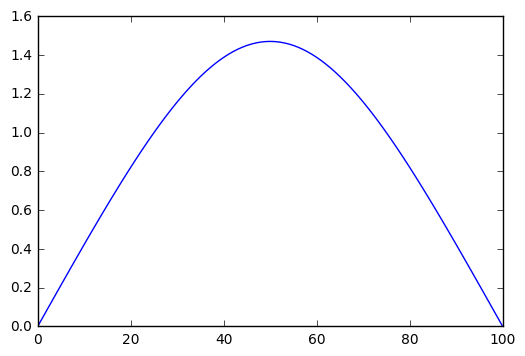

[ 0.          0.04264683  0.08527262  0.12785614  0.17037585  0.21280973
  0.25513509  0.29732846  0.33936546  0.38122062  0.42286732  0.46427765
  0.50542232  0.54627062  0.58679033  0.62694768  0.66670734  0.70603243
  0.7448845   0.7832236   0.82100829  0.85819577  0.8947419   0.93060139
  0.96572785  1.00007399  1.03359173  1.06623242  1.09794699  1.12868617
  1.15840068  1.18704146  1.21455988  1.240908    1.26603876  1.28990624
  1.31246587  1.33367472  1.35349163  1.37187752  1.38879557  1.40421138
  1.41809326  1.43041229  1.44114258  1.45026137  1.45774918  1.46358991
  1.46777094  1.4702832   1.47112123  1.4702832   1.46777094  1.46358991
  1.45774918  1.45026137  1.44114258  1.43041229  1.41809326  1.40421138
  1.38879557  1.37187752  1.35349163  1.33367472  1.31246587  1.28990624
  1.26603876  1.240908    1.21455988  1.18704146  1.15840068  1.12868617
  1.09794699  1.06623242  1.03359173  1.00007399  0.96572785  0.93060139
  0.8947419   0.85819577  0.82100829  0.7832236   0

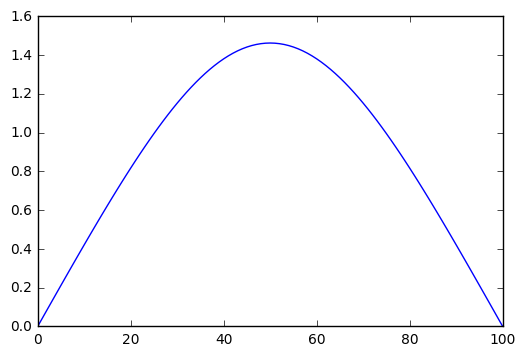

[ 0.          0.04247542  0.08492943  0.12734046  0.16968664  0.2119456
  0.25409435  0.29610915  0.33796535  0.37963726  0.42109807  0.46231971
  0.50327282  0.5439266   0.58424883  0.62420577  0.6637622   0.70288136
  0.741525    0.77965341  0.81722545  0.85419866  0.89052932  0.92617255
  0.96108247  0.99521231  1.02851457  1.06094119  1.09244374  1.1229736
  1.15248218  1.18092112  1.2082425   1.2343991   1.25934456  1.28303368
  1.30542262  1.3264691   1.34613266  1.36437486  1.38115946  1.39645268
  1.41022333  1.42244301  1.43308626  1.44213072  1.44955725  1.45535002
  1.45949663  1.46198817  1.46281928  1.46198817  1.45949663  1.45535002
  1.44955725  1.44213072  1.43308626  1.42244301  1.41022333  1.39645268
  1.38115946  1.36437486  1.34613266  1.3264691   1.30542262  1.28303368
  1.25934456  1.2343991   1.2082425   1.18092112  1.15248218  1.1229736
  1.09244374  1.06094119  1.02851457  0.99521231  0.96108247  0.92617255
  0.89052932  0.85419866  0.81722545  0.77965341  0.74

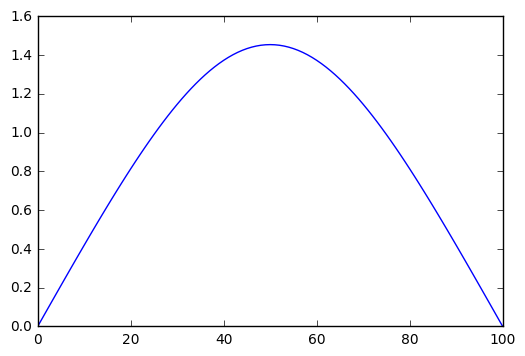

[ 0.          0.04230378  0.0845858   0.12682417  0.16899667  0.21108062
  0.25305275  0.29488902  0.33656455  0.37805344  0.4193287   0.46036212
  0.50112424  0.5415842   0.58170978  0.6214673   0.66082159  0.69973606
  0.73817264  0.77609187  0.81345291  0.85021362  0.88633068  0.92175965
  0.95645513  0.99037087  1.02345991  1.0556748   1.08696772  1.1172907
  1.14659582  1.1748354   1.20196222  1.22792974  1.25269234  1.27620549
  1.29842604  1.31931239  1.33882473  1.35692525  1.37357832  1.3887507
  1.40241174  1.41453352  1.42509101  1.43406224  1.44142839  1.44717391
  1.45128662  1.45375776  1.45458206  1.45375776  1.45128662  1.44717391
  1.44142839  1.43406224  1.42509101  1.41453352  1.40241174  1.3887507
  1.37357832  1.35692525  1.33882473  1.31931239  1.29842604  1.27620549
  1.25269234  1.22792974  1.20196222  1.1748354   1.14659582  1.1172907
  1.08696772  1.0556748   1.02345991  0.99037087  0.95645513  0.92175965
  0.88633068  0.85021362  0.81345291  0.77609187  0.738

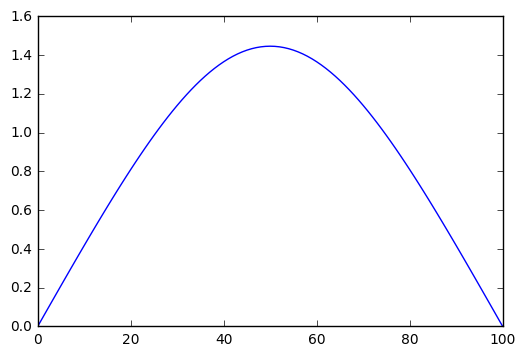

[ 0.          0.04213194  0.0842418   0.12630735  0.16830605  0.21021493
  0.25201043  0.29366825  0.33516327  0.37646939  0.41755945  0.45840512
  0.49897682  0.53924368  0.57917345  0.61873249  0.65788575  0.69659676
  0.73482765  0.77253919  0.80969083  0.84624079  0.88214611  0.91736278
  0.95184588  0.98554966  1.01842771  1.05043317  1.08151881  1.11163731
  1.14074139  1.16878404  1.19571872  1.22149958  1.24608168  1.26942119
  1.29147561  1.31220402  1.33156723  1.34952805  1.36605144  1.38110471
  1.39465772  1.40668301  1.417156    1.42605507  1.43336173  1.4390607
  1.44314     1.44559104  1.44640863  1.44559104  1.44314     1.4390607
  1.43336173  1.42605507  1.417156    1.40668301  1.39465772  1.38110471
  1.36605144  1.34952805  1.33156723  1.31220402  1.29147561  1.26942119
  1.24608168  1.22149958  1.19571872  1.16878404  1.14074139  1.11163731
  1.08151881  1.05043317  1.01842771  0.98554966  0.95184588  0.91736278
  0.88214611  0.84624079  0.80969083  0.77253919  0.7

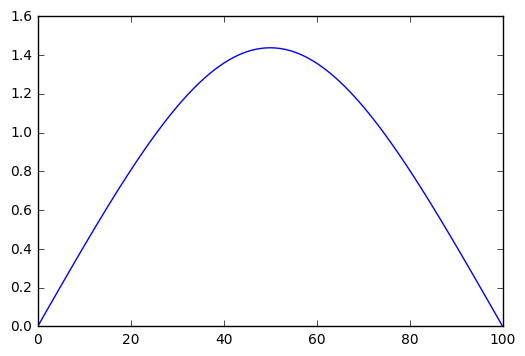

[ 0.          0.04195994  0.08389749  0.12579009  0.1676149   0.20934867
  0.25096756  0.29244702  0.33376171  0.37488533  0.41579056  0.45644894
  0.49683083  0.53690528  0.57664008  0.61600161  0.65495492  0.69346369
  0.73149023  0.76899555  0.8059394   0.84228031  0.87797571  0.91298202
  0.94725476  0.9807487   1.01341796  1.04521623  1.0760969   1.10601326
  1.13491866  1.16276676  1.18951168  1.21510825  1.23951218  1.26268032
  1.28457084  1.30514343  1.32435956  1.34218262  1.35857815  1.37351399
  1.38696051  1.39889071  1.40928041  1.41810837  1.42535641  1.43100952
  1.43505591  1.43748715  1.43829812  1.43748715  1.43505591  1.43100952
  1.42535641  1.41810837  1.40928041  1.39889071  1.38696051  1.37351399
  1.35857815  1.34218262  1.32435956  1.30514343  1.28457084  1.26268032
  1.23951218  1.21510825  1.18951168  1.16276676  1.13491866  1.10601326
  1.0760969   1.04521623  1.01341796  0.9807487   0.94725476  0.91298202
  0.87797571  0.84228031  0.8059394   0.76899555  0

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
get_ipython().magic('matplotlib inline')
def vis(level, bPrint):
    plt.plot(u[level])
    plt.show()
    if bPrint:
        print(u[level])
    sum = 0
    for i in range(0, xmax):
        for j in range(0,xmax):
            sum += u[i][j]
    print(str(sum)+"  "+str(t))

def expl(i, row):
    if row:
        for j in range(1, xmax - 1):
            u[i][j] = a*uH[i][j-1]+(1-2*a)*uH[i][j]+a*uH[i][j+1]
    else:#column
        for j in range(1, xmax - 1):
            u[j][i] = a*uH[j-1][i]+(1-2*a)*uH[j][i]+a*uH[j+1][i]
#Init
xmax = 101
tmax = 2000
D = 0.5
l = 1
tSec = 0.1
uH = np.zeros((xmax,xmax))
u = np.zeros((xmax,xmax))
dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))
#koeficient c v trojdiagonalnej matici
c = np.full(xmax,-a)
b=1+2*a
c[0]=c[0]/b
for i in range(1, xmax):
    c[i]=c[i]/(b+a*c[i-1])

uH[50][50] = 10000

for t in range(1, tmax):
    for i in range(1, xmax - 1):
        expl(i,True)
    uH = np.copy(u)
    for i in range(1, xmax -1):
        expl(i,False)
    uH = np.copy(u)
    if t % 10 == 0:
        vis(40,True)
        print()

## Implicitna metoda 1D

dx==0.009900990099009901
dt==5e-05
 a==0.255025


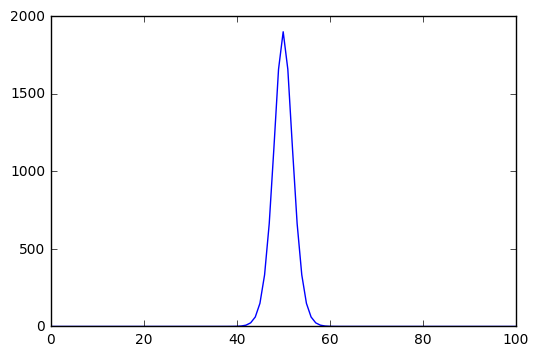

10000.0  10


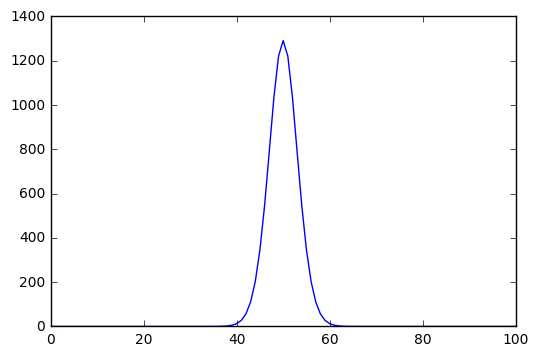

10000.0  20


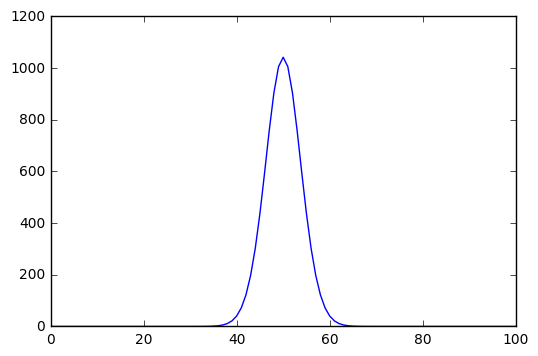

10000.0  30


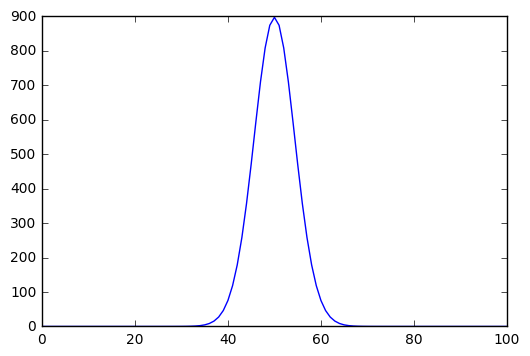

10000.0  40


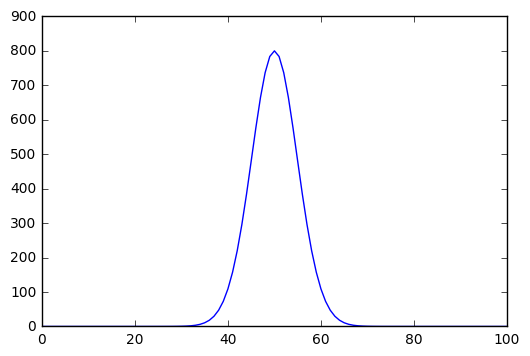

10000.0  50


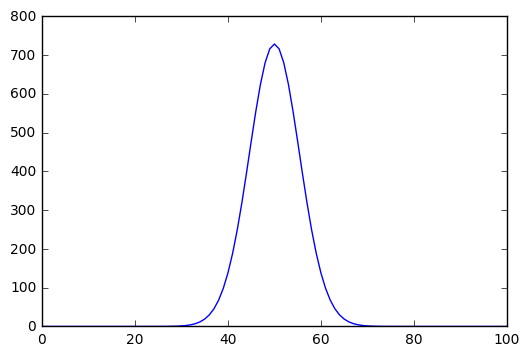

10000.0  60


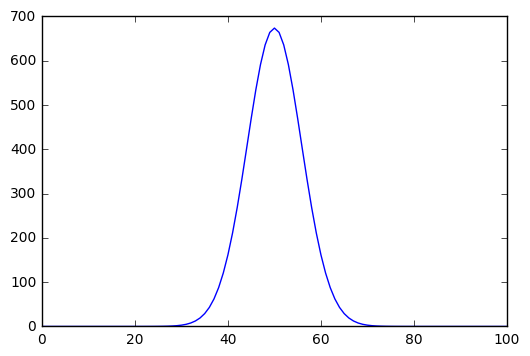

10000.0  70


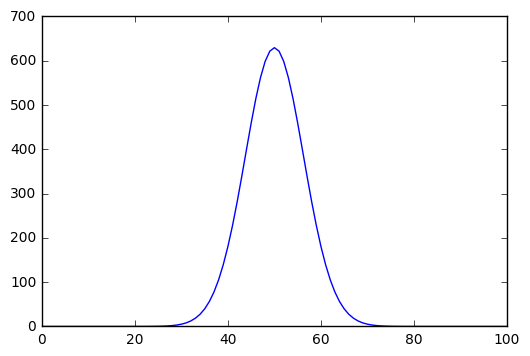

9999.99999999  80


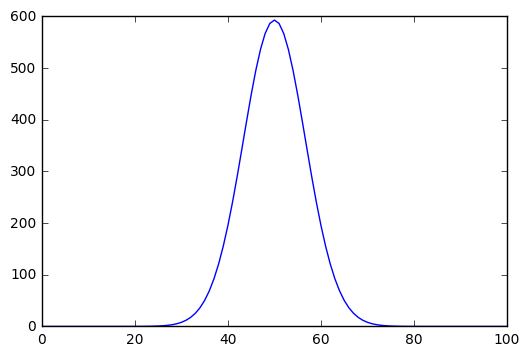

9999.99999991  90


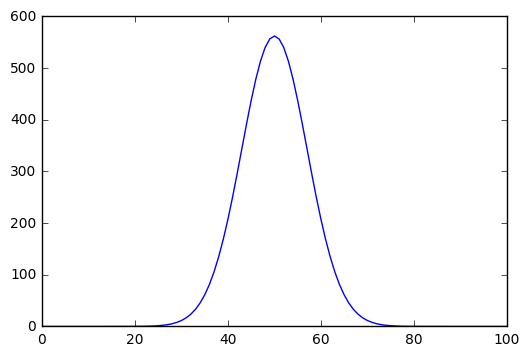

9999.99999941  100


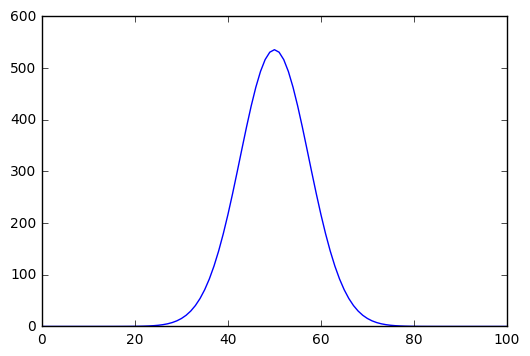

9999.99999693  110


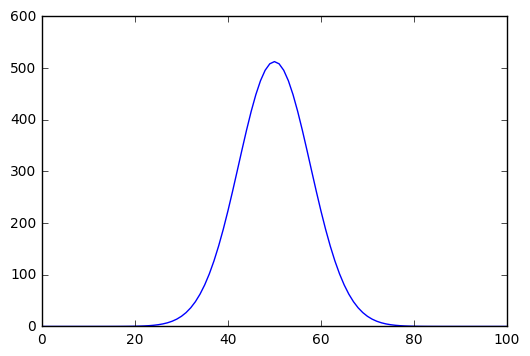

9999.99998711  120


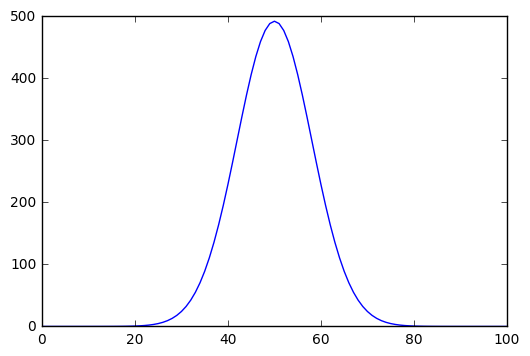

9999.99995442  130


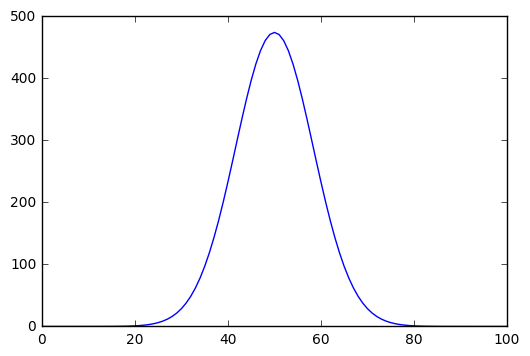

9999.9998603  140


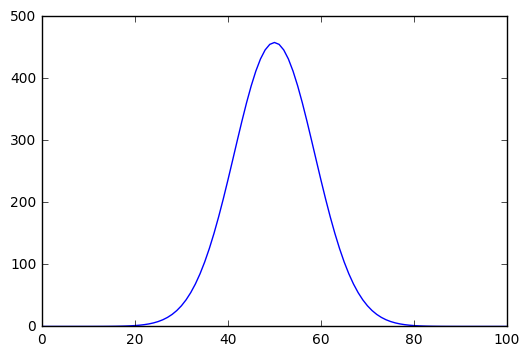

9999.99962065  150


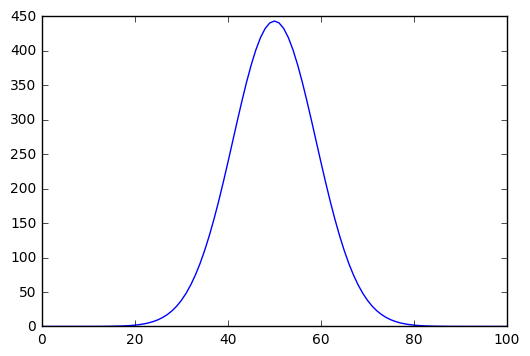

9999.99907055  160


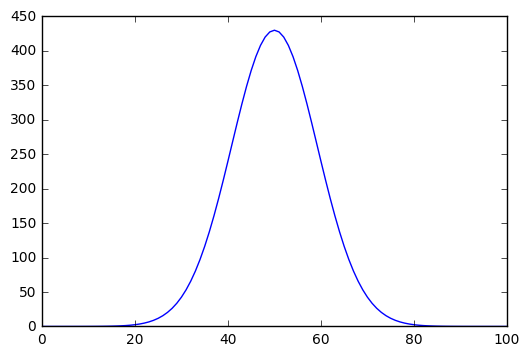

9999.99791488  170


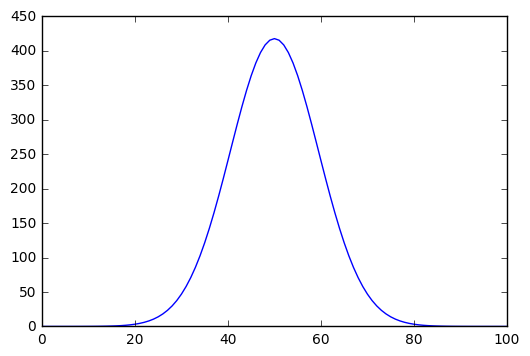

9999.99566481  180


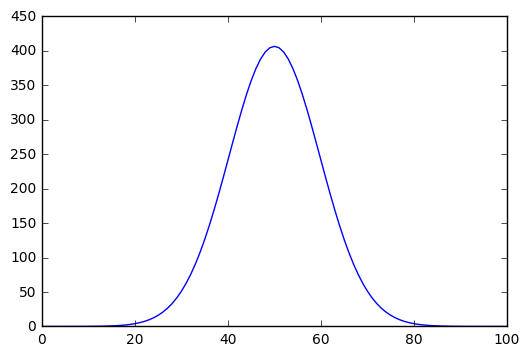

9999.99156269  190


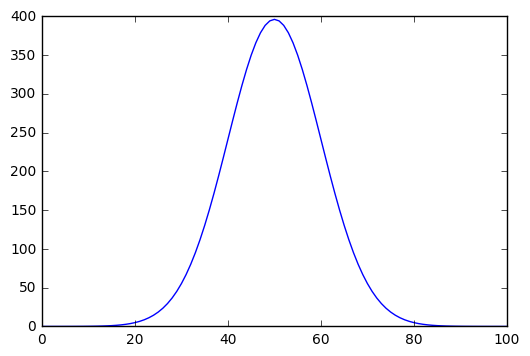

9999.98449922  200


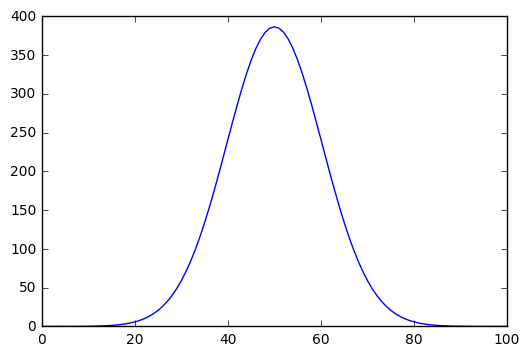

9999.97292839  210


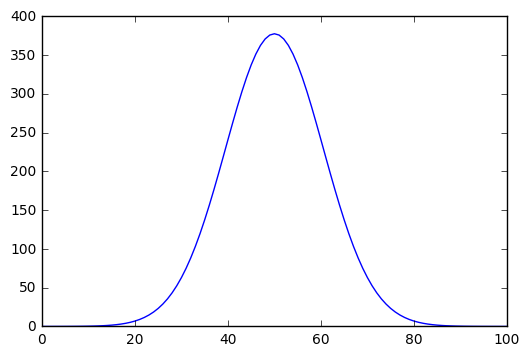

9999.95478586  220


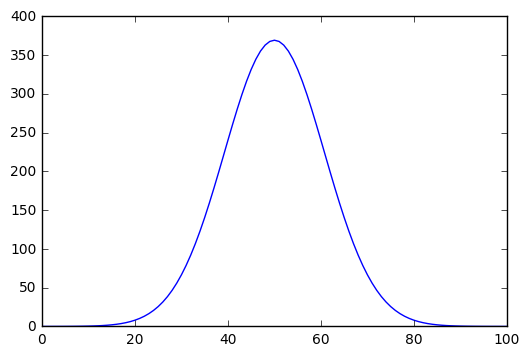

9999.92741624  230


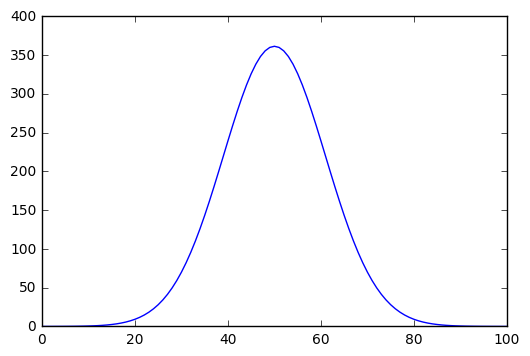

9999.88751397  240


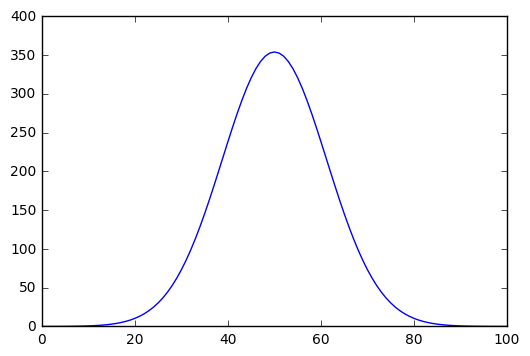

9999.83108097  250


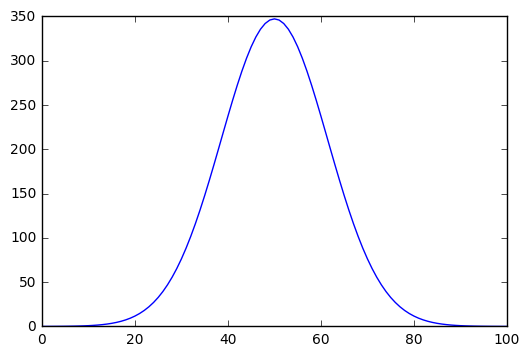

9999.75340331  260


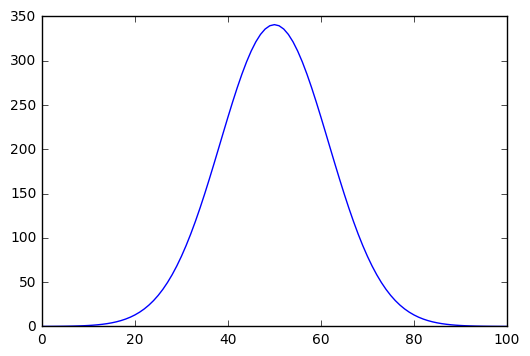

9999.64904727  270


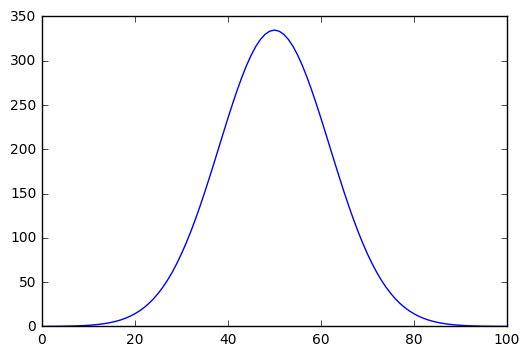

9999.51187445  280


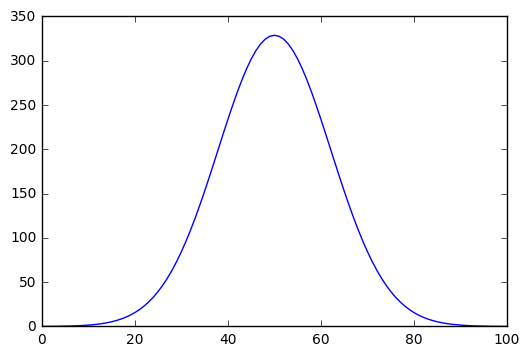

9999.33507433  290


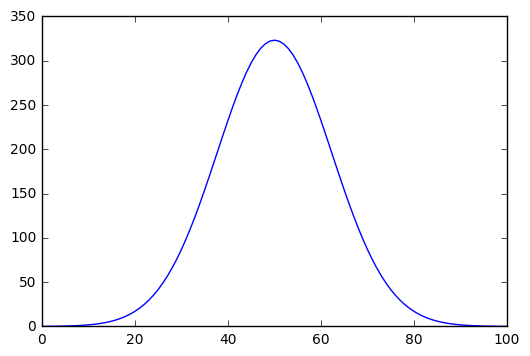

9999.11121211  300


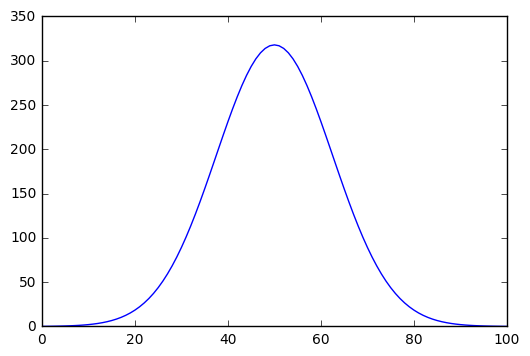

9998.83228925  310


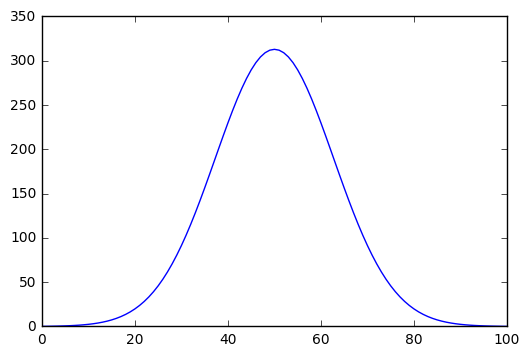

9998.48981382  320


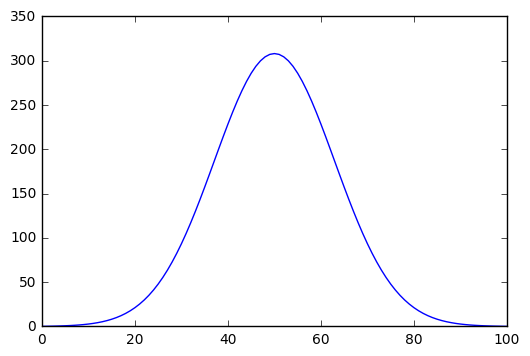

9998.07487799  330


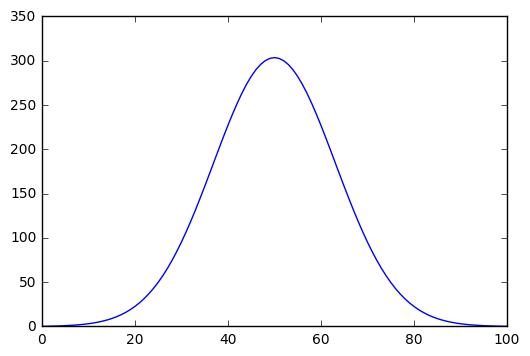

9997.57823978  340


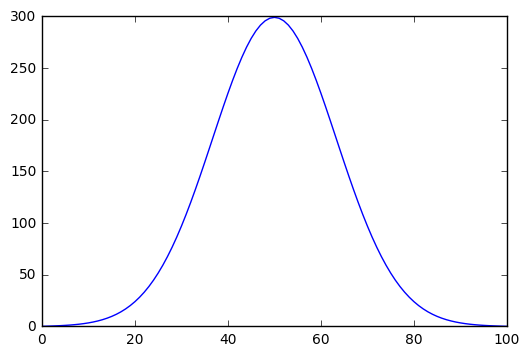

9996.99040682  350


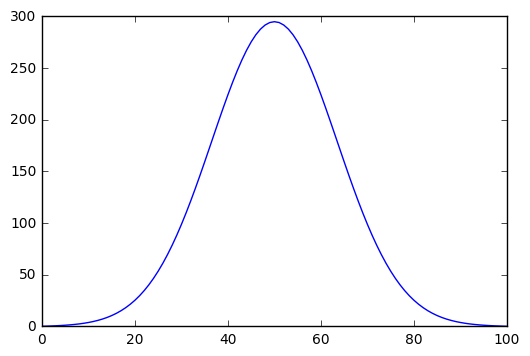

9996.30171985  360


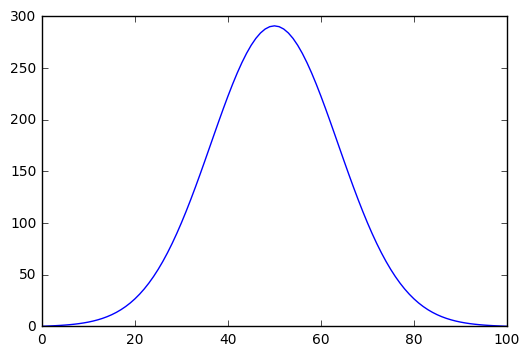

9995.50243417  370


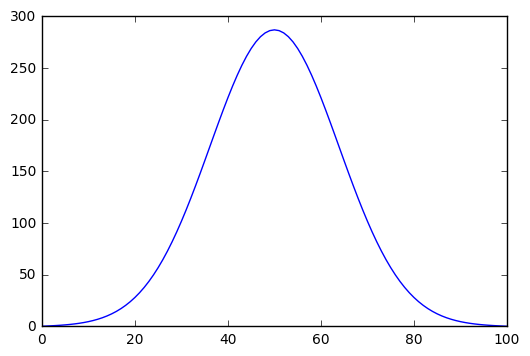

9994.58279757  380


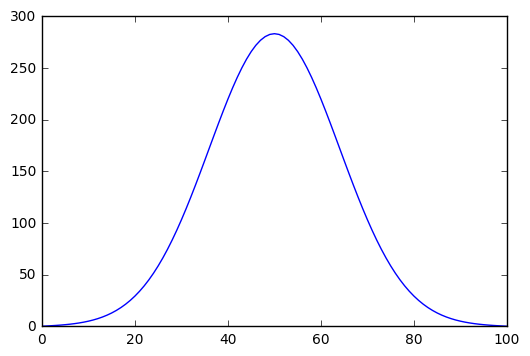

9993.53312363  390


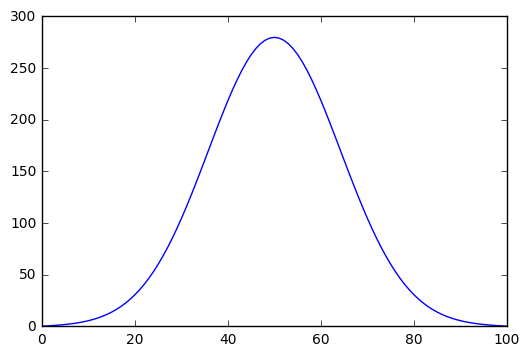

9992.34385945  400


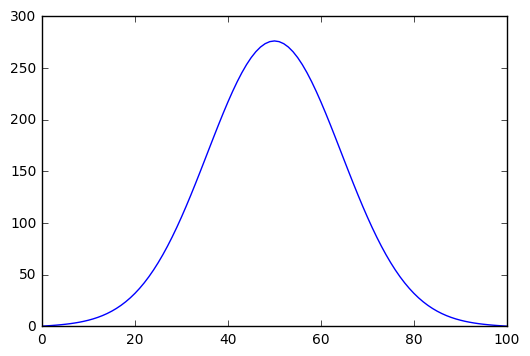

9991.00564727  410


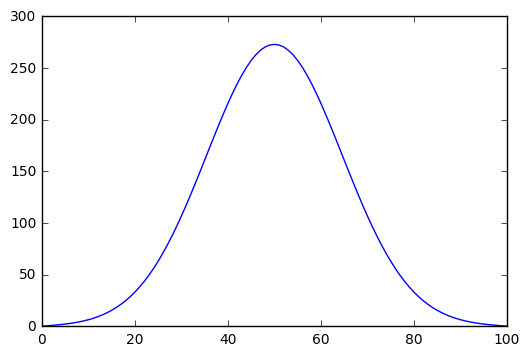

9989.50937975  420


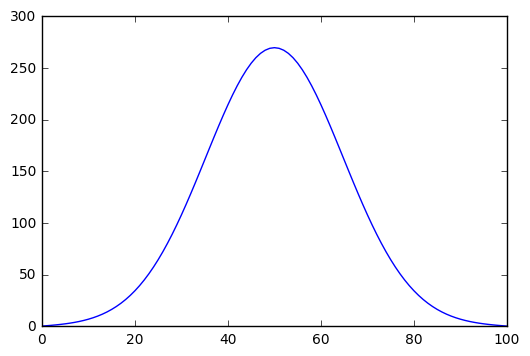

9987.84624852  430


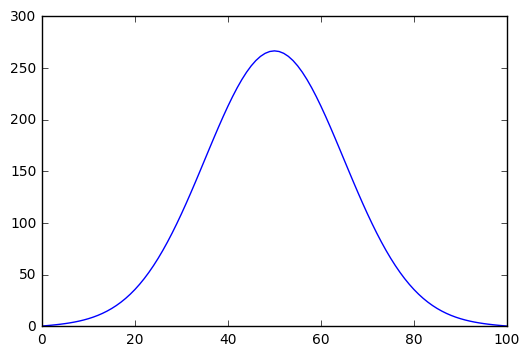

9986.00778626  440


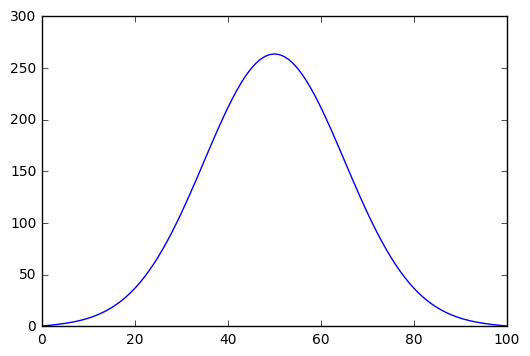

9983.98590235  450


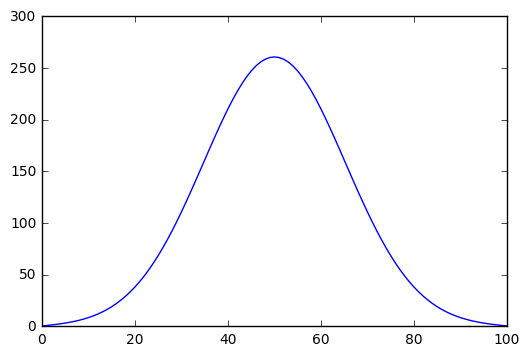

9981.77291235  460


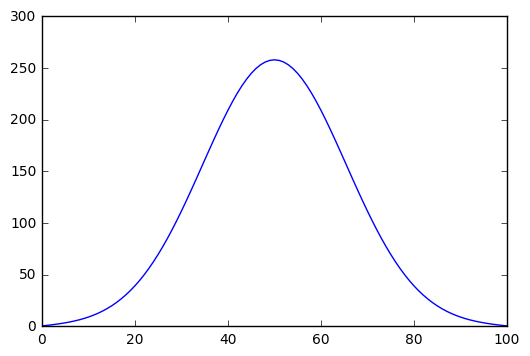

9979.3615617  470


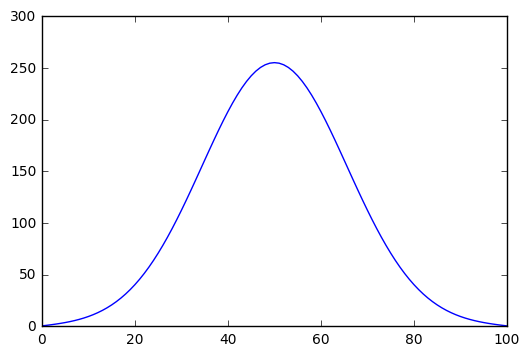

9976.74504389  480


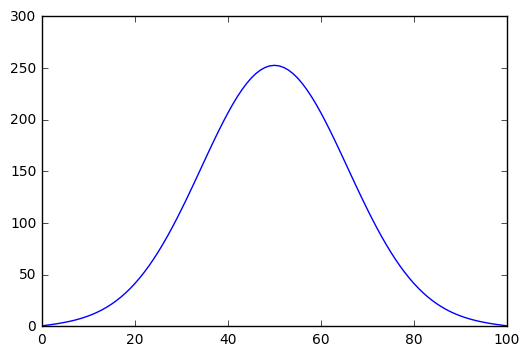

9973.91701374  490


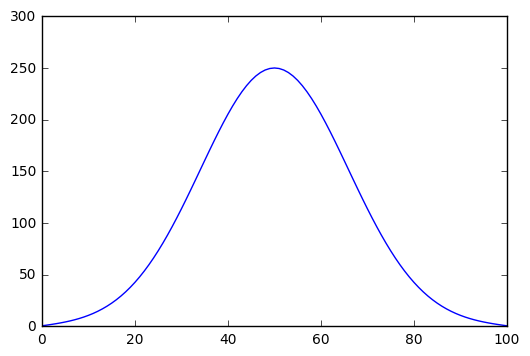

9970.87159599  500


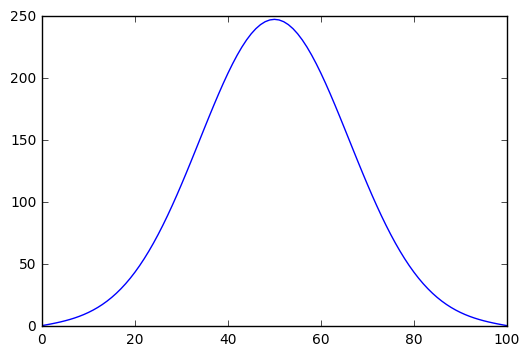

9967.60338981  510


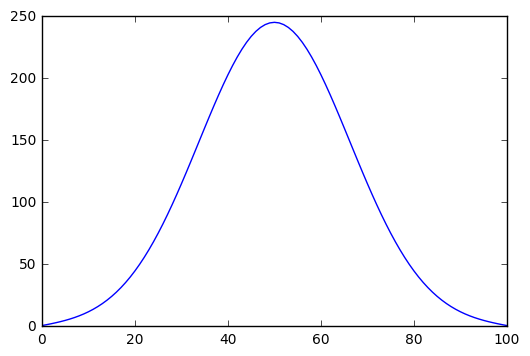

9964.10746958  520


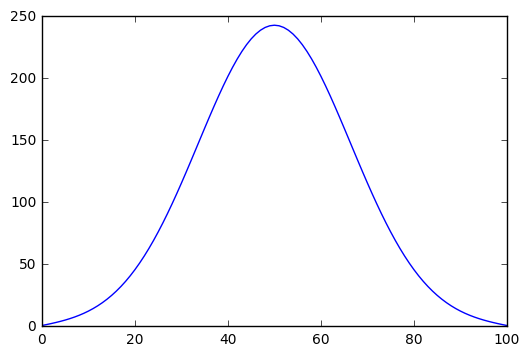

9960.37938242  530


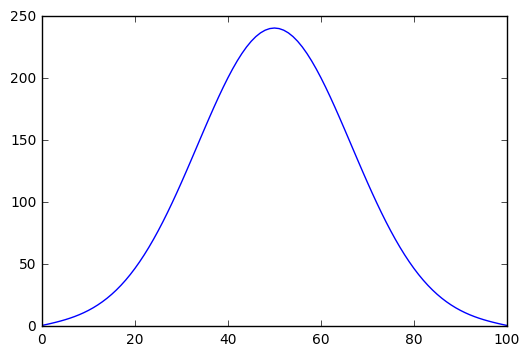

9956.41514283  540


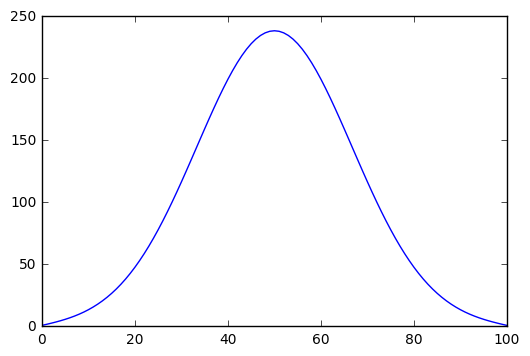

9952.21122488  550


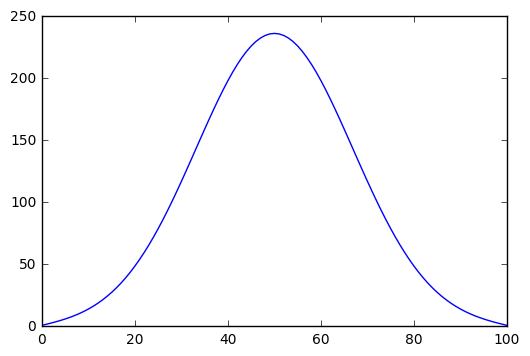

9947.76455224  560


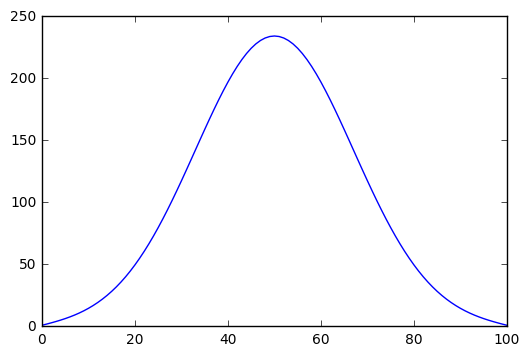

9943.07248646  570


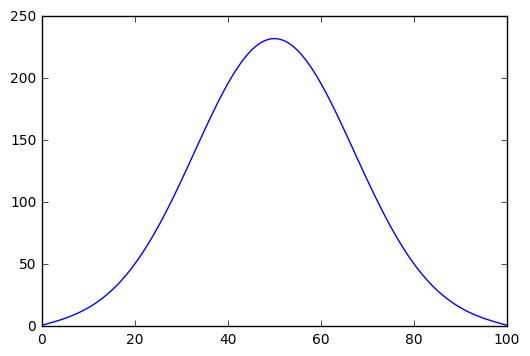

9938.13281375  580


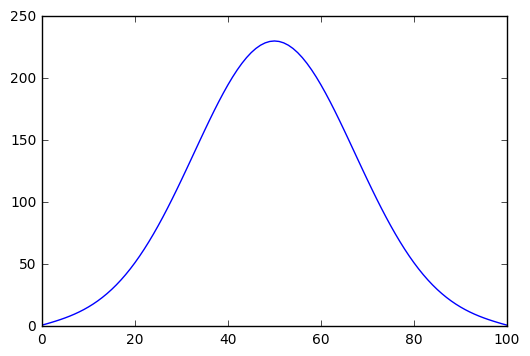

9932.94373054  590


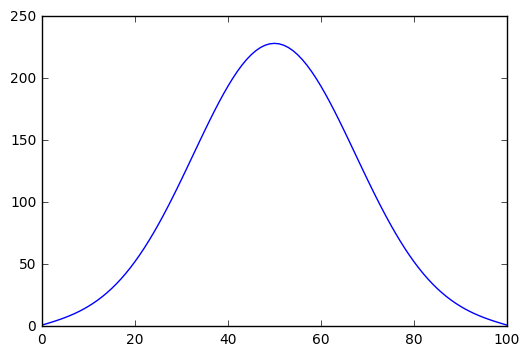

9927.50382814  600


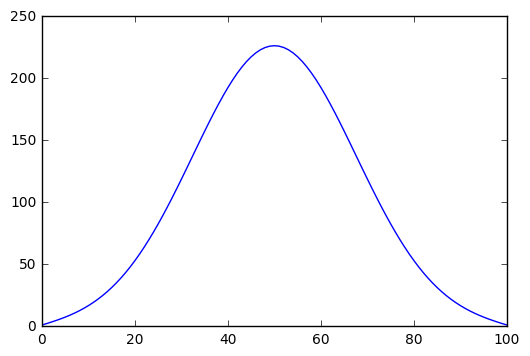

9921.81207664  610


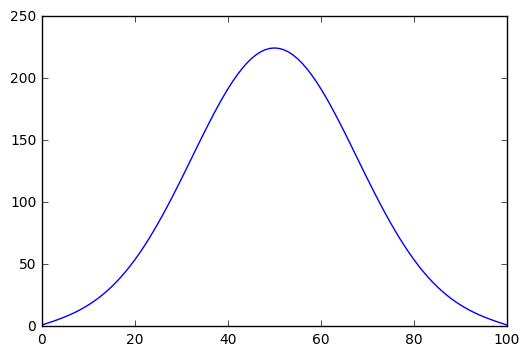

9915.8678083  620


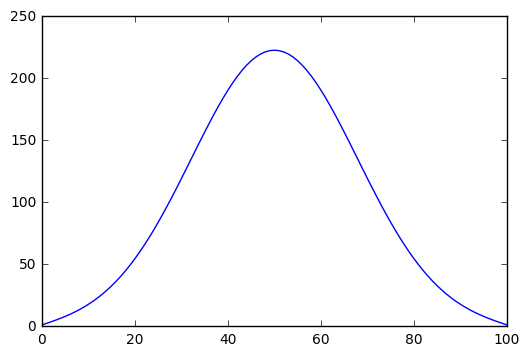

9909.67070057  630


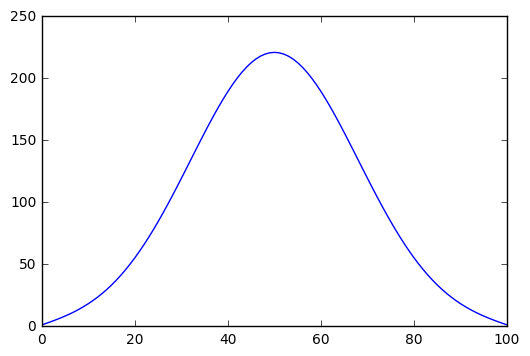

9903.220759  640


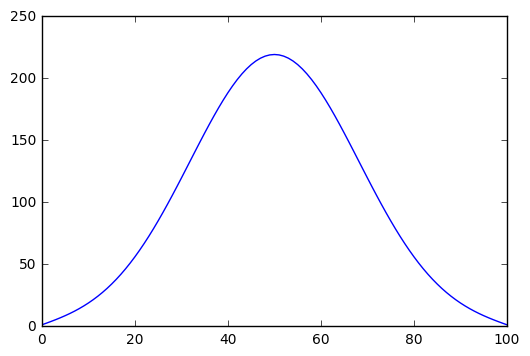

9896.51829999  650


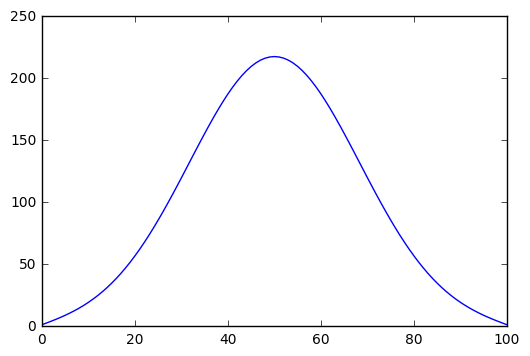

9889.5639337  660


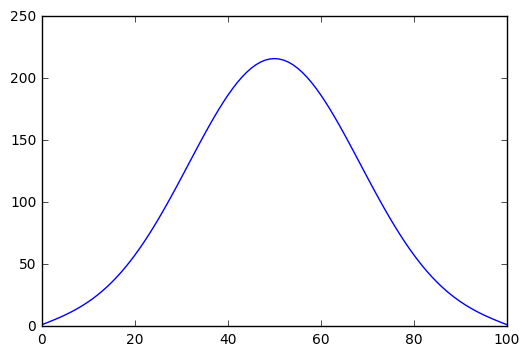

9882.35854711  670


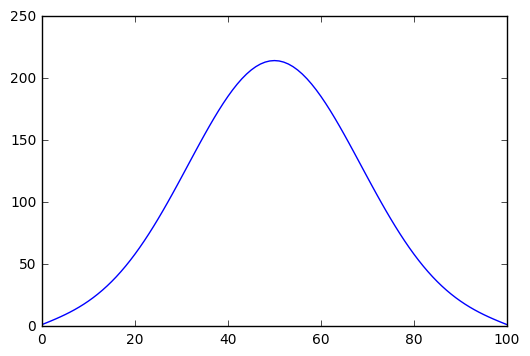

9874.9032873  680


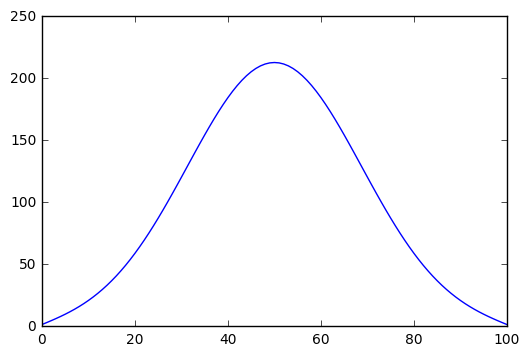

9867.19954508  690


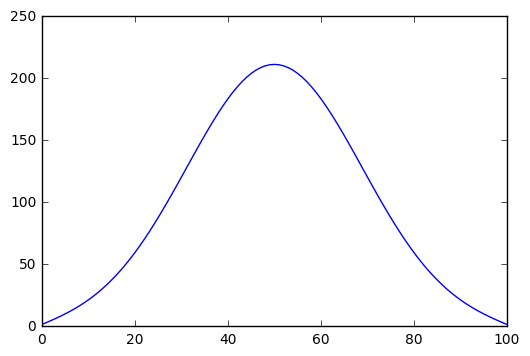

9859.24893903  700


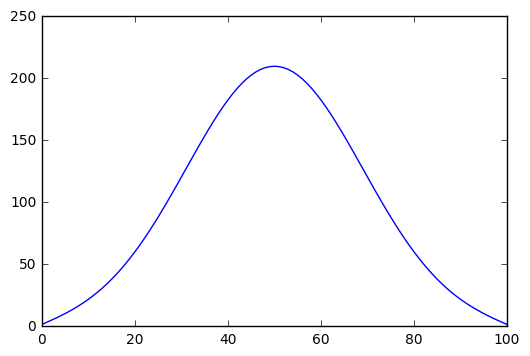

9851.05329993  710


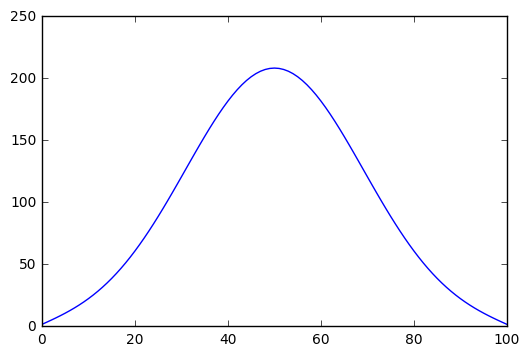

9842.61465574  720


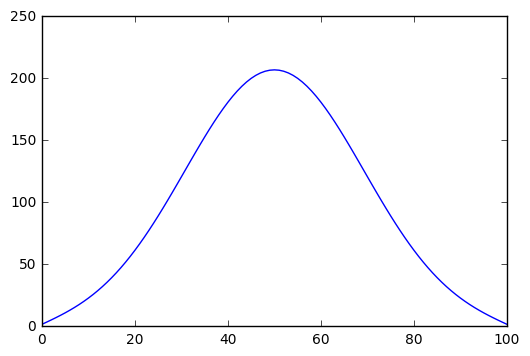

9833.935217  730


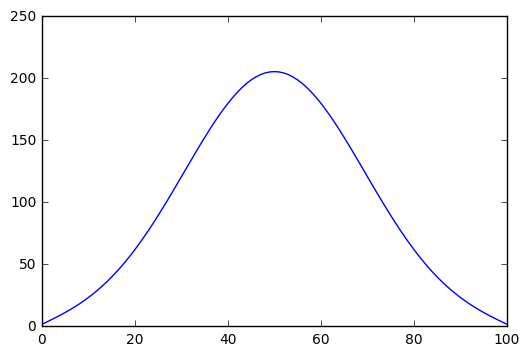

9825.01736279  740


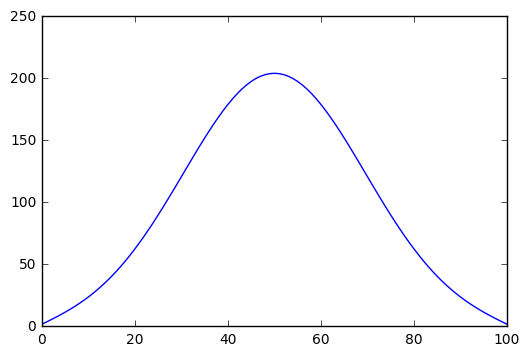

9815.86362728  750


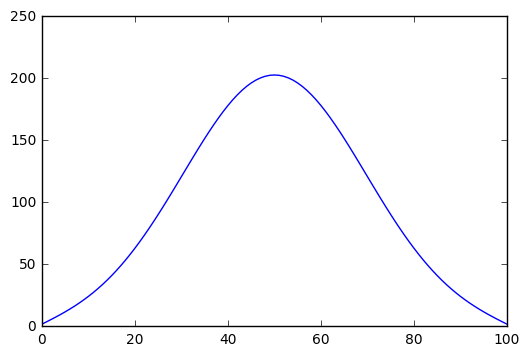

9806.47668679  760


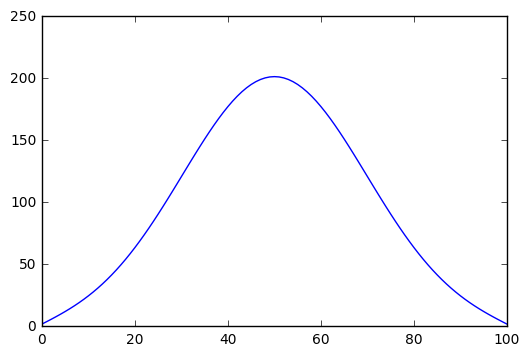

9796.85934739  770


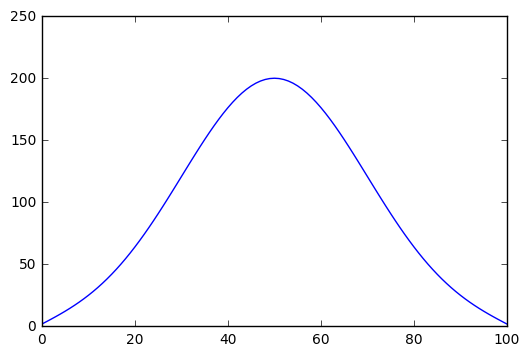

9787.01453311  780


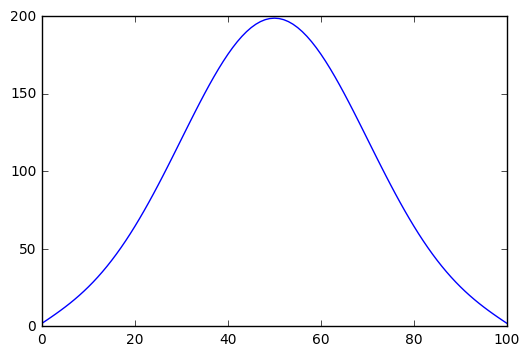

9776.94527471  790


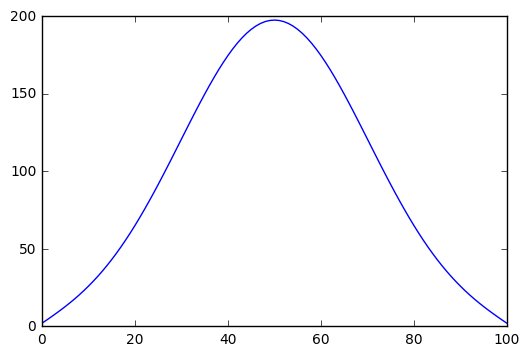

9766.65469892  800


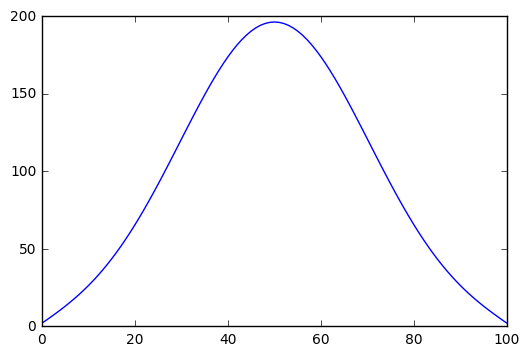

9756.14601834  810


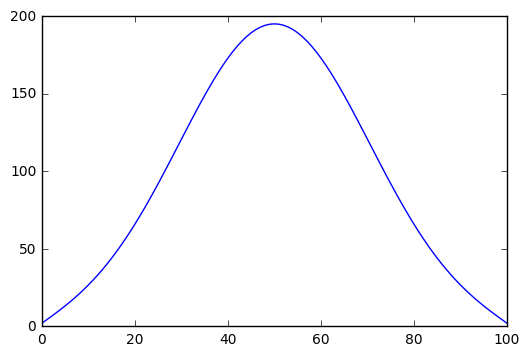

9745.42252175  820


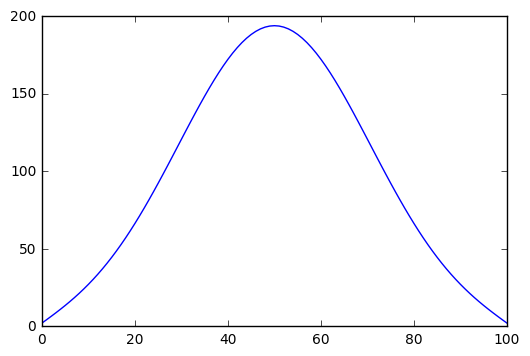

9734.48756508  830


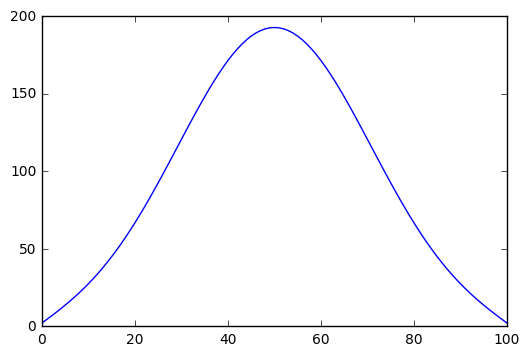

9723.34456273  840


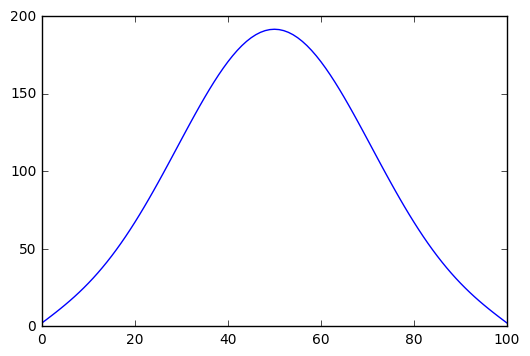

9711.99697951  850


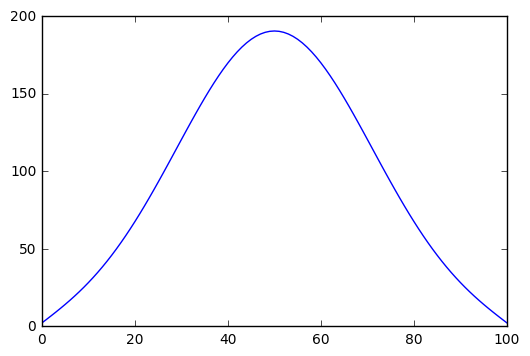

9700.44832297  860


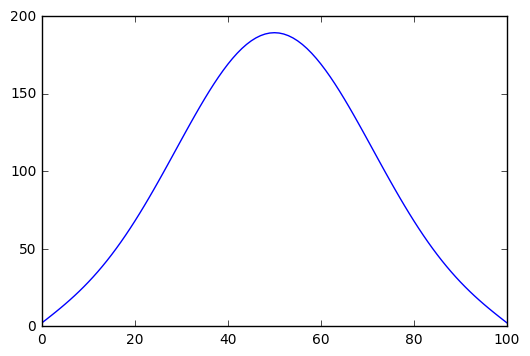

9688.70213622  870


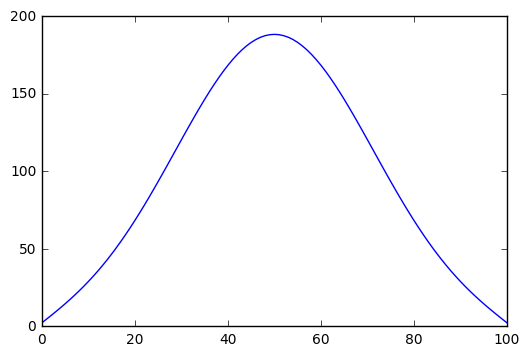

9676.7619912  880


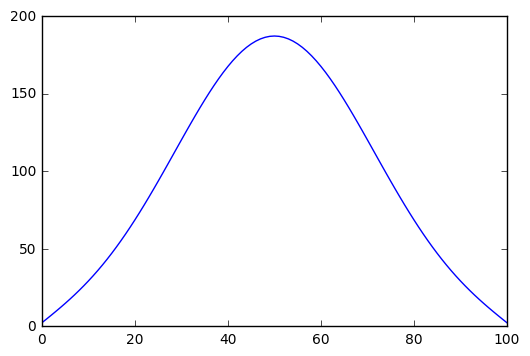

9664.63148235  890


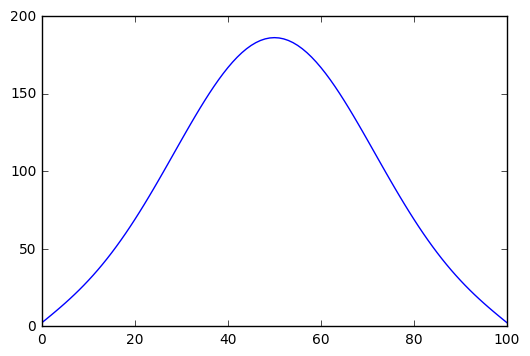

9652.31422071  900


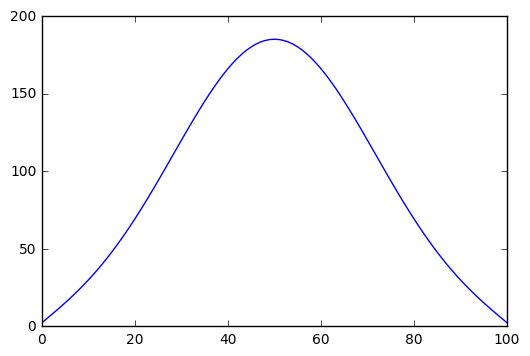

9639.81382835  910


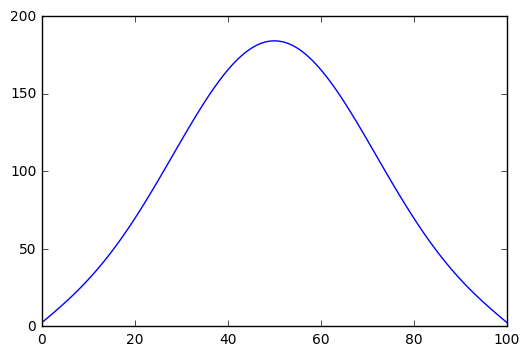

9627.13393326  920


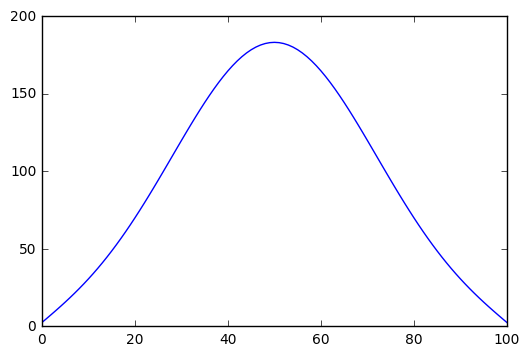

9614.27816451  930


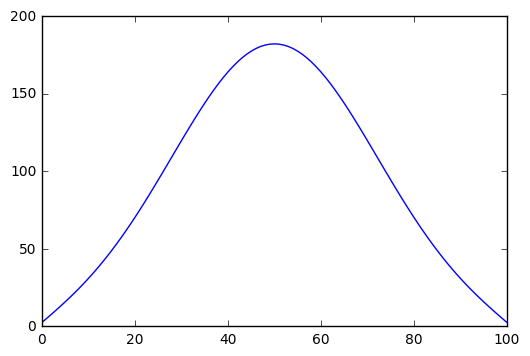

9601.25014782  940


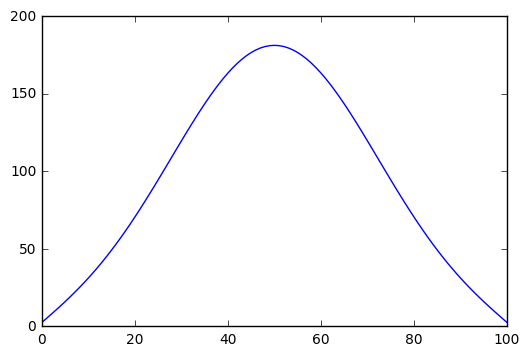

9588.05350135  950


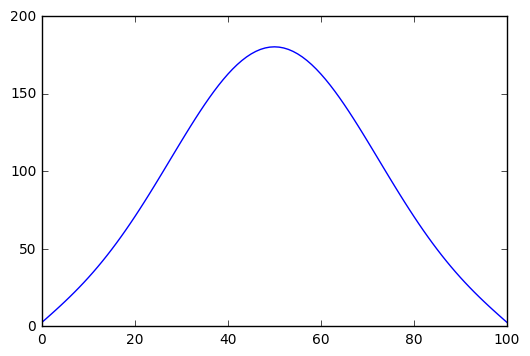

9574.69183192  960


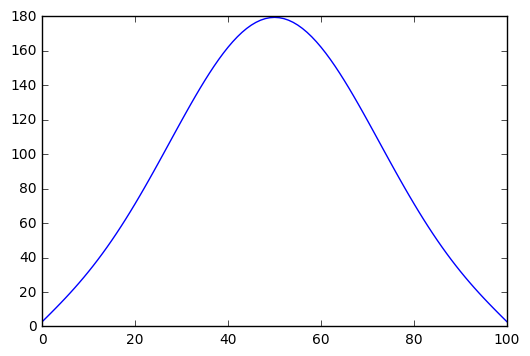

9561.16873142  970


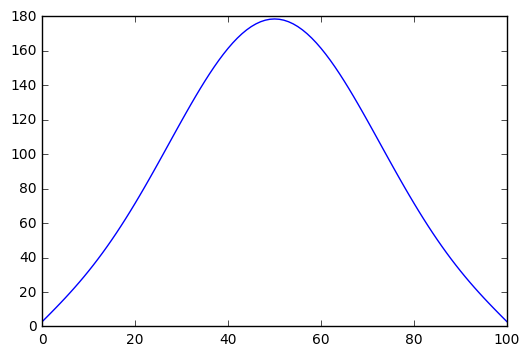

9547.48777352  980


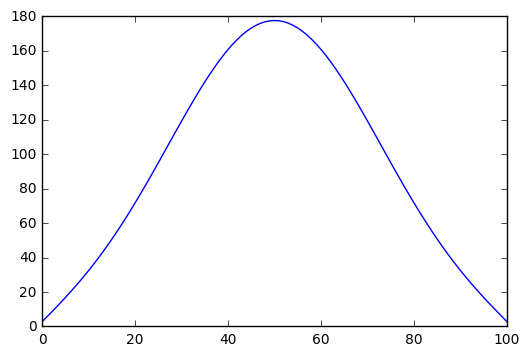

9533.65251067  990


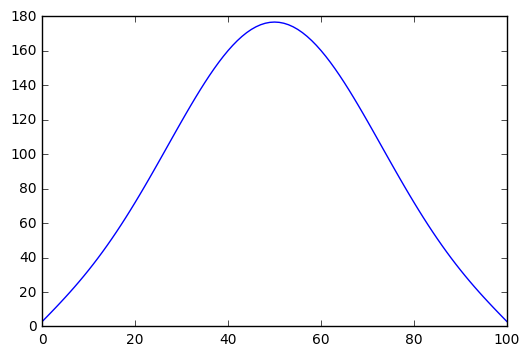

9519.6664713  1000


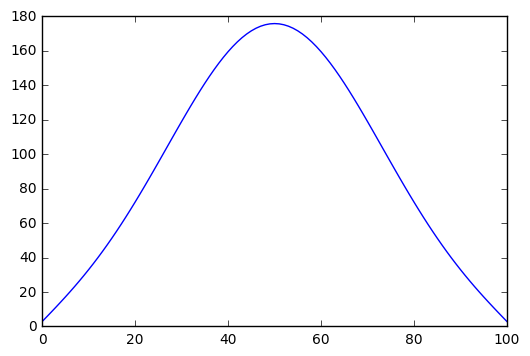

9505.53315728  1010


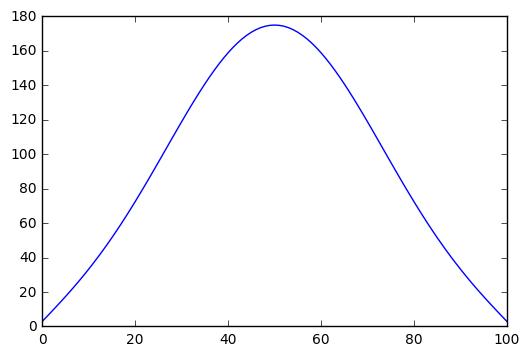

9491.2560416  1020


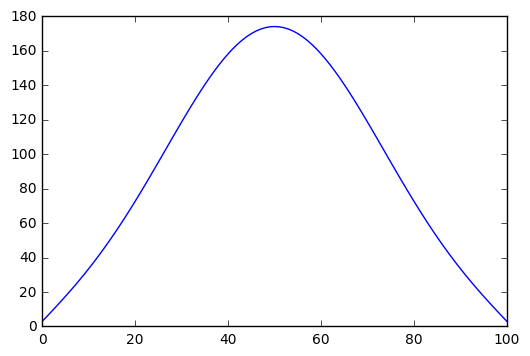

9476.83856622  1030


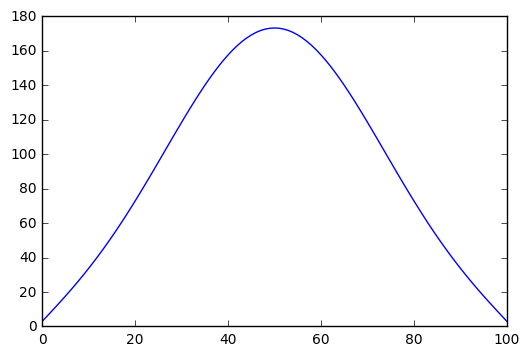

9462.28414016  1040


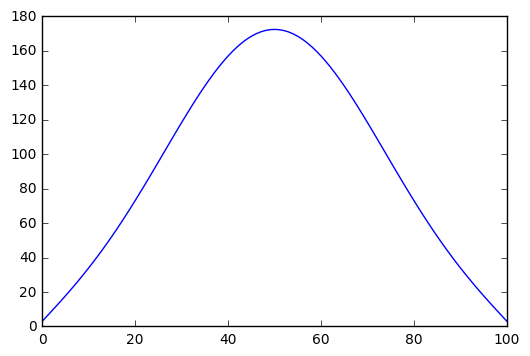

9447.59613774  1050


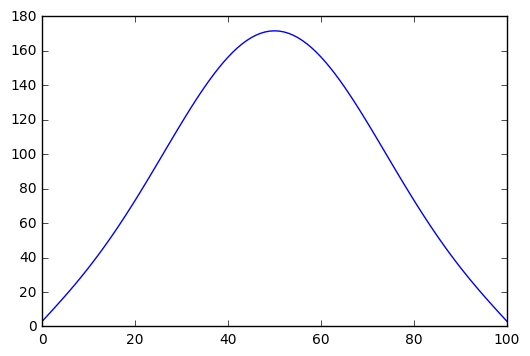

9432.77789701  1060


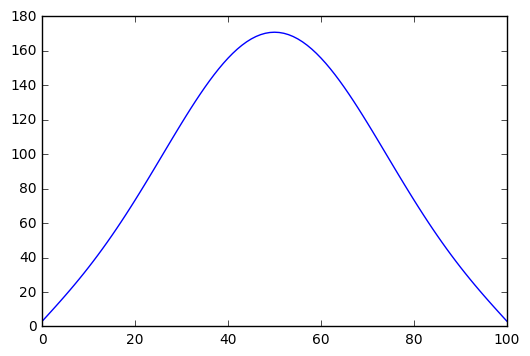

9417.83271832  1070


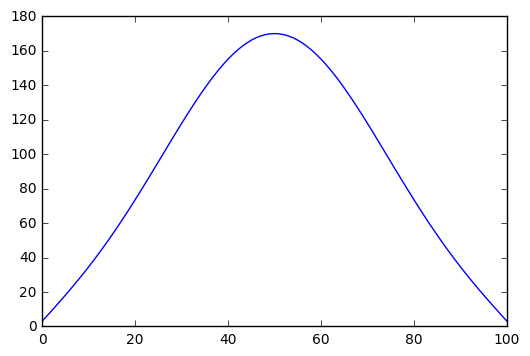

9402.76386307  1080


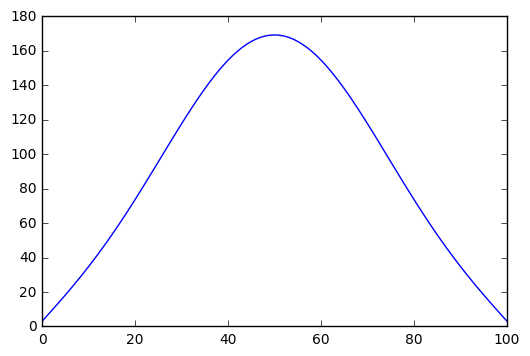

9387.5745526  1090


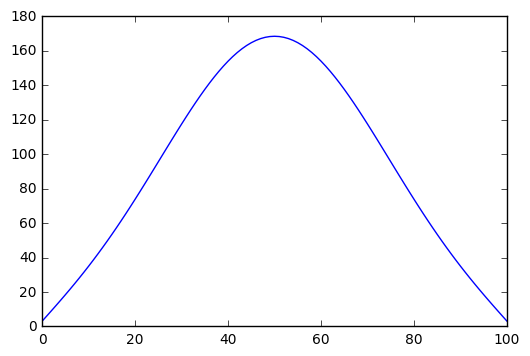

9372.26796714  1100


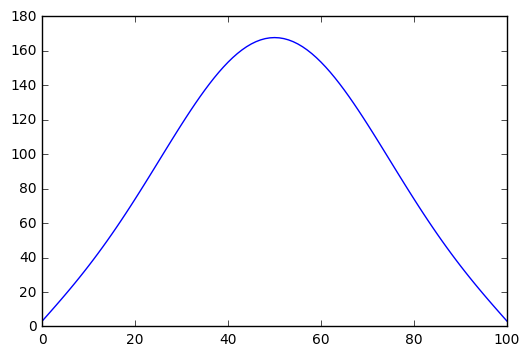

9356.84724503  1110


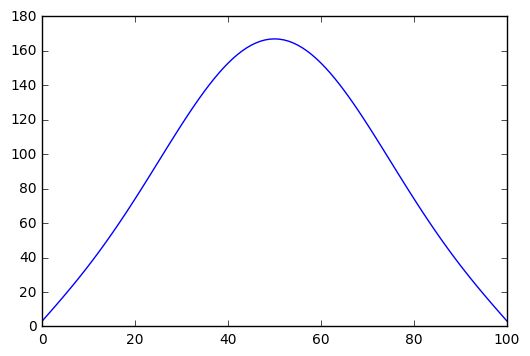

9341.31548189  1120


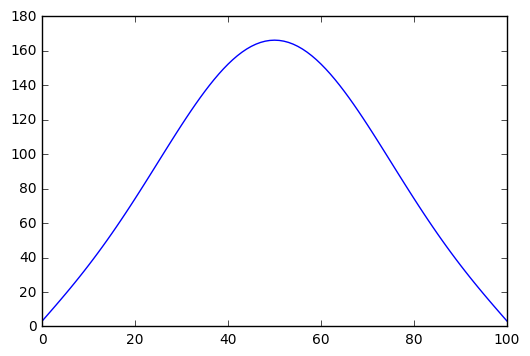

9325.67573002  1130


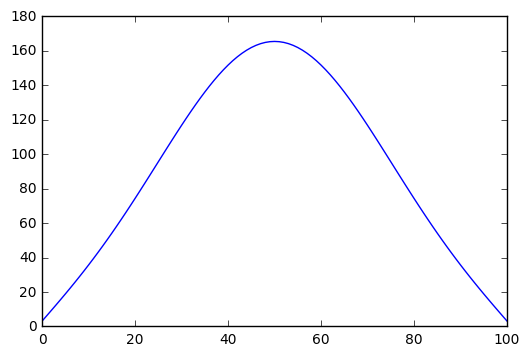

9309.93099786  1140


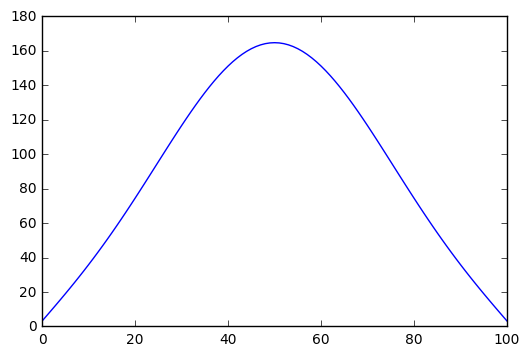

9294.08424953  1150


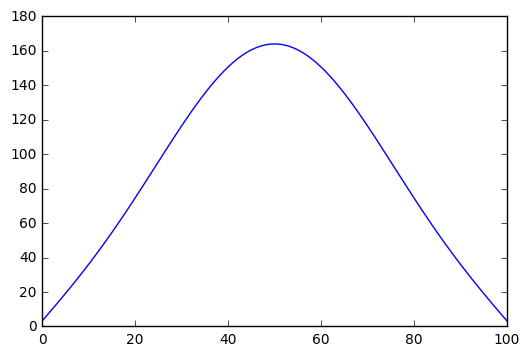

9278.13840446  1160


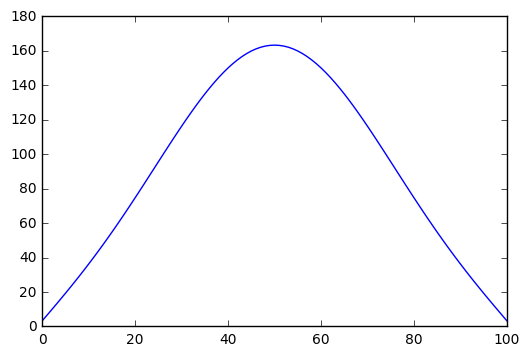

9262.09633716  1170


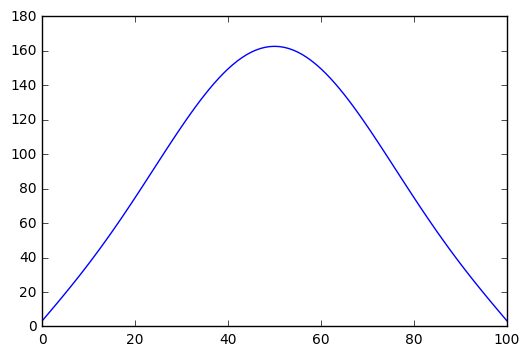

9245.96087696  1180


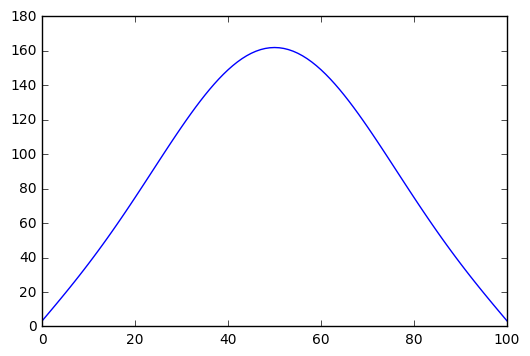

9229.73480795  1190


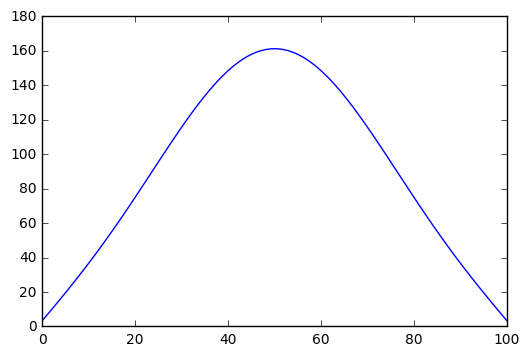

9213.42086882  1200


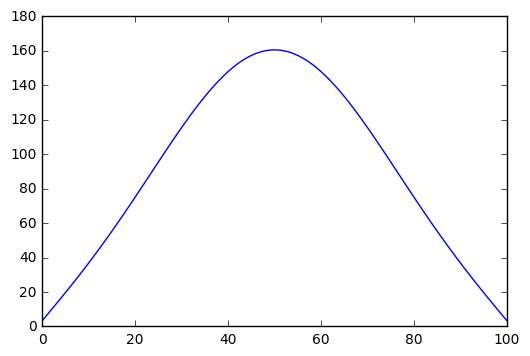

9197.02175297  1210


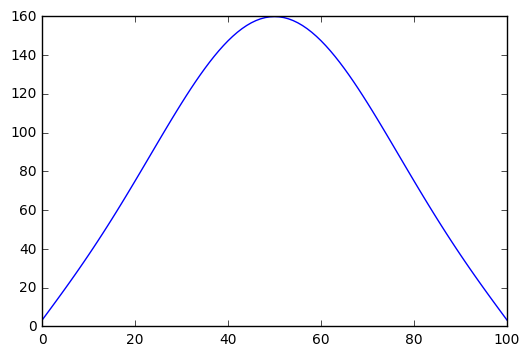

9180.54010847  1220


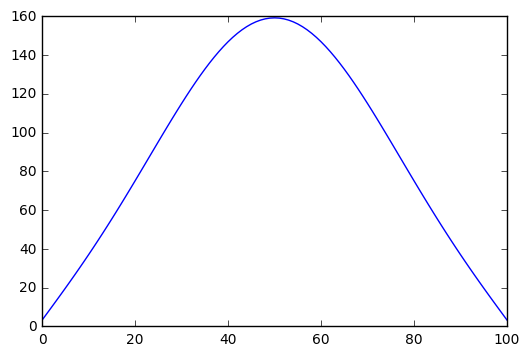

9163.9785382  1230


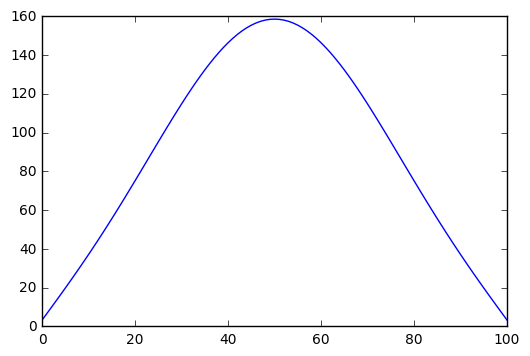

9147.33960002  1240


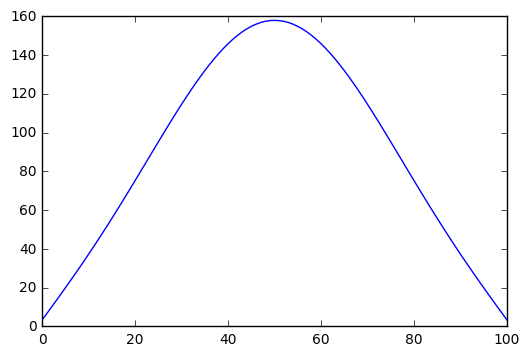

9130.62580693  1250


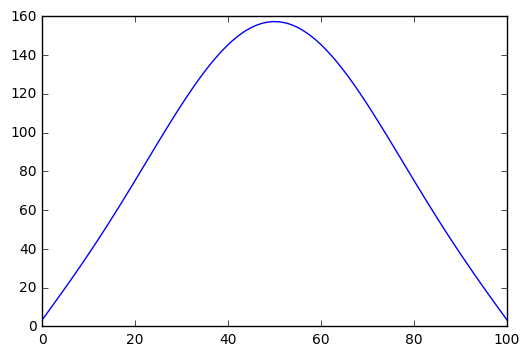

9113.83962733  1260


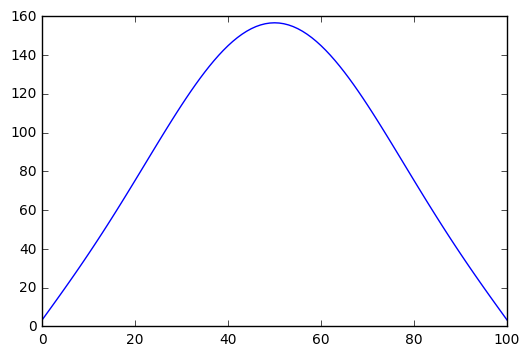

9096.98348528  1270


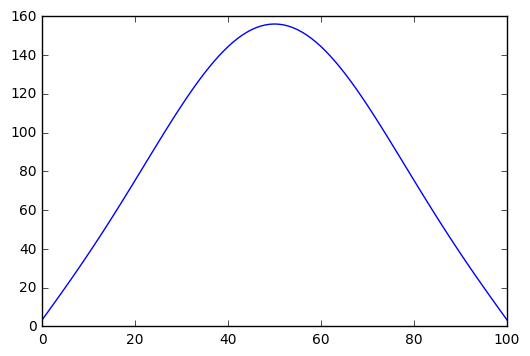

9080.05976082  1280


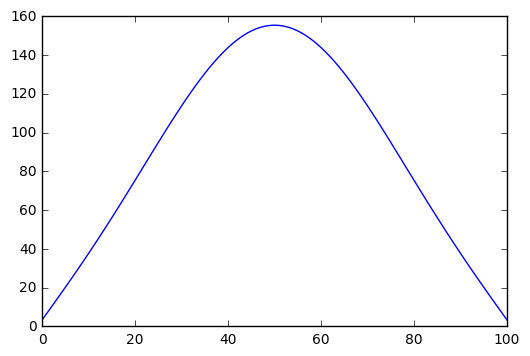

9063.0707903  1290


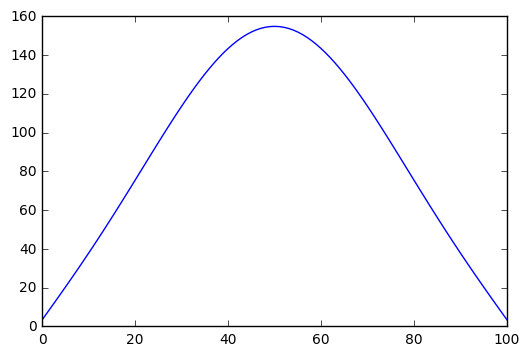

9046.01886672  1300


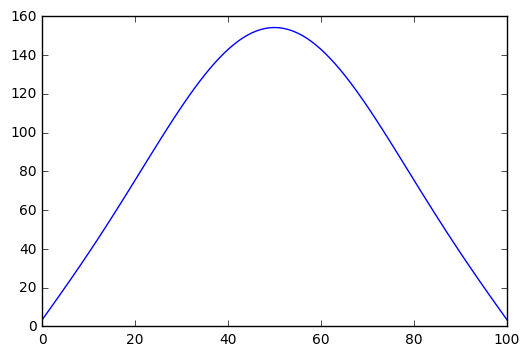

9028.90624019  1310


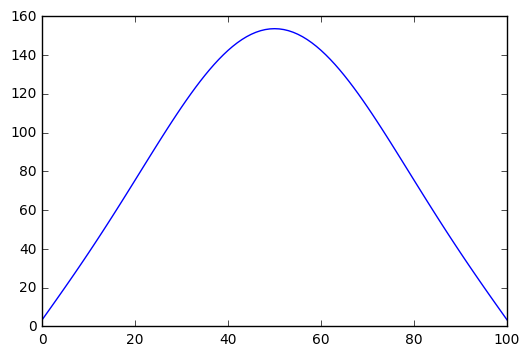

9011.73511827  1320


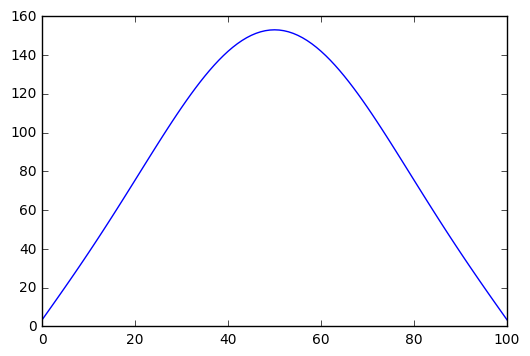

8994.50766643  1330


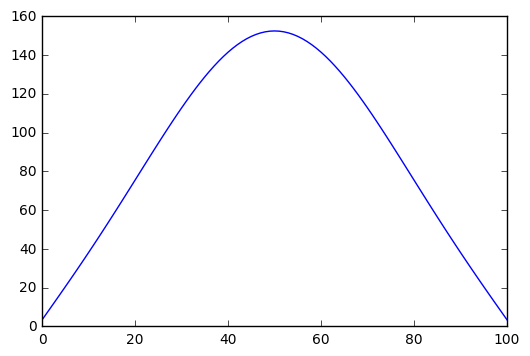

8977.22600854  1340


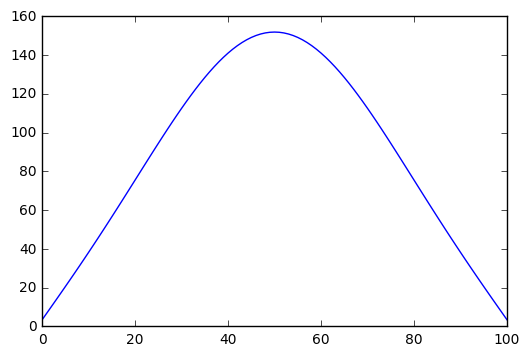

8959.89222728  1350


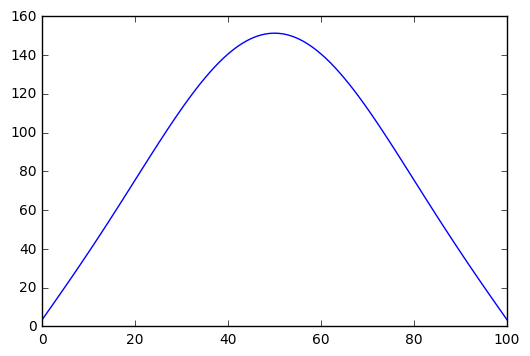

8942.50836466  1360


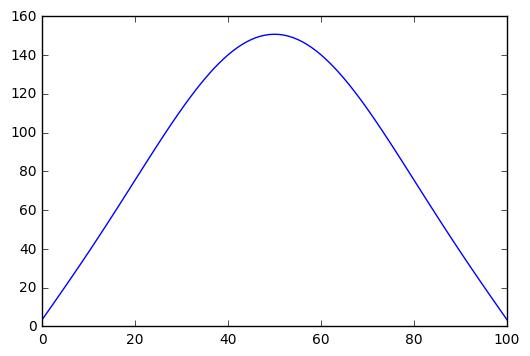

8925.07642252  1370


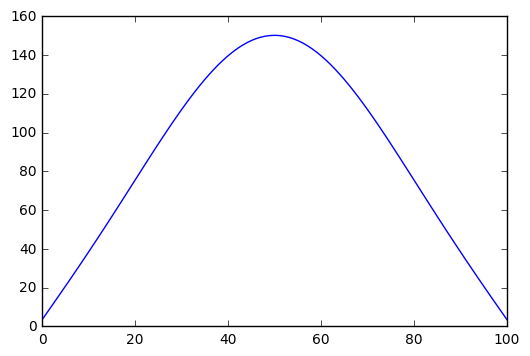

8907.59836302  1380


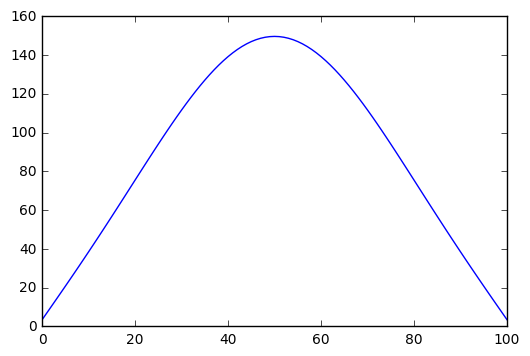

8890.07610918  1390


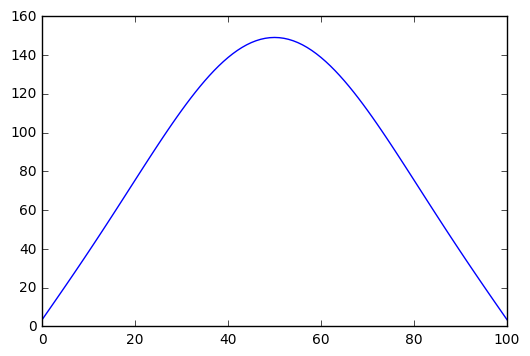

8872.51154538  1400


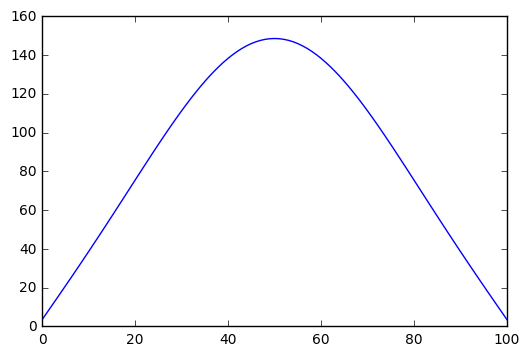

8854.90651794  1410


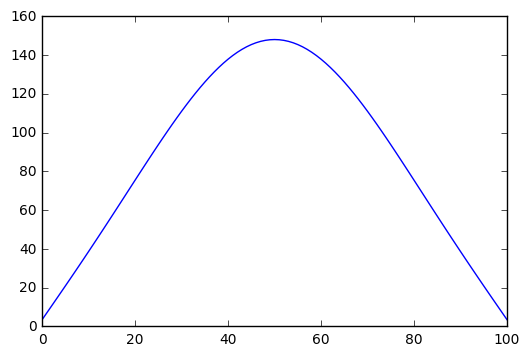

8837.26283559  1420


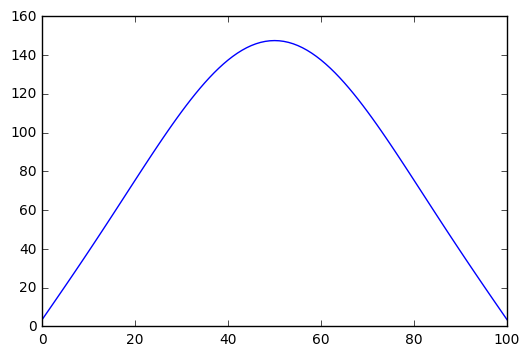

8819.58227011  1430


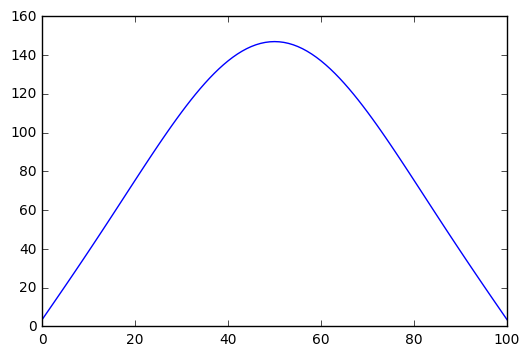

8801.86655678  1440


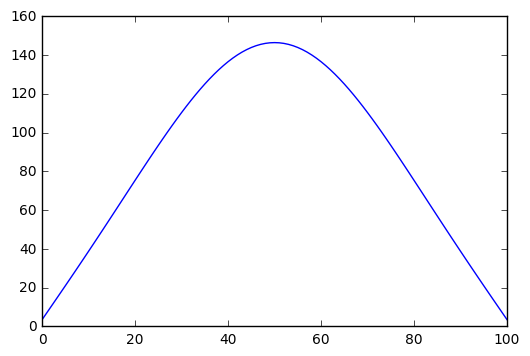

8784.11739501  1450


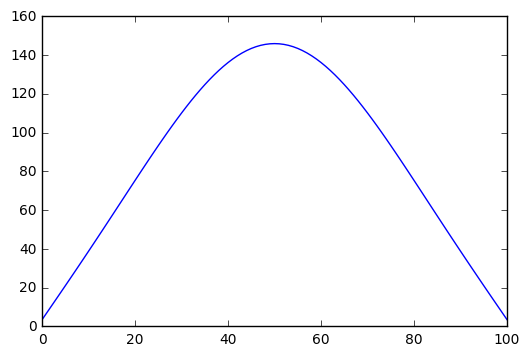

8766.33644885  1460


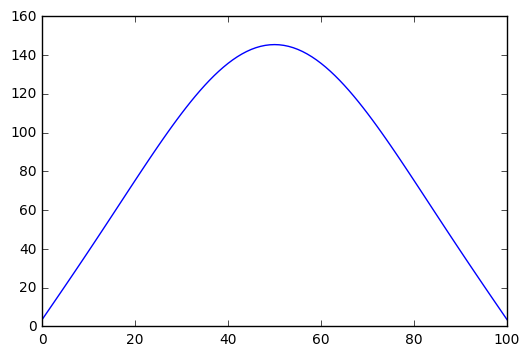

8748.52534756  1470


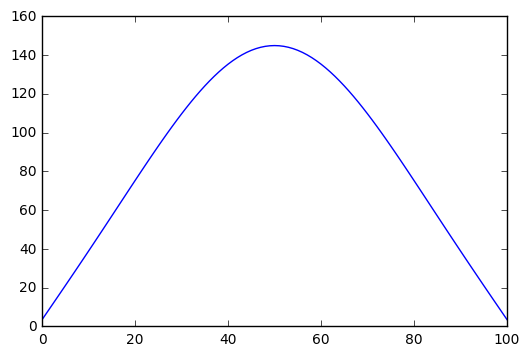

8730.68568617  1480


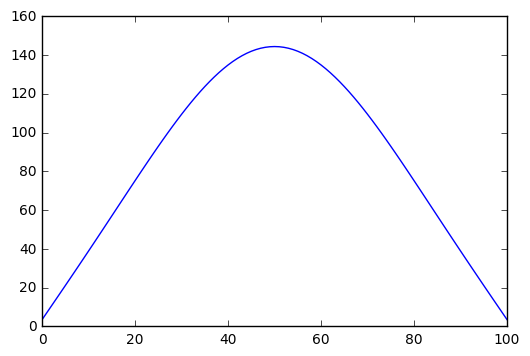

8712.81902603  1490


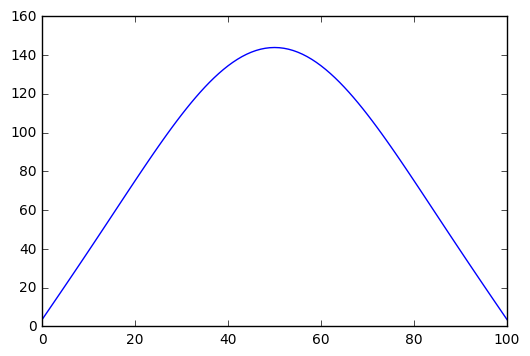

8694.92689534  1500


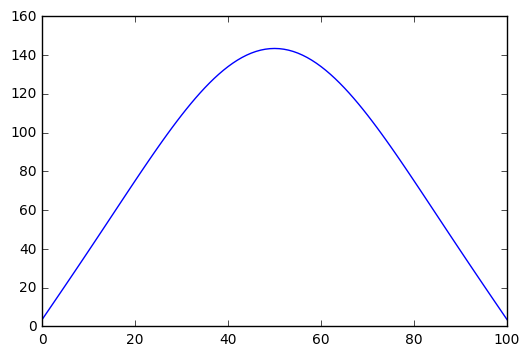

8677.01078975  1510


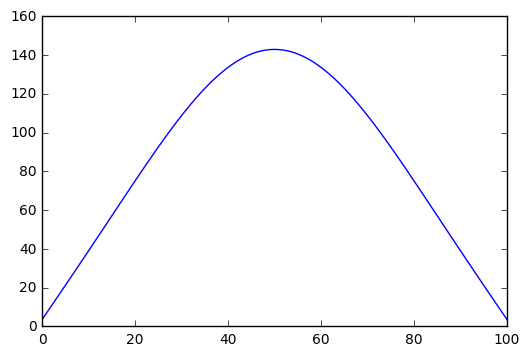

8659.07217288  1520


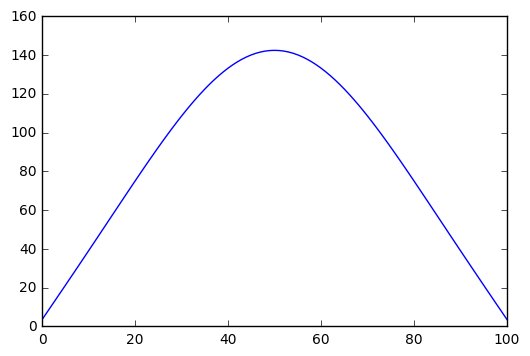

8641.11247687  1530


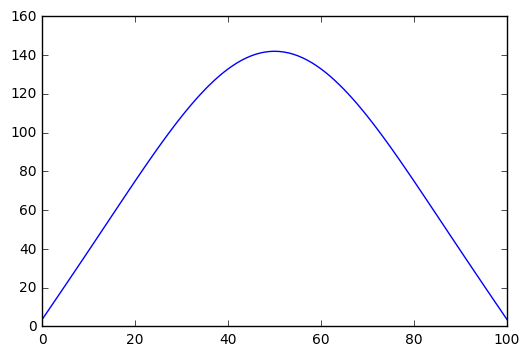

8623.13310291  1540


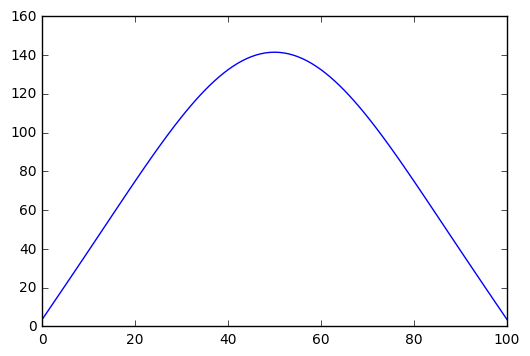

8605.13542182  1550


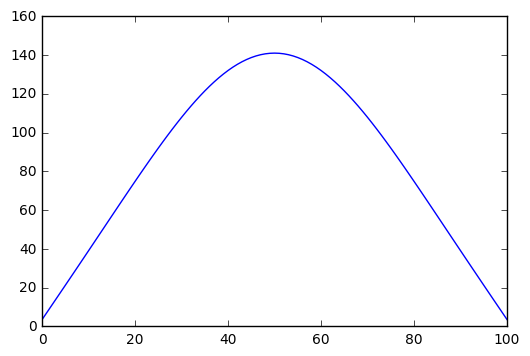

8587.12077454  1560


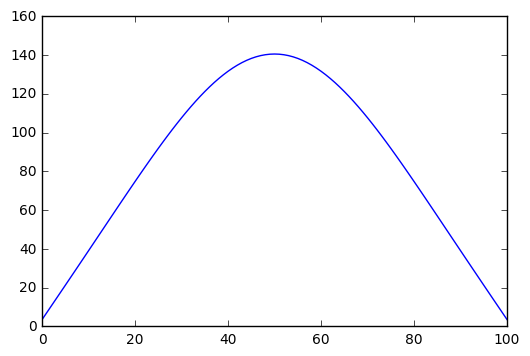

8569.09047272  1570


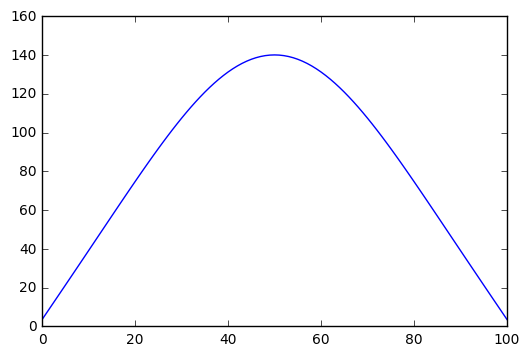

8551.04579916  1580


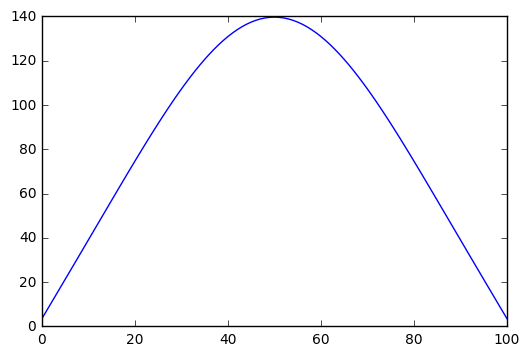

8532.98800843  1590


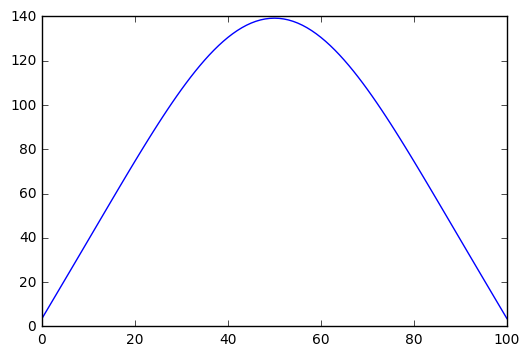

8514.91832731  1600


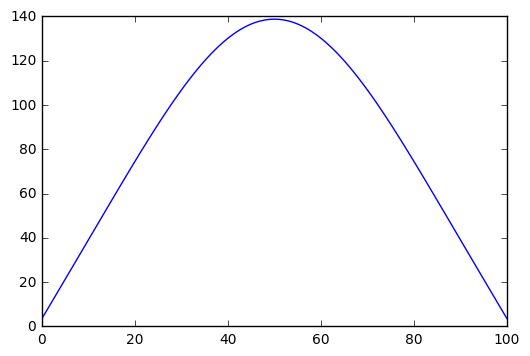

8496.83795535  1610


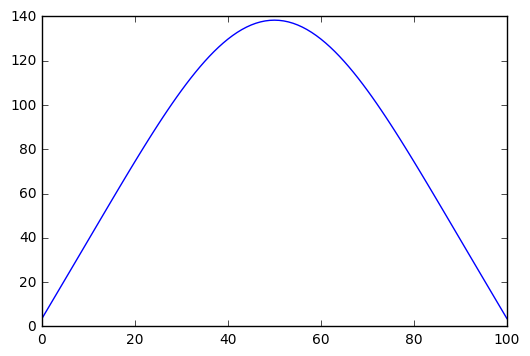

8478.74806534  1620


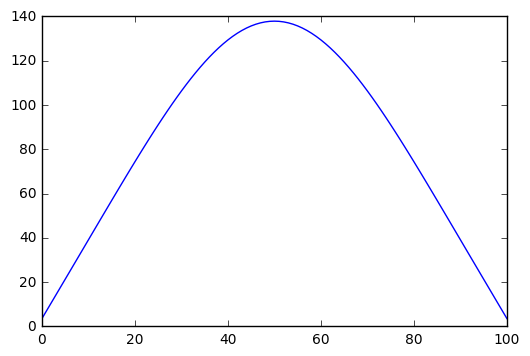

8460.64980384  1630


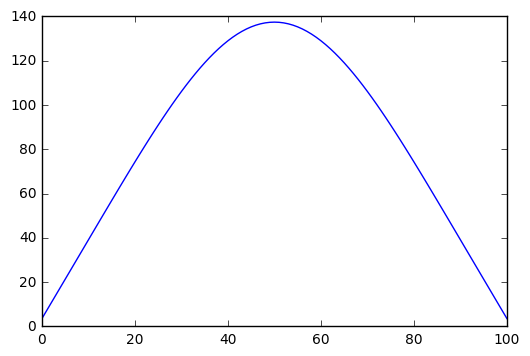

8442.54429167  1640


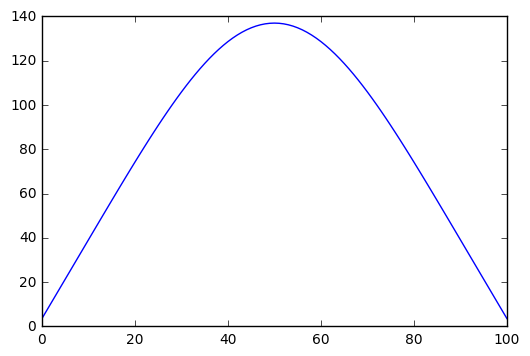

8424.43262437  1650


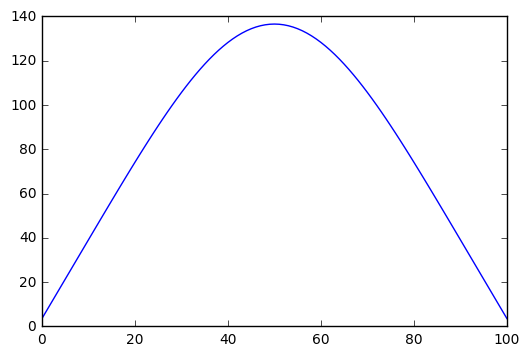

8406.3158727  1660


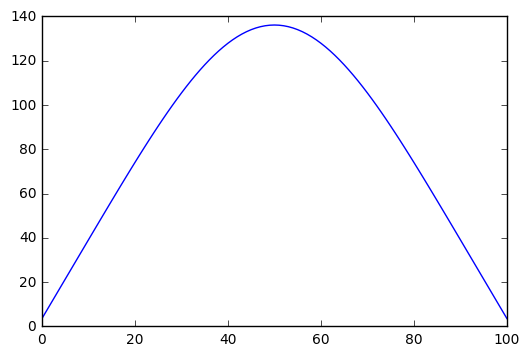

8388.19508313  1670


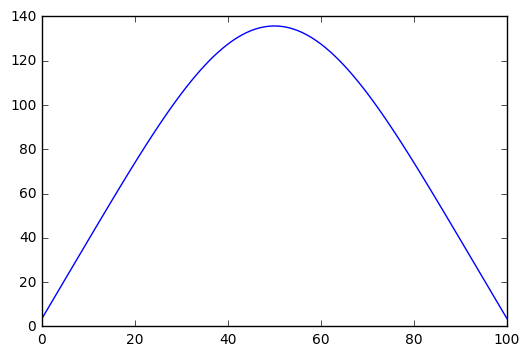

8370.07127828  1680


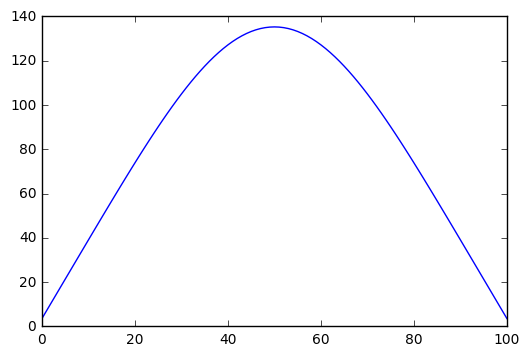

8351.94545741  1690


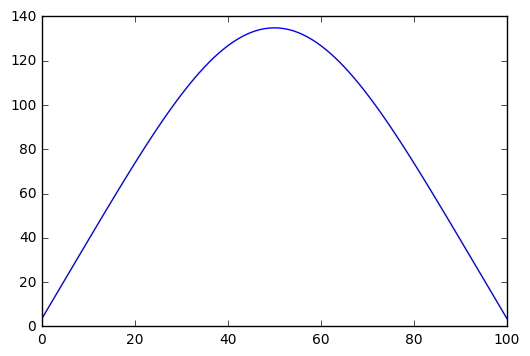

8333.81859683  1700


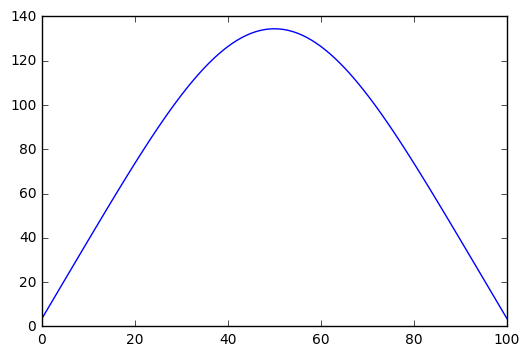

8315.69165041  1710


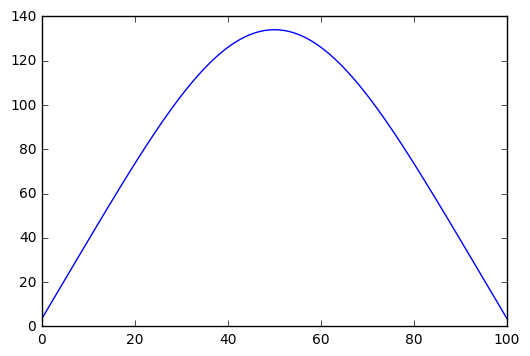

8297.56554997  1720


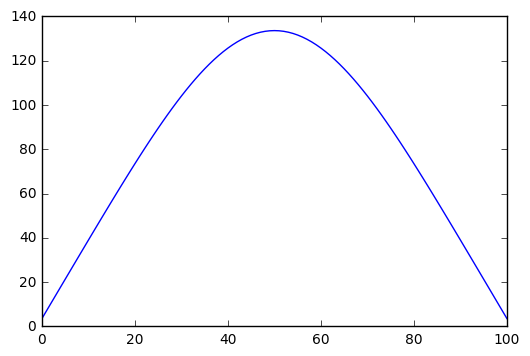

8279.44120575  1730


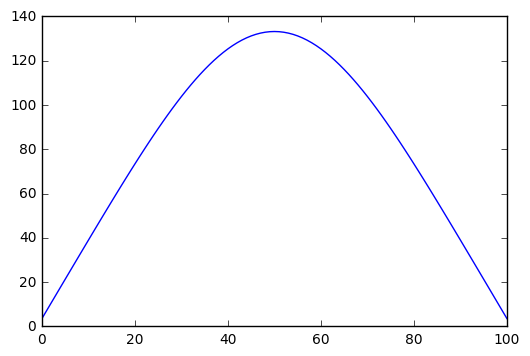

8261.31950681  1740


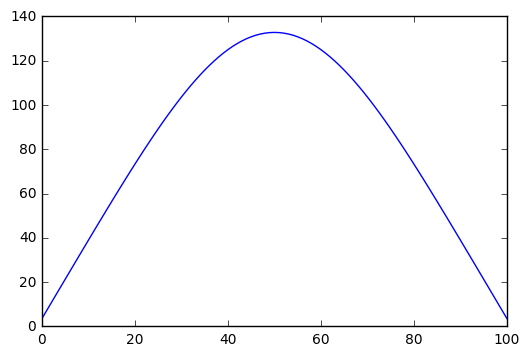

8243.20132147  1750


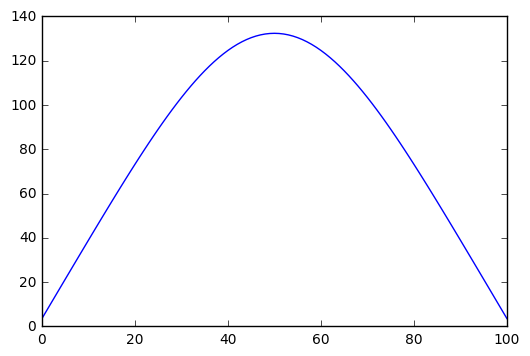

8225.08749771  1760


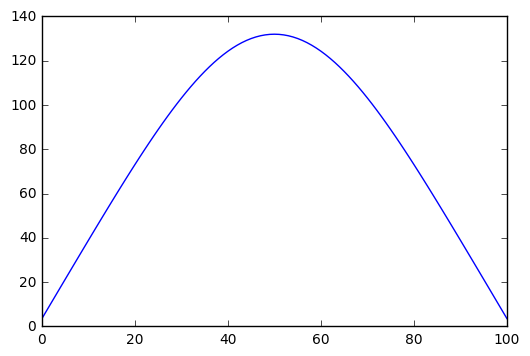

8206.97886359  1770


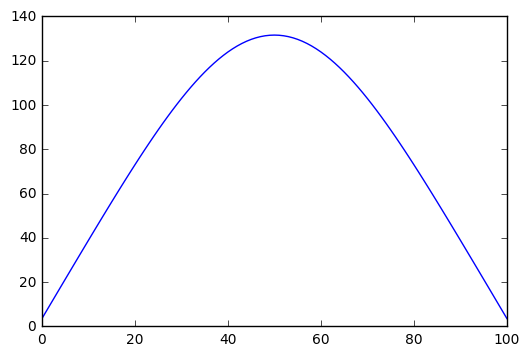

8188.87622767  1780


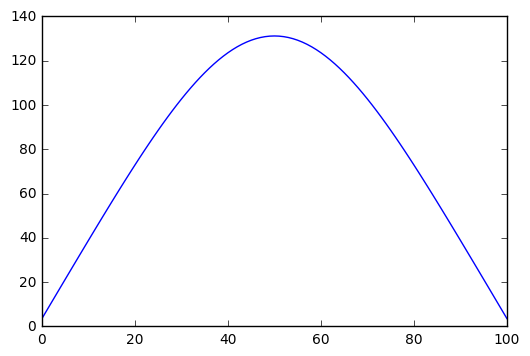

8170.78037934  1790


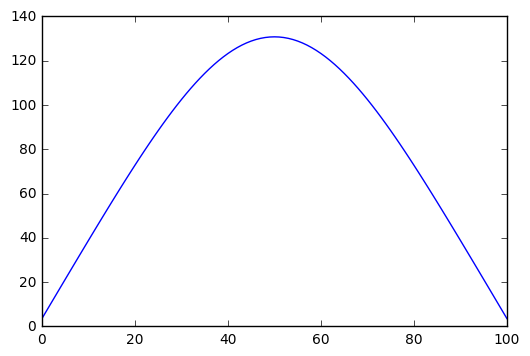

8152.69208927  1800


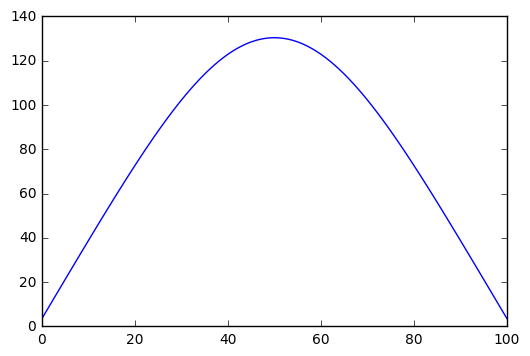

8134.61210979  1810


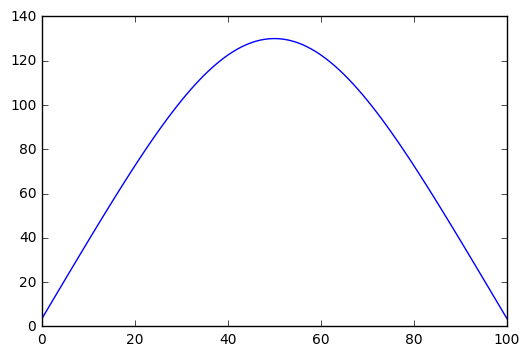

8116.54117521  1820


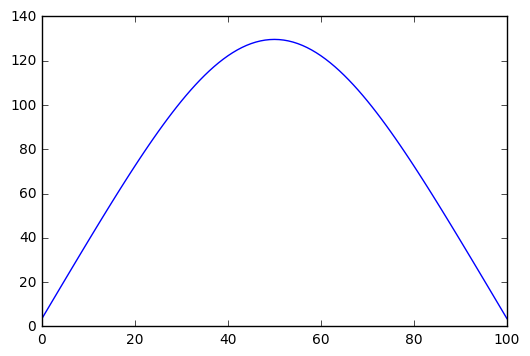

8098.48000223  1830


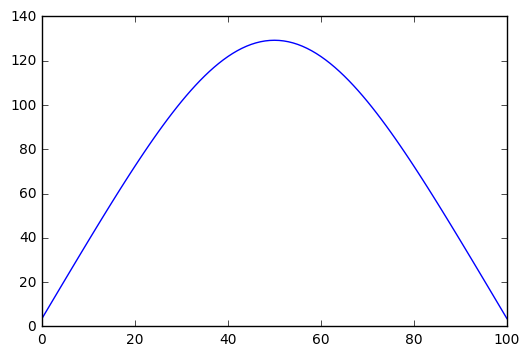

8080.42929032  1840


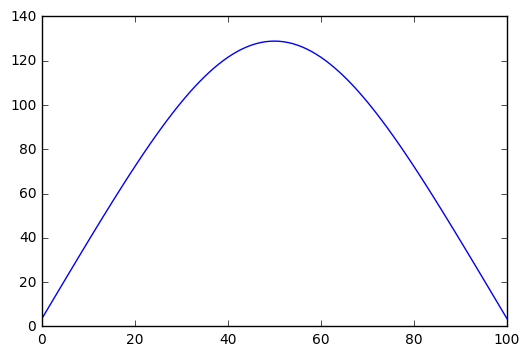

8062.38972201  1850


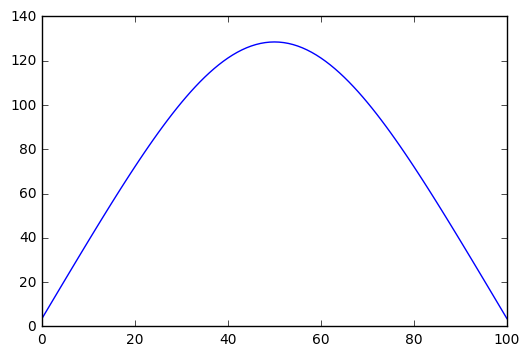

8044.36196331  1860


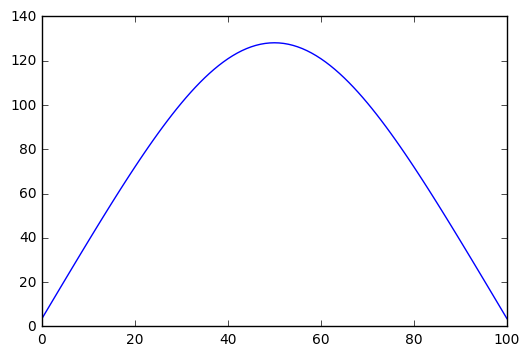

8026.34666399  1870


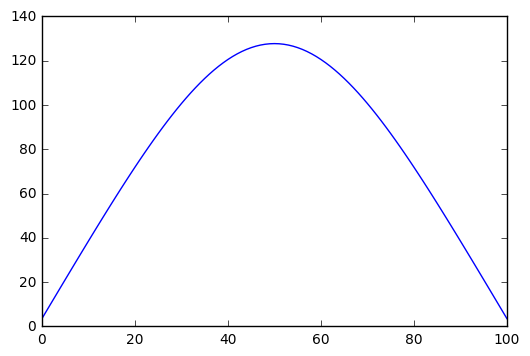

8008.34445796  1880


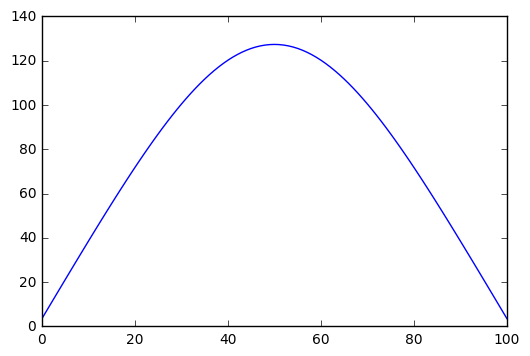

7990.35596359  1890


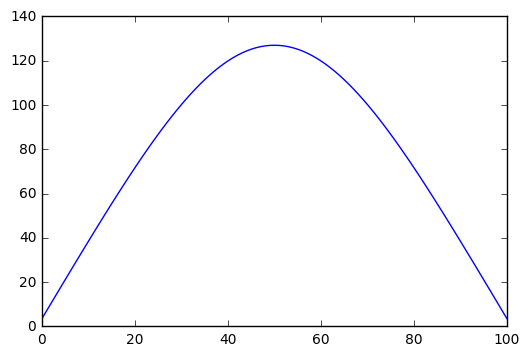

7972.38178402  1900


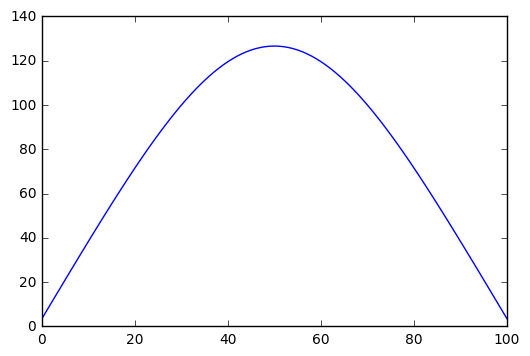

7954.42250747  1910


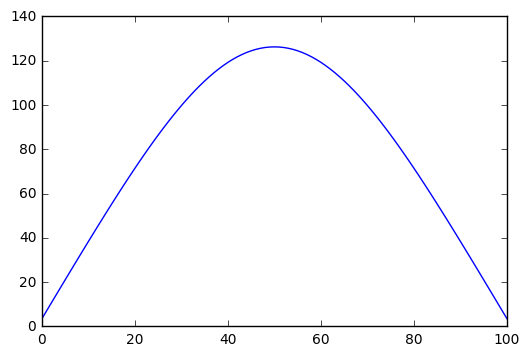

7936.47870761  1920


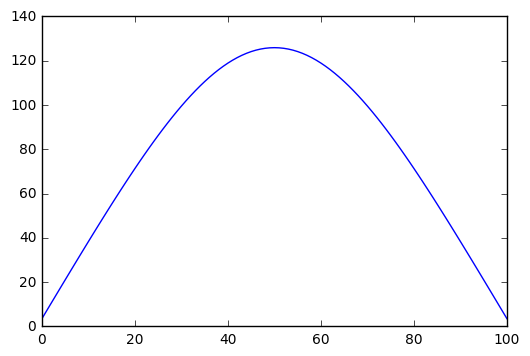

7918.55094378  1930


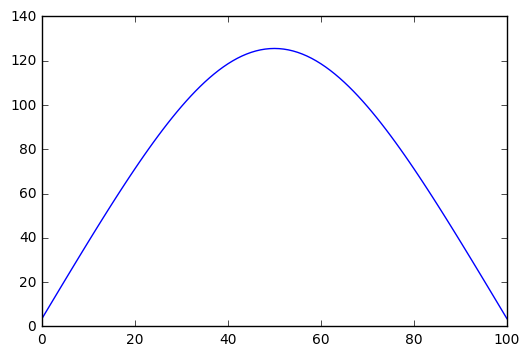

7900.63976134  1940


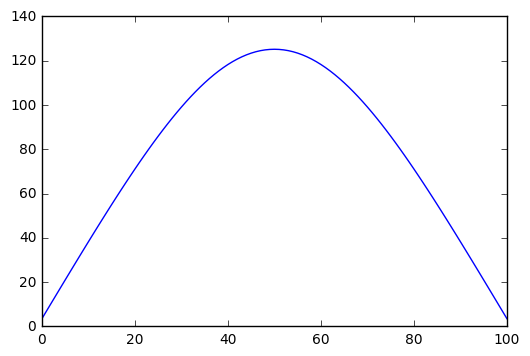

7882.74569198  1950


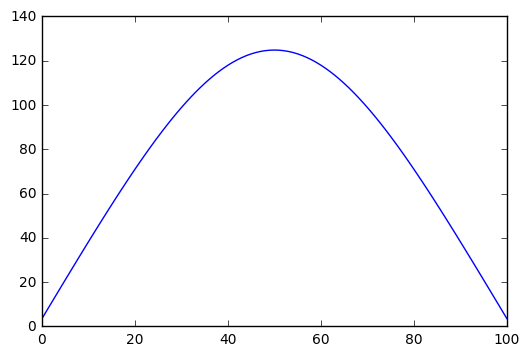

7864.86925397  1960


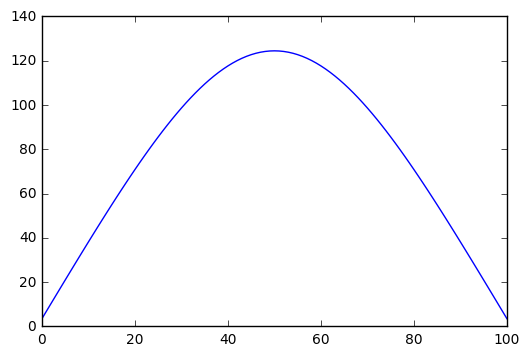

7847.01095245  1970


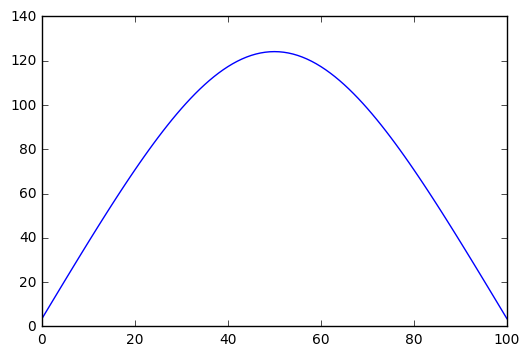

7829.17127973  1980


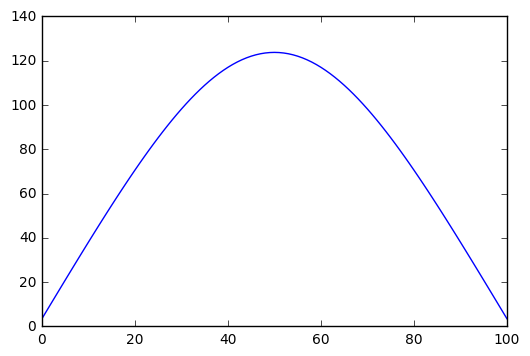

7811.35071553  1990


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
get_ipython().magic('matplotlib inline')

# Rozdelenie
xmax = 101  #100
tmax = 2000   #20000
D = 0.5 # Difuzna konstanta
l = 1
tSec = 0.1

# Init
u = np.zeros((xmax,xmax))
u[50][50] = 10000 # Inicializuj pociatocny stav, t = 0

dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))

def impl(i):
    u[50][0] = u[50][0]/b
    for x in range(1, xmax):
        u[50][x] = (u[50][x]+a*u[50][x-1])/(b+a*c[x-1])
    #u[xmax -1]=u[xmax-1] #xn=d'n
    for x in range(xmax-2,-1,-1):
        u[50][x]=u[50][x]-c[x]*u[50][x+1]

#koeficient c v trojdiagonalnej matici
c = np.full(xmax+1,-a)
b=1+2*a
c[0]=c[0]/b
for i in range(1, xmax):
    c[i]=c[i]/(b+a*c[i-1])
for t in range(1, tmax):
    impl(1)
    if t % 10 == 0:
        plt.plot(u[50])
        plt.show()
        sum = 0
        for x in range(0, xmax):
            sum += u[50][x]
        print(str(sum)+"  "+str(t))

## Explicitna metoda 1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
get_ipython().magic('matplotlib inline')

# Rozdelenie
xmax = 101
tmax = 2000
D = 0.5 # Difuzna konstanta
l = 1
tSec = 0.1

# Init
uH = np.zeros(xmax)
u = np.zeros(xmax)
uH[50] = 10000 # Inicializuj pociatocny stav, t = 0

dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))

#Iteration
for t in range(1, tmax):
    for x in range(1, xmax - 1):
        u[x] = a*uH[x-1]+(1-2*a)*uH[x]+a*uH[x+1]
    u[0] = (1-2*a)*uH[0]+a*uH[1]
    u[xmax-1] = a*uH[xmax-2]+(1-2*a)*uH[xmax-1]
    uH = u
    
    if t % 10 == 0:
        plt.plot(u)
        plt.show()
        sum = 0
        for x in range(0, xmax):
            sum += u[x]
        print(str(sum)+"  "+str(t))

In [ ]:
t = np.arange(0,100,1)
window = signal.gaussian(100, std=30)
window = 120*window
plt.plot(t, u, t, window)
print(len(window))
print(len(u))
#plt.show()

## Crank Nicolson 1D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
get_ipython().magic('matplotlib inline')

# Rozdelenie
xmax = 100
tmax = 2000
D = 0.5 # Difuzna konstanta
l = 1
tSec = 0.1

# Init t=0
uEH = np.zeros(xmax)
uE = np.zeros(xmax)
uEH[50] = 10000

#koeficient c v trojdiagonalnej matici
c = np.full(xmax,-a)
b=1+2*a
c[0]=c[0]/b
for i in range(1, xmax):
    c[i]=c[i]/(b+a*c[i-1])

dx = l / xmax
dt = tSec / tmax
a = (D*dt)/(dx*dx);
print("dx=="+str(dx))
print("dt=="+str(dt))
print(" a=="+str(a))

#Iteration
for t in range(1, tmax):
    for x in range(1, xmax - 2):
        uE[x] = a*uEH[x-1]+b*uEH[x]+a*uEH[x+1]
        
        
    uE[0] = (1-2*a)*uEH[0]+a*uEH[1]
    uE[xmax-1] = a*uEH[xmax-2]+b*uEH[xmax-1]
    uEH = uE
    
    
    
    
    
    
    
    if t % 10 == 0:
        plt.plot(uE)
        plt.show()
        sum = 0
        for x in range(0, xmax):
            sum += uE[x]
        print(str(sum)+"  "+str(t))

In [8]:
for i in range(11,-1,-1):
    #print(i)
    pass
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9
